### author by yangshichen
### 注意：脚本仅供参考，使用前请仔细阅读

In [1]:
library(ggplot2)
library(future)
library(tidyverse)
library(ggpubr)
library(ggchicklet)
library(ggsci)
library(magrittr)
library(ggh4x)
library(rstatix)
library(ggsignif)
library(ggnewscale)
library(patchwork)
library(gapminder)
library(ggprism)
library(dplyr)
library(ggplotify)
library(readr)
library(arrow)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ lubridate 1.9.3     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

载入程序包：‘magrittr’


The following object is masked from ‘package:purrr’:

    set_names


The following object is masked from ‘package:tidyr’:

    extract



载入程序包：‘rstatix’


The following object is masked from ‘package:stats’:

    filter



载入程序包：‘arrow’


The following object is masked from ‘package:magrittr’:

    is_in


The following object is masked from ‘package:lubridate’:

    duration


The following object is masked from ‘package:utils’:

    timestamp




In [2]:
mytheme <- theme_prism(base_family="",base_fontface="plain") +
  theme(strip.text = element_text(size = 8,angle=10,vjust = 0.5,hjust = 0.5),
        axis.line = element_line(color = "black",size = 0.2),
        axis.ticks = element_line(size = 0.2),
        axis.text.y = element_text(color = "black",size = 6),
        axis.text.x = element_text(color = "black",size = 6, angle = 30,hjust = 1,vjust = 1),
        axis.title = element_text(color = "black",size = 10),
        legend.position = "none")

Warning message:
“The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead.”


### eGene

#### permutations eGene统计

In [35]:
data <- as.data.frame(read.csv("/media/AnalysisDisk2/Yangshichen/0_HIV_RNA/QTL/01.Dynamic/03.Result/eQTL_all_lead_perm_qvalues.csv",check.names = F,header = T))
data

phenotype_id num_var beta_shape1 beta_shape2 true_df 
1       0     FAM41C       2022    1.0301083   172.2677    102.1241
2       1     SAMD11       2174    0.9823966   177.6965    103.1769
3       2     NOC2L        2214    1.0340234   205.5545    105.8018
4       3     KLHL17       2232    1.0619480   197.3666    103.7193
5       4     ISG15        2408    1.0609145   213.4438    103.0671
6       5     AGRN         2478    1.0326697   246.3156    106.3258
7       6     C1orf159     2662    1.0470378   256.0991    105.5677
8       7     TNFRSF18     2740    1.0232855   200.2372    100.3500
9       8     SDF4         2778    1.0393289   241.9703    104.5946
10      9     B3GALT6      2786    1.0539142   226.4013    102.8248
11     10     UBE2J2       2841    1.0600533   242.3577    103.5160
12     11     SCNN1D       2877    1.0495269   252.9356    104.5942
13     12     ACAP3        2904    1.0595276   225.1403    101.6186
14     13     PUSL1        2904    1.0404475   267.5911    105.5556
15     14     INTS11       2932    1.0538639   265.4555    104.6407
16     15     CPTP         2941    1.0673672   255.5850    103.8560
17     16     DVL1         3007    1.0411248   275.9496    105.1102
18     17     MXRA8        3056    1.0275191   273.2505    104.8272
19     18     AURKAIP1     3095    1.0308611   279.2560    104.9158
20     19     CCNL2        3135    1.0380876   269.5213    103.1737
21     20     MRPL20-AS1   3138    1.0692601   278.2197    103.2418
22     21     MRPL20       3145    1.0760620   272.6513    102.6424
23     22     ATAD3C       3244    1.0537275   304.6482    104.1290
24     23     ATAD3B       3244    1.0611185   285.0086    102.7962
25     24     ATAD3A       3244    1.0488860   306.7991    105.1403
26     25     SSU72        3244    1.0568504   306.8632    104.5213
27     26     FNDC10       3244    1.0203459   254.8298    100.3658
28     27     MIB2         3243    1.0655115   299.8765    103.6493
29     28     CDK11B       3243    1.0424105   297.7173    104.2468
30     29     SLC35E2B     3242    1.0576869   297.0200    103.7269
⋮      ⋮      ⋮            ⋮       ⋮           ⋮           ⋮       
388333 388332 NFAM1        2425    1.0279273   169.4578    84.34933
388334 388333 RRP7A        2485    1.0386298   177.8328    83.13610
388335 388334 POLDIP3      2543    1.0431765   173.4434    82.32954
388336 388335 CYB5R3       2673    1.0458461   159.2627    80.40067
388337 388336 ATP5MGL      2564    1.0380776   183.0604    83.41180
388338 388337 ARFGAP3      2772    1.0542866   181.6634    82.67050
388339 388338 PACSIN2      3090    1.0375936   218.3637    83.97659
388340 388339 TSPO         3214    1.0569336   266.2924    84.19854
388341 388340 SAMM50       4585    1.0614141   508.4255    85.58047
388342 388341 PARVB        5000    1.0301785   495.5316    83.64005
388343 388342 PARVG        4860    1.0338106   627.5294    88.32296
388344 388343 NUP50        4908    1.0440507   539.1506    86.65201
388345 388344 KIAA0930     4848    1.0568492   550.9746    86.86506
388346 388345 FAM118A      4469    1.0322240   509.2802    87.08297
388347 388346 ATXN10       4130    1.0525303   424.8134    86.78319
388348 388347 CERK         2937    1.0364248   250.3307    86.10020
388349 388348 TBC1D22A     3913    1.0279311   354.5527    87.46497
388350 388349 CRELD2       4352    1.0329945   362.8153    81.69613
388351 388350 PIM3         4142    1.0500311   467.0555    87.29397
388352 388351 MLC1         3854    0.9949173   311.1260    81.17646
388353 388352 TRABD        3409    1.0455111   348.7402    85.09538
388354 388353 PLXNB2       3124    1.0622606   322.0620    85.04305
388355 388354 DENND6B      2967    1.0097214   255.2098    81.91499
388356 388355 PPP6R2       2906    1.0092928   255.8452    83.41100
388357 388356 LMF2         2419    0.9965486   171.2275    81.01620
388358 388357 NCAPH2       2418    0.9896209   164.7042    80.49017
388359 388358 SCO2         2387    1.0728675   176.9666    80.97430
38

In [36]:
sub_data <- subset(data, celltype_level_qval < 0.05)
sub_data

phenotype_id num_var beta_shape1 beta_shape2 true_df 
10       9    B3GALT6      2786    1.053914    226.40132   102.8248
16      15    CPTP         2941    1.067367    255.58499   103.8560
30      29    SLC35E2B     3242    1.057687    297.02002   103.7269
32      31    SLC35E2A     3239    1.047195    300.03436   104.5517
43      42    PLCH2        3710    1.037312    392.35364   107.1216
57      56    C1orf174     4951    1.011741    501.99033   108.7314
65      64    NOL9         3228    1.039611    299.38970   105.9930
74      73    UTS2         2803    1.070726    221.09955   102.3855
103    102    FBXO2        3067    1.067395    284.92276   105.0333
109    108    MTHFR        3177    1.034920    277.53220   106.3075
137    136    CROCC        3731    1.080601    326.90110   104.9232
140    139    PADI4        3861    1.036987    426.88287   107.6927
146    145    EMC1         3798    1.062854    383.67947   106.1662
152    151    NBL1         3807    1.040517    307.92004   103.9622
158    157    PINK1-AS     3126    1.046500    241.90760   104.3648
163    162    NBPF3        3376    1.031207    225.47308   104.1711
166    165    CDC42-AS1    3397    1.036467    194.54184    98.1704
167    166    CDC42        3417    1.072947    240.37250   102.7780
176    175    MDS2         3175    1.024926    182.04480   103.9850
190    189    RCAN3AS      2983    1.041578    201.76399   104.6483
200    199    LDLRAP1      2653    1.025973    184.35033   106.5614
234    233    STX12        1610    1.051211     80.68401   102.2667
236    235    THEMIS2      1709    1.030054     87.43906   104.0759
237    236    RPA2         1736    1.037042     85.73297   102.8431
283    282    AK2          2470    1.057732    152.76984   104.0316
320    319    INPP5B       2463    1.054503    224.36751   104.8769
330    329    HPCAL4       3079    1.060859    164.14740   101.9138
331    330    PPIE         3142    1.049796    164.09040   101.6213
421    420    CC2D1B       2100    1.044589    102.16039   102.8629
461    460    ITGB3BP      3144    1.050676    178.37212   104.1100
⋮      ⋮      ⋮            ⋮       ⋮           ⋮           ⋮       
383219 383218 CHKB-DT      2237    1.0207465   154.96070   99.43791
383309 383308 FUCA1        2949    0.9880982   155.95276   84.84940
383322 383321 CD52         1701    1.0269600    96.52242   83.66239
383718 383717 CD55         2455    1.0451459   205.85090   86.37991
384688 384687 ERAP2        3362    1.0368938   103.49921   82.58463
384884 384883 BTN3A2       2857    1.0383685    90.75875   79.21925
385013 385012 SNHG5        3738    1.0445969    77.13940   79.53039
385046 385045 CALHM6       2795    1.0467345    86.75944   80.35055
385270 385269 CUX1         2978    1.0419344   208.25984   84.99684
385337 385336 TMEM176B     4381    1.0113904   336.26532   84.86465
385761 385760 RASSF4       3195    1.0513175   134.50282   82.21353
385806 385805 ADK          2921    1.0211577    94.53586   82.14523
385823 385822 LIPA         3339    1.0442538   175.47560   84.21652
385880 385879 SHTN1        3784    1.0153061   341.71870   86.14157
385936 385935 LSP1         2492    1.0254927   289.42526   87.17243
386112 386111 RIN1         2172    1.0038495    67.55766   77.65004
386154 386153 UCP2         1964    1.0243206   103.68524   85.25331
386212 386211 SIDT2        4078    1.0621905   371.09662   84.85799
386213 386212 TAGLN        4093    1.0339255   333.01030   83.49871
386277 386276 CLEC12A      3571    1.0539762   200.86880   83.19815
386417 386416 LYZ          2984    1.0474737   191.98720   84.13439
386829 386828 IGHA1        1177    0.9877429    79.88494   83.64935
386842 386841 NOP10        4123    1.0562593   303.99356   84.97689
387091 387090 SULT1A1      2384    1.0537101   166.48323   82.70532
387341 387340 LGALS9       2487    1.0261116   251.03702   91.61417
387846 387845 UBA52        2792    1.0446224   265.49466   86.23441
388032 388031 SIRPB1       3727    1.0198137   481.52603   89.37938
38

In [37]:
length(unique(sub_data$phenotype_id))

[1] 2957

In [38]:
write.csv(sub_data,'/media/AnalysisDisk2/Yangshichen/0_HIV_RNA/QTL/01.Dynamic/03.Result/eQTL_all_lead_perm_qvalues_0.05.csv')

##### 1

In [39]:
data <- as.data.frame(read.csv("/media/AnalysisDisk2/Yangshichen/0_HIV_RNA/QTL/01.Dynamic/03.Result/eQTL_all_lead_perm_qvalues.csv",check.names = F,header = T))

In [40]:
subdata <- subset(data,celltype_level_qval < 0.05)
subdata <- subdata[,-c(1)]
subdata

phenotype_id num_var beta_shape1 beta_shape2 true_df  pval_true_df
10     B3GALT6      2786    1.053914    226.40132   102.8248 4.783687e-06
16     CPTP         2941    1.067367    255.58499   103.8560 4.989439e-06
30     SLC35E2B     3242    1.057687    297.02002   103.7269 2.671790e-11
32     SLC35E2A     3239    1.047195    300.03436   104.5517 6.324757e-14
43     PLCH2        3710    1.037312    392.35364   107.1216 1.043647e-10
57     C1orf174     4951    1.011741    501.99033   108.7314 2.818547e-09
65     NOL9         3228    1.039611    299.38970   105.9930 1.642073e-06
74     UTS2         2803    1.070726    221.09955   102.3855 4.304970e-17
103    FBXO2        3067    1.067395    284.92276   105.0333 3.317018e-11
109    MTHFR        3177    1.034920    277.53220   106.3075 4.185597e-12
137    CROCC        3731    1.080601    326.90110   104.9232 4.279480e-06
140    PADI4        3861    1.036987    426.88287   107.6927 7.053820e-07
146    EMC1         3798    1.062854    383.67947   106.1662 4.531455e-06
152    NBL1         3807    1.040517    307.92004   103.9622 7.325044e-11
158    PINK1-AS     3126    1.046500    241.90760   104.3648 7.745615e-07
163    NBPF3        3376    1.031207    225.47308   104.1711 3.728577e-09
166    CDC42-AS1    3397    1.036467    194.54184    98.1704 7.819788e-06
167    CDC42        3417    1.072947    240.37250   102.7780 9.790563e-07
176    MDS2         3175    1.024926    182.04480   103.9850 1.599134e-05
190    RCAN3AS      2983    1.041578    201.76399   104.6483 7.747071e-06
200    LDLRAP1      2653    1.025973    184.35033   106.5614 3.360824e-12
234    STX12        1610    1.051211     80.68401   102.2667 2.740719e-05
236    THEMIS2      1709    1.030054     87.43906   104.0759 2.252796e-19
237    RPA2         1736    1.037042     85.73297   102.8431 5.015559e-05
283    AK2          2470    1.057732    152.76984   104.0316 4.300828e-05
320    INPP5B       2463    1.054503    224.36751   104.8769 2.046152e-08
330    HPCAL4       3079    1.060859    164.14740   101.9138 5.613214e-06
331    PPIE         3142    1.049796    164.09040   101.6213 5.973922e-06
421    CC2D1B       2100    1.044589    102.16039   102.8629 6.159871e-05
461    ITGB3BP      3144    1.050676    178.37212   104.1100 4.524178e-12
⋮      ⋮            ⋮       ⋮           ⋮           ⋮        ⋮           
383219 CHKB-DT      2237    1.0207465   154.96070   99.43791 7.117196e-06
383309 FUCA1        2949    0.9880982   155.95276   84.84940 2.446090e-07
383322 CD52         1701    1.0269600    96.52242   83.66239 1.156579e-07
383718 CD55         2455    1.0451459   205.85090   86.37991 8.775155e-08
384688 ERAP2        3362    1.0368938   103.49921   82.58463 7.780439e-14
384884 BTN3A2       2857    1.0383685    90.75875   79.21925 2.340914e-08
385013 SNHG5        3738    1.0445969    77.13940   79.53039 7.749674e-13
385046 CALHM6       2795    1.0467345    86.75944   80.35055 2.131487e-06
385270 CUX1         2978    1.0419344   208.25984   84.99684 4.052884e-07
385337 TMEM176B     4381    1.0113904   336.26532   84.86465 1.130925e-14
385761 RASSF4       3195    1.0513175   134.50282   82.21353 1.185804e-07
385806 ADK          2921    1.0211577    94.53586   82.14523 5.175376e-07
385823 LIPA         3339    1.0442538   175.47560   84.21652 9.375689e-07
385880 SHTN1        3784    1.0153061   341.71870   86.14157 3.272639e-08
385936 LSP1         2492    1.0254927   289.42526   87.17243 1.518186e-07
386112 RIN1         2172    1.0038495    67.55766   77.65004 8.574766e-07
386154 UCP2         1964    1.0243206   103.68524   85.25331 1.644898e-06
386212 SIDT2        4078    1.0621905   371.09662   84.85799 2.131021e-10
386213 TAGLN        4093    1.0339255   333.01030   83.49871 1.215367e-09
386277 CLEC12A      3571    1.0539762   200.86880   83.19815 7.546090e-15
386417 LYZ          2984    1.0474737   191.98720   84.13439 1.650940e-14
386829 IGHA1        1177    0.9877429    79.88494   83.64935 1.166801e-06
386842 NOP1

In [41]:
colnames(subdata)

[1] "phenotype_id"                         
 [2] "num_var"                              
 [3] "beta_shape1"                          
 [4] "beta_shape2"                          
 [5] "true_df"                              
 [6] "pval_true_df"                         
 [7] "variant_id"                           
 [8] "start_distance"                       
 [9] "end_distance"                         
[10] "ma_samples"                           
[11] "ma_count"                             
[12] "af"                                   
[13] "pval_nominal"                         
[14] "slope"                                
[15] "slope_se"                             
[16] "pval_perm"                            
[17] "pval_beta"                            
[18] "celltype"                             
[19] "celltype_level_qval"                  
[20] "celltype_level_pval_nominal_threshold"
[21] "study_wise_qval"                      
[22] "study_wise_nominal_threshold"

In [42]:
length(unique(subdata$phenotype_id))

[1] 2957

In [43]:
# 每个 phenotype_id 出现在哪些 celltype
pheno_cell_map <- subdata %>%
  distinct(celltype, phenotype_id) %>%
  group_by(phenotype_id) %>%
  summarise(celltype_count = n(),
            celltypes = paste(sort(unique(celltype)), collapse = ",")) %>%
  ungroup()

In [44]:
# 特有的 phenotype_id
unique_phenos <- pheno_cell_map %>%
  filter(celltype_count == 1)

# 共享的 phenotype_id
shared_phenos <- pheno_cell_map %>%
  filter(celltype_count > 1)

In [45]:
# 合并 celltype 到 pheno 表
df_pheno_info <- subdata %>%
  distinct(celltype, phenotype_id) %>%
  left_join(pheno_cell_map, by = "phenotype_id")

# 每个 celltype 的统计
tmp <- df_pheno_info %>% group_by(celltype) %>%
       summarise(unique_phenotype_n = sum(celltype_count == 1),
                 shared_phenotype_n = sum(celltype_count > 1))
tmp$total_egenes <- tmp$unique_phenotype_n + tmp$shared_phenotype_n
colnames(tmp) <- c('celltype','unique_egenes','shared_egenes','total_egenes')
tmp$celltype <- factor(tmp$celltype,levels = c('CD4_Naive_T-CCR7','CD4_Tcm-CXCR5','CD4_Tfh_like-CXCR5','CD4_Th22-CCR10','CD4_Th17-RORC','CD4_Treg-FOXP3','CD4_Th-TNFRSF11A','CD4_Th1-GZMK','CD4_Tcm-GPR183','CD4_Tcm-SOX4','CD4_Treg-FCRL3','CD4_Naive_T-SOX4','CD4_Tem-CCR7neg','CD4_Tcm-IFIT3','CD8_Naive_T-CCR7','CD8_CTL-GZMB','NKT-NCR1','CD8_Tcm-GZMK','CD8_Tem-GZMK','MAIT-SLC4A10','gdT2-GZMH','CD8_CTL-GZMK','gdT2-GZMK','Cycling_T-MKI67','CD8_Tcm-GPR183','gdT2-IL12RB2','NKT-IFIT3','CD8_Tcm-IFI44L','Mature_NK_dim-FCGR3A','Terminal_NK_dim-CD160neg','NK_bright-XCL1','Transitional_NK-GZMK','cMono-CD14','ncMono-FCGR3A','cDC2-CD1C','cMono-IFI44L','ncMono-IFI44L','pDC-LILRA4','ncMono-IFIT1','ncMono-C1QA','Naive_B-TCL1A','Unswitched_Memory_B-CD1C','Switched_Memory_B-CD86','Switched_Memory_B-CD27','Transitional_B-NEIL1','Aptypical_Memory_B-ITGAX','Switched_Memory_B-IGHE','Unswitched_Memory_B-JAM3','Naive_B-IFIT3','Plasma_B-IGHA1',
                                               'Unswitched_Memory_B-IFIT3'))
tmp

celltype                  unique_egenes shared_egenes total_egenes
1  Aptypical_Memory_B-ITGAX    6            80            86         
2  CD4_Naive_T-CCR7          107           647           754         
3  CD4_Naive_T-SOX4            2            92            94         
4  CD4_Tcm-CXCR5              26           353           379         
5  CD4_Tcm-GPR183              8           133           141         
6  CD4_Tcm-IFIT3               2            64            66         
7  CD4_Tcm-SOX4                9           127           136         
8  CD4_Tem-CCR7neg             3            90            93         
9  CD4_Tfh_like-CXCR5         13           284           297         
10 CD4_Th-TNFRSF11A           13           145           158         
11 CD4_Th1-GZMK                9           149           158         
12 CD4_Th17-RORC              15           250           265         
13 CD4_Th22-CCR10             14           254           268         
14 CD4_Treg-FCRL3              5           111           116         
15 CD4_Treg-FOXP3             17           150           167         
16 CD8_CTL-GZMB              128           730           858         
17 CD8_CTL-GZMK                6           128           134         
18 CD8_Naive_T-CCR7          141           718           859         
19 CD8_Tcm-GPR183              2            36            38         
20 CD8_Tcm-GZMK               60           553           613         
21 CD8_Tcm-IFI44L              0             3             3         
22 CD8_Tem-GZMK               54           520           574         
23 Cycling_T-MKI67             4            51            55         
24 MAIT-SLC4A10               24           273           297         
25 Mature_NK_dim-FCGR3A      105           593           698         
26 NKT-IFIT3                   0             7             7         
27 NKT-NCR1                  111           735           846         
28 NK_bright-XCL1              5           107           112         
29 Naive_B-IFIT3               0             4             4         
30 Naive_B-TCL1A             135           483           618         
31 Plasma_B-IGHA1              1             3             4         
32 Switched_Memory_B-CD27      7           104           111         
33 Switched_Memory_B-CD86      8           125           133         
34 Switched_Memory_B-IGHE      4            66            70         
35 Terminal_NK_dim-CD160neg   14           173           187         
36 Transitional_B-NEIL1        6            85            91         
37 Transitional_NK-GZMK        3            55            58         
38 Unswitched_Memory_B-CD1C   17           222           239         
39 Unswitched_Memory_B-IFIT3   0             2             2         
40 Unswitched_Memory_B-JAM3    3            62            65         
41 cDC2-CD1C                  22           172           194         
42 cMono-CD14                151           493           644         
43 cMono-IFI44L               11           160           171         
44 gdT2-GZMH                   4           137           141         
45 gdT2-GZMK                   1            54            55         
46 gdT2-IL12RB2                0            24            24         
47 ncMono-C1QA                 2            27            29         
48 ncMono-FCGR3A              92           338           430         
49 ncMono-IFI44L               3           118           121         
50 ncMono-IFIT1                2            40            42         
51 pDC-LILRA4                 13            42            55

In [46]:
tmp_long <- tmp %>%
  pivot_longer(cols = c(unique_egenes, shared_egenes),
               names_to = "type",
               values_to = "count") %>%
  mutate(type = recode(type,
                       shared_egenes = "Shared eGenes",
                       unique_egenes = "Unique eGenes"))
tmp_long$type <- factor(tmp_long$type, levels = c('Unique eGenes','Shared eGenes'))

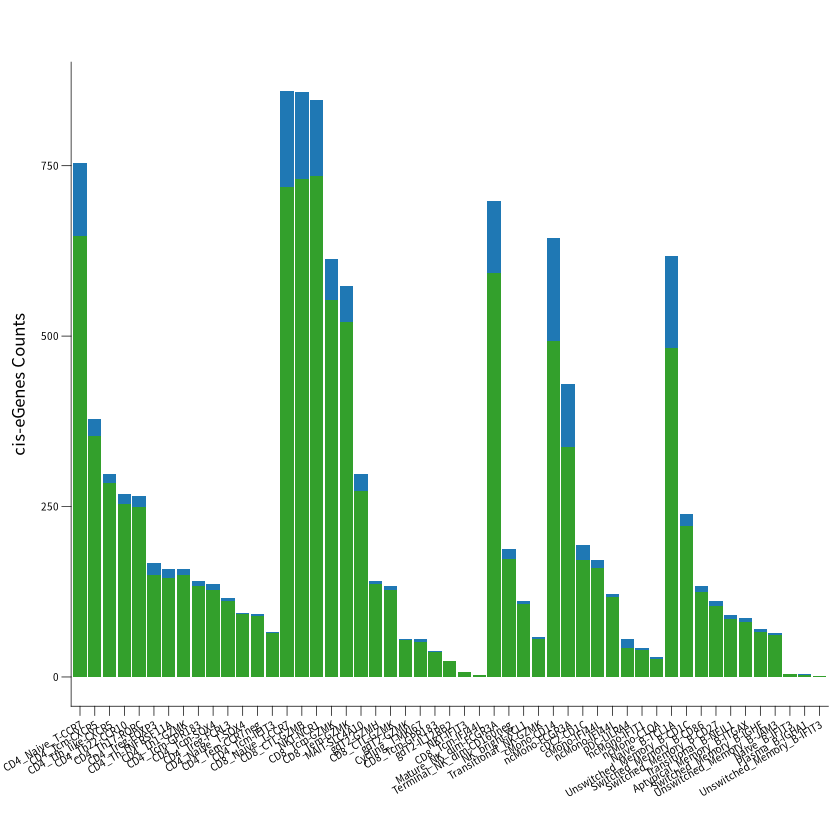

In [47]:
p <- ggplot(tmp_long, aes(x = celltype, y = count, fill = type)) +
     geom_bar(stat = "identity") +
     labs(title = "",
          x = "", y = "cis-eGenes Counts", fill = "Phenotype Type") +
     scale_fill_manual(values = c("Unique eGenes" = "#1f78b4", "Shared eGenes" = "#33a02c"))+
     mytheme
p
ggsave("/media/AnalysisDisk2/Yangshichen/0_HIV_RNA/QTL/01.Dynamic/03.Result/plot/egene/all_egene_count.pdf",p,width=10,height=3)

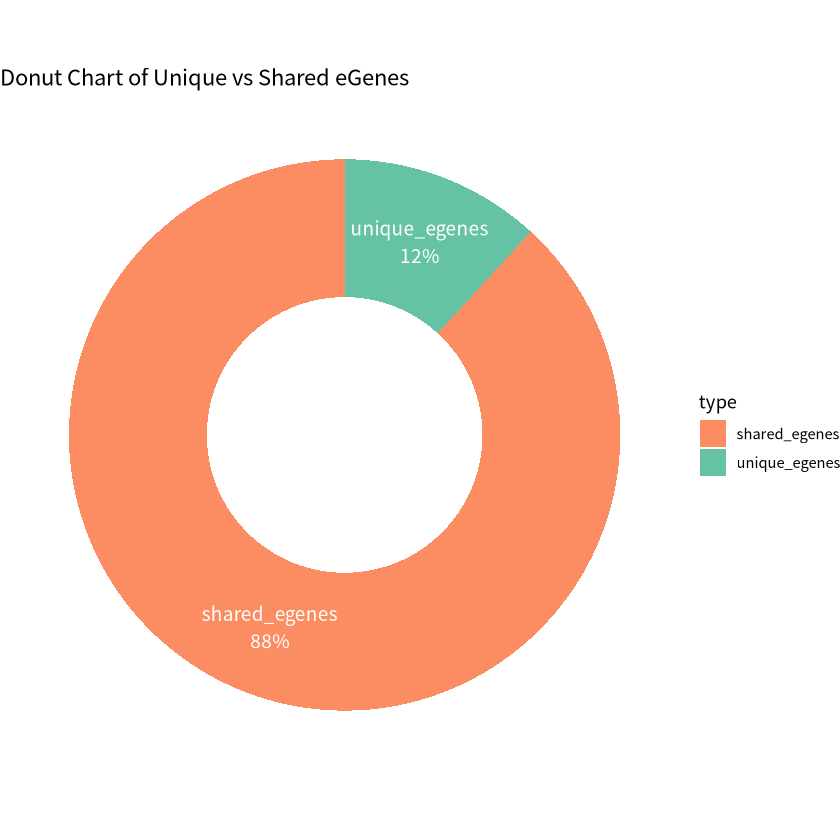

In [49]:
# 计算总和
gene_counts <- colSums(tmp[, c("unique_egenes", "shared_egenes")], na.rm = TRUE)

# 转为 dataframe
gene_df <- data.frame(
  type = names(gene_counts),
  count = as.numeric(gene_counts)
)

# 计算百分比 & 添加标签
gene_df$fraction <- gene_df$count / sum(gene_df$count)
gene_df$ymax <- cumsum(gene_df$fraction)
gene_df$ymin <- c(0, head(gene_df$ymax, n = -1))
gene_df$label <- paste0(gene_df$type, "\n", round(gene_df$fraction * 100), "%")

# 绘制圆环图
p <- ggplot(gene_df, aes(ymax = ymax, ymin = ymin, xmax = 4, xmin = 3, fill = type)) +
  geom_rect() +
  coord_polar(theta = "y") +
  xlim(c(2, 4)) +  # 控制中间空心
  theme_void() +
  scale_fill_manual(values = c("unique_egenes" = "#66c2a5", "shared_egenes" = "#fc8d62")) +
  geom_text(aes(x = 3.5, y = (ymin + ymax)/2, label = label), color = "white", size = 4) +
  labs(title = "Donut Chart of Unique vs Shared eGenes") +
  theme(legend.position = "right")
p
ggsave("/media/AnalysisDisk2/Yangshichen/0_HIV_RNA/QTL/01.Dynamic/03.Result/plot/egene/egene_perm_count.pdf",p,width=10,height=3)

##### 2

In [27]:
cellratio <- as.data.frame(read.csv("/media/AnalysisDisk2/Yangshichen/0_HIV_RNA/样本统计/scRNA_proportions_L3.csv",check.names = F,header = T))
cellratio

sample  celltype_L3               count total_count proportion  
1    HD-H134 Aptypical_Memory_B-ITGAX    76  46020       1.651456e-03
2    HD-H134 CD4_Naive_T-CCR7          7030  46020       1.527597e-01
3    HD-H134 CD4_Naive_T-SOX4           604  46020       1.312473e-02
4    HD-H134 CD4_Tcm-CXCR5             1071  46020       2.327249e-02
5    HD-H134 CD4_Tcm-GPR183             719  46020       1.562364e-02
6    HD-H134 CD4_Tcm-IFIT3              478  46020       1.038679e-02
7    HD-H134 CD4_Tcm-SOX4                72  46020       1.564537e-03
8    HD-H134 CD4_Tem-CCR7neg           1577  46020       3.426771e-02
9    HD-H134 CD4_Tfh_like-CXCR5         316  46020       6.866580e-03
10   HD-H134 CD4_Th1-GZMK               718  46020       1.560191e-02
11   HD-H134 CD4_Th17-RORC              656  46020       1.425467e-02
12   HD-H134 CD4_Th22-CCR10             813  46020       1.766623e-02
13   HD-H134 CD4_Th-TNFRSF11A           416  46020       9.039548e-03
14   HD-H134 CD4_Treg-FCRL3             567  46020       1.232073e-02
15   HD-H134 CD4_Treg-FOXP3             583  46020       1.266841e-02
16   HD-H134 CD8_CTL-GZMB              4869  46020       1.058018e-01
17   HD-H134 CD8_CTL-GZMK               514  46020       1.116906e-02
18   HD-H134 CD8_Naive_T-CCR7          5168  46020       1.122990e-01
19   HD-H134 CD8_Tcm-GPR183             531  46020       1.153846e-02
20   HD-H134 CD8_Tcm-GZMK              1206  46020       2.620600e-02
21   HD-H134 CD8_Tcm-IFI44L              69  46020       1.499348e-03
22   HD-H134 CD8_Tem-GZMK              1504  46020       3.268144e-02
23   HD-H134 Cycling_T-MKI67             79  46020       1.716645e-03
24   HD-H134 Inflamed_NK_dim-IFI44L       3  46020       6.518905e-05
25   HD-H134 MAIT-SLC4A10               973  46020       2.114298e-02
26   HD-H134 Mature_NK_dim-FCGR3A      1472  46020       3.198609e-02
27   HD-H134 NKT-IFIT3                   32  46020       6.953498e-04
28   HD-H134 NKT-NCR1                  3096  46020       6.727510e-02
29   HD-H134 NK_bright-XCL1             363  46020       7.887875e-03
30   HD-H134 Naive_B-IFIT3               57  46020       1.238592e-03
⋮    ⋮       ⋮                         ⋮     ⋮           ⋮           
8207 PD-H308 NK_bright-XCL1             27   10767       2.507662e-03
8208 PD-H308 Naive_B-IFIT3              14   10767       1.300269e-03
8209 PD-H308 Naive_B-IL6                 4   10767       3.715055e-04
8210 PD-H308 Naive_B-TCL1A             794   10767       7.374385e-02
8211 PD-H308 Plasma_B-IGHA1              6   10767       5.572583e-04
8212 PD-H308 Plasma_B-IGHG1              1   10767       9.287638e-05
8213 PD-H308 Plasmablast-MKI67           0   10767       0.000000e+00
8214 PD-H308 Switched_Memory_B-CD27    112   10767       1.040215e-02
8215 PD-H308 Switched_Memory_B-CD86     96   10767       8.916133e-03
8216 PD-H308 Switched_Memory_B-IGHE     71   10767       6.594223e-03
8217 PD-H308 Terminal_NK_dim-CD160neg  184   10767       1.708925e-02
8218 PD-H308 Transitional_B-NEIL1      104   10767       9.659144e-03
8219 PD-H308 Transitional_NK-GZMK       19   10767       1.764651e-03
8220 PD-H308 Unswitched_Memory_B-CD1C  131   10767       1.216681e-02
8221 PD-H308 Unswitched_Memory_B-IFIT3  10   10767       9.287638e-04
8222 PD-H308 Unswitched_Memory_B-JAM3   42   10767       3.900808e-03
8223 PD-H308 cDC1-BATF3                  0   10767       0.000000e+00
8224 PD-H308 cDC2-CD1C                  25   10767       2.321910e-03
8225 PD-H308 cMono-CD14                530   10767       4.922448e-02
8226 PD-H308 cMono-IFI44L               82   10767       7.615863e-03
8227 PD-H308 cMono-IL1B                  1   10767       9.287638e-05
8228 PD-H308 gdT2-GZMH                  61   10767       5.665459e-03
8229 PD-H308 gdT2-GZMK                  23   10767       2.136157e-03
8230 PD-H308 gdT2-IL12RB2               17   10767       1.578898e-03
8231 PD-H308 ncMono-C1QA                51   10767       4.736695e-03
8232 PD-H308 nc

In [28]:
summarized_df <- cellratio %>%
  group_by(celltype_L3) %>%
  summarise(proportion_sum = sum(proportion, na.rm = TRUE)/142)
summarized_df <- as.data.frame(summarized_df)
summarized_df

celltype_L3               proportion_sum
1  Aptypical_Memory_B-ITGAX  0.0046756295  
2  CD4_Naive_T-CCR7          0.0686806421  
3  CD4_Naive_T-SOX4          0.0141626294  
4  CD4_Tcm-CXCR5             0.0230501119  
5  CD4_Tcm-GPR183            0.0164934246  
6  CD4_Tcm-IFIT3             0.0050521397  
7  CD4_Tcm-SOX4              0.0102786687  
8  CD4_Tem-CCR7neg           0.0178406435  
9  CD4_Tfh_like-CXCR5        0.0116591706  
10 CD4_Th-TNFRSF11A          0.0081585616  
11 CD4_Th1-GZMK              0.0088518998  
12 CD4_Th17-RORC             0.0137951751  
13 CD4_Th22-CCR10            0.0139961121  
14 CD4_Treg-FCRL3            0.0091861552  
15 CD4_Treg-FOXP3            0.0094713362  
16 CD8_CTL-GZMB              0.1123554754  
17 CD8_CTL-GZMK              0.0235765609  
18 CD8_Naive_T-CCR7          0.0866985867  
19 CD8_Tcm-GPR183            0.0055525506  
20 CD8_Tcm-GZMK              0.0397528917  
21 CD8_Tcm-IFI44L            0.0016679852  
22 CD8_Tem-GZMK              0.0362783805  
23 Cycling_T-MKI67           0.0044634705  
24 Inflamed_NK_dim-IFI44L    0.0001126845  
25 MAIT-SLC4A10              0.0249814212  
26 Mature_NK_dim-FCGR3A      0.0483631599  
27 NKT-IFIT3                 0.0017695613  
28 NKT-NCR1                  0.0989208222  
29 NK_bright-XCL1            0.0077166187  
30 Naive_B-IFIT3             0.0019002587  
31 Naive_B-IL6               0.0006749871  
32 Naive_B-TCL1A             0.0474328401  
33 Plasma_B-IGHA1            0.0013924060  
34 Plasma_B-IGHG1            0.0005493666  
35 Plasmablast-MKI67         0.0002454031  
36 Switched_Memory_B-CD27    0.0120784182  
37 Switched_Memory_B-CD86    0.0056510727  
38 Switched_Memory_B-IGHE    0.0032295326  
39 Terminal_NK_dim-CD160neg  0.0162083114  
40 Transitional_B-NEIL1      0.0057158386  
41 Transitional_NK-GZMK      0.0037074358  
42 Unswitched_Memory_B-CD1C  0.0146811730  
43 Unswitched_Memory_B-IFIT3 0.0009055722  
44 Unswitched_Memory_B-JAM3  0.0033533012  
45 cDC1-BATF3                0.0003240066  
46 cDC2-CD1C                 0.0077334954  
47 cMono-CD14                0.0713258287  
48 cMono-IFI44L              0.0168068768  
49 cMono-IL1B                0.0014942060  
50 gdT2-GZMH                 0.0159398417  
51 gdT2-GZMK                 0.0055635656  
52 gdT2-IL12RB2              0.0027772685  
53 ncMono-C1QA               0.0020387286  
54 ncMono-FCGR3A             0.0205788651  
55 ncMono-IFI44L             0.0048316889  
56 ncMono-IFIT1              0.0024514274  
57 pDC-AXL                   0.0001789299  
58 pDC-LILRA4                0.0026668843

In [29]:
tmp <- as.data.frame(tmp)
tmp

celltype                  unique_egenes shared_egenes total_egenes
1  Aptypical_Memory_B-ITGAX    6            80            86         
2  CD4_Naive_T-CCR7          107           647           754         
3  CD4_Naive_T-SOX4            2            92            94         
4  CD4_Tcm-CXCR5              26           353           379         
5  CD4_Tcm-GPR183              8           133           141         
6  CD4_Tcm-IFIT3               2            64            66         
7  CD4_Tcm-SOX4                9           127           136         
8  CD4_Tem-CCR7neg             3            90            93         
9  CD4_Tfh_like-CXCR5         13           284           297         
10 CD4_Th-TNFRSF11A           13           145           158         
11 CD4_Th1-GZMK                9           149           158         
12 CD4_Th17-RORC              15           250           265         
13 CD4_Th22-CCR10             14           254           268         
14 CD4_Treg-FCRL3              5           111           116         
15 CD4_Treg-FOXP3             17           150           167         
16 CD8_CTL-GZMB              128           730           858         
17 CD8_CTL-GZMK                6           128           134         
18 CD8_Naive_T-CCR7          141           718           859         
19 CD8_Tcm-GPR183              2            36            38         
20 CD8_Tcm-GZMK               60           553           613         
21 CD8_Tcm-IFI44L              0             3             3         
22 CD8_Tem-GZMK               54           520           574         
23 Cycling_T-MKI67             4            51            55         
24 MAIT-SLC4A10               24           273           297         
25 Mature_NK_dim-FCGR3A      105           593           698         
26 NKT-IFIT3                   0             7             7         
27 NKT-NCR1                  111           735           846         
28 NK_bright-XCL1              5           107           112         
29 Naive_B-IFIT3               0             4             4         
30 Naive_B-TCL1A             135           483           618         
31 Plasma_B-IGHA1              1             3             4         
32 Switched_Memory_B-CD27      7           104           111         
33 Switched_Memory_B-CD86      8           125           133         
34 Switched_Memory_B-IGHE      4            66            70         
35 Terminal_NK_dim-CD160neg   14           173           187         
36 Transitional_B-NEIL1        6            85            91         
37 Transitional_NK-GZMK        3            55            58         
38 Unswitched_Memory_B-CD1C   17           222           239         
39 Unswitched_Memory_B-IFIT3   0             2             2         
40 Unswitched_Memory_B-JAM3    3            62            65         
41 cDC2-CD1C                  22           172           194         
42 cMono-CD14                151           493           644         
43 cMono-IFI44L               11           160           171         
44 gdT2-GZMH                   4           137           141         
45 gdT2-GZMK                   1            54            55         
46 gdT2-IL12RB2                0            24            24         
47 ncMono-C1QA                 2            27            29         
48 ncMono-FCGR3A              92           338           430         
49 ncMono-IFI44L               3           118           121         
50 ncMono-IFIT1                2            40            42         
51 pDC-LILRA4                 13            42            55

In [31]:
merged_data <- left_join(tmp, summarized_df, by = c("celltype" = "celltype_L3"))
merged_data

celltype                  unique_egenes shared_egenes total_egenes
1  Aptypical_Memory_B-ITGAX    6            80            86         
2  CD4_Naive_T-CCR7          107           647           754         
3  CD4_Naive_T-SOX4            2            92            94         
4  CD4_Tcm-CXCR5              26           353           379         
5  CD4_Tcm-GPR183              8           133           141         
6  CD4_Tcm-IFIT3               2            64            66         
7  CD4_Tcm-SOX4                9           127           136         
8  CD4_Tem-CCR7neg             3            90            93         
9  CD4_Tfh_like-CXCR5         13           284           297         
10 CD4_Th-TNFRSF11A           13           145           158         
11 CD4_Th1-GZMK                9           149           158         
12 CD4_Th17-RORC              15           250           265         
13 CD4_Th22-CCR10             14           254           268         
14 CD4_Treg-FCRL3              5           111           116         
15 CD4_Treg-FOXP3             17           150           167         
16 CD8_CTL-GZMB              128           730           858         
17 CD8_CTL-GZMK                6           128           134         
18 CD8_Naive_T-CCR7          141           718           859         
19 CD8_Tcm-GPR183              2            36            38         
20 CD8_Tcm-GZMK               60           553           613         
21 CD8_Tcm-IFI44L              0             3             3         
22 CD8_Tem-GZMK               54           520           574         
23 Cycling_T-MKI67             4            51            55         
24 MAIT-SLC4A10               24           273           297         
25 Mature_NK_dim-FCGR3A      105           593           698         
26 NKT-IFIT3                   0             7             7         
27 NKT-NCR1                  111           735           846         
28 NK_bright-XCL1              5           107           112         
29 Naive_B-IFIT3               0             4             4         
30 Naive_B-TCL1A             135           483           618         
31 Plasma_B-IGHA1              1             3             4         
32 Switched_Memory_B-CD27      7           104           111         
33 Switched_Memory_B-CD86      8           125           133         
34 Switched_Memory_B-IGHE      4            66            70         
35 Terminal_NK_dim-CD160neg   14           173           187         
36 Transitional_B-NEIL1        6            85            91         
37 Transitional_NK-GZMK        3            55            58         
38 Unswitched_Memory_B-CD1C   17           222           239         
39 Unswitched_Memory_B-IFIT3   0             2             2         
40 Unswitched_Memory_B-JAM3    3            62            65         
41 cDC2-CD1C                  22           172           194         
42 cMono-CD14                151           493           644         
43 cMono-IFI44L               11           160           171         
44 gdT2-GZMH                   4           137           141         
45 gdT2-GZMK                   1            54            55         
46 gdT2-IL12RB2                0            24            24         
47 ncMono-C1QA                 2            27            29         
48 ncMono-FCGR3A              92           338           430         
49 ncMono-IFI44L               3           118           121         
50 ncMono-IFIT1                2            40            42         
51 pDC-LILRA4                 13            42            55         
   proportion_sum
1  0.0046756295  
2  0.0686806421  
3  0.0141626294  
4  0.0230501119  
5  0.0164934246  
6  0.0050521397  
7  0.0102786687  
8  0.0178406435  
9  0.0116591706  
10 0.0081585616  
11 0.0088518998  
12 0.0137951751  
13 0.0139961121  
14 0.0091861552  
15 0.0094713362  
16 0.1123554754  
17 0.0235765609  
18 0.0866985867  
19 0.0055525506  
20 

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


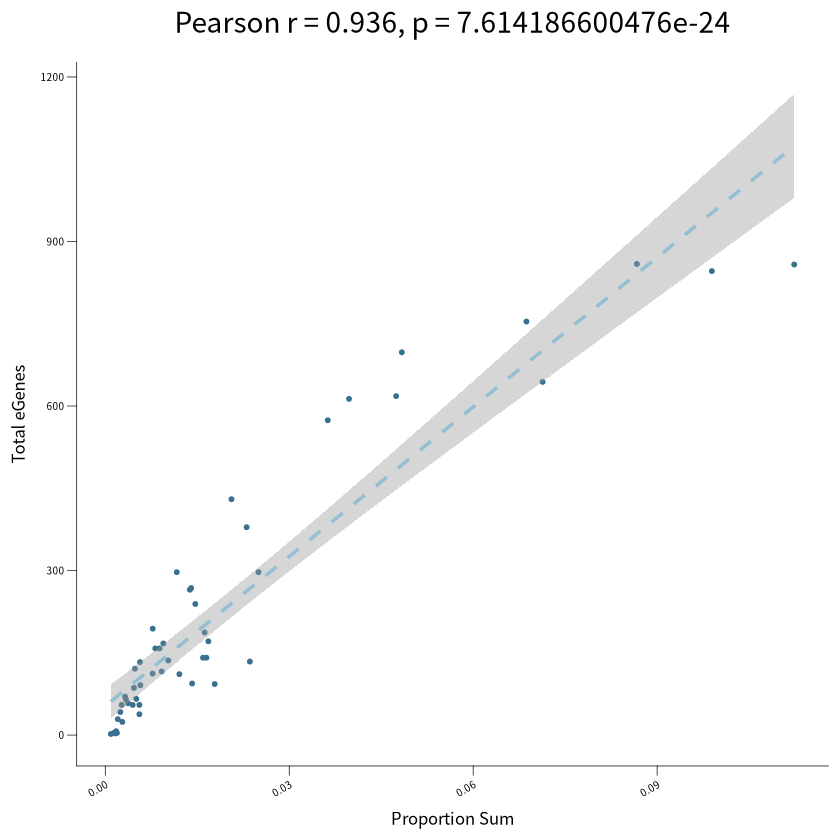

In [57]:
cor_test <- cor.test(merged_data$total_egenes,
                     merged_data$proportion_sum,
                     method = "pearson")

cor_val <- round(cor_test$estimate, 3)
p_val <- cor_test$p.value

p <- ggplot(merged_data, aes(x = proportion_sum, y = total_egenes)) +
     geom_point(size=1,color = "#37718F") +
     geom_smooth(method = "lm", se = T, color = "#94BFD2", linetype=2) +
     labs(x = "Proportion Sum", y = "Total eGenes", title = paste0("Pearson r = ", cor_val, ", p = ", p_val)) +
     mytheme
p
ggsave("/media/AnalysisDisk2/Yangshichen/0_HIV_RNA/QTL/01.Dynamic/03.Result/plot/egene/all_egene_cor_cellratio.pdf",p,width=3,height=3.5)

##### 3

In [73]:
data <- as.data.frame(read.csv("/media/AnalysisDisk2/Yangshichen/0_HIV_RNA/QTL/01.Dynamic/03.Result/eQTL_all_lead_perm_qvalues.csv",check.names = F,header = T))

In [74]:
subdata <- subset(data,celltype_level_qval < 0.05)
subdata <- subdata[,-c(1)]
subdata

phenotype_id num_var beta_shape1 beta_shape2 true_df  pval_true_df
10     B3GALT6      2786    1.053914    226.40132   102.8248 4.783687e-06
16     CPTP         2941    1.067367    255.58499   103.8560 4.989439e-06
30     SLC35E2B     3242    1.057687    297.02002   103.7269 2.671790e-11
32     SLC35E2A     3239    1.047195    300.03436   104.5517 6.324757e-14
43     PLCH2        3710    1.037312    392.35364   107.1216 1.043647e-10
57     C1orf174     4951    1.011741    501.99033   108.7314 2.818547e-09
65     NOL9         3228    1.039611    299.38970   105.9930 1.642073e-06
74     UTS2         2803    1.070726    221.09955   102.3855 4.304970e-17
103    FBXO2        3067    1.067395    284.92276   105.0333 3.317018e-11
109    MTHFR        3177    1.034920    277.53220   106.3075 4.185597e-12
137    CROCC        3731    1.080601    326.90110   104.9232 4.279480e-06
140    PADI4        3861    1.036987    426.88287   107.6927 7.053820e-07
146    EMC1         3798    1.062854    383.67947   106.1662 4.531455e-06
152    NBL1         3807    1.040517    307.92004   103.9622 7.325044e-11
158    PINK1-AS     3126    1.046500    241.90760   104.3648 7.745615e-07
163    NBPF3        3376    1.031207    225.47308   104.1711 3.728577e-09
166    CDC42-AS1    3397    1.036467    194.54184    98.1704 7.819788e-06
167    CDC42        3417    1.072947    240.37250   102.7780 9.790563e-07
176    MDS2         3175    1.024926    182.04480   103.9850 1.599134e-05
190    RCAN3AS      2983    1.041578    201.76399   104.6483 7.747071e-06
200    LDLRAP1      2653    1.025973    184.35033   106.5614 3.360824e-12
234    STX12        1610    1.051211     80.68401   102.2667 2.740719e-05
236    THEMIS2      1709    1.030054     87.43906   104.0759 2.252796e-19
237    RPA2         1736    1.037042     85.73297   102.8431 5.015559e-05
283    AK2          2470    1.057732    152.76984   104.0316 4.300828e-05
320    INPP5B       2463    1.054503    224.36751   104.8769 2.046152e-08
330    HPCAL4       3079    1.060859    164.14740   101.9138 5.613214e-06
331    PPIE         3142    1.049796    164.09040   101.6213 5.973922e-06
421    CC2D1B       2100    1.044589    102.16039   102.8629 6.159871e-05
461    ITGB3BP      3144    1.050676    178.37212   104.1100 4.524178e-12
⋮      ⋮            ⋮       ⋮           ⋮           ⋮        ⋮           
383219 CHKB-DT      2237    1.0207465   154.96070   99.43791 7.117196e-06
383309 FUCA1        2949    0.9880982   155.95276   84.84940 2.446090e-07
383322 CD52         1701    1.0269600    96.52242   83.66239 1.156579e-07
383718 CD55         2455    1.0451459   205.85090   86.37991 8.775155e-08
384688 ERAP2        3362    1.0368938   103.49921   82.58463 7.780439e-14
384884 BTN3A2       2857    1.0383685    90.75875   79.21925 2.340914e-08
385013 SNHG5        3738    1.0445969    77.13940   79.53039 7.749674e-13
385046 CALHM6       2795    1.0467345    86.75944   80.35055 2.131487e-06
385270 CUX1         2978    1.0419344   208.25984   84.99684 4.052884e-07
385337 TMEM176B     4381    1.0113904   336.26532   84.86465 1.130925e-14
385761 RASSF4       3195    1.0513175   134.50282   82.21353 1.185804e-07
385806 ADK          2921    1.0211577    94.53586   82.14523 5.175376e-07
385823 LIPA         3339    1.0442538   175.47560   84.21652 9.375689e-07
385880 SHTN1        3784    1.0153061   341.71870   86.14157 3.272639e-08
385936 LSP1         2492    1.0254927   289.42526   87.17243 1.518186e-07
386112 RIN1         2172    1.0038495    67.55766   77.65004 8.574766e-07
386154 UCP2         1964    1.0243206   103.68524   85.25331 1.644898e-06
386212 SIDT2        4078    1.0621905   371.09662   84.85799 2.131021e-10
386213 TAGLN        4093    1.0339255   333.01030   83.49871 1.215367e-09
386277 CLEC12A      3571    1.0539762   200.86880   83.19815 7.546090e-15
386417 LYZ          2984    1.0474737   191.98720   84.13439 1.650940e-14
386829 IGHA1        1177    0.9877429    79.88494   83.64935 1.166801e-06
386842 NOP1

In [77]:
# 每个 phenotype_id 出现在哪些 celltype
phenotype_counts <- subdata %>%
  group_by(celltype) %>%
  summarise(n_phenotypes = n_distinct(phenotype_id)) %>%
  arrange(desc(n_phenotypes))
phenotype_counts

celltype                  n_phenotypes
1  CD8_Naive_T-CCR7          859         
2  CD8_CTL-GZMB              858         
3  NKT-NCR1                  846         
4  CD4_Naive_T-CCR7          754         
5  Mature_NK_dim-FCGR3A      698         
6  cMono-CD14                644         
7  Naive_B-TCL1A             618         
8  CD8_Tcm-GZMK              613         
9  CD8_Tem-GZMK              574         
10 ncMono-FCGR3A             430         
11 CD4_Tcm-CXCR5             379         
12 CD4_Tfh_like-CXCR5        297         
13 MAIT-SLC4A10              297         
14 CD4_Th22-CCR10            268         
15 CD4_Th17-RORC             265         
16 Unswitched_Memory_B-CD1C  239         
17 cDC2-CD1C                 194         
18 Terminal_NK_dim-CD160neg  187         
19 cMono-IFI44L              171         
20 CD4_Treg-FOXP3            167         
21 CD4_Th-TNFRSF11A          158         
22 CD4_Th1-GZMK              158         
23 CD4_Tcm-GPR183            141         
24 gdT2-GZMH                 141         
25 CD4_Tcm-SOX4              136         
26 CD8_CTL-GZMK              134         
27 Switched_Memory_B-CD86    133         
28 ncMono-IFI44L             121         
29 CD4_Treg-FCRL3            116         
30 NK_bright-XCL1            112         
31 Switched_Memory_B-CD27    111         
32 CD4_Naive_T-SOX4           94         
33 CD4_Tem-CCR7neg            93         
34 Transitional_B-NEIL1       91         
35 Aptypical_Memory_B-ITGAX   86         
36 Switched_Memory_B-IGHE     70         
37 CD4_Tcm-IFIT3              66         
38 Unswitched_Memory_B-JAM3   65         
39 Transitional_NK-GZMK       58         
40 Cycling_T-MKI67            55         
41 gdT2-GZMK                  55         
42 pDC-LILRA4                 55         
43 ncMono-IFIT1               42         
44 CD8_Tcm-GPR183             38         
45 ncMono-C1QA                29         
46 gdT2-IL12RB2               24         
47 NKT-IFIT3                   7         
48 Naive_B-IFIT3               4         
49 Plasma_B-IGHA1              4         
50 CD8_Tcm-IFI44L              3         
51 Unswitched_Memory_B-IFIT3   2

In [78]:
phenotype_counts$celltype <- factor(phenotype_counts$celltype,levels = c('CD4_Naive_T-CCR7','CD4_Tcm-CXCR5','CD4_Tfh_like-CXCR5','CD4_Th22-CCR10','CD4_Th17-RORC','CD4_Treg-FOXP3','CD4_Th-TNFRSF11A','CD4_Th1-GZMK','CD4_Tcm-GPR183','CD4_Tcm-SOX4','CD4_Treg-FCRL3','CD4_Naive_T-SOX4','CD4_Tem-CCR7neg','CD4_Tcm-IFIT3','CD8_Naive_T-CCR7','CD8_CTL-GZMB','NKT-NCR1','CD8_Tcm-GZMK','CD8_Tem-GZMK','MAIT-SLC4A10','gdT2-GZMH','CD8_CTL-GZMK','gdT2-GZMK','Cycling_T-MKI67','CD8_Tcm-GPR183','gdT2-IL12RB2','NKT-IFIT3','CD8_Tcm-IFI44L','Mature_NK_dim-FCGR3A','Terminal_NK_dim-CD160neg','NK_bright-XCL1','Transitional_NK-GZMK','cMono-CD14','ncMono-FCGR3A','cDC2-CD1C','cMono-IFI44L','ncMono-IFI44L','pDC-LILRA4','ncMono-IFIT1','ncMono-C1QA','Naive_B-TCL1A','Unswitched_Memory_B-CD1C','Switched_Memory_B-CD86','Switched_Memory_B-CD27','Transitional_B-NEIL1','Aptypical_Memory_B-ITGAX','Switched_Memory_B-IGHE','Unswitched_Memory_B-JAM3','Naive_B-IFIT3','Plasma_B-IGHA1',
                                               'Unswitched_Memory_B-IFIT3'))

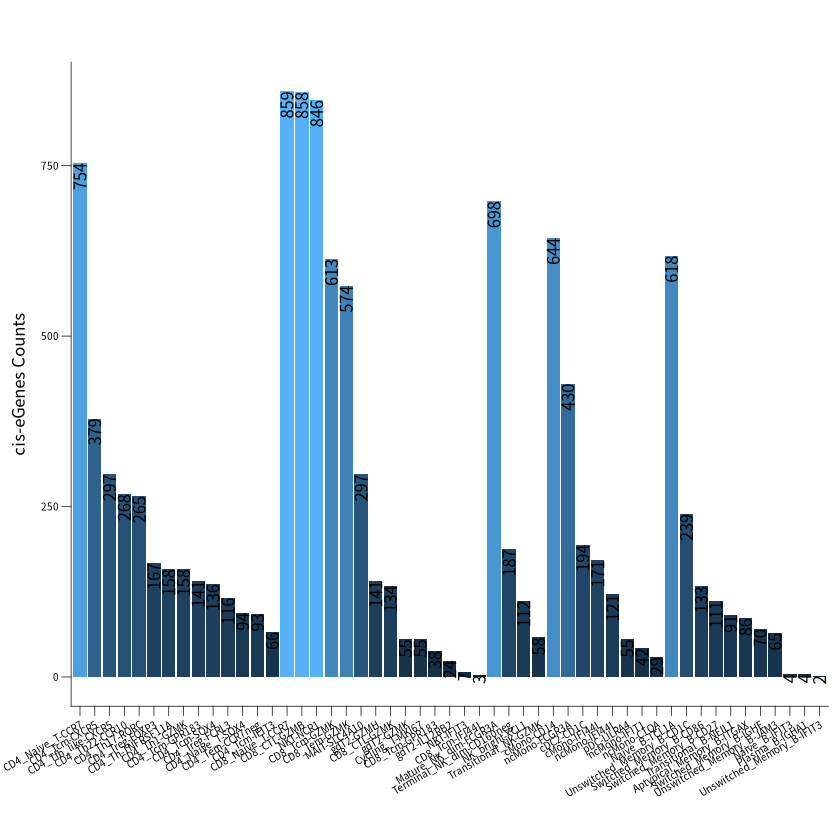

In [93]:
p <- ggplot(phenotype_counts, aes(x = celltype, y = n_phenotypes, fill = n_phenotypes)) +
     geom_bar(stat = "identity") +
     labs(title = "",x = "", y = "cis-eGenes Counts", fill = "Phenotype Type") +
     geom_text(aes(label = n_phenotypes), size = 3.5,angle = 90, hjust = 1) +
     mytheme
p
ggsave("/media/AnalysisDisk2/Yangshichen/0_HIV_RNA/QTL/01.Dynamic/03.Result/plot/egene/all_celltype_count.pdf",p,width=10,height=3)

##### 4

In [100]:
# 设置目录
input_dir <- '/media/AnalysisDisk2/Yangshichen/0_HIV_RNA/QTL/01.Dynamic/01.Data/02.scRNA-seq/01.pseudobulk/01.pseudobulk/'

# 获取所有csv文件路径
csv_files <- list.files(input_dir, pattern = "\\.csv$", full.names = TRUE)

# 初始化结果列表
result_list <- lapply(csv_files, function(file) {
  df <- read.csv(file, header = TRUE)
  sample_count <- nrow(df)
  data.frame(
    file_name = tools::file_path_sans_ext(basename(file)),
    sample_count = sample_count
  )
})

# 合并为一个dataframe
result_df <- do.call(rbind, result_list)
result_df

file_name                 sample_count
1  Aptypical_Memory_B-ITGAX  141         
2  CD4_Naive_T-CCR7          142         
3  CD4_Naive_T-SOX4          137         
4  CD4_Tcm-CXCR5             142         
5  CD4_Tcm-GPR183            142         
6  CD4_Tcm-IFIT3             141         
7  CD4_Tcm-SOX4              138         
8  CD4_Tem-CCR7neg           140         
9  CD4_Tfh_like-CXCR5        141         
10 CD4_Th-TNFRSF11A          139         
11 CD4_Th1-GZMK              140         
12 CD4_Th17-RORC             141         
13 CD4_Th22-CCR10            142         
14 CD4_Treg-FCRL3            141         
15 CD4_Treg-FOXP3            142         
16 CD8_CTL-GZMB              142         
17 CD8_CTL-GZMK              141         
18 CD8_Naive_T-CCR7          142         
19 CD8_Tcm-GPR183            139         
20 CD8_Tcm-GZMK              142         
21 CD8_Tcm-IFI44L            108         
22 CD8_Tem-GZMK              142         
23 cDC2-CD1C                 142         
24 cMono-CD14                142         
25 cMono-IFI44L              137         
26 Cycling_T-MKI67           142         
27 gdT2-GZMH                 142         
28 gdT2-GZMK                 141         
29 gdT2-IL12RB2              134         
30 MAIT-SLC4A10              142         
31 Mature_NK_dim-FCGR3A      142         
32 Naive_B-IFIT3             111         
33 Naive_B-TCL1A             142         
34 ncMono-C1QA               119         
35 ncMono-FCGR3A             142         
36 ncMono-IFI44L             141         
37 ncMono-IFIT1              115         
38 NK_bright-XCL1            142         
39 NKT-IFIT3                  88         
40 NKT-NCR1                  142         
41 pDC-LILRA4                135         
42 Plasma_B-IGHA1             84         
43 Switched_Memory_B-CD27    142         
44 Switched_Memory_B-CD86    141         
45 Switched_Memory_B-IGHE    136         
46 Terminal_NK_dim-CD160neg  142         
47 Transitional_B-NEIL1      136         
48 Transitional_NK-GZMK      138         
49 Unswitched_Memory_B-CD1C  142         
50 Unswitched_Memory_B-IFIT3  86         
51 Unswitched_Memory_B-JAM3  129

In [101]:
result_df$file_name <- factor(result_df$file_name,levels = c('CD4_Naive_T-CCR7','CD4_Tcm-CXCR5','CD4_Tfh_like-CXCR5','CD4_Th22-CCR10','CD4_Th17-RORC','CD4_Treg-FOXP3','CD4_Th-TNFRSF11A','CD4_Th1-GZMK','CD4_Tcm-GPR183','CD4_Tcm-SOX4','CD4_Treg-FCRL3','CD4_Naive_T-SOX4','CD4_Tem-CCR7neg','CD4_Tcm-IFIT3','CD8_Naive_T-CCR7','CD8_CTL-GZMB','NKT-NCR1','CD8_Tcm-GZMK','CD8_Tem-GZMK','MAIT-SLC4A10','gdT2-GZMH','CD8_CTL-GZMK','gdT2-GZMK','Cycling_T-MKI67','CD8_Tcm-GPR183','gdT2-IL12RB2','NKT-IFIT3','CD8_Tcm-IFI44L','Mature_NK_dim-FCGR3A','Terminal_NK_dim-CD160neg','NK_bright-XCL1','Transitional_NK-GZMK','cMono-CD14','ncMono-FCGR3A','cDC2-CD1C','cMono-IFI44L','ncMono-IFI44L','pDC-LILRA4','ncMono-IFIT1','ncMono-C1QA','Naive_B-TCL1A','Unswitched_Memory_B-CD1C','Switched_Memory_B-CD86','Switched_Memory_B-CD27','Transitional_B-NEIL1','Aptypical_Memory_B-ITGAX','Switched_Memory_B-IGHE','Unswitched_Memory_B-JAM3','Naive_B-IFIT3','Plasma_B-IGHA1',
                                               'Unswitched_Memory_B-IFIT3'))

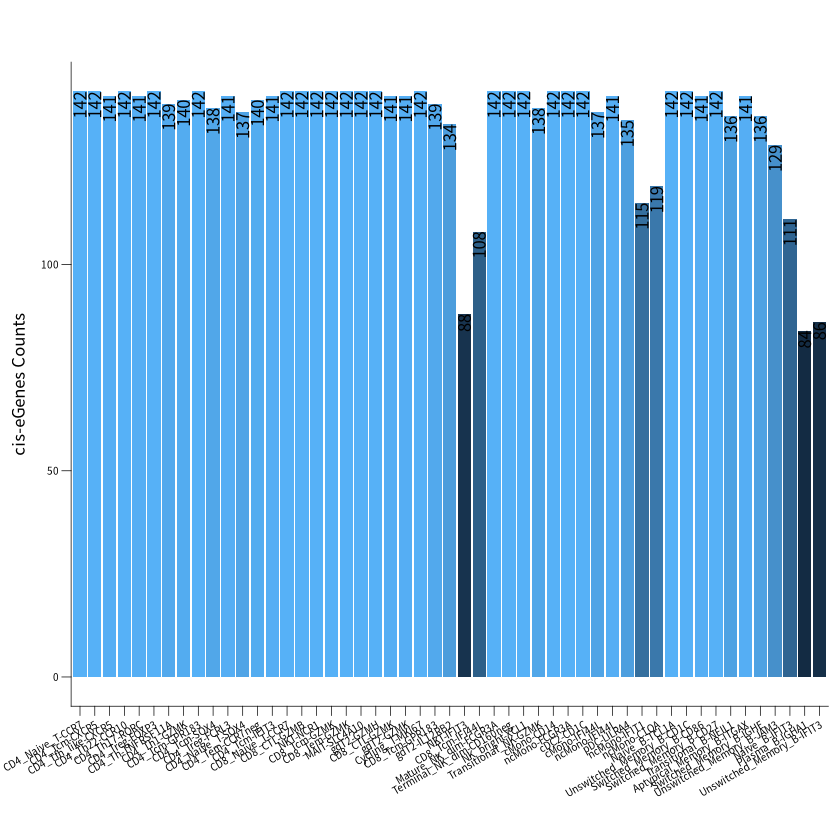

In [103]:
p <- ggplot(result_df, aes(x = file_name, y = sample_count, fill = sample_count)) +
     geom_bar(stat = "identity") +
     labs(title = "",x = "", y = "cis-eGenes Counts", fill = "Phenotype Type") +
     geom_text(aes(label = sample_count), size = 3.5,angle = 90, hjust = 1) +
     mytheme
p
ggsave("/media/AnalysisDisk2/Yangshichen/0_HIV_RNA/QTL/01.Dynamic/03.Result/plot/egene/all_sample_count.pdf",p,width=10,height=3)

#### interactions-2groups eGene统计

In [3]:
# 设置你的根目录
root_dir <- "/media/AnalysisDisk2/Yangshichen/0_HIV_RNA/QTL/01.Dynamic/03.Result/eQTL/"

# 获取所有子文件夹
celltype_dirs <- list.dirs(root_dir, recursive = FALSE)

# 初始化一个空的dataframe
all_qtl_data <- data.frame()

# 循环读取每个文件夹下的目标文件
for (dir in celltype_dirs) {
  # 构造完整文件路径
  file_path <- file.path(dir, "/diseases_2groups/diseases_2groups.cis_qtl_top_assoc.txt.gz")
  
  # 检查文件是否存在
  if (file.exists(file_path)) {
    # 读取数据
    data <- read_tsv(file_path, show_col_types = FALSE)
    
    # 提取细胞类型名（文件夹名）
    celltype <- basename(dir)
    
    # 添加列
    data$celltype <- celltype
    
    # 合并
    all_qtl_data <- bind_rows(all_qtl_data, data)
  } else {
    warning(paste("文件不存在:", file_path))
  }
}

Warning message:
“文件不存在: /media/AnalysisDisk2/Yangshichen/0_HIV_RNA/QTL/01.Dynamic/03.Result/eQTL//.ipynb_checkpoints//diseases_2groups/diseases_2groups.cis_qtl_top_assoc.txt.gz”
Warning message:
“文件不存在: /media/AnalysisDisk2/Yangshichen/0_HIV_RNA/QTL/01.Dynamic/03.Result/eQTL//CD8_Tcm-IFI44L//diseases_2groups/diseases_2groups.cis_qtl_top_assoc.txt.gz”
Warning message:
“文件不存在: /media/AnalysisDisk2/Yangshichen/0_HIV_RNA/QTL/01.Dynamic/03.Result/eQTL//NKT-IFIT3//diseases_2groups/diseases_2groups.cis_qtl_top_assoc.txt.gz”
Warning message:
“文件不存在: /media/AnalysisDisk2/Yangshichen/0_HIV_RNA/QTL/01.Dynamic/03.Result/eQTL//Plasma_B-IGHA1//diseases_2groups/diseases_2groups.cis_qtl_top_assoc.txt.gz”
Warning message:
“文件不存在: /media/AnalysisDisk2/Yangshichen/0_HIV_RNA/QTL/01.Dynamic/03.Result/eQTL//Unswitched_Memory_B-IFIT3//diseases_2groups/diseases_2groups.cis_qtl_top_assoc.txt.gz”


In [4]:
write.csv(all_qtl_data,'/media/AnalysisDisk2/Yangshichen/0_HIV_RNA/QTL/01.Dynamic/03.Result/eQTL_all_lead_inter_2groups_qvalues.csv')

In [61]:
all_qtl_data <- read.csv('/media/AnalysisDisk2/Yangshichen/0_HIV_RNA/QTL/01.Dynamic/03.Result/eQTL_all_lead_inter_2groups_qvalues.csv')
all_qtl_data

X      phenotype_id variant_id        start_distance end_distance
1       1     NOC2L        1_1957243_T_[C]   1013039         997934     
2       2     ISG15        1_770988_A_[G]    -230151        -243552     
3       3     SDF4         1_1593732_G_[C]    376800         361701     
4       4     B3GALT6      1_1026830_A_[G]   -205408        -208211     
5       5     UBE2J2       1_2238792_C_[T]    984882         964928     
6       6     ACAP3        1_2059863_G_[A]    767472         750254     
7       7     INTS11       1_1200271_C_[T]   -111315        -124416     
8       8     CPTP         1_1989803_A_[G]    665046         660907     
9       9     TAS1R3       1_1671724_C_[T]    340443         336410     
10     10     DVL1         1_1186100_T_[C]   -149177        -163318     
11     11     AURKAIP1     1_1650688_T_[A]    276957         275481     
12     12     CCNL2        1_2232129_T_[C]    846417         832794     
13     13     MRPL20-AS1   1_2051703_C_[T]    652187         649657     
14     14     MRPL20       1_1291802_G_[A]   -110108        -115491     
15     15     ATAD3B       1_2438059_C_[T]    966293         940211     
16     16     ATAD3A       1_2189679_T_[C]    677516         654994     
17     17     SSU72        1_1991778_A_[G]    450104         416915     
18     18     MIB2         1_1623412_C_[T]      7957          -7193     
19     19     CDK11B       1_2425138_G_[A]    789912         766126     
20     20     SLC35E2B     1_2343937_T_[G]    684407         651142     
21     21     CDK11A       1_1811084_A_[T]    108704          86727     
22     22     SLC35E2A     1_1290841_G_[A]   -443850        -448716     
23     23     NADK         1_868735_A_[G]    -882498        -911722     
24     24     GNB1         1_903551_A_[C]    -881735        -988741     
25     25     PRKCZ        1_3146281_C_[T]   1095869         960886     
26     26     FAAP20       1_2344583_G_[A]    160121         131863     
27     27     SKI          1_3123621_G_[C]    896232         813408     
28     28     RER1         1_1811084_A_[T]   -580692        -594358     
29     29     PANK4        1_2303193_G_[A]   -205345        -223404     
30     30     TNFRSF14     1_3077222_C_[T]    521582         511840     
⋮      ⋮      ⋮            ⋮                 ⋮              ⋮           
375719 375719 PARVB        22_45149582_A_[G] 1150370         976643     
375720 375720 PARVG        22_43919353_T_[G] -253604        -300180     
375721 375721 NUP50        22_44217223_T_[C] -946703        -970794     
375722 375722 KIAA0930     22_44866569_G_[A] -325676        -374325     
375723 375723 FAM118A      22_44574545_C_[A] -734424        -767410     
375724 375724 ATXN10       22_46518380_C_[A]  846581         673073     
375725 375725 PRR34-AS1    22_45141591_T_[A] -912115        -915619     
375726 375726 PPARA        22_45595735_G_[A] -554787        -648020     
375727 375727 TRMU         22_45905087_G_[A] -425789        -452253     
375728 375728 CELSR1       22_45619979_G_[T] -740856        -917641     
375729 375729 GRAMD4       22_47543017_T_[G]  967004         863227     
375730 375730 CERK         22_45786912_T_[C] -897499        -951340     
375731 375731 TBC1D22A     22_46853704_A_[C]   91086        -321995     
375732 375732 BRD1         22_49761034_T_[C]  -12250         -66839     
375733 375733 CRELD2       22_49319213_G_[A] -598955        -608327     
375734 375734 PIM3         22_49409530_C_[G] -551239        -554542     
375735 375735 TRABD        22_49541343_T_[G] -644571        -658255     
375736 375736 SELENOO      22_49334622_T_[C] -866390        -882994     
375737 375737 TUBGCP6      22_49731299_A_[C] -486391        -513724     
375738 375738 HDAC10       22_49496305_G_[A] -748879        -755100     
375739 375739 PPP6R2       22_50183785_A_[C] -159520        -261305     
375740 375740 SBF1         22_50286872_G_[A] -156348        -197051     
375741 375741 LMF2         22_50026895_C_[T] -476055        -4808

In [62]:
sub_qtl_data <- subset(all_qtl_data,pval_adj_bh < 0.05)
sub_qtl_data

X      phenotype_id variant_id         start_distance end_distance
1370   1370   TRAK1        3_41561975_T_[C]   -451828        -663915     
2885   2885   CLDN15       7_101883499_T_[A]   651406         644679     
3019   3019   FAM167A      8_10819027_C_[T]   -602450        -656881     
3102   3102   CHCHD7       8_55628746_A_[T]   -582941        -590063     
4234   4234   VPS26B       11_133498281_G_[A] -726391        -749507     
4304   4304   CMAS         12_22259290_G_[T]   213071         193616     
5937   5937   PSMD12       17_67736297_A_[C]   398380         369692     
6924   6924   UBE2L3       22_22197535_T_[C]   648087         573501     
7095   7095   KLHL17       1_1595007_A_[G]     634422         629288     
7099   7099   TNFRSF18     1_1089921_C_[T]    -113588        -116671     
7100   7100   TNFRSF4      1_1994025_T_[C]     782698         779872     
7104   7104   SCNN1D       1_914618_G_[A]     -365819        -377411     
7112   7112   MRPL20-AS1   1_1960886_C_[T]     561370         558840     
7129   7129   MORN1        1_3280916_A_[G]     959662         889209     
7140   7140   WRAP73       1_3231589_T_[C]    -399179        -421172     
7141   7141   SMIM1        1_3146001_T_[C]    -626749        -629981     
7147   7147   KCNAB2       1_5586044_G_[T]    -404884        -515149     
7156   7156   THAP3        1_6915161_A_[G]     290292         279575     
7164   7164   RERE-AS1     1_8331191_C_[T]     -93455        -103822     
7170   7170   SLC25A33     1_9283770_T_[C]    -255696        -301403     
7177   7177   UBE4B        1_9660438_T_[C]    -372395        -520801     
7184   7184   TARDBP       1_11431363_T_[C]    419018         400835     
7204   7204   PRDM2        1_13670940_C_[T]    -29249        -154139     
7209   7209   DDI2         1_16481730_G_[C]    864271         812686     
7219   7219   CROCC        1_16575173_C_[T]   -165101        -397791     
7223   7223   RCC2         1_18098517_A_[G]    691756         658840     
7242   7242   EIF4G3       1_20733539_G_[A]    -72754        -443746     
7252   7252   ZNF436       1_22664876_C_[T]   -694573        -704960     
7274   7274   SYF2         1_25534424_G_[A]    312147         301922     
7277   7277   MACO1        1_25934913_C_[A]    504054         434704     
⋮      ⋮      ⋮            ⋮                  ⋮              ⋮           
370189 370189 TADA3        3_9179715_G_[A]    -600253         -613296    
370199 370199 TATDN2       3_10472005_C_[T]    223981          190787    
370617 370617 TAPT1        4_16391060_T_[C]    230554          163650    
370688 370688 USO1         4_75356797_A_[G]   -367781         -457489    
371018 371018 ANKHD1       5_141076622_A_[G]   674807          536766    
371172 371172 ATXN1        6_17245163_G_[A]    946050          483672    
371182 371182 BTN3A2       6_25379698_C_[T]   -985462         -998622    
371286 371286 MTCH1        6_37327371_G_[A]    361563          341073    
371371 371371 MAP3K7       6_90378565_C_[T]   -135009         -208521    
371662 371662 CYP51A1      7_91507994_G_[C]   -576994         -626809    
371890 371890 TACC1        8_38592550_A_[G]   -135637         -260478    
371919 371919 NSMAF        8_59296195_A_[G]    712686          636342    
371939 371939 TMEM70       8_72977085_C_[A]   -995353        -1005698    
372001 372001 SNTB1        8_121076248_A_[G]   540502          262975    
372118 372118 EBLN3P       9_36146918_G_[A]   -932728         -944010    
372262 372262 PRRC2B       9_131840612_C_[A]   466975          340415    
372283 372283 UBAC1        9_136535983_T_[G]   603013          574610    
372294 372294 LCN10        9_137067378_G_[A]   329210          324022    
372329 372329 TAF3         10_7561142_C_[T]   -257356         -455489    
372399 372399 CISD1        10_57886896_G_[A]  -382267         -402690    
372480 372480 FRA10AC1     10_93083778_C_[T]  -584106         -618814    
372666 372666 ZDHHC13      11_19981469_C_[T]   864369          805047    
373244 3732

In [63]:
length(unique(sub_qtl_data$phenotype_id))

[1] 2996

In [34]:
write.csv(sub_qtl_data,'/media/AnalysisDisk2/Yangshichen/0_HIV_RNA/QTL/01.Dynamic/03.Result/eQTL_all_lead_inter_2groups_qvalues_0.05.csv')

In [64]:
# 每个 phenotype_id 出现在哪些 celltype
pheno_cell_map <- sub_qtl_data %>%
  distinct(celltype, phenotype_id) %>%
  group_by(phenotype_id) %>%
  summarise(celltype_count = n(),
            celltypes = paste(sort(unique(celltype)), collapse = ",")) %>%
  ungroup()

In [65]:
# 特有的 phenotype_id
unique_phenos <- pheno_cell_map %>%
  filter(celltype_count == 1)

# 共享的 phenotype_id
shared_phenos <- pheno_cell_map %>%
  filter(celltype_count > 1)

In [66]:
# 合并 celltype 到 pheno 表
df_pheno_info <- sub_qtl_data %>%
  distinct(celltype, phenotype_id) %>%
  left_join(pheno_cell_map, by = "phenotype_id")

# 每个 celltype 的统计
tmp <- df_pheno_info %>% group_by(celltype) %>%
       summarise(unique_phenotype_n = sum(celltype_count == 1),
                 shared_phenotype_n = sum(celltype_count > 1))
tmp$total_egenes <- tmp$unique_phenotype_n + tmp$shared_phenotype_n
colnames(tmp) <- c('celltype','unique_egenes','shared_egenes','total_egenes')
tmp$celltype <- factor(tmp$celltype,levels = c('CD4_Naive_T-CCR7','CD4_Naive_T-SOX4','CD4_Treg-FCRL3','CD4_Tcm-CXCR5','CD4_Th-TNFRSF11A','CD4_Th17-RORC','CD4_Tcm-GPR183','CD4_Tcm-SOX4','CD4_Tcm-IFIT3','CD4_Tem-CCR7neg','Unswitched_Memory_B-JAM3','CD4_Tfh_like-CXCR5','CD8_Naive_T-CCR7','CD4_Th22-CCR10','CD4_Th1-GZMK','CD8_Tem-GZMK','Unswitched_Memory_B-CD1C','Mature_NK_dim-FCGR3A','gdT2-IL12RB2','Aptypical_Memory_B-ITGAX','Naive_B-TCL1A','Switched_Memory_B-IGHE','Switched_Memory_B-CD27','gdT2-GZMK','CD8_CTL-GZMK','CD8_Tcm-GZMK','ncMono-FCGR3A','CD8_Tcm-GPR183','NKT-NCR1','cMono-IFI44L','CD4_Treg-FOXP3',
                                               'Transitional_B-NEIL1','gdT2-GZMH','ncMono-IFIT1'))
tmp

celltype                 unique_egenes shared_egenes total_egenes
1  Aptypical_Memory_B-ITGAX   5             3             8         
2  CD4_Naive_T-CCR7         727           221           948         
3  CD4_Naive_T-SOX4         540           197           737         
4  CD4_Tcm-CXCR5            280           140           420         
5  CD4_Tcm-GPR183            62            34            96         
6  CD4_Tcm-IFIT3             36            21            57         
7  CD4_Tcm-SOX4              41            26            67         
8  CD4_Tem-CCR7neg           27            13            40         
9  CD4_Tfh_like-CXCR5        25            13            38         
10 CD4_Th-TNFRSF11A          93            60           153         
11 CD4_Th1-GZMK              13             4            17         
12 CD4_Th17-RORC             69            31           100         
13 CD4_Th22-CCR10            17             9            26         
14 CD4_Treg-FCRL3           467           199           666         
15 CD4_Treg-FOXP3             1             0             1         
16 CD8_CTL-GZMK               1             2             3         
17 CD8_Naive_T-CCR7          25            12            37         
18 CD8_Tcm-GPR183             1             1             2         
19 CD8_Tcm-GZMK               1             2             3         
20 CD8_Tem-GZMK              12             3            15         
21 Mature_NK_dim-FCGR3A       6             5            11         
22 NKT-NCR1                   1             1             2         
23 Naive_B-TCL1A              4             4             8         
24 Switched_Memory_B-CD27     3             3             6         
25 Switched_Memory_B-IGHE     5             3             8         
26 Transitional_B-NEIL1       0             1             1         
27 Unswitched_Memory_B-CD1C   6             6            12         
28 Unswitched_Memory_B-JAM3  25            14            39         
29 cMono-IFI44L               2             0             2         
30 gdT2-GZMH                  0             1             1         
31 gdT2-GZMK                  1             3             4         
32 gdT2-IL12RB2               9             2            11         
33 ncMono-FCGR3A              1             2             3         
34 ncMono-IFIT1               1             0             1

In [61]:
tmp <- subset(tmp, celltype %in% c('CD4_Th1-GZMK','CD8_Tem-GZMK','Unswitched_Memory_B-CD1C','Mature_NK_dim-FCGR3A','gdT2-IL12RB2','Aptypical_Memory_B-ITGAX','Naive_B-TCL1A','Switched_Memory_B-IGHE','Switched_Memory_B-CD27','gdT2-GZMK','CD8_CTL-GZMK','CD8_Tcm-GZMK','ncMono-FCGR3A','CD8_Tcm-GPR183','NKT-NCR1','cMono-IFI44L','CD4_Treg-FOXP3','Transitional_B-NEIL1','gdT2-GZMH',
                                   'ncMono-IFIT1'))
tmp

celltype                 unique_egenes shared_egenes total_egenes
1  Aptypical_Memory_B-ITGAX  5            3              8          
2  CD4_Th1-GZMK             13            4             17          
3  CD4_Treg-FOXP3            1            0              1          
4  CD8_CTL-GZMK              1            2              3          
5  CD8_Tcm-GPR183            1            1              2          
6  CD8_Tcm-GZMK              1            2              3          
7  CD8_Tem-GZMK             12            3             15          
8  Mature_NK_dim-FCGR3A      6            5             11          
9  NKT-NCR1                  1            1              2          
10 Naive_B-TCL1A             4            4              8          
11 Switched_Memory_B-CD27    3            3              6          
12 Switched_Memory_B-IGHE    5            3              8          
13 Transitional_B-NEIL1      0            1              1          
14 Unswitched_Memory_B-CD1C  6            6             12          
15 cMono-IFI44L              2            0              2          
16 gdT2-GZMH                 0            1              1          
17 gdT2-GZMK                 1            3              4          
18 gdT2-IL12RB2              9            2             11          
19 ncMono-FCGR3A             1            2              3          
20 ncMono-IFIT1              1            0              1

In [62]:
tmp_long <- tmp %>%
  pivot_longer(cols = c(unique_egenes, shared_egenes),
               names_to = "type",
               values_to = "count") %>%
  mutate(type = recode(type,
                       shared_egenes = "Shared eGenes",
                       unique_egenes = "Unique eGenes"))
tmp_long$type <- factor(tmp_long$type, levels = c('Unique eGenes','Shared eGenes'))

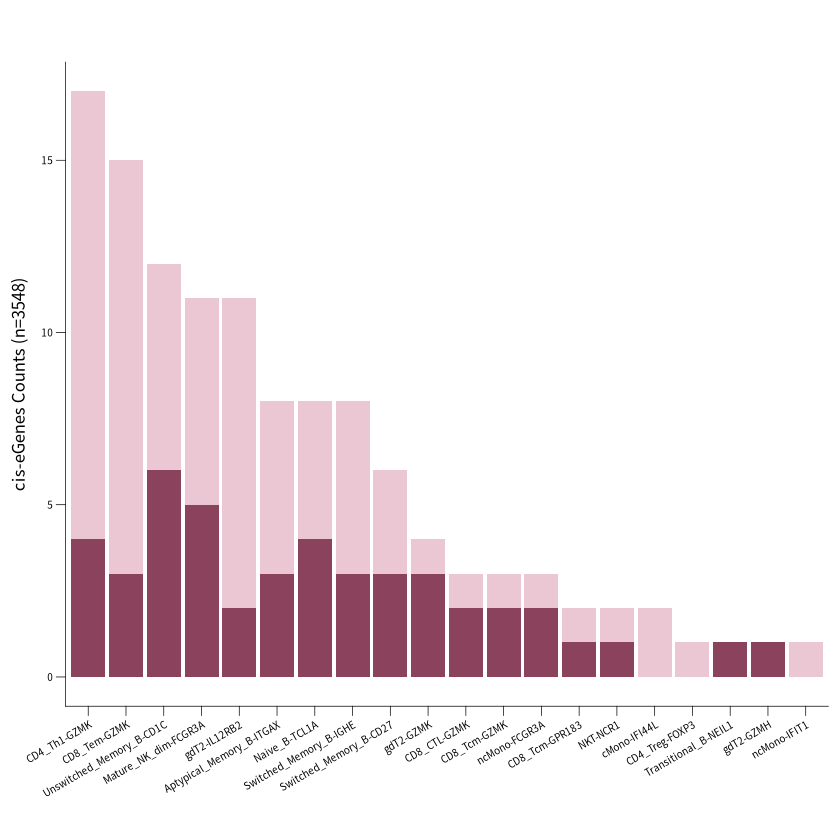

In [63]:
p <- ggplot(tmp_long, aes(x = celltype, y = count, fill = type)) +
     geom_bar(stat = "identity") +
     labs(title = "",
          x = "", y = "cis-eGenes Counts (n=3548)", fill = "Phenotype Type") +
     scale_fill_manual(values = c("Unique eGenes" = "#EBC7D3", "Shared eGenes" = "#8B425D"))+
     mytheme
p
ggsave("/media/AnalysisDisk2/Yangshichen/0_HIV_RNA/QTL/01.Dynamic/03.Result/plot/egene/egene_inter2groups_count-2.pdf",p,width=10,height=3)

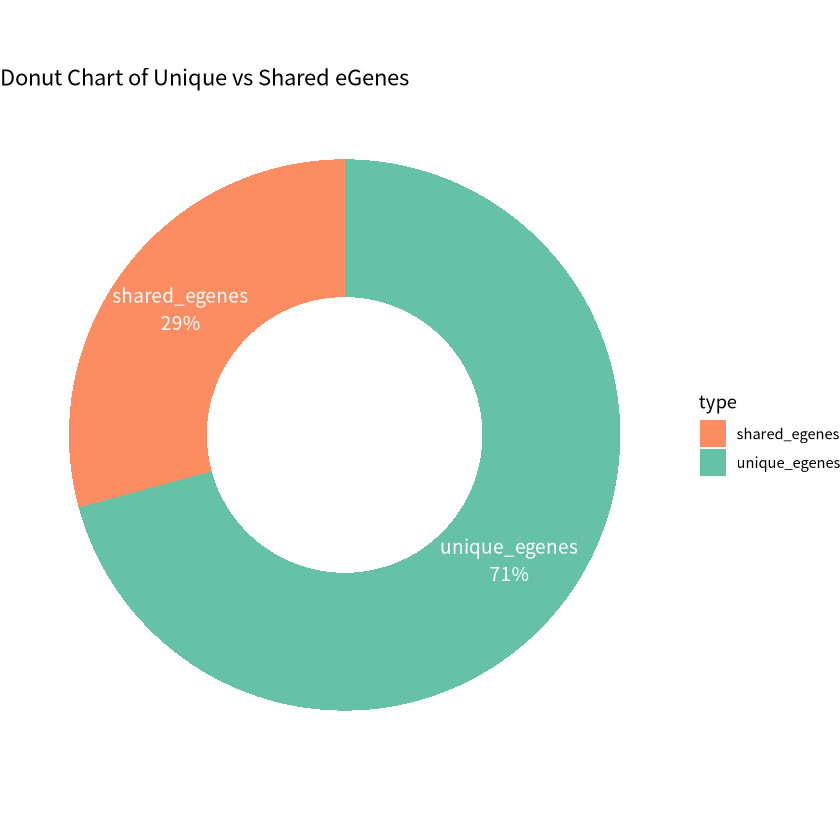

In [81]:
# 计算总和
gene_counts <- colSums(tmp[, c("unique_egenes", "shared_egenes")], na.rm = TRUE)

# 转为 dataframe
gene_df <- data.frame(
  type = names(gene_counts),
  count = as.numeric(gene_counts)
)

# 计算百分比 & 添加标签
gene_df$fraction <- gene_df$count / sum(gene_df$count)
gene_df$ymax <- cumsum(gene_df$fraction)
gene_df$ymin <- c(0, head(gene_df$ymax, n = -1))
gene_df$label <- paste0(gene_df$type, "\n", round(gene_df$fraction * 100), "%")

# 绘制圆环图
ggplot(gene_df, aes(ymax = ymax, ymin = ymin, xmax = 4, xmin = 3, fill = type)) +
  geom_rect() +
  coord_polar(theta = "y") +
  xlim(c(2, 4)) +  # 控制中间空心
  theme_void() +
  scale_fill_manual(values = c("unique_egenes" = "#66c2a5", "shared_egenes" = "#fc8d62")) +
  geom_text(aes(x = 3.5, y = (ymin + ymax)/2, label = label), color = "white", size = 4) +
  labs(title = "Donut Chart of Unique vs Shared eGenes") +
  theme(legend.position = "right")

In [67]:
cellratio <- as.data.frame(read.csv("/media/AnalysisDisk2/Yangshichen/0_HIV_RNA/样本统计/scRNA_proportions_L3.csv",check.names = F,header = T))
cellratio

sample  celltype_L3               count total_count proportion  
1    HD-H134 Aptypical_Memory_B-ITGAX    76  46020       1.651456e-03
2    HD-H134 CD4_Naive_T-CCR7          7030  46020       1.527597e-01
3    HD-H134 CD4_Naive_T-SOX4           604  46020       1.312473e-02
4    HD-H134 CD4_Tcm-CXCR5             1071  46020       2.327249e-02
5    HD-H134 CD4_Tcm-GPR183             719  46020       1.562364e-02
6    HD-H134 CD4_Tcm-IFIT3              478  46020       1.038679e-02
7    HD-H134 CD4_Tcm-SOX4                72  46020       1.564537e-03
8    HD-H134 CD4_Tem-CCR7neg           1577  46020       3.426771e-02
9    HD-H134 CD4_Tfh_like-CXCR5         316  46020       6.866580e-03
10   HD-H134 CD4_Th1-GZMK               718  46020       1.560191e-02
11   HD-H134 CD4_Th17-RORC              656  46020       1.425467e-02
12   HD-H134 CD4_Th22-CCR10             813  46020       1.766623e-02
13   HD-H134 CD4_Th-TNFRSF11A           416  46020       9.039548e-03
14   HD-H134 CD4_Treg-FCRL3             567  46020       1.232073e-02
15   HD-H134 CD4_Treg-FOXP3             583  46020       1.266841e-02
16   HD-H134 CD8_CTL-GZMB              4869  46020       1.058018e-01
17   HD-H134 CD8_CTL-GZMK               514  46020       1.116906e-02
18   HD-H134 CD8_Naive_T-CCR7          5168  46020       1.122990e-01
19   HD-H134 CD8_Tcm-GPR183             531  46020       1.153846e-02
20   HD-H134 CD8_Tcm-GZMK              1206  46020       2.620600e-02
21   HD-H134 CD8_Tcm-IFI44L              69  46020       1.499348e-03
22   HD-H134 CD8_Tem-GZMK              1504  46020       3.268144e-02
23   HD-H134 Cycling_T-MKI67             79  46020       1.716645e-03
24   HD-H134 Inflamed_NK_dim-IFI44L       3  46020       6.518905e-05
25   HD-H134 MAIT-SLC4A10               973  46020       2.114298e-02
26   HD-H134 Mature_NK_dim-FCGR3A      1472  46020       3.198609e-02
27   HD-H134 NKT-IFIT3                   32  46020       6.953498e-04
28   HD-H134 NKT-NCR1                  3096  46020       6.727510e-02
29   HD-H134 NK_bright-XCL1             363  46020       7.887875e-03
30   HD-H134 Naive_B-IFIT3               57  46020       1.238592e-03
⋮    ⋮       ⋮                         ⋮     ⋮           ⋮           
8207 PD-H308 NK_bright-XCL1             27   10767       2.507662e-03
8208 PD-H308 Naive_B-IFIT3              14   10767       1.300269e-03
8209 PD-H308 Naive_B-IL6                 4   10767       3.715055e-04
8210 PD-H308 Naive_B-TCL1A             794   10767       7.374385e-02
8211 PD-H308 Plasma_B-IGHA1              6   10767       5.572583e-04
8212 PD-H308 Plasma_B-IGHG1              1   10767       9.287638e-05
8213 PD-H308 Plasmablast-MKI67           0   10767       0.000000e+00
8214 PD-H308 Switched_Memory_B-CD27    112   10767       1.040215e-02
8215 PD-H308 Switched_Memory_B-CD86     96   10767       8.916133e-03
8216 PD-H308 Switched_Memory_B-IGHE     71   10767       6.594223e-03
8217 PD-H308 Terminal_NK_dim-CD160neg  184   10767       1.708925e-02
8218 PD-H308 Transitional_B-NEIL1      104   10767       9.659144e-03
8219 PD-H308 Transitional_NK-GZMK       19   10767       1.764651e-03
8220 PD-H308 Unswitched_Memory_B-CD1C  131   10767       1.216681e-02
8221 PD-H308 Unswitched_Memory_B-IFIT3  10   10767       9.287638e-04
8222 PD-H308 Unswitched_Memory_B-JAM3   42   10767       3.900808e-03
8223 PD-H308 cDC1-BATF3                  0   10767       0.000000e+00
8224 PD-H308 cDC2-CD1C                  25   10767       2.321910e-03
8225 PD-H308 cMono-CD14                530   10767       4.922448e-02
8226 PD-H308 cMono-IFI44L               82   10767       7.615863e-03
8227 PD-H308 cMono-IL1B                  1   10767       9.287638e-05
8228 PD-H308 gdT2-GZMH                  61   10767       5.665459e-03
8229 PD-H308 gdT2-GZMK                  23   10767       2.136157e-03
8230 PD-H308 gdT2-IL12RB2               17   10767       1.578898e-03
8231 PD-H308 ncMono-C1QA                51   10767       4.736695e-03
8232 PD-H308 nc

In [68]:
summarized_df <- cellratio %>%
  group_by(celltype_L3) %>%
  summarise(proportion_sum = sum(proportion, na.rm = TRUE)/142)
summarized_df <- as.data.frame(summarized_df)
summarized_df

celltype_L3               proportion_sum
1  Aptypical_Memory_B-ITGAX  0.0046756295  
2  CD4_Naive_T-CCR7          0.0686806421  
3  CD4_Naive_T-SOX4          0.0141626294  
4  CD4_Tcm-CXCR5             0.0230501119  
5  CD4_Tcm-GPR183            0.0164934246  
6  CD4_Tcm-IFIT3             0.0050521397  
7  CD4_Tcm-SOX4              0.0102786687  
8  CD4_Tem-CCR7neg           0.0178406435  
9  CD4_Tfh_like-CXCR5        0.0116591706  
10 CD4_Th-TNFRSF11A          0.0081585616  
11 CD4_Th1-GZMK              0.0088518998  
12 CD4_Th17-RORC             0.0137951751  
13 CD4_Th22-CCR10            0.0139961121  
14 CD4_Treg-FCRL3            0.0091861552  
15 CD4_Treg-FOXP3            0.0094713362  
16 CD8_CTL-GZMB              0.1123554754  
17 CD8_CTL-GZMK              0.0235765609  
18 CD8_Naive_T-CCR7          0.0866985867  
19 CD8_Tcm-GPR183            0.0055525506  
20 CD8_Tcm-GZMK              0.0397528917  
21 CD8_Tcm-IFI44L            0.0016679852  
22 CD8_Tem-GZMK              0.0362783805  
23 Cycling_T-MKI67           0.0044634705  
24 Inflamed_NK_dim-IFI44L    0.0001126845  
25 MAIT-SLC4A10              0.0249814212  
26 Mature_NK_dim-FCGR3A      0.0483631599  
27 NKT-IFIT3                 0.0017695613  
28 NKT-NCR1                  0.0989208222  
29 NK_bright-XCL1            0.0077166187  
30 Naive_B-IFIT3             0.0019002587  
31 Naive_B-IL6               0.0006749871  
32 Naive_B-TCL1A             0.0474328401  
33 Plasma_B-IGHA1            0.0013924060  
34 Plasma_B-IGHG1            0.0005493666  
35 Plasmablast-MKI67         0.0002454031  
36 Switched_Memory_B-CD27    0.0120784182  
37 Switched_Memory_B-CD86    0.0056510727  
38 Switched_Memory_B-IGHE    0.0032295326  
39 Terminal_NK_dim-CD160neg  0.0162083114  
40 Transitional_B-NEIL1      0.0057158386  
41 Transitional_NK-GZMK      0.0037074358  
42 Unswitched_Memory_B-CD1C  0.0146811730  
43 Unswitched_Memory_B-IFIT3 0.0009055722  
44 Unswitched_Memory_B-JAM3  0.0033533012  
45 cDC1-BATF3                0.0003240066  
46 cDC2-CD1C                 0.0077334954  
47 cMono-CD14                0.0713258287  
48 cMono-IFI44L              0.0168068768  
49 cMono-IL1B                0.0014942060  
50 gdT2-GZMH                 0.0159398417  
51 gdT2-GZMK                 0.0055635656  
52 gdT2-IL12RB2              0.0027772685  
53 ncMono-C1QA               0.0020387286  
54 ncMono-FCGR3A             0.0205788651  
55 ncMono-IFI44L             0.0048316889  
56 ncMono-IFIT1              0.0024514274  
57 pDC-AXL                   0.0001789299  
58 pDC-LILRA4                0.0026668843

In [69]:
tmp <- as.data.frame(tmp)
tmp

celltype                 unique_egenes shared_egenes total_egenes
1  Aptypical_Memory_B-ITGAX   5             3             8         
2  CD4_Naive_T-CCR7         727           221           948         
3  CD4_Naive_T-SOX4         540           197           737         
4  CD4_Tcm-CXCR5            280           140           420         
5  CD4_Tcm-GPR183            62            34            96         
6  CD4_Tcm-IFIT3             36            21            57         
7  CD4_Tcm-SOX4              41            26            67         
8  CD4_Tem-CCR7neg           27            13            40         
9  CD4_Tfh_like-CXCR5        25            13            38         
10 CD4_Th-TNFRSF11A          93            60           153         
11 CD4_Th1-GZMK              13             4            17         
12 CD4_Th17-RORC             69            31           100         
13 CD4_Th22-CCR10            17             9            26         
14 CD4_Treg-FCRL3           467           199           666         
15 CD4_Treg-FOXP3             1             0             1         
16 CD8_CTL-GZMK               1             2             3         
17 CD8_Naive_T-CCR7          25            12            37         
18 CD8_Tcm-GPR183             1             1             2         
19 CD8_Tcm-GZMK               1             2             3         
20 CD8_Tem-GZMK              12             3            15         
21 Mature_NK_dim-FCGR3A       6             5            11         
22 NKT-NCR1                   1             1             2         
23 Naive_B-TCL1A              4             4             8         
24 Switched_Memory_B-CD27     3             3             6         
25 Switched_Memory_B-IGHE     5             3             8         
26 Transitional_B-NEIL1       0             1             1         
27 Unswitched_Memory_B-CD1C   6             6            12         
28 Unswitched_Memory_B-JAM3  25            14            39         
29 cMono-IFI44L               2             0             2         
30 gdT2-GZMH                  0             1             1         
31 gdT2-GZMK                  1             3             4         
32 gdT2-IL12RB2               9             2            11         
33 ncMono-FCGR3A              1             2             3         
34 ncMono-IFIT1               1             0             1

In [71]:
merged_data <- left_join(tmp, summarized_df, by = c("celltype" = "celltype_L3"))
merged_data

celltype                 unique_egenes shared_egenes total_egenes
1  Aptypical_Memory_B-ITGAX   5             3             8         
2  CD4_Naive_T-CCR7         727           221           948         
3  CD4_Naive_T-SOX4         540           197           737         
4  CD4_Tcm-CXCR5            280           140           420         
5  CD4_Tcm-GPR183            62            34            96         
6  CD4_Tcm-IFIT3             36            21            57         
7  CD4_Tcm-SOX4              41            26            67         
8  CD4_Tem-CCR7neg           27            13            40         
9  CD4_Tfh_like-CXCR5        25            13            38         
10 CD4_Th-TNFRSF11A          93            60           153         
11 CD4_Th1-GZMK              13             4            17         
12 CD4_Th17-RORC             69            31           100         
13 CD4_Th22-CCR10            17             9            26         
14 CD4_Treg-FCRL3           467           199           666         
15 CD4_Treg-FOXP3             1             0             1         
16 CD8_CTL-GZMK               1             2             3         
17 CD8_Naive_T-CCR7          25            12            37         
18 CD8_Tcm-GPR183             1             1             2         
19 CD8_Tcm-GZMK               1             2             3         
20 CD8_Tem-GZMK              12             3            15         
21 Mature_NK_dim-FCGR3A       6             5            11         
22 NKT-NCR1                   1             1             2         
23 Naive_B-TCL1A              4             4             8         
24 Switched_Memory_B-CD27     3             3             6         
25 Switched_Memory_B-IGHE     5             3             8         
26 Transitional_B-NEIL1       0             1             1         
27 Unswitched_Memory_B-CD1C   6             6            12         
28 Unswitched_Memory_B-JAM3  25            14            39         
29 cMono-IFI44L               2             0             2         
30 gdT2-GZMH                  0             1             1         
31 gdT2-GZMK                  1             3             4         
32 gdT2-IL12RB2               9             2            11         
33 ncMono-FCGR3A              1             2             3         
34 ncMono-IFIT1               1             0             1         
   proportion_sum
1  0.004675629   
2  0.068680642   
3  0.014162629   
4  0.023050112   
5  0.016493425   
6  0.005052140   
7  0.010278669   
8  0.017840644   
9  0.011659171   
10 0.008158562   
11 0.008851900   
12 0.013795175   
13 0.013996112   
14 0.009186155   
15 0.009471336   
16 0.023576561   
17 0.086698587   
18 0.005552551   
19 0.039752892   
20 0.036278381   
21 0.048363160   
22 0.098920822   
23 0.047432840   
24 0.012078418   
25 0.003229533   
26 0.005715839   
27 0.014681173   
28 0.003353301   
29 0.016806877   
30 0.015939842   
31 0.005563566   
32 0.002777268   
33 0.020578865   
34 0.002451427

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


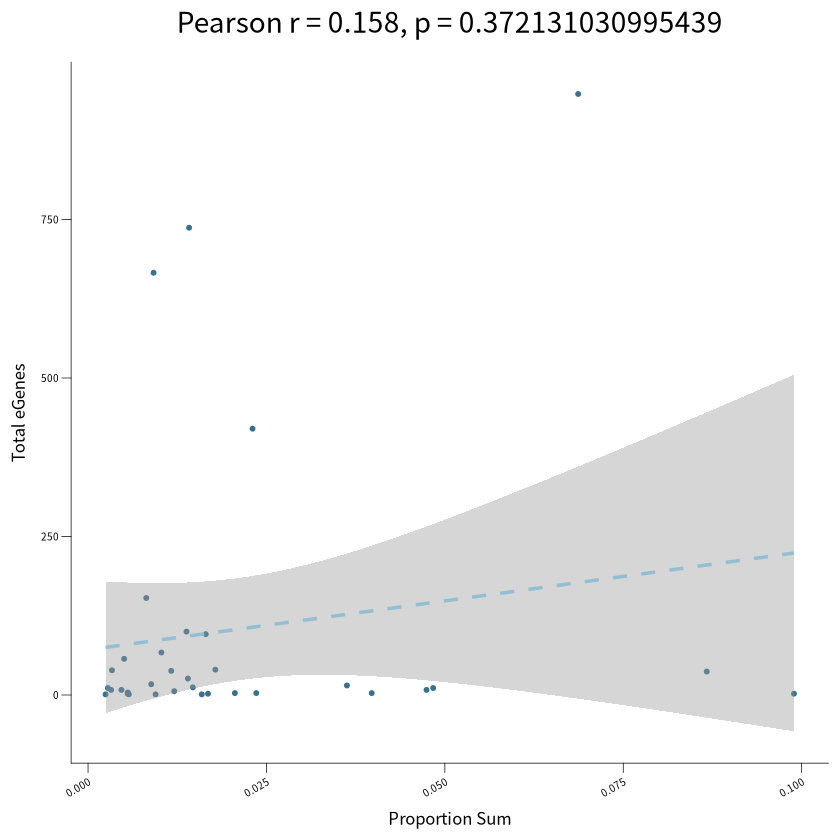

In [73]:
cor_test <- cor.test(merged_data$total_egenes,
                     merged_data$proportion_sum,
                     method = "pearson")

cor_val <- round(cor_test$estimate, 3)
p_val <- cor_test$p.value

p <- ggplot(merged_data, aes(x = proportion_sum, y = total_egenes)) +
     geom_point(size=1,color = "#37718F") +
     geom_smooth(method = "lm", se = T, color = "#94BFD2", linetype=2) +
     labs(x = "Proportion Sum", y = "Total eGenes", title = paste0("Pearson r = ", cor_val, ", p = ", p_val)) +
     mytheme
p
ggsave("/media/AnalysisDisk2/Yangshichen/0_HIV_RNA/QTL/01.Dynamic/03.Result/plot/egene/inter_egene_cor_cellratio.pdf",p,width=3,height=3.5)

#### interactions-3groups eGene统计

In [47]:
# 设置你的根目录
root_dir <- "/media/AnalysisDisk2/Yangshichen/0_HIV_RNA/QTL/01.Dynamic/03.Result/eQTL/"

# 获取所有子文件夹
celltype_dirs <- list.dirs(root_dir, recursive = FALSE)

# 初始化一个空的dataframe
all_qtl_data <- data.frame()

# 循环读取每个文件夹下的目标文件
for (dir in celltype_dirs) {
  # 构造完整文件路径
  file_path <- file.path(dir, "/diseases_3groups/diseases_3groups.cis_qtl_top_assoc.txt.gz")
  
  # 检查文件是否存在
  if (file.exists(file_path)) {
    # 读取数据
    data <- read_tsv(file_path, show_col_types = FALSE)
    
    # 提取细胞类型名（文件夹名）
    celltype <- basename(dir)
    
    # 添加列
    data$celltype <- celltype
    
    # 合并
    all_qtl_data <- bind_rows(all_qtl_data, data)
  } else {
    warning(paste("文件不存在:", file_path))
  }
}

Warning message:
“文件不存在: /media/AnalysisDisk2/Yangshichen/0_HIV_RNA/QTL/01.Dynamic/03.Result/eQTL//.ipynb_checkpoints//diseases_3groups/diseases_3groups.cis_qtl_top_assoc.txt.gz”
Warning message:
“文件不存在: /media/AnalysisDisk2/Yangshichen/0_HIV_RNA/QTL/01.Dynamic/03.Result/eQTL//Plasma_B-IGHA1//diseases_3groups/diseases_3groups.cis_qtl_top_assoc.txt.gz”


In [48]:
write.csv(all_qtl_data,'/media/AnalysisDisk2/Yangshichen/0_HIV_RNA/QTL/01.Dynamic/03.Result/eQTL_all_lead_inter_3groups_qvalues.csv')

In [49]:
all_qtl_data <- read.csv('/media/AnalysisDisk2/Yangshichen/0_HIV_RNA/QTL/01.Dynamic/03.Result/eQTL_all_lead_inter_3groups_qvalues.csv')
all_qtl_data

X      phenotype_id variant_id        start_distance end_distance
1       1     NOC2L        1_1597007_G_[A]    652803         637698     
2       2     ISG15        1_1580890_C_[T]    579751         566350     
3       3     SDF4         1_821028_A_[G]    -395904        -411003     
4       4     B3GALT6      1_1142582_T_[C]    -89656         -92459     
5       5     UBE2J2       1_2244599_C_[T]    990689         970735     
6       6     ACAP3        1_2059863_G_[A]    767472         750254     
7       7     INTS11       1_1188963_C_[T]   -122623        -135724     
8       8     CPTP         1_1989803_A_[G]    665046         660907     
9       9     TAS1R3       1_2280505_G_[A]    949224         945191     
10     10     DVL1         1_1118005_T_[C]   -217272        -231413     
11     11     AURKAIP1     1_2320508_G_[A]    946777         945301     
12     12     CCNL2        1_2312079_T_[C]    926367         912744     
13     13     MRPL20-AS1   1_1569180_A_[T]    169664         167134     
14     14     MRPL20       1_1681101_C_[T]    279191         273808     
15     15     ATAD3B       1_1989803_A_[G]    518037         491955     
16     16     ATAD3A       1_2189679_T_[C]    677516         654994     
17     17     SSU72        1_2447809_G_[A]    906135         872946     
18     18     MIB2         1_1714638_T_[G]     99183          84033     
19     19     CDK11B       1_2448062_C_[G]    812836         789050     
20     20     SLC35E2B     1_1037603_C_[T]   -621927        -655192     
21     21     CDK11A       1_1219159_G_[A]   -483221        -505198     
22     22     SLC35E2A     1_1110491_C_[T]   -624200        -629066     
23     23     NADK         1_1291377_G_[A]   -459856        -489080     
24     24     GNB1         1_903551_A_[C]    -881735        -988741     
25     25     PRKCZ        1_3145931_G_[A]   1095519         960536     
26     26     FAAP20       1_2846345_T_[C]    661883         633625     
27     27     SKI          1_3205757_G_[A]    978368         895544     
28     28     RER1         1_1811084_A_[T]   -580692        -594358     
29     29     PANK4        1_3432251_C_[T]    923713         905654     
30     30     TNFRSF14     1_3077222_C_[T]    521582         511840     
⋮      ⋮      ⋮            ⋮                 ⋮              ⋮           
384628 384628 PARVB        22_43729050_C_[T] -270162        -443889     
384629 384629 PARVG        22_43226613_G_[A] -946344        -992920     
384630 384630 NUP50        22_45532866_A_[C]  368940         344849     
384631 384631 KIAA0930     22_44847359_C_[T] -344886        -393535     
384632 384632 FAM118A      22_44616707_T_[C] -692262        -725248     
384633 384633 ATXN10       22_46518380_C_[A]  846581         673073     
384634 384634 PRR34-AS1    22_45149975_T_[C] -903731        -907235     
384635 384635 PPARA        22_46526633_T_[C]  376111         282878     
384636 384636 TRMU         22_46710903_T_[C]  380027         353563     
384637 384637 CELSR1       22_45840545_G_[A] -520290        -697075     
384638 384638 GRAMD4       22_47543017_T_[G]  967004         863227     
384639 384639 CERK         22_45787687_C_[T] -896724        -950565     
384640 384640 TBC1D22A     22_47330080_A_[G]  567462         154381     
384641 384641 BRD1         22_49151951_T_[C] -621333        -675922     
384642 384642 CRELD2       22_49346035_T_[C] -572133        -581505     
384643 384643 PIM3         22_49415680_G_[A] -545089        -548392     
384644 384644 TRABD        22_49541343_T_[G] -644571        -658255     
384645 384645 SELENOO      22_49229360_C_[T] -971652        -988256     
384646 384646 TUBGCP6      22_49462025_A_[G] -755665        -782998     
384647 384647 HDAC10       22_50736234_C_[T]  491050         484829     
384648 384648 PPP6R2       22_49493857_A_[G] -849448        -951233     
384649 384649 SBF1         22_50661446_C_[G]  218226         177523     
384650 384650 LMF2         22_50045460_A_[G] -457490        -4622

In [56]:
sub_qtl_data <- subset(all_qtl_data, pval_adj_bh < 0.05)
sub_qtl_data

X      phenotype_id variant_id         start_distance end_distance
12161   12161 CACFD1       9_133802030_A_[C]   342064          331182    
14619   14619 INTS14       15_65300630_A_[C]  -278124         -310659    
20044   20044 PEX6         6_42342926_G_[A]   -620940         -636255    
20465   20465 ATXN7L1      7_105821133_G_[A]   216360          -55466    
21047   21047 RALGDS       9_133600274_T_[A]   502553          450940    
21135   21135 MSRB2        10_23424804_G_[A]   329224          302791    
21251   21251 IFIT5        10_88676583_C_[T]  -737986         -745022    
21408   21408 TRIM22       11_5182988_A_[C]   -506623         -554101    
21622   21622 RAD9A        11_67035526_C_[T]  -282346         -362884    
23387   23387 SP2          17_48571537_C_[T]   675386          642580    
24084   24084 BCL2L12      19_50492623_G_[A]   827480          818707    
52046   52046 PAG1         8_80454046_A_[C]   -513765         -658022    
53829   53829 KLHDC2       14_48784014_C_[T]  -984117        -1002371    
75125   75125 NAF1         4_163624626_A_[C]   514552          457736    
75599   75599 BTN3A2       6_27312073_T_[C]    946913          933753    
78431   78431 TPP2         13_102464712_G_[A] -132247         -215246    
93393   93393 MYOM2        8_3076020_T_[C]    1030973          910468    
107756 107756 CAMK2N1      1_21480780_G_[A]    998388          994570    
108062 108062 TMEM167B     1_108534302_G_[C]  -556463         -562632    
108472 108472 ZBTB18       1_244220536_A_[G]   171988          163060    
109874 109874 MRPS27       5_73235502_A_[G]   1020548          913785    
110113 110113 PHYKPL       5_177497217_C_[A]  -711255         -735585    
112115 112115 RAB6A        11_74459786_A_[G]   784147          698649    
113642 113642 ZNF319       16_58744071_C_[A]   749394          743399    
114091 114091 NOG          17_55959815_T_[C]  -633885         -635796    
115237 115237 MICAL3       22_17019146_T_[C]  -768504        -1005415    
148248 148248 CHRAC1       8_140383391_T_[C]  -127921         -133763    
205571 205571 GPSM3        6_31446811_C_[T]   -743956         -748712    
258412 258412 GABARAPL2    16_75138186_G_[A]  -428190         -439695    
327712 327712 PPP2R5B      11_65447879_C_[T]   530325          513404    
343873 343873 CIITA        16_10570657_C_[G]  -295566         -372364    
378395 378395 PPOX         1_160388671_A_[G]  -777386         -789342    
379041 379041 COL4A4       2_227715109_C_[T]   712394          550656    
381712 381712 NEAT1        11_66017795_C_[G]   595020          572255    
384476 384476 PEX26        22_17303490_C_[A]  -774434         -801906    
       af       ma_samples ma_count pval_g      b_g         ⋯ pval_i    
12161  0.119718 34          34      5.94267e-02  0.33769600 ⋯ 0.01836370
14619  0.133803 35          38      9.74699e-03 -0.30609400 ⋯ 0.67029400
20044  0.131387 34          36      7.69258e-03  0.43184400 ⋯ 0.11706500
20465  0.321168 77          88      4.39631e-04  0.40531500 ⋯ 0.02350800
21047  0.266423 63          73      1.38470e-02 -0.39241600 ⋯ 0.95356000
21135  0.182482 44          50      3.91058e-02  0.30081700 ⋯ 0.45071700
21251  0.149635 37          41      6.58776e-03  0.42653000 ⋯ 0.03898070
21408  0.131387 29          36      2.38614e-03 -0.54285200 ⋯ 0.03151790
21622  0.120438 26          33      3.72464e-01 -0.12111400 ⋯ 0.39206400
23387  0.299270 72          82      3.04183e-02 -0.21452500 ⋯ 0.05020990
24084  0.156934 34          43      1.90663e-03  0.40790200 ⋯ 0.30156600
52046  0.130435 32          36      4.46928e-04 -0.63842800 ⋯ 0.50626300
53829  0.144928 37          40      8.69391e-05 -0.76323400 ⋯ 0.29959700
75125  0.143885 36          40      1.25643e-02  0.36456900 ⋯ 0.00619556
75599  0.388489 87         108      1.04820e-04  0.54902700 ⋯ 0.02643290
78431  0.205036 53          57      6.51837e-02 -0.27745100 ⋯ 0.68812600
93393  0.361702 77         102      8.86141e-04  0.51838800 ⋯ 0.55328200
107756 0.223404 63          6

In [57]:
length(unique(sub_qtl_data$phenotype_id))

[1] 35

### caPeak

#### permutations caPeak统计

In [30]:
data <- as.data.frame(read.csv("/media/AnalysisDisk2/Yangshichen/0_HIV_RNA/QTL/01.Dynamic/03.Result/caQTL_all_lead_perm_qvalues.csv",check.names = F,header = T))
data

X      phenotype_id            num_var beta_shape1 beta_shape2 true_df  
1       0     chr1:778498-778999      1929    1.0645808   169.4195    101.5061 
2       1     chr1:817103-817604      1957    1.0329543   188.4632    105.1320 
3       2     chr1:827257-827758      1964    1.0248731   190.2065    105.7571 
4       3     chr1:869641-870142      2016    0.9956691   176.3600    103.1675 
5       4     chr1:959080-959581      2214    1.0507896   183.6780    102.6203 
6       5     chr1:966748-967249      2239    1.0072855   181.8297    102.2619 
7       6     chr1:999920-1000421     2376    1.0132326   210.5724    103.3268 
8       7     chr1:1000649-1001150    2378    0.9818671   207.9698    104.4955 
9       8     chr1:1009115-1009616    2396    1.0029188   182.5737    100.3507 
10      9     chr1:1013247-1013748    2408    1.0458966   223.9515    104.0303 
11     10     chr1:1032941-1033442    2442    1.0512500   211.8329    102.7820 
12     11     chr1:1038674-1039175    2448    1.0099517   219.4340    104.7498 
13     12     chr1:1115969-1116470    2651    1.0458769   243.7749    104.4419 
14     13     chr1:1231818-1232319    2779    1.0344434   241.1319    104.3427 
15     14     chr1:1273653-1274154    2834    1.0443732   247.5699    104.6456 
16     15     chr1:1305496-1305997    2903    1.0245476   231.9317    102.2962 
17     16     chr1:1308160-1308661    2904    1.0293720   268.3272    105.9746 
18     17     chr1:1324473-1324974    2933    1.0410556   268.7460    104.7701 
19     18     chr1:1349168-1349669    3007    1.0399433   257.8445    103.2255 
20     19     chr1:1375155-1375656    3097    1.0418782   277.6652    104.3861 
21     20     chr1:1399224-1399725    3135    1.0429628   263.3558    102.6497 
22     21     chr1:1407071-1407572    3146    1.0584192   280.0376    103.7642 
23     22     chr1:1471461-1471962    3244    1.0551751   306.6473    103.8769 
24     23     chr1:1511832-1512333    3244    1.0238644   312.9204    105.8034 
25     24     chr1:1573746-1574247    3244    1.0370905   289.5226    103.0580 
26     25     chr1:1574671-1575172    3244    1.0661783   307.6627    103.9774 
27     26     chr1:1615142-1615643    3243    1.0474777   309.5097    104.6769 
28     27     chr1:1615920-1616421    3243    1.0040650   256.4021    100.6868 
29     28     chr1:1630188-1630689    3242    0.9938937   258.3985    101.2276 
30     29     chr1:1658882-1659383    3242    1.0730687   287.7875    102.4873 
⋮      ⋮      ⋮                       ⋮       ⋮           ⋮           ⋮        
873798 873797 chr22:50207433-50207934 3290    1.000903    285.8813    101.54472
873799 873798 chr22:50209768-50210269 3278    1.004210    273.7515    100.29851
873800 873799 chr22:50241029-50241530 3173    1.043537    291.9071    101.17802
873801 873800 chr22:50244274-50244775 3167    1.042886    324.9844    104.56714
873802 873801 chr22:50244805-50245306 3167    1.043107    317.4657    104.02875
873803 873802 chr22:50247703-50248204 3162    1.018083    314.6943    104.50662
873804 873803 chr22:50251054-50251555 3159    1.017124    287.0804    101.31686
873805 873804 chr22:50252072-50252573 3158    1.030706    327.9227    104.96507
873806 873805 chr22:50276111-50276612 3082    1.008444    255.1214    100.63127
873807 873806 chr22:50292540-50293041 2975    1.015064    290.7325    104.49728
873808 873807 chr22:50299177-50299678 2958    1.011695    254.6808    101.19306
873809 873808 chr22:50304358-50304859 2939    1.008360    258.0138    101.79536
873810 873809 chr22:50314342-50314843 2925    1.055338    285.6516    104.50687
873811 873810 chr22:50342973-50343474 2866    1.042023    285.0013    105.28220
873812 873811 chr22:50469243-50469744 2425    1.027822    202.3270    103.20702
873813 873812 chr22:50469790-50470291 2424    1.056174    200.9772    102.20683
873814 873813 chr22:50470420-50470921 2423    1.039435    187.6300    101.07394
873815 873814 chr22:50473144-50473645 2421    1.000784    175.1791     99.95418
873816 

In [31]:
sub_data <- subset(data, celltype_level_qval < 0.05)
sub_data

X      phenotype_id            num_var beta_shape1 beta_shape2 true_df 
2        1    chr1:817103-817604      1957    1.0329543   188.4632    105.1320
30      29    chr1:1658882-1659383    3242    1.0730687   287.7875    102.4873
32      31    chr1:1692584-1693085    3242    1.0450348   303.4425    104.7627
33      32    chr1:1724171-1724672    3242    1.0405096   296.7527    104.1197
34      33    chr1:1764189-1764690    3240    1.0743599   272.5999    101.3701
38      37    chr1:1857057-1857558    3235    1.0227611   286.3811    103.5846
42      41    chr1:1891422-1891923    3244    1.0498594   280.9087    103.1466
161    160    chr1:8424521-8425022    3026    1.0864522   302.1380    104.2526
186    185    chr1:9067156-9067657    2639    1.0161358   262.9184    105.0070
193    192    chr1:9162759-9163260    2524    1.0279980   258.9146    105.6530
273    272    chr1:11749092-11749593  3104    1.0417027   271.7674    104.8703
292    291    chr1:11985786-11986287  3315    1.0553483   233.0790    102.9273
324    323    chr1:12601893-12602394  3186    0.9935937   258.5736    102.7958
328    327    chr1:13593742-13594243  3983    1.0524247   335.8488    103.4023
344    343    chr1:15260573-15261074  3146    1.0123768   308.7281    106.0383
365    364    chr1:15514951-15515452  2880    1.0292000   272.2722    106.6867
388    387    chr1:15966001-15966502  2941    1.0308325   254.1428    103.7281
415    414    chr1:16444296-16444797  3056    1.0269940   211.7473    103.5644
420    419    chr1:16889274-16889775  3429    1.0125209   286.5430    104.6764
421    420    chr1:16895454-16895955  3443    1.0458037   305.8444    105.5581
422    421    chr1:16895983-16896484  3442    1.0331169   289.6155    104.8083
425    424    chr1:16904669-16905170  3449    1.0404680   310.4796    105.7669
426    425    chr1:16905185-16905686  3449    1.0557368   299.7918    105.0629
436    435    chr1:17098392-17098893  3572    0.9825974   261.0913    100.6458
449    448    chr1:17393179-17393680  3836    1.0036156   387.4511    104.9306
450    449    chr1:17398248-17398749  3853    1.0176623   439.6630    108.2321
469    468    chr1:18902627-18903128  3970    1.0509775   448.0470    107.8195
471    470    chr1:18907873-18908374  3960    0.9947799   359.4226    103.3097
541    540    chr1:20851735-20852236  2984    1.0157326   200.9498    103.8123
593    592    chr1:22735200-22735701  3143    1.0146614   189.3347    100.3219
⋮      ⋮      ⋮                       ⋮       ⋮           ⋮           ⋮       
872853 872852 chr21:33205410-33205911 2392    1.0013491   161.4729    103.6981
872936 872935 chr21:37072492-37072993 3651    1.0416949   252.5112    108.3809
872940 872939 chr21:37221108-37221609 3372    1.0415460   228.4124    106.1262
872953 872952 chr21:38831543-38832044 4153    1.0538222   301.6085    105.0394
872987 872986 chr21:42107715-42108216 4252    1.0125768   404.8645    105.3466
873002 873001 chr21:42474465-42474966 4022    1.0580119   427.2065    106.1434
873009 873008 chr21:42532737-42533238 3864    1.0494757   385.4758    105.1124
873013 873012 chr21:42561671-42562172 3774    1.0294682   359.3109    104.0083
873020 873019 chr21:43325927-43326428 2975    1.0072122   207.4295    103.7199
873041 873040 chr21:44065410-44065911 3132    1.0273194   233.9550    101.7585
873057 873056 chr21:44865522-44866023 3712    1.0470502   306.4651    105.1860
873080 873079 chr21:45592262-45592763 4020    1.0478306   276.4643    103.7531
873084 873083 chr21:45892085-45892586 3318    0.9926088   203.8423    102.2823
873089 873088 chr21:46253651-46254152 2483    1.0166372   151.3964    102.7896
873118 873117 chr22:17800776-17801277 2989    1.0367111   386.7332    107.9123
873132 873131 chr22:18528454-18528955 2040    0.9801092   159.0201    103.8752
873133 873132 chr22:18528992-18529493 2040    1.0438898   166.7269    103.0966
873148 873147 chr22:19448023-19448524 2262    1.0434746   239.1784    107.2436
873163 873162 chr22:20299373-20299874 2810    1.0549539  

In [33]:
length(unique(sub_data$phenotype_id))

[1] 14635

In [34]:
write.csv(sub_data,'/media/AnalysisDisk2/Yangshichen/0_HIV_RNA/QTL/01.Dynamic/03.Result/caQTL_all_lead_perm_qvalues_0.05.csv')

##### 1

In [50]:
data <- as.data.frame(read.csv("/media/AnalysisDisk2/Yangshichen/0_HIV_RNA/QTL/01.Dynamic/03.Result/caQTL_all_lead_perm_qvalues.csv",check.names = F,header = T))

In [51]:
subdata <- subset(data,celltype_level_qval < 0.05)
subdata <- subdata[,-c(1)]
subdata

phenotype_id            num_var beta_shape1 beta_shape2 true_df 
2      chr1:817103-817604      1957    1.0329543   188.4632    105.1320
30     chr1:1658882-1659383    3242    1.0730687   287.7875    102.4873
32     chr1:1692584-1693085    3242    1.0450348   303.4425    104.7627
33     chr1:1724171-1724672    3242    1.0405096   296.7527    104.1197
34     chr1:1764189-1764690    3240    1.0743599   272.5999    101.3701
38     chr1:1857057-1857558    3235    1.0227611   286.3811    103.5846
42     chr1:1891422-1891923    3244    1.0498594   280.9087    103.1466
161    chr1:8424521-8425022    3026    1.0864522   302.1380    104.2526
186    chr1:9067156-9067657    2639    1.0161358   262.9184    105.0070
193    chr1:9162759-9163260    2524    1.0279980   258.9146    105.6530
273    chr1:11749092-11749593  3104    1.0417027   271.7674    104.8703
292    chr1:11985786-11986287  3315    1.0553483   233.0790    102.9273
324    chr1:12601893-12602394  3186    0.9935937   258.5736    102.7958
328    chr1:13593742-13594243  3983    1.0524247   335.8488    103.4023
344    chr1:15260573-15261074  3146    1.0123768   308.7281    106.0383
365    chr1:15514951-15515452  2880    1.0292000   272.2722    106.6867
388    chr1:15966001-15966502  2941    1.0308325   254.1428    103.7281
415    chr1:16444296-16444797  3056    1.0269940   211.7473    103.5644
420    chr1:16889274-16889775  3429    1.0125209   286.5430    104.6764
421    chr1:16895454-16895955  3443    1.0458037   305.8444    105.5581
422    chr1:16895983-16896484  3442    1.0331169   289.6155    104.8083
425    chr1:16904669-16905170  3449    1.0404680   310.4796    105.7669
426    chr1:16905185-16905686  3449    1.0557368   299.7918    105.0629
436    chr1:17098392-17098893  3572    0.9825974   261.0913    100.6458
449    chr1:17393179-17393680  3836    1.0036156   387.4511    104.9306
450    chr1:17398248-17398749  3853    1.0176623   439.6630    108.2321
469    chr1:18902627-18903128  3970    1.0509775   448.0470    107.8195
471    chr1:18907873-18908374  3960    0.9947799   359.4226    103.3097
541    chr1:20851735-20852236  2984    1.0157326   200.9498    103.8123
593    chr1:22735200-22735701  3143    1.0146614   189.3347    100.3219
⋮      ⋮                       ⋮       ⋮           ⋮           ⋮       
872853 chr21:33205410-33205911 2392    1.0013491   161.4729    103.6981
872936 chr21:37072492-37072993 3651    1.0416949   252.5112    108.3809
872940 chr21:37221108-37221609 3372    1.0415460   228.4124    106.1262
872953 chr21:38831543-38832044 4153    1.0538222   301.6085    105.0394
872987 chr21:42107715-42108216 4252    1.0125768   404.8645    105.3466
873002 chr21:42474465-42474966 4022    1.0580119   427.2065    106.1434
873009 chr21:42532737-42533238 3864    1.0494757   385.4758    105.1124
873013 chr21:42561671-42562172 3774    1.0294682   359.3109    104.0083
873020 chr21:43325927-43326428 2975    1.0072122   207.4295    103.7199
873041 chr21:44065410-44065911 3132    1.0273194   233.9550    101.7585
873057 chr21:44865522-44866023 3712    1.0470502   306.4651    105.1860
873080 chr21:45592262-45592763 4020    1.0478306   276.4643    103.7531
873084 chr21:45892085-45892586 3318    0.9926088   203.8423    102.2823
873089 chr21:46253651-46254152 2483    1.0166372   151.3964    102.7896
873118 chr22:17800776-17801277 2989    1.0367111   386.7332    107.9123
873132 chr22:18528454-18528955 2040    0.9801092   159.0201    103.8752
873133 chr22:18528992-18529493 2040    1.0438898   166.7269    103.0966
873148 chr22:19448023-19448524 2262    1.0434746   239.1784    107.2436
873163 chr22:20299373-20299874 2810    1.0549539   321.5816    107.9096
873175 chr22:20697442-20697943 2606    1.0039899   269.0860    106.7616
873421 chr22:33325462-33325963 3468    1.0308621   249.5571    104.5259
873489 chr22:37284875-37285376 3172    1.0390375   266.3570    106.2223
873557 chr22:39100086-39100587 2133    1.0296203   167.6268    103.9099
873566 chr22:39351520-39352021 1855    1.043057

In [52]:
colnames(subdata)

[1] "phenotype_id"                         
 [2] "num_var"                              
 [3] "beta_shape1"                          
 [4] "beta_shape2"                          
 [5] "true_df"                              
 [6] "pval_true_df"                         
 [7] "variant_id"                           
 [8] "start_distance"                       
 [9] "end_distance"                         
[10] "ma_samples"                           
[11] "ma_count"                             
[12] "af"                                   
[13] "pval_nominal"                         
[14] "slope"                                
[15] "slope_se"                             
[16] "pval_perm"                            
[17] "pval_beta"                            
[18] "celltype"                             
[19] "celltype_level_qval"                  
[20] "celltype_level_pval_nominal_threshold"
[21] "study_wise_qval"                      
[22] "study_wise_nominal_threshold"         
[23] "peak"                                 
[24] "annotation"                           
[25] "SYMBOL"

In [53]:
length(unique(subdata$phenotype_id))

[1] 14635

In [54]:
# 每个 phenotype_id 出现在哪些 celltype
pheno_cell_map <- subdata %>%
  distinct(celltype, phenotype_id) %>%
  group_by(phenotype_id) %>%
  summarise(celltype_count = n(),
            celltypes = paste(sort(unique(celltype)), collapse = ",")) %>%
  ungroup()

In [55]:
# 特有的 phenotype_id
unique_phenos <- pheno_cell_map %>%
  filter(celltype_count == 1)

# 共享的 phenotype_id
shared_phenos <- pheno_cell_map %>%
  filter(celltype_count > 1)

In [56]:
# 合并 celltype 到 pheno 表
df_pheno_info <- subdata %>%
  distinct(celltype, phenotype_id) %>%
  left_join(pheno_cell_map, by = "phenotype_id")

# 每个 celltype 的统计
tmp <- df_pheno_info %>% group_by(celltype) %>%
       summarise(unique_phenotype_n = sum(celltype_count == 1),
                 shared_phenotype_n = sum(celltype_count > 1))
tmp$total_egenes <- tmp$unique_phenotype_n + tmp$shared_phenotype_n
colnames(tmp) <- c('celltype','unique_egenes','shared_egenes','total_egenes')
tmp$celltype <- factor(tmp$celltype,levels = c('CD4_Naive_T-CCR7','CD4_Tcm-CXCR5','CD4_Th22-CCR10','CD4_Th17-RORC','CD4_Tfh_like-CXCR5','CD4_Treg-FOXP3','CD4_Tcm-GPR183','CD4_Treg-FCRL3','CD4_Tem-CCR7neg','CD4_Th-TNFRSF11A','CD8_CTL-GZMB','NKT-NCR1','CD8_Naive_T-CCR7','CD8_Tem-GZMK','CD8_Tcm-GZMK','MAIT-SLC4A10','Mature_NK_dim-FCGR3A','NK_bright-XCL1','cMono-CD14','ncMono-FCGR3A','cMono-IFI44L','cDC2-CD1C','gdT2-GZMH','ncMono-IFI44L','pDC-LILRA4','ncMono-IFIT1','Naive_B-TCL1A','Unswitched_Memory_B-CD1C','Switched_Memory_B-CD27','Switched_Memory_B-CD86',
                                               'Aptypical_Memory_B-ITGAX'))
tmp

celltype                 unique_egenes shared_egenes total_egenes
1  Aptypical_Memory_B-ITGAX    1            15            16        
2  CD4_Naive_T-CCR7          327          1104          1431        
3  CD4_Tcm-CXCR5              23           273           296        
4  CD4_Tcm-GPR183              5            44            49        
5  CD4_Tem-CCR7neg             0            21            21        
6  CD4_Tfh_like-CXCR5          1           150           151        
7  CD4_Th-TNFRSF11A            0             2             2        
8  CD4_Th17-RORC              10           149           159        
9  CD4_Th22-CCR10             21           233           254        
10 CD4_Treg-FCRL3              1            27            28        
11 CD4_Treg-FOXP3              6            92            98        
12 CD8_CTL-GZMB              627          2042          2669        
13 CD8_Naive_T-CCR7          243          1012          1255        
14 CD8_Tcm-GZMK               79           814           893        
15 CD8_Tem-GZMK              101           959          1060        
16 MAIT-SLC4A10               39           445           484        
17 Mature_NK_dim-FCGR3A      227          1152          1379        
18 NKT-NCR1                  539          2021          2560        
19 NK_bright-XCL1             14           153           167        
20 Naive_B-TCL1A             765          1248          2013        
21 Switched_Memory_B-CD27      6           134           140        
22 Switched_Memory_B-CD86      1            43            44        
23 Unswitched_Memory_B-CD1C  131           664           795        
24 cDC2-CD1C                  79           804           883        
25 cMono-CD14               5701          3053          8754        
26 cMono-IFI44L               87          1261          1348        
27 gdT2-GZMH                   2            50            52        
28 ncMono-FCGR3A             316          1695          2011        
29 ncMono-IFI44L               0            25            25        
30 ncMono-IFIT1                1             0             1        
31 pDC-LILRA4                  8            12            20

In [57]:
tmp_long <- tmp %>%
  pivot_longer(cols = c(unique_egenes, shared_egenes),
               names_to = "type",
               values_to = "count") %>%
  mutate(type = recode(type,
                       shared_egenes = "Shared eGenes",
                       unique_egenes = "Unique eGenes"))
tmp_long$type <- factor(tmp_long$type, levels = c('Unique eGenes','Shared eGenes'))

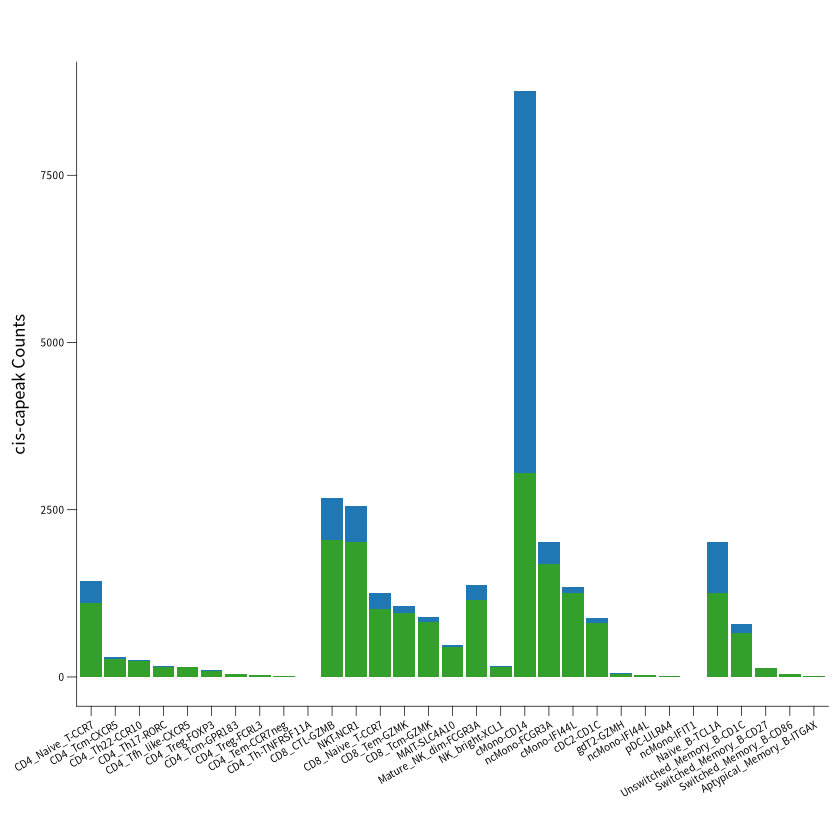

In [58]:
p <- ggplot(tmp_long, aes(x = celltype, y = count, fill = type)) +
     geom_bar(stat = "identity") +
     labs(title = "",
          x = "", y = "cis-capeak Counts", fill = "Phenotype Type") +
     scale_fill_manual(values = c("Unique eGenes" = "#1f78b4", "Shared eGenes" = "#33a02c"))+
     mytheme
p
ggsave("/media/AnalysisDisk2/Yangshichen/0_HIV_RNA/QTL/01.Dynamic/03.Result/plot/capeak/all_capeak_count.pdf",p,width=10,height=3)

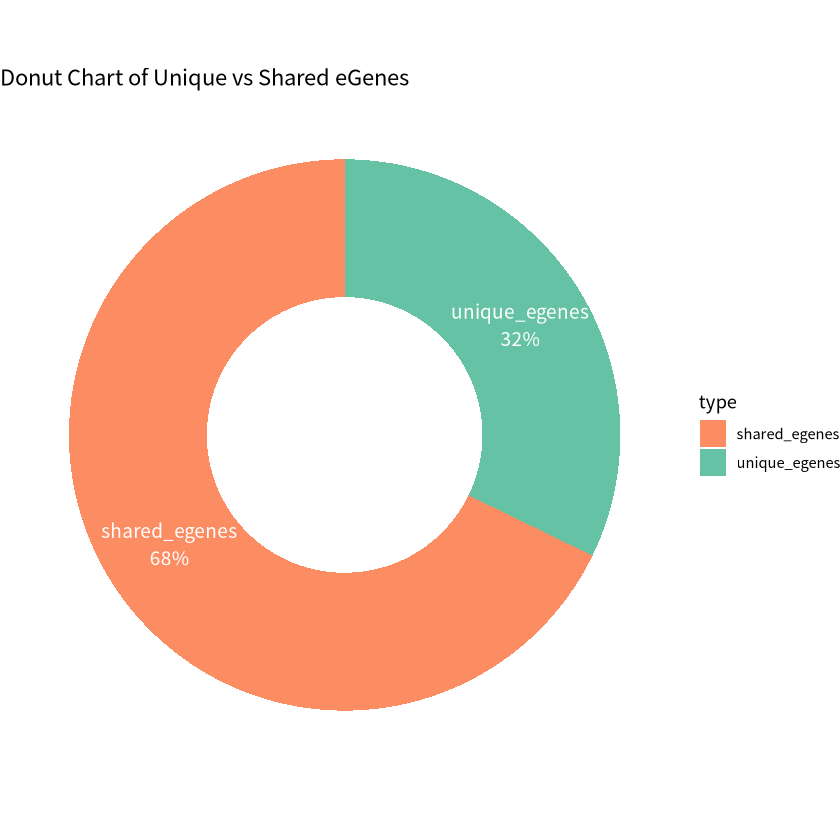

In [60]:
# 计算总和
gene_counts <- colSums(tmp[, c("unique_egenes", "shared_egenes")], na.rm = TRUE)

# 转为 dataframe
gene_df <- data.frame(
  type = names(gene_counts),
  count = as.numeric(gene_counts)
)

# 计算百分比 & 添加标签
gene_df$fraction <- gene_df$count / sum(gene_df$count)
gene_df$ymax <- cumsum(gene_df$fraction)
gene_df$ymin <- c(0, head(gene_df$ymax, n = -1))
gene_df$label <- paste0(gene_df$type, "\n", round(gene_df$fraction * 100), "%")

# 绘制圆环图
p <- ggplot(gene_df, aes(ymax = ymax, ymin = ymin, xmax = 4, xmin = 3, fill = type)) +
  geom_rect() +
  coord_polar(theta = "y") +
  xlim(c(2, 4)) +  # 控制中间空心
  theme_void() +
  scale_fill_manual(values = c("unique_egenes" = "#66c2a5", "shared_egenes" = "#fc8d62")) +
  geom_text(aes(x = 3.5, y = (ymin + ymax)/2, label = label), color = "white", size = 4) +
  labs(title = "Donut Chart of Unique vs Shared eGenes") +
  theme(legend.position = "right")
p
ggsave("/media/AnalysisDisk2/Yangshichen/0_HIV_RNA/QTL/01.Dynamic/03.Result/plot/capeak/capeak_perm_count.pdf",p,width=10,height=3)

##### 2

In [66]:
cellratio <- as.data.frame(read.csv("/media/AnalysisDisk2/Yangshichen/0_HIV_RNA/样本统计/scATAC_proportions_L3.csv",check.names = F,header = T))
cellratio

sample  celltype_L3               count total_count proportion  
1    HD-H134 Aptypical_Memory_B-ITGAX     2  8038        0.0002488181
2    HD-H134 CD4_Naive_T-CCR7          1164  8038        0.1448121423
3    HD-H134 CD4_Naive_T-SOX4             0  8038        0.0000000000
4    HD-H134 CD4_Tcm-CXCR5              178  8038        0.0221448121
5    HD-H134 CD4_Tcm-GPR183              49  8038        0.0060960438
6    HD-H134 CD4_Tcm-IFIT3               12  8038        0.0014929087
7    HD-H134 CD4_Tcm-SOX4                 0  8038        0.0000000000
8    HD-H134 CD4_Tem-CCR7neg             88  8038        0.0109479970
9    HD-H134 CD4_Tfh_like-CXCR5          49  8038        0.0060960438
10   HD-H134 CD4_Th1-GZMK                15  8038        0.0018661359
11   HD-H134 CD4_Th17-RORC              138  8038        0.0171684499
12   HD-H134 CD4_Th22-CCR10             104  8038        0.0129385419
13   HD-H134 CD4_Th-TNFRSF11A            29  8038        0.0036078627
14   HD-H134 CD4_Treg-FCRL3              50  8038        0.0062204528
15   HD-H134 CD4_Treg-FOXP3              86  8038        0.0106991789
16   HD-H134 CD8_CTL-GZMB               781  8038        0.0971634735
17   HD-H134 CD8_CTL-GZMK                 0  8038        0.0000000000
18   HD-H134 CD8_Naive_T-CCR7           400  8038        0.0497636228
19   HD-H134 CD8_Tcm-GPR183              12  8038        0.0014929087
20   HD-H134 CD8_Tcm-GZMK               199  8038        0.0247574023
21   HD-H134 CD8_Tcm-IFI44L               0  8038        0.0000000000
22   HD-H134 CD8_Tem-GZMK               164  8038        0.0204030853
23   HD-H134 Cycling_T-MKI67              1  8038        0.0001244091
24   HD-H134 MAIT-SLC4A10               136  8038        0.0169196317
25   HD-H134 Mature_NK_dim-FCGR3A       252  8038        0.0313510824
26   HD-H134 NKT-IFIT3                    0  8038        0.0000000000
27   HD-H134 NKT-NCR1                   555  8038        0.0690470266
28   HD-H134 NK_bright-XCL1              56  8038        0.0069669072
29   HD-H134 Naive_B-IFIT3                0  8038        0.0000000000
30   HD-H134 Naive_B-TCL1A              301  8038        0.0374471262
⋮    ⋮       ⋮                         ⋮     ⋮           ⋮           
7836 PD-H308 NKT-IFIT3                    2  7115        0.0002810963
7837 PD-H308 NKT-NCR1                   868  7115        0.1219957836
7838 PD-H308 NK_bright-XCL1              28  7115        0.0039353479
7839 PD-H308 Naive_B-IFIT3                0  7115        0.0000000000
7840 PD-H308 Naive_B-TCL1A              741  7115        0.1041461701
7841 PD-H308 Plasma_B-IGHA1               8  7115        0.0011243851
7842 PD-H308 Plasma_B-IGHG1               0  7115        0.0000000000
7843 PD-H308 Plasmablast-MKI67            0  7115        0.0000000000
7844 PD-H308 Switched_Memory_B-CD27     155  7115        0.0217849613
7845 PD-H308 Switched_Memory_B-CD86      41  7115        0.0057624736
7846 PD-H308 Switched_Memory_B-IGHE      12  7115        0.0016865777
7847 PD-H308 Transitional_B-NEIL1         0  7115        0.0000000000
7848 PD-H308 Transitional_NK-GZMK         0  7115        0.0000000000
7849 PD-H308 Unswitched_Memory_B-CD1C   161  7115        0.0226282502
7850 PD-H308 Unswitched_Memory_B-IFIT3    0  7115        0.0000000000
7851 PD-H308 Unswitched_Memory_B-JAM3     0  7115        0.0000000000
7852 PD-H308 cDC1-BATF3                   0  7115        0.0000000000
7853 PD-H308 cDC2-CD1C                   81  7115        0.0113843992
7854 PD-H308 cMono-CD14                1175  7115        0.1651440618
7855 PD-H308 cMono-IFI44L               643  7115        0.0903724526
7856 PD-H308 cMono-IL1B                   0  7115        0.0000000000
7857 PD-H308 gdT2-GZMH                   17  7115        0.0023893183
7858 PD-H308 gdT2-GZMK                    1  7115        0.0001405481
7859 PD-H308 gdT2-IL12RB2                 0  7115        0.0000000000
7860 PD-H308 ncMono-C1QA                  0  7115        0.0000000000
7861 PD-H308 nc

In [67]:
summarized_df <- cellratio %>%
  group_by(celltype_L3) %>%
  summarise(proportion_sum = sum(proportion, na.rm = TRUE)/142)
summarized_df <- as.data.frame(summarized_df)
summarized_df

celltype_L3               proportion_sum
1  Aptypical_Memory_B-ITGAX  3.479439e-03  
2  CD4_Naive_T-CCR7          7.267461e-02  
3  CD4_Naive_T-SOX4          6.251304e-06  
4  CD4_Tcm-CXCR5             1.914031e-02  
5  CD4_Tcm-GPR183            5.448577e-03  
6  CD4_Tcm-IFIT3             8.313764e-04  
7  CD4_Tcm-SOX4              1.710566e-03  
8  CD4_Tem-CCR7neg           5.267047e-03  
9  CD4_Tfh_like-CXCR5        9.336241e-03  
10 CD4_Th-TNFRSF11A          2.857134e-03  
11 CD4_Th1-GZMK              1.744830e-03  
12 CD4_Th17-RORC             1.282006e-02  
13 CD4_Th22-CCR10            1.294669e-02  
14 CD4_Treg-FCRL3            4.626237e-03  
15 CD4_Treg-FOXP3            7.790012e-03  
16 CD8_CTL-GZMB              1.256463e-01  
17 CD8_CTL-GZMK              4.473873e-03  
18 CD8_Naive_T-CCR7          5.350530e-02  
19 CD8_Tcm-GPR183            4.333268e-04  
20 CD8_Tcm-GZMK              3.254896e-02  
21 CD8_Tcm-IFI44L            3.267586e-04  
22 CD8_Tem-GZMK              4.332676e-02  
23 Cycling_T-MKI67           9.535964e-04  
24 MAIT-SLC4A10              2.437128e-02  
25 Mature_NK_dim-FCGR3A      5.532590e-02  
26 NKT-IFIT3                 2.329670e-04  
27 NKT-NCR1                  1.336049e-01  
28 NK_bright-XCL1            9.725425e-03  
29 Naive_B-IFIT3             2.381440e-04  
30 Naive_B-TCL1A             5.713116e-02  
31 Plasma_B-IGHA1            2.596620e-03  
32 Plasma_B-IGHG1            1.720038e-04  
33 Plasmablast-MKI67         5.862131e-05  
34 Switched_Memory_B-CD27    7.781812e-03  
35 Switched_Memory_B-CD86    4.530169e-03  
36 Switched_Memory_B-IGHE    1.142023e-03  
37 Transitional_B-NEIL1      4.694580e-04  
38 Transitional_NK-GZMK      5.467772e-04  
39 Unswitched_Memory_B-CD1C  2.148052e-02  
40 Unswitched_Memory_B-IFIT3 1.485879e-04  
41 Unswitched_Memory_B-JAM3  1.009933e-04  
42 cDC1-BATF3                8.760111e-07  
43 cDC2-CD1C                 1.348125e-02  
44 cMono-CD14                1.671335e-01  
45 cMono-IFI44L              3.432096e-02  
46 cMono-IL1B                1.172049e-06  
47 gdT2-GZMH                 8.280685e-03  
48 gdT2-GZMK                 1.311516e-03  
49 gdT2-IL12RB2              4.575575e-05  
50 ncMono-C1QA               4.421246e-06  
51 ncMono-FCGR3A             3.361922e-02  
52 ncMono-IFI44L             3.344190e-03  
53 ncMono-IFIT1              1.130626e-03  
54 pDC-AXL                   1.352792e-04  
55 pDC-LILRA4                2.681211e-03

In [68]:
tmp <- as.data.frame(tmp)
tmp

celltype                 unique_egenes shared_egenes total_egenes
1  Aptypical_Memory_B-ITGAX    1            15            16        
2  CD4_Naive_T-CCR7          327          1104          1431        
3  CD4_Tcm-CXCR5              23           273           296        
4  CD4_Tcm-GPR183              5            44            49        
5  CD4_Tem-CCR7neg             0            21            21        
6  CD4_Tfh_like-CXCR5          1           150           151        
7  CD4_Th-TNFRSF11A            0             2             2        
8  CD4_Th17-RORC              10           149           159        
9  CD4_Th22-CCR10             21           233           254        
10 CD4_Treg-FCRL3              1            27            28        
11 CD4_Treg-FOXP3              6            92            98        
12 CD8_CTL-GZMB              627          2042          2669        
13 CD8_Naive_T-CCR7          243          1012          1255        
14 CD8_Tcm-GZMK               79           814           893        
15 CD8_Tem-GZMK              101           959          1060        
16 MAIT-SLC4A10               39           445           484        
17 Mature_NK_dim-FCGR3A      227          1152          1379        
18 NKT-NCR1                  539          2021          2560        
19 NK_bright-XCL1             14           153           167        
20 Naive_B-TCL1A             765          1248          2013        
21 Switched_Memory_B-CD27      6           134           140        
22 Switched_Memory_B-CD86      1            43            44        
23 Unswitched_Memory_B-CD1C  131           664           795        
24 cDC2-CD1C                  79           804           883        
25 cMono-CD14               5701          3053          8754        
26 cMono-IFI44L               87          1261          1348        
27 gdT2-GZMH                   2            50            52        
28 ncMono-FCGR3A             316          1695          2011        
29 ncMono-IFI44L               0            25            25        
30 ncMono-IFIT1                1             0             1        
31 pDC-LILRA4                  8            12            20

In [69]:
merged_data <- left_join(tmp, summarized_df, by = c("celltype" = "celltype_L3"))
merged_data

celltype                 unique_egenes shared_egenes total_egenes
1  Aptypical_Memory_B-ITGAX    1            15            16        
2  CD4_Naive_T-CCR7          327          1104          1431        
3  CD4_Tcm-CXCR5              23           273           296        
4  CD4_Tcm-GPR183              5            44            49        
5  CD4_Tem-CCR7neg             0            21            21        
6  CD4_Tfh_like-CXCR5          1           150           151        
7  CD4_Th-TNFRSF11A            0             2             2        
8  CD4_Th17-RORC              10           149           159        
9  CD4_Th22-CCR10             21           233           254        
10 CD4_Treg-FCRL3              1            27            28        
11 CD4_Treg-FOXP3              6            92            98        
12 CD8_CTL-GZMB              627          2042          2669        
13 CD8_Naive_T-CCR7          243          1012          1255        
14 CD8_Tcm-GZMK               79           814           893        
15 CD8_Tem-GZMK              101           959          1060        
16 MAIT-SLC4A10               39           445           484        
17 Mature_NK_dim-FCGR3A      227          1152          1379        
18 NKT-NCR1                  539          2021          2560        
19 NK_bright-XCL1             14           153           167        
20 Naive_B-TCL1A             765          1248          2013        
21 Switched_Memory_B-CD27      6           134           140        
22 Switched_Memory_B-CD86      1            43            44        
23 Unswitched_Memory_B-CD1C  131           664           795        
24 cDC2-CD1C                  79           804           883        
25 cMono-CD14               5701          3053          8754        
26 cMono-IFI44L               87          1261          1348        
27 gdT2-GZMH                   2            50            52        
28 ncMono-FCGR3A             316          1695          2011        
29 ncMono-IFI44L               0            25            25        
30 ncMono-IFIT1                1             0             1        
31 pDC-LILRA4                  8            12            20        
   proportion_sum
1  0.003479439   
2  0.072674612   
3  0.019140309   
4  0.005448577   
5  0.005267047   
6  0.009336241   
7  0.002857134   
8  0.012820063   
9  0.012946689   
10 0.004626237   
11 0.007790012   
12 0.125646339   
13 0.053505299   
14 0.032548964   
15 0.043326761   
16 0.024371278   
17 0.055325898   
18 0.133604866   
19 0.009725425   
20 0.057131158   
21 0.007781812   
22 0.004530169   
23 0.021480519   
24 0.013481248   
25 0.167133467   
26 0.034320963   
27 0.008280685   
28 0.033619223   
29 0.003344190   
30 0.001130626   
31 0.002681211

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


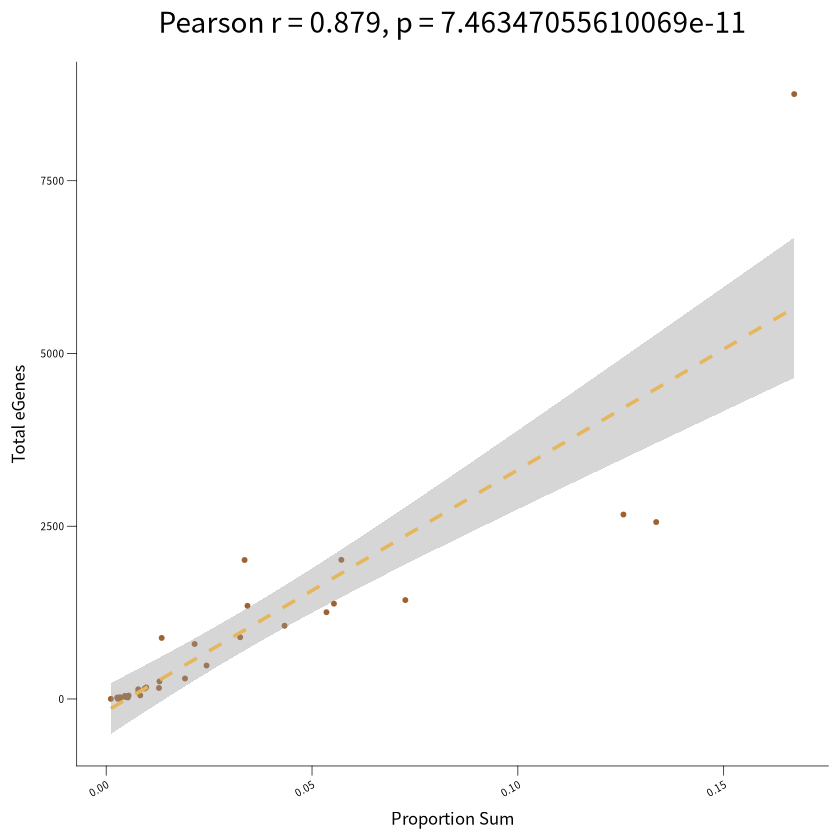

In [71]:
cor_test <- cor.test(merged_data$total_egenes,
                     merged_data$proportion_sum,
                     method = "pearson")

cor_val <- round(cor_test$estimate, 3)
p_val <- cor_test$p.value

p <- ggplot(merged_data, aes(x = proportion_sum, y = total_egenes)) +
     geom_point(size=1,color = "#9E6231") +
     geom_smooth(method = "lm", se = T, color = "#E5B65B", linetype=2) +
     labs(x = "Proportion Sum", y = "Total eGenes", title = paste0("Pearson r = ", cor_val, ", p = ", p_val)) +
     mytheme
p
ggsave("/media/AnalysisDisk2/Yangshichen/0_HIV_RNA/QTL/01.Dynamic/03.Result/plot/capeak/all_capeak_cor_cellratio.pdf",p,width=3,height=3.5)

##### 3

In [104]:
data <- as.data.frame(read.csv("/media/AnalysisDisk2/Yangshichen/0_HIV_RNA/QTL/01.Dynamic/03.Result/caQTL_all_lead_perm_qvalues.csv",check.names = F,header = T))

In [105]:
subdata <- subset(data,celltype_level_qval < 0.05)
subdata <- subdata[,-c(1)]
subdata

phenotype_id            num_var beta_shape1 beta_shape2 true_df 
2      chr1:817103-817604      1957    1.0329543   188.4632    105.1320
30     chr1:1658882-1659383    3242    1.0730687   287.7875    102.4873
32     chr1:1692584-1693085    3242    1.0450348   303.4425    104.7627
33     chr1:1724171-1724672    3242    1.0405096   296.7527    104.1197
34     chr1:1764189-1764690    3240    1.0743599   272.5999    101.3701
38     chr1:1857057-1857558    3235    1.0227611   286.3811    103.5846
42     chr1:1891422-1891923    3244    1.0498594   280.9087    103.1466
161    chr1:8424521-8425022    3026    1.0864522   302.1380    104.2526
186    chr1:9067156-9067657    2639    1.0161358   262.9184    105.0070
193    chr1:9162759-9163260    2524    1.0279980   258.9146    105.6530
273    chr1:11749092-11749593  3104    1.0417027   271.7674    104.8703
292    chr1:11985786-11986287  3315    1.0553483   233.0790    102.9273
324    chr1:12601893-12602394  3186    0.9935937   258.5736    102.7958
328    chr1:13593742-13594243  3983    1.0524247   335.8488    103.4023
344    chr1:15260573-15261074  3146    1.0123768   308.7281    106.0383
365    chr1:15514951-15515452  2880    1.0292000   272.2722    106.6867
388    chr1:15966001-15966502  2941    1.0308325   254.1428    103.7281
415    chr1:16444296-16444797  3056    1.0269940   211.7473    103.5644
420    chr1:16889274-16889775  3429    1.0125209   286.5430    104.6764
421    chr1:16895454-16895955  3443    1.0458037   305.8444    105.5581
422    chr1:16895983-16896484  3442    1.0331169   289.6155    104.8083
425    chr1:16904669-16905170  3449    1.0404680   310.4796    105.7669
426    chr1:16905185-16905686  3449    1.0557368   299.7918    105.0629
436    chr1:17098392-17098893  3572    0.9825974   261.0913    100.6458
449    chr1:17393179-17393680  3836    1.0036156   387.4511    104.9306
450    chr1:17398248-17398749  3853    1.0176623   439.6630    108.2321
469    chr1:18902627-18903128  3970    1.0509775   448.0470    107.8195
471    chr1:18907873-18908374  3960    0.9947799   359.4226    103.3097
541    chr1:20851735-20852236  2984    1.0157326   200.9498    103.8123
593    chr1:22735200-22735701  3143    1.0146614   189.3347    100.3219
⋮      ⋮                       ⋮       ⋮           ⋮           ⋮       
872853 chr21:33205410-33205911 2392    1.0013491   161.4729    103.6981
872936 chr21:37072492-37072993 3651    1.0416949   252.5112    108.3809
872940 chr21:37221108-37221609 3372    1.0415460   228.4124    106.1262
872953 chr21:38831543-38832044 4153    1.0538222   301.6085    105.0394
872987 chr21:42107715-42108216 4252    1.0125768   404.8645    105.3466
873002 chr21:42474465-42474966 4022    1.0580119   427.2065    106.1434
873009 chr21:42532737-42533238 3864    1.0494757   385.4758    105.1124
873013 chr21:42561671-42562172 3774    1.0294682   359.3109    104.0083
873020 chr21:43325927-43326428 2975    1.0072122   207.4295    103.7199
873041 chr21:44065410-44065911 3132    1.0273194   233.9550    101.7585
873057 chr21:44865522-44866023 3712    1.0470502   306.4651    105.1860
873080 chr21:45592262-45592763 4020    1.0478306   276.4643    103.7531
873084 chr21:45892085-45892586 3318    0.9926088   203.8423    102.2823
873089 chr21:46253651-46254152 2483    1.0166372   151.3964    102.7896
873118 chr22:17800776-17801277 2989    1.0367111   386.7332    107.9123
873132 chr22:18528454-18528955 2040    0.9801092   159.0201    103.8752
873133 chr22:18528992-18529493 2040    1.0438898   166.7269    103.0966
873148 chr22:19448023-19448524 2262    1.0434746   239.1784    107.2436
873163 chr22:20299373-20299874 2810    1.0549539   321.5816    107.9096
873175 chr22:20697442-20697943 2606    1.0039899   269.0860    106.7616
873421 chr22:33325462-33325963 3468    1.0308621   249.5571    104.5259
873489 chr22:37284875-37285376 3172    1.0390375   266.3570    106.2223
873557 chr22:39100086-39100587 2133    1.0296203   167.6268    103.9099
873566 chr22:39351520-39352021 1855    1.043057

In [106]:
# 每个 phenotype_id 出现在哪些 celltype
phenotype_counts <- subdata %>%
  group_by(celltype) %>%
  summarise(n_phenotypes = n_distinct(phenotype_id)) %>%
  arrange(desc(n_phenotypes))
phenotype_counts

celltype                 n_phenotypes
1  cMono-CD14               8754        
2  CD8_CTL-GZMB             2669        
3  NKT-NCR1                 2560        
4  Naive_B-TCL1A            2013        
5  ncMono-FCGR3A            2011        
6  CD4_Naive_T-CCR7         1431        
7  Mature_NK_dim-FCGR3A     1379        
8  cMono-IFI44L             1348        
9  CD8_Naive_T-CCR7         1255        
10 CD8_Tem-GZMK             1060        
11 CD8_Tcm-GZMK              893        
12 cDC2-CD1C                 883        
13 Unswitched_Memory_B-CD1C  795        
14 MAIT-SLC4A10              484        
15 CD4_Tcm-CXCR5             296        
16 CD4_Th22-CCR10            254        
17 NK_bright-XCL1            167        
18 CD4_Th17-RORC             159        
19 CD4_Tfh_like-CXCR5        151        
20 Switched_Memory_B-CD27    140        
21 CD4_Treg-FOXP3             98        
22 gdT2-GZMH                  52        
23 CD4_Tcm-GPR183             49        
24 Switched_Memory_B-CD86     44        
25 CD4_Treg-FCRL3             28        
26 ncMono-IFI44L              25        
27 CD4_Tem-CCR7neg            21        
28 pDC-LILRA4                 20        
29 Aptypical_Memory_B-ITGAX   16        
30 CD4_Th-TNFRSF11A            2        
31 ncMono-IFIT1                1

In [109]:
phenotype_counts$celltype <- factor(phenotype_counts$celltype,levels = c('CD4_Naive_T-CCR7','CD4_Tcm-CXCR5','CD4_Th22-CCR10','CD4_Th17-RORC','CD4_Tfh_like-CXCR5','CD4_Treg-FOXP3','CD4_Tcm-GPR183','CD4_Treg-FCRL3','CD4_Tem-CCR7neg','CD4_Th-TNFRSF11A','CD8_CTL-GZMB','NKT-NCR1','CD8_Naive_T-CCR7','CD8_Tem-GZMK','CD8_Tcm-GZMK','MAIT-SLC4A10','Mature_NK_dim-FCGR3A','NK_bright-XCL1','cMono-CD14','ncMono-FCGR3A','cMono-IFI44L','cDC2-CD1C','gdT2-GZMH','ncMono-IFI44L','pDC-LILRA4','ncMono-IFIT1','Naive_B-TCL1A','Unswitched_Memory_B-CD1C','Switched_Memory_B-CD27','Switched_Memory_B-CD86',
                                               'Aptypical_Memory_B-ITGAX'))

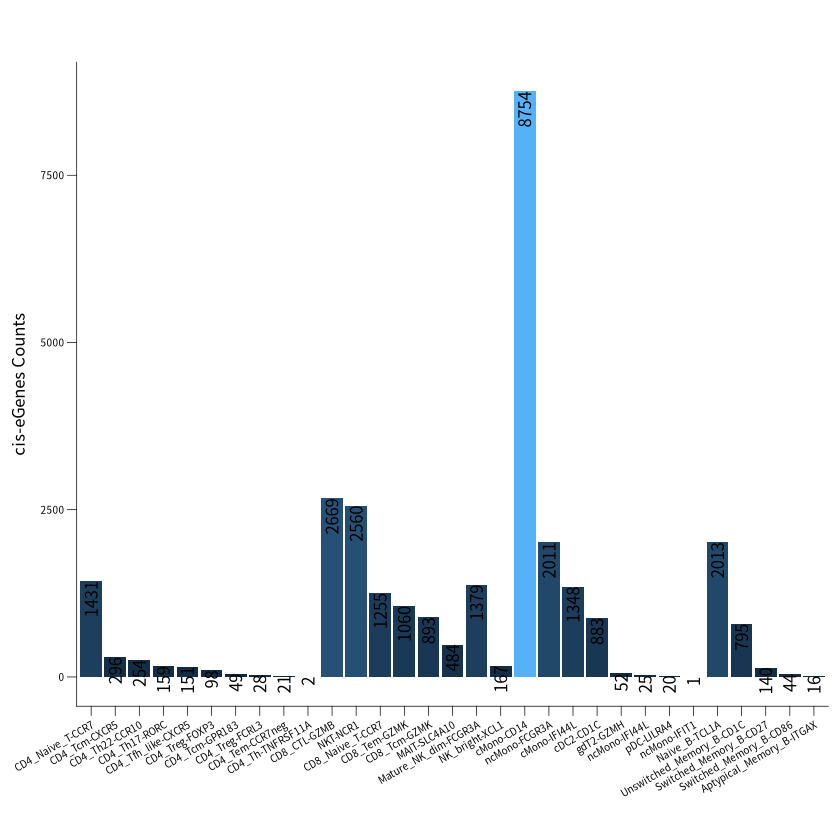

In [110]:
p <- ggplot(phenotype_counts, aes(x = celltype, y = n_phenotypes, fill = n_phenotypes)) +
     geom_bar(stat = "identity") +
     labs(title = "",x = "", y = "cis-eGenes Counts", fill = "Phenotype Type") +
     geom_text(aes(label = n_phenotypes), size = 3.5,angle = 90, hjust = 1) +
     mytheme
p
ggsave("/media/AnalysisDisk2/Yangshichen/0_HIV_RNA/QTL/01.Dynamic/03.Result/plot/capeak/all_celltype_count.pdf",p,width=10,height=3)

##### 4

In [3]:
# 设置目录
input_dir <- '/media/AnalysisDisk2/Yangshichen/0_HIV_RNA/QTL/01.Dynamic/01.Data/03.scATAC-seq/01.pseudobulk/04.top2000_normal_dis/'

# 获取所有csv文件路径
csv_files <- list.files(input_dir, pattern = "\\.csv$", full.names = TRUE)

# 初始化结果列表
result_list <- lapply(csv_files, function(file) {
  df <- read.csv(file, header = TRUE)
  sample_count <- nrow(df)
  data.frame(
    file_name = tools::file_path_sans_ext(basename(file)),
    sample_count = sample_count
  )
})

# 合并为一个dataframe
result_df <- do.call(rbind, result_list)
result_df

file_name                sample_count
1  Aptypical_Memory_B-ITGAX  98         
2  CD4_Naive_T-CCR7         142         
3  CD4_Tcm-CXCR5            138         
4  CD4_Tcm-GPR183           122         
5  CD4_Tem-CCR7neg           99         
6  CD4_Tfh_like-CXCR5       140         
7  CD4_Th-TNFRSF11A          71         
8  CD4_Th1-GZMK              60         
9  CD4_Th17-RORC            137         
10 CD4_Th22-CCR10           142         
11 CD4_Treg-FCRL3           127         
12 CD4_Treg-FOXP3           139         
13 CD8_CTL-GZMB             142         
14 CD8_CTL-GZMK              59         
15 CD8_Naive_T-CCR7         142         
16 CD8_Tcm-GZMK             142         
17 CD8_Tem-GZMK             142         
18 cDC2-CD1C                142         
19 cMono-CD14               142         
20 cMono-IFI44L             142         
21 gdT2-GZMH                119         
22 MAIT-SLC4A10             141         
23 Mature_NK_dim-FCGR3A     142         
24 Naive_B-TCL1A            142         
25 ncMono-FCGR3A            142         
26 ncMono-IFI44L            100         
27 ncMono-IFIT1              42         
28 NK_bright-XCL1           137         
29 NKT-NCR1                 142         
30 pDC-LILRA4                87         
31 Plasma_B-IGHA1            67         
32 Switched_Memory_B-CD27   134         
33 Switched_Memory_B-CD86   127         
34 Switched_Memory_B-IGHE    47         
35 Unswitched_Memory_B-CD1C 142

In [6]:
result_df <- subset(result_df, file_name %in% c('CD4_Naive_T-CCR7','CD4_Tcm-CXCR5','CD4_Th22-CCR10','CD4_Th17-RORC','CD4_Tfh_like-CXCR5','CD4_Treg-FOXP3','CD4_Tcm-GPR183','CD4_Treg-FCRL3','CD4_Tem-CCR7neg','CD4_Th-TNFRSF11A','CD8_CTL-GZMB','NKT-NCR1','CD8_Naive_T-CCR7','CD8_Tem-GZMK','CD8_Tcm-GZMK','MAIT-SLC4A10','Mature_NK_dim-FCGR3A','NK_bright-XCL1','cMono-CD14','ncMono-FCGR3A','cMono-IFI44L','cDC2-CD1C','gdT2-GZMH','ncMono-IFI44L','pDC-LILRA4','ncMono-IFIT1','Naive_B-TCL1A','Unswitched_Memory_B-CD1C','Switched_Memory_B-CD27','Switched_Memory_B-CD86',
                                               'Aptypical_Memory_B-ITGAX'))
result_df$file_name <- factor(result_df$file_name,levels = c('CD4_Naive_T-CCR7','CD4_Tcm-CXCR5','CD4_Th22-CCR10','CD4_Th17-RORC','CD4_Tfh_like-CXCR5','CD4_Treg-FOXP3','CD4_Tcm-GPR183','CD4_Treg-FCRL3','CD4_Tem-CCR7neg','CD4_Th-TNFRSF11A','CD8_CTL-GZMB','NKT-NCR1','CD8_Naive_T-CCR7','CD8_Tem-GZMK','CD8_Tcm-GZMK','MAIT-SLC4A10','Mature_NK_dim-FCGR3A','NK_bright-XCL1','cMono-CD14','ncMono-FCGR3A','cMono-IFI44L','cDC2-CD1C','gdT2-GZMH','ncMono-IFI44L','pDC-LILRA4','ncMono-IFIT1','Naive_B-TCL1A','Unswitched_Memory_B-CD1C','Switched_Memory_B-CD27','Switched_Memory_B-CD86',
                                               'Aptypical_Memory_B-ITGAX'))
result_df

file_name                sample_count
1  Aptypical_Memory_B-ITGAX  98         
2  CD4_Naive_T-CCR7         142         
3  CD4_Tcm-CXCR5            138         
4  CD4_Tcm-GPR183           122         
5  CD4_Tem-CCR7neg           99         
6  CD4_Tfh_like-CXCR5       140         
7  CD4_Th-TNFRSF11A          71         
9  CD4_Th17-RORC            137         
10 CD4_Th22-CCR10           142         
11 CD4_Treg-FCRL3           127         
12 CD4_Treg-FOXP3           139         
13 CD8_CTL-GZMB             142         
15 CD8_Naive_T-CCR7         142         
16 CD8_Tcm-GZMK             142         
17 CD8_Tem-GZMK             142         
18 cDC2-CD1C                142         
19 cMono-CD14               142         
20 cMono-IFI44L             142         
21 gdT2-GZMH                119         
22 MAIT-SLC4A10             141         
23 Mature_NK_dim-FCGR3A     142         
24 Naive_B-TCL1A            142         
25 ncMono-FCGR3A            142         
26 ncMono-IFI44L            100         
27 ncMono-IFIT1              42         
28 NK_bright-XCL1           137         
29 NKT-NCR1                 142         
30 pDC-LILRA4                87         
32 Switched_Memory_B-CD27   134         
33 Switched_Memory_B-CD86   127         
35 Unswitched_Memory_B-CD1C 142

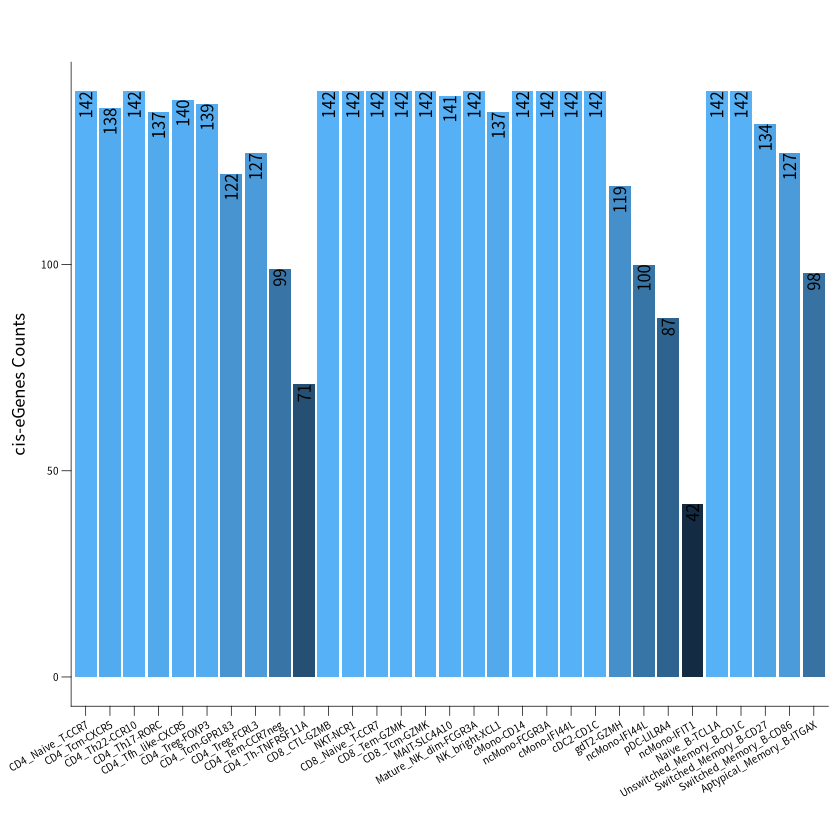

In [7]:
p <- ggplot(result_df, aes(x = file_name, y = sample_count, fill = sample_count)) +
     geom_bar(stat = "identity") +
     labs(title = "",x = "", y = "cis-eGenes Counts", fill = "Phenotype Type") +
     geom_text(aes(label = sample_count), size = 3.5,angle = 90, hjust = 1) +
     mytheme
p
ggsave("/media/AnalysisDisk2/Yangshichen/0_HIV_RNA/QTL/01.Dynamic/03.Result/plot/capeak/all_sample_count.pdf",p,width=10,height=3)

##### 5

In [100]:
all_qtl_data <- read.csv('/media/AnalysisDisk2/Yangshichen/0_HIV_RNA/QTL/01.Dynamic/03.Result/caQTL_all_lead_inter_2groups_qvalues_0.05.csv')
all_qtl_data$annotation <- gsub("\\s*\\(.*?\\)", "", all_qtl_data$annotation)
all_qtl_data

X.1  X      chr   start    end      variant_id        start_distance
1     1     6    chr1   923623   924124  1_879115_C_[A]     -44509       
2     2     7    chr1   959080   959581  1_1653319_G_[A]    694238       
3     3     8    chr1   960331   960832  1_878714_A_[G]     -81618       
4     4    12    chr1   999920  1000421  1_974039_C_[T]     -25882       
5     5    16    chr1  1014244  1014745  1_1130056_G_[A]    115811       
6     6    21    chr1  1137227  1137728  1_1660408_T_[C]    523180       
7     7    23    chr1  1173631  1174132  1_1373006_A_[G]    199374       
8     8    23    chr1  1173631  1174132  1_1373006_A_[G]    199374       
9     9    29    chr1  1299948  1300449  1_995153_C_[G]    -304796       
10   10    34    chr1  1349168  1349669  1_1653319_G_[A]    304150       
11   11    35    chr1  1359214  1359715  1_1363602_C_[T]      4387       
12   12    38    chr1  1407071  1407572  1_2398369_G_[A]    991297       
13   13    45    chr1  1615142  1615643  1_2416137_G_[T]    800994       
14   14    46    chr1  1615920  1616421  1_1650777_G_[A]     34856       
15   15    51    chr1  1677773  1678274  1_2218243_T_[C]    540469       
16   16    65    chr1  2152885  2153386  1_2303193_G_[A]    150307       
17   17    78    chr1  2240199  2240700  1_1774721_G_[A]   -465479       
18   18    88    chr1  2381676  2382177  1_3199797_G_[T]    818120       
19   19    92    chr1  2523854  2524355  1_2435078_G_[A]    -88777       
20   20   107    chr1  3624628  3625129  1_3573255_A_[G]    -51374       
21   21   111    chr1  3772354  3772855  1_3195714_G_[A]   -576641       
22   22   122    chr1  6026954  6027455  1_5842307_C_[A]   -184648       
23   23   130    chr1  6244991  6245492  1_6269955_T_[C]     24963       
24   24   148    chr1  6475428  6475929  1_7112129_G_[A]    636700       
25   25   160    chr1  6612549  6613050  1_7116619_G_[T]    504069       
26   26   187    chr1  8397477  8397978  1_7473104_G_[A]   -924374       
27   27   190    chr1  8422696  8423197  1_8140630_A_[G]   -282067       
28   28   205    chr1  8560984  8561485  1_7590651_A_[G]   -970334       
29   29   215    chr1  8946413  8946914  1_9336876_C_[T]    390462       
30   30   219    chr1  9005046  9005547  1_9465176_A_[G]    460129       
⋮    ⋮    ⋮      ⋮     ⋮        ⋮        ⋮                 ⋮             
7316 7316 747790 chr19 50835909 50836410 19_50756355_T_[C]  -79555       
7317 7317 747845 chr19 53254665 53255166 19_52631103_T_[C] -623563       
7318 7318 747886 chr19 54624898 54625399 19_53666443_T_[G] -958456       
7319 7319 747887 chr19 54937851 54938352 19_55149131_A_[G]  211279       
7320 7320 748025 chr20   298732   299233 20_940688_G_[C]    641955       
7321 7321 748190 chr20 19658132 19658633 20_19431504_C_[T] -226629       
7322 7322 748211 chr20 23357966 23358467 20_23878078_T_[A]  520111       
7323 7323 748374 chr20 36604850 36605351 20_36805743_T_[C]  200892       
7324 7324 748461 chr20 44210186 44210687 20_44806772_T_[C]  596585       
7325 7325 748486 chr20 44969489 44969990 20_45514028_G_[A]  544538       
7326 7326 748499 chr20 45432270 45432771 20_45342902_T_[C]  -89369       
7327 7327 748528 chr20 47272753 47273254 20_47974363_T_[C]  701609       
7328 7328 748613 chr20 50810846 50811347 20_50042445_T_[C] -768402       
7329 7329 748662 chr20 57398191 57398692 20_57455576_G_[A]   57384       
7330 7330 748676 chr20 57708738 57709239 20_57095445_T_[C] -613294       
7331 7331 748705 chr20 59207690 59208191 20_59727136_G_[A]  519445       
7332 7332 748783 chr20 64057700 64058201 20_63589896_A_[G] -467805       
7333 7333 748813 chr21 14901624 14902125 21_14222790_C_[T] -678835       
7334 7334 748880 chr21 33215493 33215994 21_33005286_A_[G] -210208       
7335 7335 748891 chr21 33308852 33309353 21_33874805_C_[T]  565952       
7336 7336 749180 chr22 19891464 19891965 22_20419421_C_[T]  527956       
7337 7337 749276 chr22 23180239 23180740 22_22680047_C_[T] -500193       
7338 7338

In [101]:
unique(all_qtl_data$annotation)

[1] "Promoter"          "Intron"            "3' UTR"           
[4] "Exon"              "Distal Intergenic" "5' UTR"

In [102]:
annotation_counts <- all_qtl_data %>%
  group_by(annotation) %>%
  summarise(count = n()) %>%
  arrange(desc(count))  # 按频次降序排列
annotation_counts <- annotation_counts %>%
  mutate(percentage = count / sum(count) * 100,
         label = paste0(annotation, "\n", round(percentage, 1), "%"))
annotation_counts

annotation        count percentage label                
1 Promoter          5281  71.8992512 Promoter\n71.9%      
2 Intron            1588  21.6201498 Intron\n21.6%        
3 Exon               227   3.0905378 Exon\n3.1%           
4 3' UTR             223   3.0360790 3' UTR\n3%           
5 5' UTR              25   0.3403676 5' UTR\n0.3%         
6 Distal Intergenic    1   0.0136147 Distal Intergenic\n0%

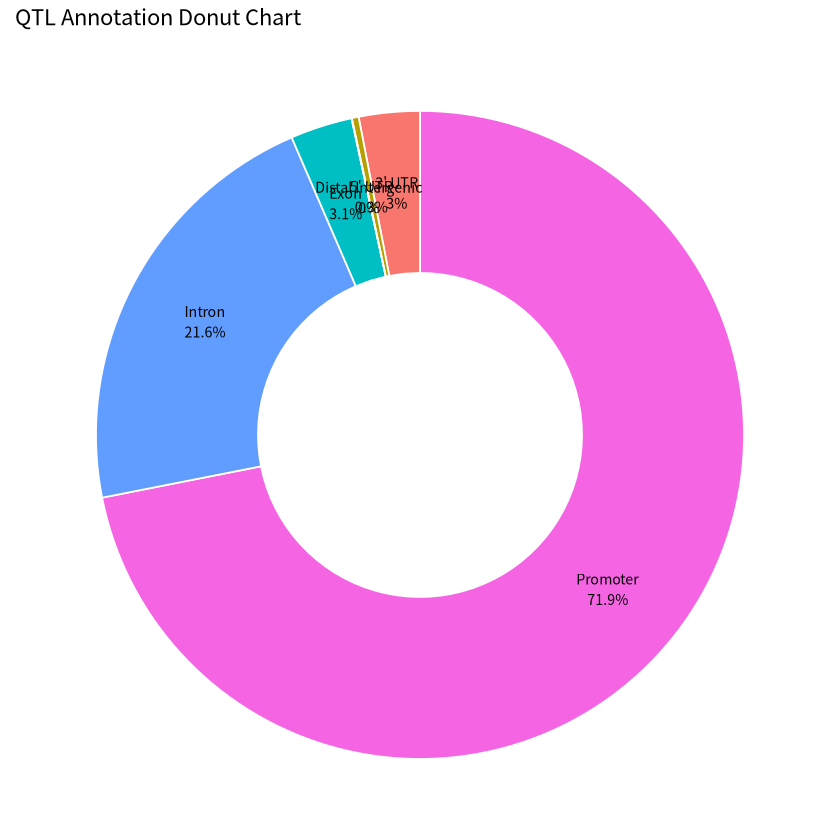

In [103]:
p <- ggplot(annotation_counts, aes(x = 2, y = count, fill = annotation)) +
  geom_bar(stat = "identity", width = 1, color = "white") +
  coord_polar(theta = "y", start = 0) +
  geom_text(aes(label = label), position = position_stack(vjust = 0.5), size = 3) +
  xlim(0.5, 2.5) +  # 控制 donut 内圈大小
  theme_void() +    # 去掉背景和坐标轴
  theme(legend.position = "none") +
  labs(title = "QTL Annotation Donut Chart")
p
ggsave("/media/AnalysisDisk2/Yangshichen/0_HIV_RNA/QTL/01.Dynamic/03.Result/plot/capeak/inter_capeak_ratio.pdf",p,width=3,height=3.5)

#### interactions-2groups caPeak统计

In [58]:
# 设置你的根目录
root_dir <- "/media/AnalysisDisk2/Yangshichen/0_HIV_RNA/QTL/01.Dynamic/03.Result/caQTL/"

# 获取所有子文件夹
celltype_dirs <- list.dirs(root_dir, recursive = FALSE)

# 初始化一个空的dataframe
all_qtl_data <- data.frame()

# 循环读取每个文件夹下的目标文件
for (dir in celltype_dirs) {
  # 构造完整文件路径
  file_path <- file.path(dir, "/diseases_2groups/diseases_2groups.cis_qtl_top_assoc.txt.gz")
  
  # 检查文件是否存在
  if (file.exists(file_path)) {
    # 读取数据
    data <- read_tsv(file_path, show_col_types = FALSE)
    
    # 提取细胞类型名（文件夹名）
    celltype <- basename(dir)
    
    # 添加列
    data$celltype <- celltype
    
    # 合并
    all_qtl_data <- bind_rows(all_qtl_data, data)
  } else {
    warning(paste("文件不存在:", file_path))
  }
}

Warning message:
“文件不存在: /media/AnalysisDisk2/Yangshichen/0_HIV_RNA/QTL/01.Dynamic/03.Result/caQTL//Aptypical_Memory_B-ITGAX//diseases_2groups/diseases_2groups.cis_qtl_top_assoc.txt.gz”
Warning message:
“文件不存在: /media/AnalysisDisk2/Yangshichen/0_HIV_RNA/QTL/01.Dynamic/03.Result/caQTL//CD4_Tcm-GPR183//diseases_2groups/diseases_2groups.cis_qtl_top_assoc.txt.gz”
Warning message:
“文件不存在: /media/AnalysisDisk2/Yangshichen/0_HIV_RNA/QTL/01.Dynamic/03.Result/caQTL//CD4_Tem-CCR7neg//diseases_2groups/diseases_2groups.cis_qtl_top_assoc.txt.gz”
Warning message:
“文件不存在: /media/AnalysisDisk2/Yangshichen/0_HIV_RNA/QTL/01.Dynamic/03.Result/caQTL//CD4_Th-TNFRSF11A//diseases_2groups/diseases_2groups.cis_qtl_top_assoc.txt.gz”
Warning message:
“文件不存在: /media/AnalysisDisk2/Yangshichen/0_HIV_RNA/QTL/01.Dynamic/03.Result/caQTL//CD4_Th1-GZMK//diseases_2groups/diseases_2groups.cis_qtl_top_assoc.txt.gz”
Warning message:
“文件不存在: /media/AnalysisDisk2/Yangshichen/0_HIV_RNA/QTL/01.Dynamic/03.Result/caQTL//CD8_CTL-G

In [59]:
write.csv(all_qtl_data,'/media/AnalysisDisk2/Yangshichen/0_HIV_RNA/QTL/01.Dynamic/03.Result/caQTL_all_lead_inter_2groups_qvalues.csv')

In [74]:
all_qtl_data <- read.csv('/media/AnalysisDisk2/Yangshichen/0_HIV_RNA/QTL/01.Dynamic/03.Result/caQTL_all_lead_inter_2groups_qvalues.csv')
all_qtl_data

X      phenotype_id            variant_id        start_distance
1       1     chr1:778498-778999      1_879110_C_[A]     100611       
2       2     chr1:827257-827758      1_879110_C_[A]      51852       
3       3     chr1:844406-844907      1_836443_C_[T]      -7964       
4       4     chr1:857900-858401      1_1384256_G_[T]    526355       
5       5     chr1:869641-870142      1_878714_A_[G]       9072       
6       6     chr1:923623-924124      1_879115_C_[A]     -44509       
7       7     chr1:959080-959581      1_1653319_G_[A]    694238       
8       8     chr1:960331-960832      1_878714_A_[G]     -81618       
9       9     chr1:966748-967249      1_1662855_T_[C]    696106       
10     10     chr1:975964-976465      1_1067054_T_[C]     91089       
11     11     chr1:998737-999238      1_879134_G_[T]    -119604       
12     12     chr1:999920-1000421     1_974039_C_[T]     -25882       
13     13     chr1:1000649-1001150    1_1496953_C_[T]    496303       
14     14     chr1:1001742-1002243    1_1687643_A_[G]    685900       
15     15     chr1:1013247-1013748    1_811536_G_[A]    -201712       
16     16     chr1:1014244-1014745    1_1130056_G_[A]    115811       
17     17     chr1:1032941-1033442    1_1586215_A_[G]    553273       
18     18     chr1:1040593-1041094    1_1990864_T_[C]    950270       
19     19     chr1:1099112-1099613    1_1134063_A_[G]     34950       
20     20     chr1:1115969-1116470    1_1110491_C_[T]     -5479       
21     21     chr1:1137227-1137728    1_1660408_T_[C]    523180       
22     22     chr1:1143977-1144478    1_1650383_T_[G]    506405       
23     23     chr1:1173631-1174132    1_1373006_A_[G]    199374       
24     24     chr1:1213888-1214389    1_861347_T_[G]    -352542       
25     25     chr1:1231286-1231787    1_1256490_C_[T]     25203       
26     26     chr1:1231818-1232319    1_1688570_T_[A]    456751       
27     27     chr1:1273653-1274154    1_1646520_T_[C]    372866       
28     28     chr1:1291773-1292274    1_2274142_A_[C]    982368       
29     29     chr1:1299948-1300449    1_995153_C_[G]    -304796       
30     30     chr1:1305496-1305997    1_928264_T_[C]    -377233       
⋮      ⋮      ⋮                       ⋮                 ⋮             
749824 749824 chr22:50207433-50207934 22_49235728_A_[C] -971706       
749825 749825 chr22:50209768-50210269 22_49217966_A_[G] -991803       
749826 749826 chr22:50241029-50241530 22_50537644_T_[C]  296614       
749827 749827 chr22:50244274-50244775 22_50568559_C_[T]  324284       
749828 749828 chr22:50244805-50245306 22_50702982_G_[C]  458176       
749829 749829 chr22:50247703-50248204 22_49729676_T_[C] -518028       
749830 749830 chr22:50251054-50251555 22_49443116_C_[T] -807939       
749831 749831 chr22:50252072-50252573 22_50451457_G_[C]  199384       
749832 749832 chr22:50276111-50276612 22_50318919_A_[G]   42807       
749833 749833 chr22:50292540-50293041 22_50663471_C_[A]  370930       
749834 749834 chr22:50299177-50299678 22_50578738_G_[A]  279560       
749835 749835 chr22:50304358-50304859 22_50144197_G_[A] -160162       
749836 749836 chr22:50314342-50314843 22_50201207_G_[C] -113136       
749837 749837 chr22:50342973-50343474 22_50017166_G_[T] -325808       
749838 749838 chr22:50469243-50469744 22_50019591_G_[A] -449653       
749839 749839 chr22:50469790-50470291 22_50702982_G_[C]  233191       
749840 749840 chr22:50470420-50470921 22_50207889_A_[G] -262532       
749841 749841 chr22:50473144-50473645 22_50065635_A_[G] -407510       
749842 749842 chr22:50474867-50475368 22_50166044_A_[C] -308824       
749843 749843 chr22:50507871-50508372 22_50702982_G_[C]  195110       
749844 749844 chr22:50525484-50525985 22_50702982_G_[C]  177497       
749845 749845 chr22:50526231-50526732 22_50314340_C_[T] -211892       
749846 749846 chr22:50530140-50530641 22_49916267_A_[T] -613874       
749847 749847 chr22:50530777-50531278 22_50372929_C_[T] -157849       
749848 749848 chr22:50531433-50

In [75]:
sub_qtl_data <- subset(all_qtl_data, pval_adj_bh < 0.05)
sub_qtl_data

X      phenotype_id            variant_id        start_distance
6        6    chr1:923623-924124      1_879115_C_[A]     -44509       
7        7    chr1:959080-959581      1_1653319_G_[A]    694238       
8        8    chr1:960331-960832      1_878714_A_[G]     -81618       
12      12    chr1:999920-1000421     1_974039_C_[T]     -25882       
16      16    chr1:1014244-1014745    1_1130056_G_[A]    115811       
21      21    chr1:1137227-1137728    1_1660408_T_[C]    523180       
23      23    chr1:1173631-1174132    1_1373006_A_[G]    199374       
29      29    chr1:1299948-1300449    1_995153_C_[G]    -304796       
34      34    chr1:1349168-1349669    1_1653319_G_[A]    304150       
35      35    chr1:1359214-1359715    1_1363602_C_[T]      4387       
38      38    chr1:1407071-1407572    1_2398369_G_[A]    991297       
45      45    chr1:1615142-1615643    1_2416137_G_[T]    800994       
46      46    chr1:1615920-1616421    1_1650777_G_[A]     34856       
51      51    chr1:1677773-1678274    1_2218243_T_[C]    540469       
65      65    chr1:2152885-2153386    1_2303193_G_[A]    150307       
78      78    chr1:2240199-2240700    1_1774721_G_[A]   -465479       
88      88    chr1:2381676-2382177    1_3199797_G_[T]    818120       
92      92    chr1:2523854-2524355    1_2435078_G_[A]    -88777       
107    107    chr1:3624628-3625129    1_3573255_A_[G]    -51374       
111    111    chr1:3772354-3772855    1_3195714_G_[A]   -576641       
122    122    chr1:6026954-6027455    1_5842307_C_[A]   -184648       
130    130    chr1:6244991-6245492    1_6269955_T_[C]     24963       
148    148    chr1:6475428-6475929    1_7112129_G_[A]    636700       
160    160    chr1:6612549-6613050    1_7116619_G_[T]    504069       
187    187    chr1:8397477-8397978    1_7473104_G_[A]   -924374       
190    190    chr1:8422696-8423197    1_8140630_A_[G]   -282067       
205    205    chr1:8560984-8561485    1_7590651_A_[G]   -970334       
215    215    chr1:8946413-8946914    1_9336876_C_[T]    390462       
219    219    chr1:9005046-9005547    1_9465176_A_[G]    460129       
228    228    chr1:9293336-9293837    1_9672853_C_[T]    379516       
⋮      ⋮      ⋮                       ⋮                 ⋮             
747785 747785 chr19:50658019-50658520 19_51066457_A_[G]  408437       
747790 747790 chr19:50835909-50836410 19_50756355_T_[C]  -79555       
747845 747845 chr19:53254665-53255166 19_52631103_T_[C] -623563       
747886 747886 chr19:54624898-54625399 19_53666443_T_[G] -958456       
747887 747887 chr19:54937851-54938352 19_55149131_A_[G]  211279       
748025 748025 chr20:298732-299233     20_940688_G_[C]    641955       
748190 748190 chr20:19658132-19658633 20_19431504_C_[T] -226629       
748211 748211 chr20:23357966-23358467 20_23878078_T_[A]  520111       
748374 748374 chr20:36604850-36605351 20_36805743_T_[C]  200892       
748461 748461 chr20:44210186-44210687 20_44806772_T_[C]  596585       
748486 748486 chr20:44969489-44969990 20_45514028_G_[A]  544538       
748499 748499 chr20:45432270-45432771 20_45342902_T_[C]  -89369       
748528 748528 chr20:47272753-47273254 20_47974363_T_[C]  701609       
748613 748613 chr20:50810846-50811347 20_50042445_T_[C] -768402       
748662 748662 chr20:57398191-57398692 20_57455576_G_[A]   57384       
748676 748676 chr20:57708738-57709239 20_57095445_T_[C] -613294       
748705 748705 chr20:59207690-59208191 20_59727136_G_[A]  519445       
748783 748783 chr20:64057700-64058201 20_63589896_A_[G] -467805       
748813 748813 chr21:14901624-14902125 21_14222790_C_[T] -678835       
748880 748880 chr21:33215493-33215994 21_33005286_A_[G] -210208       
748891 748891 chr21:33308852-33309353 21_33874805_C_[T]  565952       
749180 749180 chr22:19891464-19891965 22_20419421_C_[T]  527956       
749276 749276 chr22:23180239-23180740 22_22680047_C_[T] -500193       
749309 749309 chr22:24156872-24157373 22_23591265_T_[C] -565608       
749326 749326 chr22:24831629-24

In [76]:
length(unique(sub_qtl_data$phenotype_id))

[1] 5938

In [124]:
write.csv(matched_df,'/media/AnalysisDisk2/Yangshichen/0_HIV_RNA/QTL/01.Dynamic/03.Result/caQTL_all_lead_inter_2groups_qvalues_0.05.csv')

In [77]:
# 每个 phenotype_id 出现在哪些 celltype
pheno_cell_map <- sub_qtl_data %>%
  distinct(celltype, phenotype_id) %>%
  group_by(phenotype_id) %>%
  summarise(celltype_count = n(),
            celltypes = paste(sort(unique(celltype)), collapse = ",")) %>%
  ungroup()

In [78]:
# 特有的 phenotype_id
unique_phenos <- pheno_cell_map %>%
  filter(celltype_count == 1)

# 共享的 phenotype_id
shared_phenos <- pheno_cell_map %>%
  filter(celltype_count > 1)

In [79]:
# 合并 celltype 到 pheno 表
df_pheno_info <- sub_qtl_data %>%
  distinct(celltype, phenotype_id) %>%
  left_join(pheno_cell_map, by = "phenotype_id")

# 每个 celltype 的统计
tmp <- df_pheno_info %>% group_by(celltype) %>%
       summarise(unique_phenotype_n = sum(celltype_count == 1),
                 shared_phenotype_n = sum(celltype_count > 1))
tmp$total_egenes <- tmp$unique_phenotype_n + tmp$shared_phenotype_n
colnames(tmp) <- c('celltype','unique_egenes','shared_egenes','total_egenes')
tmp$celltype <- factor(tmp$celltype,levels = c('CD4_Naive_T-CCR7','CD4_Th17-RORC','CD4_Tcm-CXCR5','Unswitched_Memory_B-CD1C','CD8_Naive_T-CCR7','CD4_Th22-CCR10','Switched_Memory_B-CD27','CD4_Treg-FCRL3','MAIT-SLC4A10','CD4_Tfh_like-CXCR5','CD8_Tcm-GZMK','CD4_Treg-FOXP3','NK_bright-XCL1','Naive_B-TCL1A','cMono-IFI44L','CD8_CTL-GZMB',
                                               'Switched_Memory_B-CD86','ncMono-FCGR3A'))
tmp

celltype                 unique_egenes shared_egenes total_egenes
1  CD4_Naive_T-CCR7         3273          194           3467        
2  CD4_Tcm-CXCR5             387           75            462        
3  CD4_Tfh_like-CXCR5          3            1              4        
4  CD4_Th17-RORC            1548          193           1741        
5  CD4_Th22-CCR10             14            7             21        
6  CD4_Treg-FCRL3              9            2             11        
7  CD4_Treg-FOXP3              2            0              2        
8  CD8_CTL-GZMB                1            0              1        
9  CD8_Naive_T-CCR7           27            2             29        
10 CD8_Tcm-GZMK                2            1              3        
11 MAIT-SLC4A10                9            2             11        
12 NK_bright-XCL1              1            1              2        
13 Naive_B-TCL1A               2            0              2        
14 Switched_Memory_B-CD27     19            2             21        
15 Switched_Memory_B-CD86      0            1              1        
16 Unswitched_Memory_B-CD1C  373           58            431        
17 cMono-IFI44L                2            0              2        
18 ncMono-FCGR3A               0            1              1

In [91]:
tmp <- subset(tmp, celltype %in% c('CD8_Naive_T-CCR7','CD4_Th22-CCR10','Switched_Memory_B-CD27','CD4_Treg-FCRL3','MAIT-SLC4A10','CD4_Tfh_like-CXCR5','CD8_Tcm-GZMK','CD4_Treg-FOXP3','NK_bright-XCL1','Naive_B-TCL1A','cMono-IFI44L','CD8_CTL-GZMB','Switched_Memory_B-CD86',
                                   'ncMono-FCGR3A'))
tmp

celltype               unique_egenes shared_egenes total_egenes
1  CD4_Tfh_like-CXCR5      3            1              4          
2  CD4_Th22-CCR10         14            7             21          
3  CD4_Treg-FCRL3          9            2             11          
4  CD4_Treg-FOXP3          2            0              2          
5  CD8_CTL-GZMB            1            0              1          
6  CD8_Naive_T-CCR7       27            2             29          
7  CD8_Tcm-GZMK            2            1              3          
8  MAIT-SLC4A10            9            2             11          
9  NK_bright-XCL1          1            1              2          
10 Naive_B-TCL1A           2            0              2          
11 Switched_Memory_B-CD27 19            2             21          
12 Switched_Memory_B-CD86  0            1              1          
13 cMono-IFI44L            2            0              2          
14 ncMono-FCGR3A           0            1              1

In [92]:
tmp_long <- tmp %>%
  pivot_longer(cols = c(unique_egenes, shared_egenes),
               names_to = "type",
               values_to = "count") %>%
  mutate(type = recode(type,
                       shared_egenes = "Shared eGenes",
                       unique_egenes = "Unique eGenes"))
tmp_long$type <- factor(tmp_long$type, levels = c('Unique eGenes','Shared eGenes'))

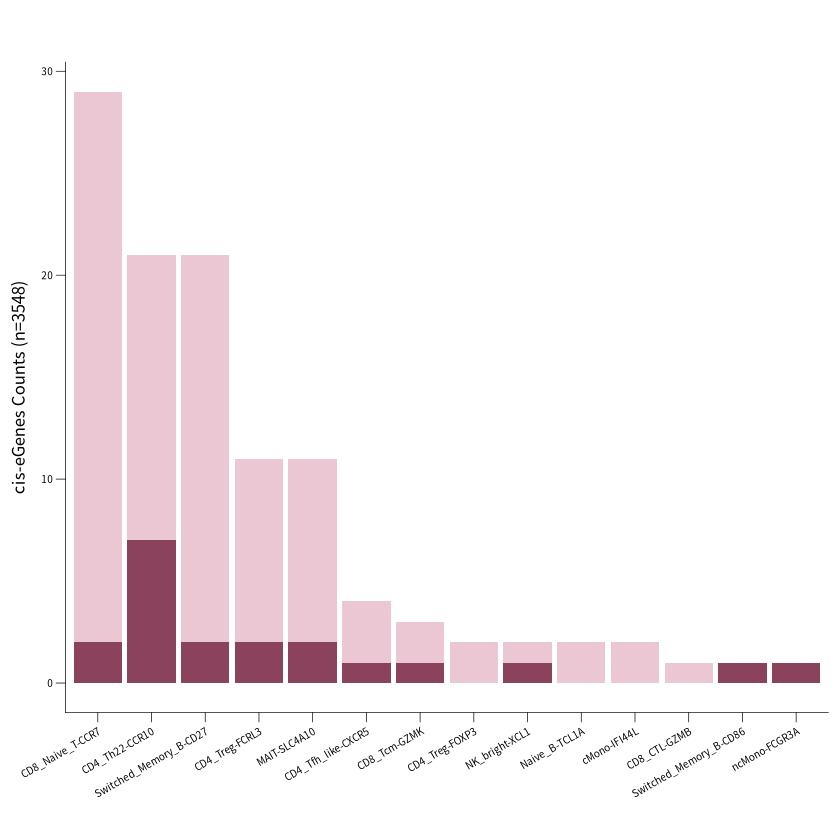

In [93]:
p <- ggplot(tmp_long, aes(x = celltype, y = count, fill = type)) +
     geom_bar(stat = "identity") +
     labs(title = "",
          x = "", y = "cis-eGenes Counts (n=3548)", fill = "Phenotype Type") +
     scale_fill_manual(values = c("Unique eGenes" = "#EBC7D3", "Shared eGenes" = "#8B425D"))+
     mytheme
p
ggsave("/media/AnalysisDisk2/Yangshichen/0_HIV_RNA/QTL/01.Dynamic/03.Result/plot/capeak/capeak_inter2groups_count-2.pdf",p,width=10,height=3)

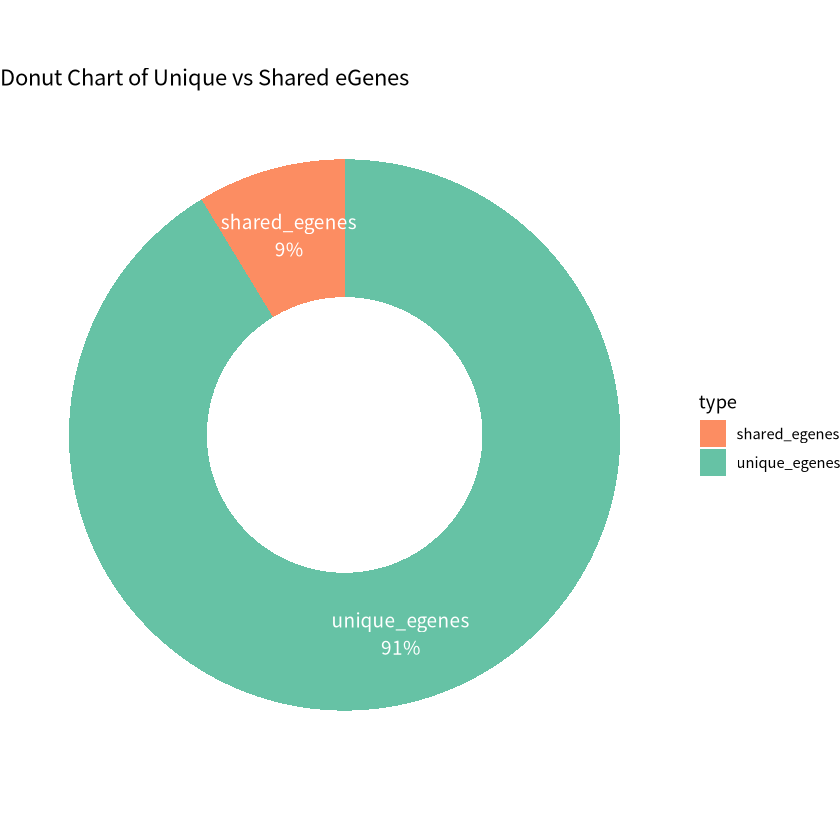

In [95]:
# 计算总和
gene_counts <- colSums(tmp[, c("unique_egenes", "shared_egenes")], na.rm = TRUE)

# 转为 dataframe
gene_df <- data.frame(
  type = names(gene_counts),
  count = as.numeric(gene_counts)
)

# 计算百分比 & 添加标签
gene_df$fraction <- gene_df$count / sum(gene_df$count)
gene_df$ymax <- cumsum(gene_df$fraction)
gene_df$ymin <- c(0, head(gene_df$ymax, n = -1))
gene_df$label <- paste0(gene_df$type, "\n", round(gene_df$fraction * 100), "%")

# 绘制圆环图
p <- ggplot(gene_df, aes(ymax = ymax, ymin = ymin, xmax = 4, xmin = 3, fill = type)) +
  geom_rect() +
  coord_polar(theta = "y") +
  xlim(c(2, 4)) +  # 控制中间空心
  theme_void() +
  scale_fill_manual(values = c("unique_egenes" = "#66c2a5", "shared_egenes" = "#fc8d62")) +
  geom_text(aes(x = 3.5, y = (ymin + ymax)/2, label = label), color = "white", size = 4) +
  labs(title = "Donut Chart of Unique vs Shared eGenes") +
  theme(legend.position = "right")
p
ggsave("/media/AnalysisDisk2/Yangshichen/0_HIV_RNA/QTL/01.Dynamic/03.Result/plot/capeak/capeak_inter2groups_count-3.pdf",p,width=10,height=3)

In [80]:
cellratio <- as.data.frame(read.csv("/media/AnalysisDisk2/Yangshichen/0_HIV_RNA/样本统计/scATAC_proportions_L3.csv",check.names = F,header = T))
cellratio

sample  celltype_L3               count total_count proportion  
1    HD-H134 Aptypical_Memory_B-ITGAX     2  8038        0.0002488181
2    HD-H134 CD4_Naive_T-CCR7          1164  8038        0.1448121423
3    HD-H134 CD4_Naive_T-SOX4             0  8038        0.0000000000
4    HD-H134 CD4_Tcm-CXCR5              178  8038        0.0221448121
5    HD-H134 CD4_Tcm-GPR183              49  8038        0.0060960438
6    HD-H134 CD4_Tcm-IFIT3               12  8038        0.0014929087
7    HD-H134 CD4_Tcm-SOX4                 0  8038        0.0000000000
8    HD-H134 CD4_Tem-CCR7neg             88  8038        0.0109479970
9    HD-H134 CD4_Tfh_like-CXCR5          49  8038        0.0060960438
10   HD-H134 CD4_Th1-GZMK                15  8038        0.0018661359
11   HD-H134 CD4_Th17-RORC              138  8038        0.0171684499
12   HD-H134 CD4_Th22-CCR10             104  8038        0.0129385419
13   HD-H134 CD4_Th-TNFRSF11A            29  8038        0.0036078627
14   HD-H134 CD4_Treg-FCRL3              50  8038        0.0062204528
15   HD-H134 CD4_Treg-FOXP3              86  8038        0.0106991789
16   HD-H134 CD8_CTL-GZMB               781  8038        0.0971634735
17   HD-H134 CD8_CTL-GZMK                 0  8038        0.0000000000
18   HD-H134 CD8_Naive_T-CCR7           400  8038        0.0497636228
19   HD-H134 CD8_Tcm-GPR183              12  8038        0.0014929087
20   HD-H134 CD8_Tcm-GZMK               199  8038        0.0247574023
21   HD-H134 CD8_Tcm-IFI44L               0  8038        0.0000000000
22   HD-H134 CD8_Tem-GZMK               164  8038        0.0204030853
23   HD-H134 Cycling_T-MKI67              1  8038        0.0001244091
24   HD-H134 MAIT-SLC4A10               136  8038        0.0169196317
25   HD-H134 Mature_NK_dim-FCGR3A       252  8038        0.0313510824
26   HD-H134 NKT-IFIT3                    0  8038        0.0000000000
27   HD-H134 NKT-NCR1                   555  8038        0.0690470266
28   HD-H134 NK_bright-XCL1              56  8038        0.0069669072
29   HD-H134 Naive_B-IFIT3                0  8038        0.0000000000
30   HD-H134 Naive_B-TCL1A              301  8038        0.0374471262
⋮    ⋮       ⋮                         ⋮     ⋮           ⋮           
7836 PD-H308 NKT-IFIT3                    2  7115        0.0002810963
7837 PD-H308 NKT-NCR1                   868  7115        0.1219957836
7838 PD-H308 NK_bright-XCL1              28  7115        0.0039353479
7839 PD-H308 Naive_B-IFIT3                0  7115        0.0000000000
7840 PD-H308 Naive_B-TCL1A              741  7115        0.1041461701
7841 PD-H308 Plasma_B-IGHA1               8  7115        0.0011243851
7842 PD-H308 Plasma_B-IGHG1               0  7115        0.0000000000
7843 PD-H308 Plasmablast-MKI67            0  7115        0.0000000000
7844 PD-H308 Switched_Memory_B-CD27     155  7115        0.0217849613
7845 PD-H308 Switched_Memory_B-CD86      41  7115        0.0057624736
7846 PD-H308 Switched_Memory_B-IGHE      12  7115        0.0016865777
7847 PD-H308 Transitional_B-NEIL1         0  7115        0.0000000000
7848 PD-H308 Transitional_NK-GZMK         0  7115        0.0000000000
7849 PD-H308 Unswitched_Memory_B-CD1C   161  7115        0.0226282502
7850 PD-H308 Unswitched_Memory_B-IFIT3    0  7115        0.0000000000
7851 PD-H308 Unswitched_Memory_B-JAM3     0  7115        0.0000000000
7852 PD-H308 cDC1-BATF3                   0  7115        0.0000000000
7853 PD-H308 cDC2-CD1C                   81  7115        0.0113843992
7854 PD-H308 cMono-CD14                1175  7115        0.1651440618
7855 PD-H308 cMono-IFI44L               643  7115        0.0903724526
7856 PD-H308 cMono-IL1B                   0  7115        0.0000000000
7857 PD-H308 gdT2-GZMH                   17  7115        0.0023893183
7858 PD-H308 gdT2-GZMK                    1  7115        0.0001405481
7859 PD-H308 gdT2-IL12RB2                 0  7115        0.0000000000
7860 PD-H308 ncMono-C1QA                  0  7115        0.0000000000
7861 PD-H308 nc

In [81]:
summarized_df <- cellratio %>%
  group_by(celltype_L3) %>%
  summarise(proportion_sum = sum(proportion, na.rm = TRUE)/142)
summarized_df <- as.data.frame(summarized_df)
summarized_df

celltype_L3               proportion_sum
1  Aptypical_Memory_B-ITGAX  3.479439e-03  
2  CD4_Naive_T-CCR7          7.267461e-02  
3  CD4_Naive_T-SOX4          6.251304e-06  
4  CD4_Tcm-CXCR5             1.914031e-02  
5  CD4_Tcm-GPR183            5.448577e-03  
6  CD4_Tcm-IFIT3             8.313764e-04  
7  CD4_Tcm-SOX4              1.710566e-03  
8  CD4_Tem-CCR7neg           5.267047e-03  
9  CD4_Tfh_like-CXCR5        9.336241e-03  
10 CD4_Th-TNFRSF11A          2.857134e-03  
11 CD4_Th1-GZMK              1.744830e-03  
12 CD4_Th17-RORC             1.282006e-02  
13 CD4_Th22-CCR10            1.294669e-02  
14 CD4_Treg-FCRL3            4.626237e-03  
15 CD4_Treg-FOXP3            7.790012e-03  
16 CD8_CTL-GZMB              1.256463e-01  
17 CD8_CTL-GZMK              4.473873e-03  
18 CD8_Naive_T-CCR7          5.350530e-02  
19 CD8_Tcm-GPR183            4.333268e-04  
20 CD8_Tcm-GZMK              3.254896e-02  
21 CD8_Tcm-IFI44L            3.267586e-04  
22 CD8_Tem-GZMK              4.332676e-02  
23 Cycling_T-MKI67           9.535964e-04  
24 MAIT-SLC4A10              2.437128e-02  
25 Mature_NK_dim-FCGR3A      5.532590e-02  
26 NKT-IFIT3                 2.329670e-04  
27 NKT-NCR1                  1.336049e-01  
28 NK_bright-XCL1            9.725425e-03  
29 Naive_B-IFIT3             2.381440e-04  
30 Naive_B-TCL1A             5.713116e-02  
31 Plasma_B-IGHA1            2.596620e-03  
32 Plasma_B-IGHG1            1.720038e-04  
33 Plasmablast-MKI67         5.862131e-05  
34 Switched_Memory_B-CD27    7.781812e-03  
35 Switched_Memory_B-CD86    4.530169e-03  
36 Switched_Memory_B-IGHE    1.142023e-03  
37 Transitional_B-NEIL1      4.694580e-04  
38 Transitional_NK-GZMK      5.467772e-04  
39 Unswitched_Memory_B-CD1C  2.148052e-02  
40 Unswitched_Memory_B-IFIT3 1.485879e-04  
41 Unswitched_Memory_B-JAM3  1.009933e-04  
42 cDC1-BATF3                8.760111e-07  
43 cDC2-CD1C                 1.348125e-02  
44 cMono-CD14                1.671335e-01  
45 cMono-IFI44L              3.432096e-02  
46 cMono-IL1B                1.172049e-06  
47 gdT2-GZMH                 8.280685e-03  
48 gdT2-GZMK                 1.311516e-03  
49 gdT2-IL12RB2              4.575575e-05  
50 ncMono-C1QA               4.421246e-06  
51 ncMono-FCGR3A             3.361922e-02  
52 ncMono-IFI44L             3.344190e-03  
53 ncMono-IFIT1              1.130626e-03  
54 pDC-AXL                   1.352792e-04  
55 pDC-LILRA4                2.681211e-03

In [82]:
tmp <- as.data.frame(tmp)
tmp

celltype                 unique_egenes shared_egenes total_egenes
1  CD4_Naive_T-CCR7         3273          194           3467        
2  CD4_Tcm-CXCR5             387           75            462        
3  CD4_Tfh_like-CXCR5          3            1              4        
4  CD4_Th17-RORC            1548          193           1741        
5  CD4_Th22-CCR10             14            7             21        
6  CD4_Treg-FCRL3              9            2             11        
7  CD4_Treg-FOXP3              2            0              2        
8  CD8_CTL-GZMB                1            0              1        
9  CD8_Naive_T-CCR7           27            2             29        
10 CD8_Tcm-GZMK                2            1              3        
11 MAIT-SLC4A10                9            2             11        
12 NK_bright-XCL1              1            1              2        
13 Naive_B-TCL1A               2            0              2        
14 Switched_Memory_B-CD27     19            2             21        
15 Switched_Memory_B-CD86      0            1              1        
16 Unswitched_Memory_B-CD1C  373           58            431        
17 cMono-IFI44L                2            0              2        
18 ncMono-FCGR3A               0            1              1

In [86]:
merged_data <- left_join(tmp, summarized_df, by = c("celltype" = "celltype_L3"))
merged_data

celltype                 unique_egenes shared_egenes total_egenes
1  CD4_Naive_T-CCR7         3273          194           3467        
2  CD4_Tcm-CXCR5             387           75            462        
3  CD4_Tfh_like-CXCR5          3            1              4        
4  CD4_Th17-RORC            1548          193           1741        
5  CD4_Th22-CCR10             14            7             21        
6  CD4_Treg-FCRL3              9            2             11        
7  CD4_Treg-FOXP3              2            0              2        
8  CD8_CTL-GZMB                1            0              1        
9  CD8_Naive_T-CCR7           27            2             29        
10 CD8_Tcm-GZMK                2            1              3        
11 MAIT-SLC4A10                9            2             11        
12 NK_bright-XCL1              1            1              2        
13 Naive_B-TCL1A               2            0              2        
14 Switched_Memory_B-CD27     19            2             21        
15 Switched_Memory_B-CD86      0            1              1        
16 Unswitched_Memory_B-CD1C  373           58            431        
17 cMono-IFI44L                2            0              2        
18 ncMono-FCGR3A               0            1              1        
   proportion_sum
1  0.072674612   
2  0.019140309   
3  0.009336241   
4  0.012820063   
5  0.012946689   
6  0.004626237   
7  0.007790012   
8  0.125646339   
9  0.053505299   
10 0.032548964   
11 0.024371278   
12 0.009725425   
13 0.057131158   
14 0.007781812   
15 0.004530169   
16 0.021480519   
17 0.034320963   
18 0.033619223

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


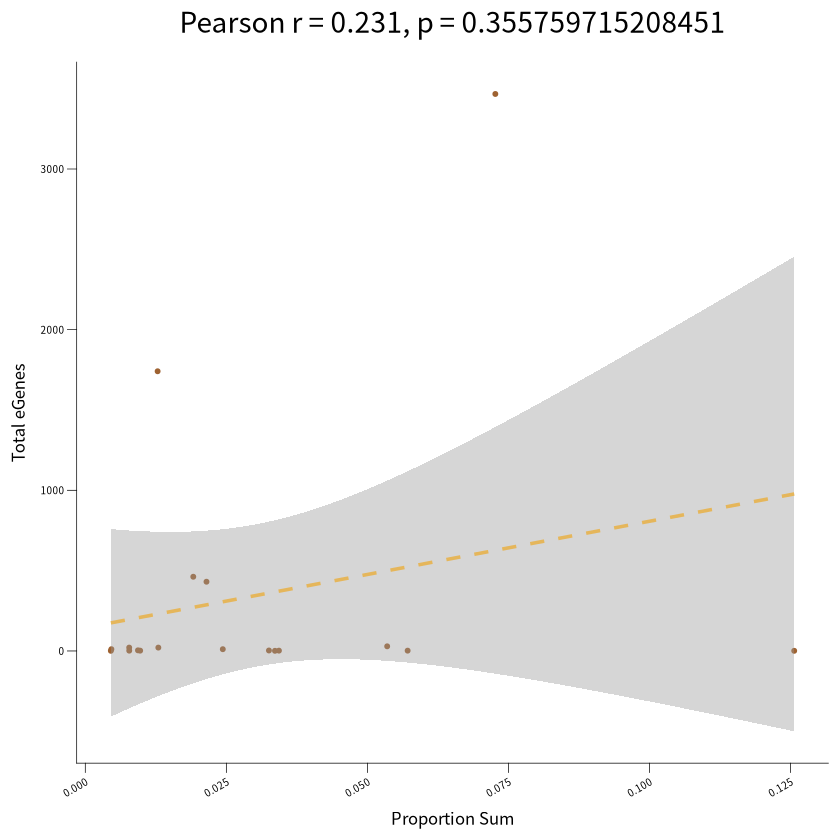

In [87]:
cor_test <- cor.test(merged_data$total_egenes,
                     merged_data$proportion_sum,
                     method = "pearson")

cor_val <- round(cor_test$estimate, 3)
p_val <- cor_test$p.value

p <- ggplot(merged_data, aes(x = proportion_sum, y = total_egenes)) +
     geom_point(size=1,color = "#9E6231") +
     geom_smooth(method = "lm", se = T, color = "#E5B65B", linetype=2) +
     labs(x = "Proportion Sum", y = "Total eGenes", title = paste0("Pearson r = ", cor_val, ", p = ", p_val)) +
     mytheme
p
ggsave("/media/AnalysisDisk2/Yangshichen/0_HIV_RNA/QTL/01.Dynamic/03.Result/plot/capeak/inter_capeak_cor_cellratio.pdf",p,width=3,height=3.5)

#### interactions-3groups caPeak统计

In [13]:
# 设置你的根目录
root_dir <- "/media/AnalysisDisk2/Yangshichen/0_HIV_RNA/QTL/01.Dynamic/03.Result/caQTL/"

# 获取所有子文件夹
celltype_dirs <- list.dirs(root_dir, recursive = FALSE)

# 初始化一个空的dataframe
all_qtl_data <- data.frame()

# 循环读取每个文件夹下的目标文件
for (dir in celltype_dirs) {
  # 构造完整文件路径
  file_path <- file.path(dir, "/diseases_3groups/diseases_3groups.cis_qtl_top_assoc.txt.gz")
  
  # 检查文件是否存在
  if (file.exists(file_path)) {
    # 读取数据
    data <- read_tsv(file_path, show_col_types = FALSE)
    
    # 提取细胞类型名（文件夹名）
    celltype <- basename(dir)
    
    # 添加列
    data$celltype <- celltype
    
    # 合并
    all_qtl_data <- bind_rows(all_qtl_data, data)
  } else {
    warning(paste("文件不存在:", file_path))
  }
}

Warning message:
“文件不存在: /media/AnalysisDisk2/Yangshichen/0_HIV_RNA/QTL/01.Dynamic/03.Result/caQTL//CD4_Th1-GZMK//diseases_3groups/diseases_3groups.cis_qtl_top_assoc.txt.gz”
Warning message:
“文件不存在: /media/AnalysisDisk2/Yangshichen/0_HIV_RNA/QTL/01.Dynamic/03.Result/caQTL//ncMono-IFIT1//diseases_3groups/diseases_3groups.cis_qtl_top_assoc.txt.gz”
Warning message:
“文件不存在: /media/AnalysisDisk2/Yangshichen/0_HIV_RNA/QTL/01.Dynamic/03.Result/caQTL//Switched_Memory_B-IGHE//diseases_3groups/diseases_3groups.cis_qtl_top_assoc.txt.gz”


In [14]:
write.csv(all_qtl_data,'/media/AnalysisDisk2/Yangshichen/0_HIV_RNA/QTL/01.Dynamic/03.Result/caQTL_all_lead_inter_3groups_qvalues.csv')

In [15]:
all_qtl_data <- read.csv('/media/AnalysisDisk2/Yangshichen/0_HIV_RNA/QTL/01.Dynamic/03.Result/caQTL_all_lead_inter_3groups_qvalues.csv')
all_qtl_data

X      phenotype_id            variant_id        start_distance
1       1     chr1:778498-778999      1_1658115_G_[A]    879616       
2       2     chr1:827257-827758      1_1698022_G_[A]    870764       
3       3     chr1:959080-959581      1_1459008_C_[T]    499927       
4       4     chr1:1013247-1013748    1_834583_G_[A]    -178665       
5       5     chr1:1032941-1033442    1_1921045_A_[G]    888103       
6       6     chr1:1115969-1116470    1_1688328_C_[T]    572358       
7       7     chr1:1231818-1232319    1_1245399_G_[C]     13580       
8       8     chr1:1273653-1274154    1_1976566_T_[C]    702912       
9       9     chr1:1305496-1305997    1_1989523_C_[T]    684026       
10     10     chr1:1308160-1308661    1_1865951_T_[A]    557790       
11     11     chr1:1375155-1375656    1_2334355_G_[A]    959199       
12     12     chr1:1399224-1399725    1_1625951_G_[A]    226726       
13     13     chr1:1407071-1407572    1_2284539_G_[C]    877467       
14     14     chr1:1471461-1471962    1_1126128_G_[A]   -345334       
15     15     chr1:1511832-1512333    1_821016_G_[A]    -690817       
16     16     chr1:1574671-1575172    1_2329783_C_[A]    755111       
17     17     chr1:1615142-1615643    1_2282992_C_[T]    667849       
18     18     chr1:1629666-1630167    1_2283014_A_[G]    653347       
19     19     chr1:1630188-1630689    1_1646520_T_[C]     16331       
20     20     chr1:1658882-1659383    1_1956754_C_[A]    297871       
21     21     chr1:1692584-1693085    1_916119_G_[A]    -776466       
22     22     chr1:1724171-1724672    1_1647600_G_[C]    -76572       
23     23     chr1:1778725-1779226    1_1096785_T_[C]   -681941       
24     24     chr1:1780301-1780802    1_798662_A_[G]    -981640       
25     25     chr1:1864612-1865113    1_932733_G_[A]    -931880       
26     26     chr1:1919173-1919674    1_2288631_T_[A]    369457       
27     27     chr1:2133138-2133639    1_2836128_C_[T]    702989       
28     28     chr1:2189366-2189867    1_1998227_A_[G]   -191140       
29     29     chr1:2194844-2195345    1_1362470_T_[A]   -832375       
30     30     chr1:2205040-2205541    1_1604202_G_[A]   -600839       
⋮      ⋮      ⋮                       ⋮                 ⋮             
845959 845959 chr22:50207433-50207934 22_50460190_A_[G]  252756       
845960 845960 chr22:50209768-50210269 22_49527206_G_[A] -682563       
845961 845961 chr22:50241029-50241530 22_49432375_C_[T] -808655       
845962 845962 chr22:50244274-50244775 22_50568559_C_[T]  324284       
845963 845963 chr22:50244805-50245306 22_49548950_G_[T] -695856       
845964 845964 chr22:50247703-50248204 22_49729676_T_[C] -518028       
845965 845965 chr22:50251054-50251555 22_49448081_T_[C] -802974       
845966 845966 chr22:50252072-50252573 22_49435696_G_[A] -816377       
845967 845967 chr22:50276111-50276612 22_50192241_T_[C]  -83871       
845968 845968 chr22:50292540-50293041 22_50185653_C_[G] -106888       
845969 845969 chr22:50299177-50299678 22_50578738_G_[A]  279560       
845970 845970 chr22:50304358-50304859 22_50144197_G_[A] -160162       
845971 845971 chr22:50314342-50314843 22_49409802_C_[G] -904541       
845972 845972 chr22:50342973-50343474 22_50131932_A_[G] -211042       
845973 845973 chr22:50469243-50469744 22_50370616_A_[T]  -98628       
845974 845974 chr22:50469790-50470291 22_50702982_G_[C]  233191       
845975 845975 chr22:50470420-50470921 22_50045421_T_[C] -425000       
845976 845976 chr22:50473144-50473645 22_50614679_T_[C]  141534       
845977 845977 chr22:50474867-50475368 22_50573241_C_[G]   98373       
845978 845978 chr22:50507871-50508372 22_50702982_G_[C]  195110       
845979 845979 chr22:50525484-50525985 22_50702982_G_[C]  177497       
845980 845980 chr22:50526231-50526732 22_50573241_C_[G]   47009       
845981 845981 chr22:50530140-50530641 22_49532624_A_[C] -997517       
845982 845982 chr22:50530777-50531278 22_50486517_T_[G]  -44261       
845983 845983 chr22:50531433-50

In [16]:
sub_qtl_data <- subset(all_qtl_data, pval_adj_bh < 0.05)
sub_qtl_data

X      phenotype_id              variant_id         start_distance
12951  12951  chr1:3901160-3901661      1_3231345_G_[T]    -669816       
15427  15427  chr1:159921764-159922265  1_159127112_G_[C]  -794653       
18536  18536  chr2:171327310-171327811  2_171508843_G_[A]   181532       
19419  19419  chr2:237694534-237695035  2_237875393_G_[A]   180858       
21361  21361  chr3:154323320-154323821  3_153440939_C_[A]  -882382       
21911  21911  chr4:2792723-2793224      4_3790690_C_[T]     997966       
23011  23011  chr4:153755149-153755650  4_153423154_T_[C]  -331996       
23190  23190  chr5:1103592-1104093      5_965503_G_[T]     -138090       
23632  23632  chr5:65924986-65925487    5_66357243_A_[G]    432256       
23677  23677  chr5:69234587-69235088    5_68403915_A_[G]   -830673       
24908  24908  chr5:179623599-179624100  5_179456831_G_[A]  -166769       
24914  24914  chr5:179732443-179732944  5_179463462_C_[T]  -268982       
24945  24945  chr5:180810328-180810829  5_181069697_A_[G]   259368       
29899  29899  chr8:98940893-98941394    8_98395004_G_[T]   -545890       
30100  30100  chr8:124563517-124564018  8_125464137_C_[G]   900619       
30191  30191  chr8:128542198-128542699  8_129388451_C_[T]   846252       
32062  32062  chr10:8061849-8062350     10_7739845_C_[T]   -322005       
32146  32146  chr10:13786933-13787434   10_14029784_A_[G]   242850       
33745  33745  chr11:6390886-6391387     11_5695737_T_[C]   -695150       
34405  34405  chr11:63536552-63537053   11_64350406_C_[T]   813853       
34490  34490  chr11:64853589-64854090   11_65444034_G_[A]   590444       
34738  34738  chr11:68039968-68040469   11_69023199_C_[G]   983230       
37594  37594  chr12:122966293-122966794 12_122462742_T_[G] -503552       
37770  37770  chr13:24220058-24220559   13_25015857_A_[T]   795798       
39268  39268  chr14:69669331-69669832   14_69342907_G_[A]  -326425       
40655  40655  chr15:67064051-67064552   15_67068928_T_[C]     4876       
41527  41527  chr16:8905130-8905631     16_8257669_A_[G]   -647462       
42921  42921  chr17:4499645-4500146     17_4640912_G_[C]    141266       
46845  46845  chr19:32675048-32675549   19_33286752_A_[C]   611703       
47529  47529  chr19:48330002-48330503   19_48005384_A_[C]  -324619       
⋮      ⋮      ⋮                         ⋮                  ⋮             
128339 128339 chr13:73625890-73626391   13_74512642_G_[A]   886751       
129049 129049 chr15:38563963-38564464   15_38830190_A_[G]   266226       
129812 129812 chr16:29613504-29614005   16_29225620_T_[C]  -387885       
129850 129850 chr16:30409393-30409894   16_29574012_A_[C]  -835382       
130236 130236 chr17:1649340-1649841     17_2340334_C_[T]    690993       
132238 132238 chr19:42242567-42243068   19_42939329_A_[T]   696761       
132440 132440 chr19:49590881-49591382   19_48922842_G_[A]  -668040       
132660 132660 chr20:3767662-3768163     20_3869217_G_[A]    101554       
132703 132703 chr20:17569820-17570321   20_16832094_C_[T]  -737727       
132791 132791 chr20:34825492-34825993   20_34554393_G_[T]  -271100       
132956 132956 chr20:57391087-57391588   20_58215189_T_[C]   824101       
139935 139935 chr6:32589577-32590078    6_33579663_C_[G]    990085       
156907 156907 chr8:65634030-65634531    8_66452467_T_[C]    818436       
160427 160427 chr16:89816469-89816970   16_89247264_A_[G]  -569206       
168639 168639 chr7:100603960-100604461  7_101365748_C_[T]   761787       
398091 398091 chr4:48773548-48774049    4_49560340_T_[A]    786791       
477269 477269 chr1:156661278-156661779  1_156668703_G_[A]     7424       
481823 481823 chr2:219388266-219388767  2_219733473_G_[C]   345206       
498983 498983 chr10:111017056-111017557 10_110362786_G_[A] -654271       
519449 519449 chr1:155085198-155085699  1_154265179_T_[G]  -820020       
524595 524595 chr9:2053845-2054346      9_2280107_A_[T]     226261       
524765 524765 chr9:89427572-89428073    9_89837205_T_[C]    409632       
779816 7798

In [17]:
length(unique(sub_qtl_data$phenotype_id))

[1] 552

#### genesymbol

In [179]:
allsymbol <- read.delim('/media/AnalysisDisk2/Yangshichen/0_HIV_RNA/QTL/01.Dynamic/01.Data/peak.annotation_hg38_all.tsv', head =T)
allsymbol$peak <- paste0(allsymbol$seqnames,":",allsymbol$start-1,"-",allsymbol$end)
allsymbol <- allsymbol[,c(18,6,16)]
allsymbol

peak                  
1      chr1:9925-10426       
2      chr1:15996-16497      
3      chr1:94649-95150      
4      chr1:96340-96841      
5      chr1:104726-105227    
6      chr1:180631-181132    
7      chr1:181239-181740    
8      chr1:186569-187070    
9      chr1:191596-192097    
10     chr1:267750-268251    
11     chr1:271054-271555    
12     chr1:274159-274660    
13     chr1:275017-275518    
14     chr1:280451-280952    
15     chr1:585948-586449    
16     chr1:605329-605830    
17     chr1:778498-778999    
18     chr1:804680-805181    
19     chr1:805231-805732    
20     chr1:812852-813353    
21     chr1:816090-816591    
22     chr1:817103-817604    
23     chr1:819730-820231    
24     chr1:822303-822804    
25     chr1:825630-826131    
26     chr1:826518-827019    
27     chr1:827257-827758    
28     chr1:838272-838773    
29     chr1:840521-841022    
30     chr1:842062-842563    
⋮      ⋮                     
354854 chrY:21459781-21460282
354855 chrY:21481513-21482014
354856 chrY:21483216-21483717
354857 chrY:21596319-21596820
354858 chrY:21602550-21603051
354859 chrY:21625743-21626244
354860 chrY:21647716-21648217
354861 chrY:21650457-21650958
354862 chrY:21657014-21657515
354863 chrY:21670408-21670909
354864 chrY:21675511-21676012
354865 chrY:21678860-21679361
354866 chrY:21679510-21680011
354867 chrY:21681837-21682338
354868 chrY:21686078-21686579
354869 chrY:21700169-21700670
354870 chrY:21701297-21701798
354871 chrY:21813416-21813917
354872 chrY:21814452-21814953
354873 chrY:21824322-21824823
354874 chrY:21836289-21836790
354875 chrY:22291673-22292174
354876 chrY:22344913-22345414
354877 chrY:22365867-22366368
354878 chrY:22612728-22613229
354879 chrY:26315019-26315520
354880 chrY:26408832-26409333
354881 chrY:26491493-26491994
354882 chrY:26576806-26577307
354883 chrY:26657201-26657702
       annotation                                                   
1      Promoter (1-2kb)                                             
2      Promoter (<=1kb)                                             
3      Intron (ENST00000466430.5/100996442, intron 2 of 3)          
4      Intron (ENST00000466430.5/100996442, intron 2 of 3)          
5      Intron (ENST00000466430.5/100996442, intron 2 of 3)          
6      Promoter (1-2kb)                                             
7      Promoter (<=1kb)                                             
8      Promoter (<=1kb)                                             
9      Intron (ENST00000623083.4/102723897, intron 1 of 9)          
10     Promoter (<=1kb)                                             
11     Intron (ENST00000441866.2/112268260, intron 3 of 3)          
12     Intron (ENST00000441866.2/112268260, intron 3 of 3)          
13     Intron (ENST00000441866.2/112268260, intron 3 of 3)          
14     Intron (ENST00000441866.2/112268260, intron 3 of 3)          
15     Exon (ENST00000634833.2/105378947, exon 6 of 6)              
16     Intron (ENST00000634833.2/105378947, intron 2 of 5)          
17     Promoter (<=1kb)                                             
18     Promoter (<=1kb)                                             
19     Promoter (1-2kb)                                             
20     Intron (ENST00000635509.2/105378947, intron 1 of 3)          
21     Promoter (<=1kb)                                             
22     Promoter (<=1kb)                                             
23     Exon (ENST00000326734.2/400728, exon 2 of 2)                 
24     Intron (ENST00000635509.2/105378947, intron 1 of 3)          
25     Promoter (<=1kb)                                             
26     Promoter (<=1kb)                                             
27     Promoter (<=1kb)                                             
28     Intron (ENST00000624927.3/643837, intron 1 of 2)             
29     Intron (ENST00000624927.3/643837, intron 1 of 2)             
30     Exon (ENST00000669922.1/643837, exon 3 of 3)                 
⋮      ⋮

In [181]:
data1 <- read.csv('/media/AnalysisDisk2/Yangshichen/0_HIV_RNA/QTL/01.Dynamic/03.Result/caQTL_all_lead_inter_2groups_qvalues_0.05.csv', head =T)
data1 <- data1[,-c(26,27)]
data1$peak <- paste0(data1$chr,":",data1$start,"-",data1$end)
data1 <- inner_join(data1, allsymbol, by = "peak")
data1
write.csv(data1, file = "/media/AnalysisDisk2/Yangshichen/0_HIV_RNA/QTL/01.Dynamic/03.Result/caQTL_all_lead_inter_2groups_qvalues_0.05.csv", row.names = FALSE)

X.1  X      chr   start    end      variant_id        start_distance
1     1     6    chr1   923623   924124  1_879115_C_[A]     -44509       
2     2     7    chr1   959080   959581  1_1653319_G_[A]    694238       
3     3     8    chr1   960331   960832  1_878714_A_[G]     -81618       
4     4    12    chr1   999920  1000421  1_974039_C_[T]     -25882       
5     5    16    chr1  1014244  1014745  1_1130056_G_[A]    115811       
6     6    21    chr1  1137227  1137728  1_1660408_T_[C]    523180       
7     7    23    chr1  1173631  1174132  1_1373006_A_[G]    199374       
8     8    23    chr1  1173631  1174132  1_1373006_A_[G]    199374       
9     9    29    chr1  1299948  1300449  1_995153_C_[G]    -304796       
10   10    34    chr1  1349168  1349669  1_1653319_G_[A]    304150       
11   11    35    chr1  1359214  1359715  1_1363602_C_[T]      4387       
12   12    38    chr1  1407071  1407572  1_2398369_G_[A]    991297       
13   13    45    chr1  1615142  1615643  1_2416137_G_[T]    800994       
14   14    46    chr1  1615920  1616421  1_1650777_G_[A]     34856       
15   15    51    chr1  1677773  1678274  1_2218243_T_[C]    540469       
16   16    65    chr1  2152885  2153386  1_2303193_G_[A]    150307       
17   17    78    chr1  2240199  2240700  1_1774721_G_[A]   -465479       
18   18    88    chr1  2381676  2382177  1_3199797_G_[T]    818120       
19   19    92    chr1  2523854  2524355  1_2435078_G_[A]    -88777       
20   20   107    chr1  3624628  3625129  1_3573255_A_[G]    -51374       
21   21   111    chr1  3772354  3772855  1_3195714_G_[A]   -576641       
22   22   122    chr1  6026954  6027455  1_5842307_C_[A]   -184648       
23   23   130    chr1  6244991  6245492  1_6269955_T_[C]     24963       
24   24   148    chr1  6475428  6475929  1_7112129_G_[A]    636700       
25   25   160    chr1  6612549  6613050  1_7116619_G_[T]    504069       
26   26   187    chr1  8397477  8397978  1_7473104_G_[A]   -924374       
27   27   190    chr1  8422696  8423197  1_8140630_A_[G]   -282067       
28   28   205    chr1  8560984  8561485  1_7590651_A_[G]   -970334       
29   29   215    chr1  8946413  8946914  1_9336876_C_[T]    390462       
30   30   219    chr1  9005046  9005547  1_9465176_A_[G]    460129       
⋮    ⋮    ⋮      ⋮     ⋮        ⋮        ⋮                 ⋮             
7316 7316 747790 chr19 50835909 50836410 19_50756355_T_[C]  -79555       
7317 7317 747845 chr19 53254665 53255166 19_52631103_T_[C] -623563       
7318 7318 747886 chr19 54624898 54625399 19_53666443_T_[G] -958456       
7319 7319 747887 chr19 54937851 54938352 19_55149131_A_[G]  211279       
7320 7320 748025 chr20   298732   299233 20_940688_G_[C]    641955       
7321 7321 748190 chr20 19658132 19658633 20_19431504_C_[T] -226629       
7322 7322 748211 chr20 23357966 23358467 20_23878078_T_[A]  520111       
7323 7323 748374 chr20 36604850 36605351 20_36805743_T_[C]  200892       
7324 7324 748461 chr20 44210186 44210687 20_44806772_T_[C]  596585       
7325 7325 748486 chr20 44969489 44969990 20_45514028_G_[A]  544538       
7326 7326 748499 chr20 45432270 45432771 20_45342902_T_[C]  -89369       
7327 7327 748528 chr20 47272753 47273254 20_47974363_T_[C]  701609       
7328 7328 748613 chr20 50810846 50811347 20_50042445_T_[C] -768402       
7329 7329 748662 chr20 57398191 57398692 20_57455576_G_[A]   57384       
7330 7330 748676 chr20 57708738 57709239 20_57095445_T_[C] -613294       
7331 7331 748705 chr20 59207690 59208191 20_59727136_G_[A]  519445       
7332 7332 748783 chr20 64057700 64058201 20_63589896_A_[G] -467805       
7333 7333 748813 chr21 14901624 14902125 21_14222790_C_[T] -678835       
7334 7334 748880 chr21 33215493 33215994 21_33005286_A_[G] -210208       
7335 7335 748891 chr21 33308852 33309353 21_33874805_C_[T]  565952       
7336 7336 749180 chr22 19891464 19891965 22_20419421_C_[T]  527956       
7337 7337 749276 chr22 23180239 23180740 22_22680047_C_[T] -500193       
7338 7338

In [189]:
data2 <- read.csv('/media/AnalysisDisk2/Yangshichen/0_HIV_RNA/QTL/01.Dynamic/03.Result/caQTL_all_lead_inter_2groups_qvalues.csv', head =T)
data2$peak <- data2$phenotype_id
data2 <- inner_join(data2, allsymbol, by = "peak")
data2
write.csv(data2, file = "/media/AnalysisDisk2/Yangshichen/0_HIV_RNA/QTL/01.Dynamic/03.Result/caQTL_all_lead_inter_2groups_qvalues.csv", row.names = FALSE)

X      phenotype_id            variant_id        start_distance
1       1     chr1:778498-778999      1_879110_C_[A]     100611       
2       2     chr1:827257-827758      1_879110_C_[A]      51852       
3       3     chr1:844406-844907      1_836443_C_[T]      -7964       
4       4     chr1:857900-858401      1_1384256_G_[T]    526355       
5       5     chr1:869641-870142      1_878714_A_[G]       9072       
6       6     chr1:923623-924124      1_879115_C_[A]     -44509       
7       7     chr1:959080-959581      1_1653319_G_[A]    694238       
8       8     chr1:960331-960832      1_878714_A_[G]     -81618       
9       9     chr1:966748-967249      1_1662855_T_[C]    696106       
10     10     chr1:975964-976465      1_1067054_T_[C]     91089       
11     11     chr1:998737-999238      1_879134_G_[T]    -119604       
12     12     chr1:999920-1000421     1_974039_C_[T]     -25882       
13     13     chr1:1000649-1001150    1_1496953_C_[T]    496303       
14     14     chr1:1001742-1002243    1_1687643_A_[G]    685900       
15     15     chr1:1013247-1013748    1_811536_G_[A]    -201712       
16     16     chr1:1014244-1014745    1_1130056_G_[A]    115811       
17     17     chr1:1032941-1033442    1_1586215_A_[G]    553273       
18     18     chr1:1040593-1041094    1_1990864_T_[C]    950270       
19     19     chr1:1099112-1099613    1_1134063_A_[G]     34950       
20     20     chr1:1115969-1116470    1_1110491_C_[T]     -5479       
21     21     chr1:1137227-1137728    1_1660408_T_[C]    523180       
22     22     chr1:1143977-1144478    1_1650383_T_[G]    506405       
23     23     chr1:1173631-1174132    1_1373006_A_[G]    199374       
24     24     chr1:1213888-1214389    1_861347_T_[G]    -352542       
25     25     chr1:1231286-1231787    1_1256490_C_[T]     25203       
26     26     chr1:1231818-1232319    1_1688570_T_[A]    456751       
27     27     chr1:1273653-1274154    1_1646520_T_[C]    372866       
28     28     chr1:1291773-1292274    1_2274142_A_[C]    982368       
29     29     chr1:1299948-1300449    1_995153_C_[G]    -304796       
30     30     chr1:1305496-1305997    1_928264_T_[C]    -377233       
⋮      ⋮      ⋮                       ⋮                 ⋮             
749824 749824 chr22:50207433-50207934 22_49235728_A_[C] -971706       
749825 749825 chr22:50209768-50210269 22_49217966_A_[G] -991803       
749826 749826 chr22:50241029-50241530 22_50537644_T_[C]  296614       
749827 749827 chr22:50244274-50244775 22_50568559_C_[T]  324284       
749828 749828 chr22:50244805-50245306 22_50702982_G_[C]  458176       
749829 749829 chr22:50247703-50248204 22_49729676_T_[C] -518028       
749830 749830 chr22:50251054-50251555 22_49443116_C_[T] -807939       
749831 749831 chr22:50252072-50252573 22_50451457_G_[C]  199384       
749832 749832 chr22:50276111-50276612 22_50318919_A_[G]   42807       
749833 749833 chr22:50292540-50293041 22_50663471_C_[A]  370930       
749834 749834 chr22:50299177-50299678 22_50578738_G_[A]  279560       
749835 749835 chr22:50304358-50304859 22_50144197_G_[A] -160162       
749836 749836 chr22:50314342-50314843 22_50201207_G_[C] -113136       
749837 749837 chr22:50342973-50343474 22_50017166_G_[T] -325808       
749838 749838 chr22:50469243-50469744 22_50019591_G_[A] -449653       
749839 749839 chr22:50469790-50470291 22_50702982_G_[C]  233191       
749840 749840 chr22:50470420-50470921 22_50207889_A_[G] -262532       
749841 749841 chr22:50473144-50473645 22_50065635_A_[G] -407510       
749842 749842 chr22:50474867-50475368 22_50166044_A_[C] -308824       
749843 749843 chr22:50507871-50508372 22_50702982_G_[C]  195110       
749844 749844 chr22:50525484-50525985 22_50702982_G_[C]  177497       
749845 749845 chr22:50526231-50526732 22_50314340_C_[T] -211892       
749846 749846 chr22:50530140-50530641 22_49916267_A_[T] -613874       
749847 749847 chr22:50530777-50531278 22_50372929_C_[T] -157849       
749848 749848 chr22:50531433-50

In [192]:
data3 <- read.csv('/media/AnalysisDisk2/Yangshichen/0_HIV_RNA/QTL/01.Dynamic/03.Result/caQTL_all_lead_inter_3groups_qvalues.csv', head =T)
data3$peak <- data3$phenotype_id
data3 <- inner_join(data3, allsymbol, by = "peak")
data3
write.csv(data3, file = "/media/AnalysisDisk2/Yangshichen/0_HIV_RNA/QTL/01.Dynamic/03.Result/caQTL_all_lead_inter_3groups_qvalues.csv", row.names = FALSE)

X      phenotype_id            variant_id        start_distance
1       1     chr1:778498-778999      1_1658115_G_[A]    879616       
2       2     chr1:827257-827758      1_1698022_G_[A]    870764       
3       3     chr1:959080-959581      1_1459008_C_[T]    499927       
4       4     chr1:1013247-1013748    1_834583_G_[A]    -178665       
5       5     chr1:1032941-1033442    1_1921045_A_[G]    888103       
6       6     chr1:1115969-1116470    1_1688328_C_[T]    572358       
7       7     chr1:1231818-1232319    1_1245399_G_[C]     13580       
8       8     chr1:1273653-1274154    1_1976566_T_[C]    702912       
9       9     chr1:1305496-1305997    1_1989523_C_[T]    684026       
10     10     chr1:1308160-1308661    1_1865951_T_[A]    557790       
11     11     chr1:1375155-1375656    1_2334355_G_[A]    959199       
12     12     chr1:1399224-1399725    1_1625951_G_[A]    226726       
13     13     chr1:1407071-1407572    1_2284539_G_[C]    877467       
14     14     chr1:1471461-1471962    1_1126128_G_[A]   -345334       
15     15     chr1:1511832-1512333    1_821016_G_[A]    -690817       
16     16     chr1:1574671-1575172    1_2329783_C_[A]    755111       
17     17     chr1:1615142-1615643    1_2282992_C_[T]    667849       
18     18     chr1:1629666-1630167    1_2283014_A_[G]    653347       
19     19     chr1:1630188-1630689    1_1646520_T_[C]     16331       
20     20     chr1:1658882-1659383    1_1956754_C_[A]    297871       
21     21     chr1:1692584-1693085    1_916119_G_[A]    -776466       
22     22     chr1:1724171-1724672    1_1647600_G_[C]    -76572       
23     23     chr1:1778725-1779226    1_1096785_T_[C]   -681941       
24     24     chr1:1780301-1780802    1_798662_A_[G]    -981640       
25     25     chr1:1864612-1865113    1_932733_G_[A]    -931880       
26     26     chr1:1919173-1919674    1_2288631_T_[A]    369457       
27     27     chr1:2133138-2133639    1_2836128_C_[T]    702989       
28     28     chr1:2189366-2189867    1_1998227_A_[G]   -191140       
29     29     chr1:2194844-2195345    1_1362470_T_[A]   -832375       
30     30     chr1:2205040-2205541    1_1604202_G_[A]   -600839       
⋮      ⋮      ⋮                       ⋮                 ⋮             
845959 845959 chr22:50207433-50207934 22_50460190_A_[G]  252756       
845960 845960 chr22:50209768-50210269 22_49527206_G_[A] -682563       
845961 845961 chr22:50241029-50241530 22_49432375_C_[T] -808655       
845962 845962 chr22:50244274-50244775 22_50568559_C_[T]  324284       
845963 845963 chr22:50244805-50245306 22_49548950_G_[T] -695856       
845964 845964 chr22:50247703-50248204 22_49729676_T_[C] -518028       
845965 845965 chr22:50251054-50251555 22_49448081_T_[C] -802974       
845966 845966 chr22:50252072-50252573 22_49435696_G_[A] -816377       
845967 845967 chr22:50276111-50276612 22_50192241_T_[C]  -83871       
845968 845968 chr22:50292540-50293041 22_50185653_C_[G] -106888       
845969 845969 chr22:50299177-50299678 22_50578738_G_[A]  279560       
845970 845970 chr22:50304358-50304859 22_50144197_G_[A] -160162       
845971 845971 chr22:50314342-50314843 22_49409802_C_[G] -904541       
845972 845972 chr22:50342973-50343474 22_50131932_A_[G] -211042       
845973 845973 chr22:50469243-50469744 22_50370616_A_[T]  -98628       
845974 845974 chr22:50469790-50470291 22_50702982_G_[C]  233191       
845975 845975 chr22:50470420-50470921 22_50045421_T_[C] -425000       
845976 845976 chr22:50473144-50473645 22_50614679_T_[C]  141534       
845977 845977 chr22:50474867-50475368 22_50573241_C_[G]   98373       
845978 845978 chr22:50507871-50508372 22_50702982_G_[C]  195110       
845979 845979 chr22:50525484-50525985 22_50702982_G_[C]  177497       
845980 845980 chr22:50526231-50526732 22_50573241_C_[G]   47009       
845981 845981 chr22:50530140-50530641 22_49532624_A_[C] -997517       
845982 845982 chr22:50530777-50531278 22_50486517_T_[G]  -44261       
845983 845983 chr22:50531433-50

In [195]:
data4 <- read.csv('/media/AnalysisDisk2/Yangshichen/0_HIV_RNA/QTL/01.Dynamic/03.Result/caQTL_all_lead_perm_qvalues.csv', head =T)
data4$peak <- data4$phenotype_id
data4 <- inner_join(data4, allsymbol, by = "peak")
data4
write.csv(data4, file = "/media/AnalysisDisk2/Yangshichen/0_HIV_RNA/QTL/01.Dynamic/03.Result/caQTL_all_lead_perm_qvalues.csv", row.names = FALSE)

X      phenotype_id            num_var beta_shape1 beta_shape2 true_df  
1       0     chr1:778498-778999      1929    1.0645808   169.4195    101.5061 
2       1     chr1:817103-817604      1957    1.0329543   188.4632    105.1320 
3       2     chr1:827257-827758      1964    1.0248731   190.2065    105.7571 
4       3     chr1:869641-870142      2016    0.9956691   176.3600    103.1675 
5       4     chr1:959080-959581      2214    1.0507896   183.6780    102.6203 
6       5     chr1:966748-967249      2239    1.0072855   181.8297    102.2619 
7       6     chr1:999920-1000421     2376    1.0132326   210.5724    103.3268 
8       7     chr1:1000649-1001150    2378    0.9818671   207.9698    104.4955 
9       8     chr1:1009115-1009616    2396    1.0029188   182.5737    100.3507 
10      9     chr1:1013247-1013748    2408    1.0458966   223.9515    104.0303 
11     10     chr1:1032941-1033442    2442    1.0512500   211.8329    102.7820 
12     11     chr1:1038674-1039175    2448    1.0099517   219.4340    104.7498 
13     12     chr1:1115969-1116470    2651    1.0458769   243.7749    104.4419 
14     13     chr1:1231818-1232319    2779    1.0344434   241.1319    104.3427 
15     14     chr1:1273653-1274154    2834    1.0443732   247.5699    104.6456 
16     15     chr1:1305496-1305997    2903    1.0245476   231.9317    102.2962 
17     16     chr1:1308160-1308661    2904    1.0293720   268.3272    105.9746 
18     17     chr1:1324473-1324974    2933    1.0410556   268.7460    104.7701 
19     18     chr1:1349168-1349669    3007    1.0399433   257.8445    103.2255 
20     19     chr1:1375155-1375656    3097    1.0418782   277.6652    104.3861 
21     20     chr1:1399224-1399725    3135    1.0429628   263.3558    102.6497 
22     21     chr1:1407071-1407572    3146    1.0584192   280.0376    103.7642 
23     22     chr1:1471461-1471962    3244    1.0551751   306.6473    103.8769 
24     23     chr1:1511832-1512333    3244    1.0238644   312.9204    105.8034 
25     24     chr1:1573746-1574247    3244    1.0370905   289.5226    103.0580 
26     25     chr1:1574671-1575172    3244    1.0661783   307.6627    103.9774 
27     26     chr1:1615142-1615643    3243    1.0474777   309.5097    104.6769 
28     27     chr1:1615920-1616421    3243    1.0040650   256.4021    100.6868 
29     28     chr1:1630188-1630689    3242    0.9938937   258.3985    101.2276 
30     29     chr1:1658882-1659383    3242    1.0730687   287.7875    102.4873 
⋮      ⋮      ⋮                       ⋮       ⋮           ⋮           ⋮        
873798 873797 chr22:50207433-50207934 3290    1.000903    285.8813    101.54472
873799 873798 chr22:50209768-50210269 3278    1.004210    273.7515    100.29851
873800 873799 chr22:50241029-50241530 3173    1.043537    291.9071    101.17802
873801 873800 chr22:50244274-50244775 3167    1.042886    324.9844    104.56714
873802 873801 chr22:50244805-50245306 3167    1.043107    317.4657    104.02875
873803 873802 chr22:50247703-50248204 3162    1.018083    314.6943    104.50662
873804 873803 chr22:50251054-50251555 3159    1.017124    287.0804    101.31686
873805 873804 chr22:50252072-50252573 3158    1.030706    327.9227    104.96507
873806 873805 chr22:50276111-50276612 3082    1.008444    255.1214    100.63127
873807 873806 chr22:50292540-50293041 2975    1.015064    290.7325    104.49728
873808 873807 chr22:50299177-50299678 2958    1.011695    254.6808    101.19306
873809 873808 chr22:50304358-50304859 2939    1.008360    258.0138    101.79536
873810 873809 chr22:50314342-50314843 2925    1.055338    285.6516    104.50687
873811 873810 chr22:50342973-50343474 2866    1.042023    285.0013    105.28220
873812 873811 chr22:50469243-50469744 2425    1.027822    202.3270    103.20702
873813 873812 chr22:50469790-50470291 2424    1.056174    200.9772    102.20683
873814 873813 chr22:50470420-50470921 2423    1.039435    187.6300    101.07394
873815 873814 chr22:50473144-50473645 2421    1.000784    175.1791     99.95418
873816 

### eQTL小提琴图

In [14]:
meta_data <- read.csv('/media/AnalysisDisk2/Yangshichen/0_HIV_RNA/QTL/01.Dynamic/01.Data/sample_information.csv', head =T)
meta_data <- meta_data[order(meta_data$sample), ]
rownames(meta_data) <- meta_data[,1]
meta_data <- meta_data[,-c(1,2,3,4), drop = FALSE]
meta_data$group <- meta_data$stage
meta_data$group[meta_data$group %in% c("HDs", "IRs")] <- "HDs+IRs"
meta_data

stage group  
HD-H134   HDs   HDs+IRs
HD-H135   HDs   HDs+IRs
HD-H136   HDs   HDs+IRs
HD-H137   HDs   HDs+IRs
HD-H138   HDs   HDs+IRs
HD-H140   HDs   HDs+IRs
HD-H141   HDs   HDs+IRs
HD-H143   HDs   HDs+IRs
HD-H145   HDs   HDs+IRs
HD-H146   HDs   HDs+IRs
HD-H147   HDs   HDs+IRs
HD-H148   HDs   HDs+IRs
HD-H150   HDs   HDs+IRs
HD-H153   HDs   HDs+IRs
HD-H154   HDs   HDs+IRs
HD-H155   HDs   HDs+IRs
HD-H156   HDs   HDs+IRs
HD-H157   HDs   HDs+IRs
HD-H160   HDs   HDs+IRs
HD-H161   HDs   HDs+IRs
HD-H162   HDs   HDs+IRs
HD-H273   HDs   HDs+IRs
HD-H274   HDs   HDs+IRs
HD-H275   HDs   HDs+IRs
HD-H276   HDs   HDs+IRs
HD-H277   HDs   HDs+IRs
HD-H279   HDs   HDs+IRs
HD-H280-1 HDs   HDs+IRs
HD-H280-2 HDs   HDs+IRs
HD-H309   HDs   HDs+IRs
⋮         ⋮     ⋮      
PD-H269   IRs   HDs+IRs
PD-H270   IRs   HDs+IRs
PD-H271   IRs   HDs+IRs
PD-H272   IRs   HDs+IRs
PD-H275   IRs   HDs+IRs
PD-H276   INRs  INRs   
PD-H277   INRs  INRs   
PD-H278   INRs  INRs   
PD-H279   IRs   HDs+IRs
PD-H281   INRs  INRs   
PD-H282   IRs   HDs+IRs
PD-H284   IRs   HDs+IRs
PD-H285   INRs  INRs   
PD-H286   INRs  INRs   
PD-H287   IRs   HDs+IRs
PD-H288   INRs  INRs   
PD-H289   INRs  INRs   
PD-H292   IRs   HDs+IRs
PD-H293   IRs   HDs+IRs
PD-H295   IRs   HDs+IRs
PD-H296   IRs   HDs+IRs
PD-H297   IRs   HDs+IRs
PD-H299   IRs   HDs+IRs
PD-H300   IRs   HDs+IRs
PD-H301   IRs   HDs+IRs
PD-H302   IRs   HDs+IRs
PD-H305   IRs   HDs+IRs
PD-H306   IRs   HDs+IRs
PD-H307   IRs   HDs+IRs
PD-H308   IRs   HDs+IRs

In [15]:
qtl_data <- read.csv('/media/AnalysisDisk2/Yangshichen/0_HIV_RNA/QTL/01.Dynamic/03.Result/eQTL_all_lead_inter_2groups_qvalues_0.05.csv', head =T)
qtl_data

X.1    X      phenotype_id variant_id         start_distance end_distance
1    1370   1370   TRAK1        3_41561975_T_[C]   -451828        -663915     
2    2885   2885   CLDN15       7_101883499_T_[A]   651406         644679     
3    3019   3019   FAM167A      8_10819027_C_[T]   -602450        -656881     
4    3102   3102   CHCHD7       8_55628746_A_[T]   -582941        -590063     
5    4234   4234   VPS26B       11_133498281_G_[A] -726391        -749507     
6    4304   4304   CMAS         12_22259290_G_[T]   213071         193616     
7    5937   5937   PSMD12       17_67736297_A_[C]   398380         369692     
8    6924   6924   UBE2L3       22_22197535_T_[C]   648087         573501     
9    7095   7095   KLHL17       1_1595007_A_[G]     634422         629288     
10   7099   7099   TNFRSF18     1_1089921_C_[T]    -113588        -116671     
11   7100   7100   TNFRSF4      1_1994025_T_[C]     782698         779872     
12   7104   7104   SCNN1D       1_914618_G_[A]     -365819        -377411     
13   7112   7112   MRPL20-AS1   1_1960886_C_[T]     561370         558840     
14   7129   7129   MORN1        1_3280916_A_[G]     959662         889209     
15   7140   7140   WRAP73       1_3231589_T_[C]    -399179        -421172     
16   7141   7141   SMIM1        1_3146001_T_[C]    -626749        -629981     
17   7147   7147   KCNAB2       1_5586044_G_[T]    -404884        -515149     
18   7156   7156   THAP3        1_6915161_A_[G]     290292         279575     
19   7164   7164   RERE-AS1     1_8331191_C_[T]     -93455        -103822     
20   7170   7170   SLC25A33     1_9283770_T_[C]    -255696        -301403     
21   7177   7177   UBE4B        1_9660438_T_[C]    -372395        -520801     
22   7184   7184   TARDBP       1_11431363_T_[C]    419018         400835     
23   7204   7204   PRDM2        1_13670940_C_[T]    -29249        -154139     
24   7209   7209   DDI2         1_16481730_G_[C]    864271         812686     
25   7219   7219   CROCC        1_16575173_C_[T]   -165101        -397791     
26   7223   7223   RCC2         1_18098517_A_[G]    691756         658840     
27   7242   7242   EIF4G3       1_20733539_G_[A]    -72754        -443746     
28   7252   7252   ZNF436       1_22664876_C_[T]   -694573        -704960     
29   7274   7274   SYF2         1_25534424_G_[A]    312147         301922     
30   7277   7277   MACO1        1_25934913_C_[A]    504054         434704     
⋮    ⋮      ⋮      ⋮            ⋮                  ⋮              ⋮           
3514 370189 370189 TADA3        3_9179715_G_[A]    -600253         -613296    
3515 370199 370199 TATDN2       3_10472005_C_[T]    223981          190787    
3516 370617 370617 TAPT1        4_16391060_T_[C]    230554          163650    
3517 370688 370688 USO1         4_75356797_A_[G]   -367781         -457489    
3518 371018 371018 ANKHD1       5_141076622_A_[G]   674807          536766    
3519 371172 371172 ATXN1        6_17245163_G_[A]    946050          483672    
3520 371182 371182 BTN3A2       6_25379698_C_[T]   -985462         -998622    
3521 371286 371286 MTCH1        6_37327371_G_[A]    361563          341073    
3522 371371 371371 MAP3K7       6_90378565_C_[T]   -135009         -208521    
3523 371662 371662 CYP51A1      7_91507994_G_[C]   -576994         -626809    
3524 371890 371890 TACC1        8_38592550_A_[G]   -135637         -260478    
3525 371919 371919 NSMAF        8_59296195_A_[G]    712686          636342    
3526 371939 371939 TMEM70       8_72977085_C_[A]   -995353        -1005698    
3527 372001 372001 SNTB1        8_121076248_A_[G]   540502          262975    
3528 372118 372118 EBLN3P       9_36146918_G_[A]   -932728         -944010    
3529 372262 372262 PRRC2B       9_131840612_C_[A]   466975          340415    
3530 372283 372283 UBAC1        9_136535983_T_[G]   603013          574610    
3531 372294 372294 LCN10        9_137067378_G_[A]   329210          324022    
3532 372329 372329 TAF3         10_7561142_C_[T]   -257

In [16]:
phenotype_id <- c('CD8A','SLC40A1','FADD','IREB2','DSC1','MYO1F','ARRDC2','ZNF134','OSER1','RGS2','SLC40A1','MRFAP1L1','GZMK','PLCL1','CARD19','IREB2','ARRDC2','NR4A2','SLC40A1','GZMK','CD8A','POLR2J3','SETDB2','RGS19','DNAAF2','ADGRG1','CD69','PMAIP1','CD84','TNFSF10',
                  'DCTN6','ZNF101','ZNF134')
variant_id <- c('2_87513216_T_[C]','2_190374143_G_[A]','11_69745443_T_[C]','15_79431022_A_[G]','18_31080645_T_[C]','19_9184915_A_[G]','19_17445653_T_[C]','19_58086601_C_[G]','20_43256482_A_[G]','1_192563662_C_[T]','2_189143466_T_[C]','4_7422124_G_[A]','5_54618194_G_[A]','2_198115039_T_[C]','9_93072998_G_[A]','15_79480247_G_[C]','19_17445653_T_[C]','2_156597282_G_[T]','2_189489737_A_[C]','5_54841969_G_[A]','2_87513216_T_[C]','7_102496129_T_[C]','13_49388180_A_[C]','20_63477817_G_[A]','14_50037778_A_[T]','16_57099995_G_[A]','12_10417411_C_[T]','18_59783505_C_[T]','1_160532238_G_[A]','3_173418450_G_[A]','8_30009659_C_[T]',
                '19_19263135_C_[T]','19_56818669_C_[T]')
pval_adj_bh <- c('0.0237275','0.0333367','0.00788983','0.0217149','0.0313586','0.035218','0.0277231','0.0334558','0.0401849','0.0188392','0.0379946','0.0217881','0.00234611','0.00817695','0.0277707','0.0427167','0.0278653','0.0148206','0.0408431','0.0310451','0.0213026','0.0263859','0.0100928','0.0195281','0.00777056','0.042152','0.0202967','0.0124542','0.0138625','0.0291831',
                 '0.00941368','0.0150017','0.0291491')
celltype <- c('CD4_Naive_T-CCR7','CD4_Naive_T-CCR7','CD4_Naive_T-CCR7','CD4_Naive_T-CCR7','CD4_Naive_T-CCR7','CD4_Naive_T-CCR7','CD4_Naive_T-CCR7','CD4_Naive_T-CCR7','CD4_Naive_T-CCR7','CD4_Naive_T-SOX4','CD4_Naive_T-SOX4','CD4_Naive_T-SOX4','CD4_Naive_T-SOX4','CD4_Tcm-CXCR5','CD4_Tcm-CXCR5','CD4_Tcm-GPR183','CD4_Tcm-GPR183','CD4_Tcm-IFIT3','CD4_Tcm-IFIT3','CD4_Tcm-IFIT3','CD4_Tcm-SOX4','CD4_Tcm-SOX4','CD4_Tcm-SOX4','CD4_Tcm-SOX4','CD4_Th-TNFRSF11A','CD4_Th-TNFRSF11A','CD4_Th1-GZMK','CD4_Th1-GZMK','CD4_Treg-FCRL3','CD4_Treg-FCRL3','CD4_Treg-FCRL3',
              'CD4_Treg-FCRL3','CD4_Treg-FCRL3')

In [17]:
#变异信息
geno_data <- read_parquet("/media/AnalysisDisk2/Yangshichen/0_HIV_RNA/QTL/01.Dynamic/01.Data/01.Genotype/142_sample_genotype.parquet")
sub_geno_data <- as.data.frame(t(subset(geno_data, variant_id %in% c('2_87513216_T_[C]','2_190374143_G_[A]','11_69745443_T_[C]','15_79431022_A_[G]','18_31080645_T_[C]','19_9184915_A_[G]','19_17445653_T_[C]','19_58086601_C_[G]','20_43256482_A_[G]','1_192563662_C_[T]','2_189143466_T_[C]','4_7422124_G_[A]','5_54618194_G_[A]','2_198115039_T_[C]','9_93072998_G_[A]','15_79480247_G_[C]','19_17445653_T_[C]','2_156597282_G_[T]','2_189489737_A_[C]','5_54841969_G_[A]','2_87513216_T_[C]','7_102496129_T_[C]','13_49388180_A_[C]','20_63477817_G_[A]','14_50037778_A_[T]','16_57099995_G_[A]','12_10417411_C_[T]','18_59783505_C_[T]','1_160532238_G_[A]','3_173418450_G_[A]','8_30009659_C_[T]',
                '19_19263135_C_[T]','19_56818669_C_[T]'))))
colnames(sub_geno_data) <- sub_geno_data[1,]
sub_geno_data <- sub_geno_data[-1, , drop = FALSE]

In [18]:
for (i in 1:length(phenotype_id)){
    sub_phenotype_id <- phenotype_id[i]
    sub_variant_id <- variant_id[i]
    sub_pval_adj_bh <- pval_adj_bh[i]
    sub_celltype <- celltype[i]

    #基因信息
    gene_data <- read.csv(paste0("/media/AnalysisDisk2/Yangshichen/0_HIV_RNA/QTL/01.Dynamic/01.Data/02.scRNA-seq/01.pseudobulk/07.gene_expression_csv/",sub_celltype,".csv"))
    sub_gene_data <- subset(gene_data, gene_id %in% c('CD8A','SLC40A1','FADD','IREB2','DSC1','MYO1F','ARRDC2','ZNF134','OSER1','RGS2','SLC40A1','MRFAP1L1','GZMK','PLCL1','CARD19','IREB2','ARRDC2','NR4A2','SLC40A1','GZMK','CD8A','POLR2J3','SETDB2','RGS19','DNAAF2','ADGRG1','CD69','PMAIP1','CD84','TNFSF10',
                  'DCTN6','ZNF101','ZNF134'))
    sub_gene_data <- as.data.frame(t(sub_gene_data[,-c(1,2,3)]))
    colnames(sub_gene_data) <- sub_gene_data[1,]
    sub_gene_data <- sub_gene_data[-1, , drop = FALSE]
    rownames(sub_gene_data) <- gsub("\\.", "-", rownames(sub_gene_data))

    #信息合并
    sub_geno_data_tmp <- sub_geno_data[,sub_variant_id,drop = FALSE]
    sub_gene_data_tmp <- sub_gene_data[,sub_phenotype_id,drop = FALSE]
    merged_data <- cbind(meta_data[intersect(rownames(sub_gene_data_tmp), rownames(meta_data)), , drop = FALSE],
                         sub_gene_data_tmp[intersect(rownames(sub_gene_data_tmp), rownames(sub_gene_data_tmp)), , drop = FALSE],
                         sub_geno_data_tmp[intersect(rownames(sub_gene_data_tmp), rownames(sub_geno_data_tmp)), , drop = FALSE])
    merged_data[[3]] <- as.numeric(merged_data[[3]])
    merged_data[[4]] <- as.numeric(merged_data[[4]])
    merged_data[[4]] <- factor(merged_data[[4]], levels = c("0", "1", "2"))
    merged_data$group <- factor(merged_data$group, levels = c("HDs+IRs", "INRs"))

    #计算中位值
    medians <- merged_data %>%
    group_by(group, !!sym(names(merged_data)[4])) %>%
    summarize(med = median(.data[[names(merged_data)[3]]], na.rm = TRUE)) %>%
    ungroup()

    #计算beat值
    gene_col <- names(merged_data)[3]
    geno_col <- names(merged_data)[4]
    gene_col_quoted <- paste0("`", gene_col, "`")
    geno_col_quoted <- paste0("`", geno_col, "`")
    #分组拟合线性模型，提取beta值
    beta_df <- merged_data %>% group_by(group) %>%
               do({fit <- lm(as.formula(paste(gene_col_quoted, "~", geno_col_quoted)), data = .)
                   coef_info <- summary(fit)$coefficients
                   data.frame(beta = coef_info[2, 1])}) %>%
               ungroup()
    
    #作图
    p <- ggplot(merged_data, aes(x = !!sym(names(merged_data)[4]), y = !!sym(names(merged_data)[3]), fill = group)) +
         geom_violin(trim = FALSE, scale = "width") +
         geom_boxplot(width = 0.1, outlier.size = 0.5, position = position_dodge(0.9)) +
         scale_fill_manual(values = c("HDs+IRs" = "#99C7DB", "INRs" = "#D07B7A")) +
         geom_line(data = medians, aes(x = !!sym(names(medians)[2]), y = med, group = group, color = group), size = 1) +
         scale_color_manual(values = c("HDs+IRs" = "#3A6FB0", "INRs" = "#BB2F29")) +
         geom_jitter(aes(x = !!sym(names(merged_data)[4]), y = !!sym(names(merged_data)[3]), color = group), size = 1, position = position_jitter(width = 0.15, height = 0)) +
         labs(title = paste0("P Interaction = ",sub_pval_adj_bh,"; Celltype = ",sub_celltype, "\nbeta1 = ",round(beta_df$beta[1],3), "; beta2 = ",round(beta_df$beta[2],3)), 
              x = colnames(merged_data)[4], y = colnames(merged_data)[3]) +
         mytheme +
         facet_wrap(~group)
    ggsave(paste0('/media/AnalysisDisk2/Yangshichen/0_HIV_RNA/QTL/01.Dynamic/03.Result/plot/int_eQTL3/',sub_celltype,"_",sub_phenotype_id,"_",sub_variant_id,'.pdf'),p)
}

`summarise()` has grouped output by 'group'. You can override using the
`.groups` argument.
Saving 7 x 7 in image
Warning message:
“Groups with fewer than two datapoints have been dropped.
ℹ Set `drop = FALSE` to consider such groups for position adjustment purposes.”
`summarise()` has grouped output by 'group'. You can override using the
`.groups` argument.
Saving 7 x 7 in image
`summarise()` has grouped output by 'group'. You can override using the
`.groups` argument.
Saving 7 x 7 in image
`summarise()` has grouped output by 'group'. You can override using the
`.groups` argument.
Saving 7 x 7 in image
Warning message:
“Groups with fewer than two datapoints have been dropped.
ℹ Set `drop = FALSE` to consider such groups for position adjustment purposes.”
`summarise()` has grouped output by 'group'. You can override using the
`.groups` argument.
Saving 7 x 7 in image
`summarise()` has grouped output by 'group'. You can override using the
`.groups` argument.
Saving 7 x 7 in image
`summa

### caQTL小提琴图

In [8]:
meta_data <- read.csv('/media/AnalysisDisk2/Yangshichen/0_HIV_RNA/QTL/01.Dynamic/01.Data/sample_information.csv', head =T)
meta_data <- meta_data[order(meta_data$sample), ]
rownames(meta_data) <- meta_data[,1]
meta_data <- meta_data[,-c(1,2,3,4), drop = FALSE]
meta_data$group <- meta_data$stage
meta_data$group[meta_data$group %in% c("HDs", "IRs")] <- "HDs+IRs"
meta_data

stage group  
HD-H134   HDs   HDs+IRs
HD-H135   HDs   HDs+IRs
HD-H136   HDs   HDs+IRs
HD-H137   HDs   HDs+IRs
HD-H138   HDs   HDs+IRs
HD-H140   HDs   HDs+IRs
HD-H141   HDs   HDs+IRs
HD-H143   HDs   HDs+IRs
HD-H145   HDs   HDs+IRs
HD-H146   HDs   HDs+IRs
HD-H147   HDs   HDs+IRs
HD-H148   HDs   HDs+IRs
HD-H150   HDs   HDs+IRs
HD-H153   HDs   HDs+IRs
HD-H154   HDs   HDs+IRs
HD-H155   HDs   HDs+IRs
HD-H156   HDs   HDs+IRs
HD-H157   HDs   HDs+IRs
HD-H160   HDs   HDs+IRs
HD-H161   HDs   HDs+IRs
HD-H162   HDs   HDs+IRs
HD-H273   HDs   HDs+IRs
HD-H274   HDs   HDs+IRs
HD-H275   HDs   HDs+IRs
HD-H276   HDs   HDs+IRs
HD-H277   HDs   HDs+IRs
HD-H279   HDs   HDs+IRs
HD-H280-1 HDs   HDs+IRs
HD-H280-2 HDs   HDs+IRs
HD-H309   HDs   HDs+IRs
⋮         ⋮     ⋮      
PD-H269   IRs   HDs+IRs
PD-H270   IRs   HDs+IRs
PD-H271   IRs   HDs+IRs
PD-H272   IRs   HDs+IRs
PD-H275   IRs   HDs+IRs
PD-H276   INRs  INRs   
PD-H277   INRs  INRs   
PD-H278   INRs  INRs   
PD-H279   IRs   HDs+IRs
PD-H281   INRs  INRs   
PD-H282   IRs   HDs+IRs
PD-H284   IRs   HDs+IRs
PD-H285   INRs  INRs   
PD-H286   INRs  INRs   
PD-H287   IRs   HDs+IRs
PD-H288   INRs  INRs   
PD-H289   INRs  INRs   
PD-H292   IRs   HDs+IRs
PD-H293   IRs   HDs+IRs
PD-H295   IRs   HDs+IRs
PD-H296   IRs   HDs+IRs
PD-H297   IRs   HDs+IRs
PD-H299   IRs   HDs+IRs
PD-H300   IRs   HDs+IRs
PD-H301   IRs   HDs+IRs
PD-H302   IRs   HDs+IRs
PD-H305   IRs   HDs+IRs
PD-H306   IRs   HDs+IRs
PD-H307   IRs   HDs+IRs
PD-H308   IRs   HDs+IRs

In [9]:
qtl_data <- read.csv('/media/AnalysisDisk2/Yangshichen/0_HIV_RNA/QTL/01.Dynamic/03.Result/caQTL_all_lead_inter_2groups_qvalues_0.05.csv', head =T)
qtl_data

X.1  X      chr   start    end      variant_id        start_distance
1     1     6    chr1   923623   924124  1_879115_C_[A]     -44509       
2     2     7    chr1   959080   959581  1_1653319_G_[A]    694238       
3     3     8    chr1   960331   960832  1_878714_A_[G]     -81618       
4     4    12    chr1   999920  1000421  1_974039_C_[T]     -25882       
5     5    16    chr1  1014244  1014745  1_1130056_G_[A]    115811       
6     6    21    chr1  1137227  1137728  1_1660408_T_[C]    523180       
7     7    23    chr1  1173631  1174132  1_1373006_A_[G]    199374       
8     8    23    chr1  1173631  1174132  1_1373006_A_[G]    199374       
9     9    29    chr1  1299948  1300449  1_995153_C_[G]    -304796       
10   10    34    chr1  1349168  1349669  1_1653319_G_[A]    304150       
11   11    35    chr1  1359214  1359715  1_1363602_C_[T]      4387       
12   12    38    chr1  1407071  1407572  1_2398369_G_[A]    991297       
13   13    45    chr1  1615142  1615643  1_2416137_G_[T]    800994       
14   14    46    chr1  1615920  1616421  1_1650777_G_[A]     34856       
15   15    51    chr1  1677773  1678274  1_2218243_T_[C]    540469       
16   16    65    chr1  2152885  2153386  1_2303193_G_[A]    150307       
17   17    78    chr1  2240199  2240700  1_1774721_G_[A]   -465479       
18   18    88    chr1  2381676  2382177  1_3199797_G_[T]    818120       
19   19    92    chr1  2523854  2524355  1_2435078_G_[A]    -88777       
20   20   107    chr1  3624628  3625129  1_3573255_A_[G]    -51374       
21   21   111    chr1  3772354  3772855  1_3195714_G_[A]   -576641       
22   22   122    chr1  6026954  6027455  1_5842307_C_[A]   -184648       
23   23   130    chr1  6244991  6245492  1_6269955_T_[C]     24963       
24   24   148    chr1  6475428  6475929  1_7112129_G_[A]    636700       
25   25   160    chr1  6612549  6613050  1_7116619_G_[T]    504069       
26   26   187    chr1  8397477  8397978  1_7473104_G_[A]   -924374       
27   27   190    chr1  8422696  8423197  1_8140630_A_[G]   -282067       
28   28   205    chr1  8560984  8561485  1_7590651_A_[G]   -970334       
29   29   215    chr1  8946413  8946914  1_9336876_C_[T]    390462       
30   30   219    chr1  9005046  9005547  1_9465176_A_[G]    460129       
⋮    ⋮    ⋮      ⋮     ⋮        ⋮        ⋮                 ⋮             
7316 7316 747790 chr19 50835909 50836410 19_50756355_T_[C]  -79555       
7317 7317 747845 chr19 53254665 53255166 19_52631103_T_[C] -623563       
7318 7318 747886 chr19 54624898 54625399 19_53666443_T_[G] -958456       
7319 7319 747887 chr19 54937851 54938352 19_55149131_A_[G]  211279       
7320 7320 748025 chr20   298732   299233 20_940688_G_[C]    641955       
7321 7321 748190 chr20 19658132 19658633 20_19431504_C_[T] -226629       
7322 7322 748211 chr20 23357966 23358467 20_23878078_T_[A]  520111       
7323 7323 748374 chr20 36604850 36605351 20_36805743_T_[C]  200892       
7324 7324 748461 chr20 44210186 44210687 20_44806772_T_[C]  596585       
7325 7325 748486 chr20 44969489 44969990 20_45514028_G_[A]  544538       
7326 7326 748499 chr20 45432270 45432771 20_45342902_T_[C]  -89369       
7327 7327 748528 chr20 47272753 47273254 20_47974363_T_[C]  701609       
7328 7328 748613 chr20 50810846 50811347 20_50042445_T_[C] -768402       
7329 7329 748662 chr20 57398191 57398692 20_57455576_G_[A]   57384       
7330 7330 748676 chr20 57708738 57709239 20_57095445_T_[C] -613294       
7331 7331 748705 chr20 59207690 59208191 20_59727136_G_[A]  519445       
7332 7332 748783 chr20 64057700 64058201 20_63589896_A_[G] -467805       
7333 7333 748813 chr21 14901624 14902125 21_14222790_C_[T] -678835       
7334 7334 748880 chr21 33215493 33215994 21_33005286_A_[G] -210208       
7335 7335 748891 chr21 33308852 33309353 21_33874805_C_[T]  565952       
7336 7336 749180 chr22 19891464 19891965 22_20419421_C_[T]  527956       
7337 7337 749276 chr22 23180239 23180740 22_22680047_C_[T] -500193       
7338 7338

In [10]:
phenotype_id <- c('chr1:13732933-13733434','chr1:15975869-15976370','chr1:28087744-28088245','chr1:28088459-28088960','chr1:40450362-40450863','chr1:154974286-154974787','chr1:154974286-154974787','chr1:204151885-204152386','chr2:47906479-47906980','chr2:134217265-134217766','chr2:178450285-178450786','chr2:190680239-190680740','chr2:200466821-200467322','chr2:227472764-227473265','chr3:156150426-156150927','chr3:195894538-195895039','chr3:195908328-195908829','chr3:195908328-195908829','chr4:40200057-40200558','chr4:40206413-40206914','chr4:40211394-40211895','chr4:40241902-40242403','chr6:36962865-36963366','chr6:37962683-37963184','chr6:41707721-41708222','chr7:50679197-50679698','chr7:106285115-106285616','chr7:106285115-106285616','chr8:25458340-25458841','chr8:58658378-58658879','chr8:58658991-58659492','chr8:94553350-94553851','chr8:94553350-94553851','chr8:143462563-143463064','chr9:36458909-36459410','chr10:16779420-16779921','chr10:91798660-91799161','chr10:131981178-131981679','chr11:18010074-18010575','chr11:64743924-64744425','chr11:114159935-114160436','chr11:114208316-114208817','chr12:7092389-7092890','chr12:7092389-7092890','chr14:36320461-36320962','chr14:60249554-60250055','chr15:81296661-81297162','chr16:5033172-5033673','chr16:79599865-79600366','chr16:84084731-84085232','chr17:1398851-1399352','chr17:7560314-7560815','chr17:7560314-7560815','chr17:7572331-7572832','chr17:7572331-7572832','chr17:7822644-7823145','chr17:8949255-8949756','chr18:9475629-9476130','chr18:45910341-45910842','chr19:9768439-9768940','chr19:10492031-10492532','chr19:10502549-10503050','chr19:13986445-13986946','chr19:14006255-14006756','chr19:18279427-18279928','chr1:13725797-13726298','chr2:120252471-120252972','chr6:36962865-36963366','chr8:94553350-94553851','chr8:94553350-94553851','chr9:36400563-36401064','chr10:70146494-70146995','chr11:114183070-114183571','chr12:113966146-113966647','chr19:14005574-14006075','chr1:13702726-13703227','chr2:47906479-47906980','chr2:134120760-134121261','chr2:190648604-190649105','chr4:40194794-40195295','chr6:41732395-41732896','chr7:50610583-50611084','chr8:143461792-143462293','chr9:36400563-36401064','chr10:87094669-87095170','chr10:87094669-87095170','chr10:87862825-87863326','chr10:87862825-87863326','chr10:131981712-131982213','chr11:114073843-114074344','chr11:114080232-114080733','chr14:64504451-64504952','chr14:64504451-64504952','chr15:81296661-81297162','chr16:84116672-84117173','chr16:84116672-84117173','chr17:7833680-7834181','chr17:7834456-7834957','chr19:9785944-9786445','chr20:50818301-50818802','chr21:25563261-25563762','chr9:4792577-4793078','chr8:80485246-80485747','chr1:13701275-13701776','chr2:134253275-134253776','chr8:80487226-80487727',
                  'chr17:1365369-1365870','chr20:50810846-50811347')
variant_id <- c('1_13411822_T_[C]','1_16551736_G_[C]','1_28410405_G_[A]','1_28566248_G_[A]','1_40588442_T_[C]','1_154207203_C_[T]','1_154207203_C_[T]','1_203513959_C_[T]','2_47237632_C_[T]','2_133826291_C_[G]','2_179183707_T_[G]','2_190373938_C_[T]','2_200875466_C_[T]','2_227232902_C_[A]','3_155232061_A_[G]','3_195831881_C_[T]','3_195040886_G_[C]','3_195040886_G_[C]','4_40035930_T_[A]','4_40321380_T_[C]','4_40857136_C_[G]','4_40893020_A_[G]','6_36128670_A_[T]','6_37606437_A_[G]','6_41215611_A_[C]','7_50197487_T_[C]','7_106297922_T_[C]','7_106297922_T_[C]','8_26115926_G_[A]','8_59515141_A_[G]','8_58477938_G_[A]','8_94644045_G_[A]','8_94644045_G_[A]','8_142767567_C_[T]','9_36999904_C_[T]','10_15903317_G_[T]','10_91903755_G_[T]','10_131852248_G_[A]','11_17915882_G_[T]','11_65200633_G_[A]','11_114475246_T_[G]','11_115114388_A_[G]','12_7450649_G_[T]','12_7450649_G_[T]','14_36866353_A_[G]','14_59571586_A_[G]','15_80417424_C_[T]','16_4885635_G_[A]','16_78981266_C_[T]','16_85020074_C_[A]','17_1790848_C_[T]','17_6701389_G_[T]','17_6701389_G_[T]','17_7840475_C_[T]','17_7840475_C_[T]','17_7667560_A_[G]','17_9186907_C_[T]','18_10397746_G_[T]','18_44954619_C_[T]','19_10009417_G_[T]','19_10967459_C_[T]','19_10029763_A_[G]','19_14864118_A_[G]','19_14864118_A_[G]','19_18082941_C_[G]','1_12838925_A_[T]','2_119520963_G_[C]','6_36373916_A_[G]','8_95510367_A_[C]','8_95510367_A_[C]','9_36949611_G_[A]','10_69889290_G_[A]','11_113512560_T_[C]','12_114172648_C_[T]','19_14670606_C_[T]','1_13629671_C_[G]','2_47619675_G_[A]','2_134500792_G_[A]','2_190484027_T_[G]','4_40836329_T_[C]','6_42072868_G_[A]','7_50834643_C_[A]','8_143897172_G_[A]','9_36128407_C_[T]','10_86103526_G_[A]','10_86103526_G_[A]','10_88336885_A_[T]','10_88336885_A_[T]','10_131401841_A_[G]','11_113257339_C_[G]','11_113605576_T_[C]','14_65194205_A_[C]','14_65194205_A_[C]','15_81966148_G_[A]','16_83435530_C_[A]','16_83435530_C_[A]','17_7774609_G_[A]','17_7104545_G_[A]','19_9937353_G_[A]','20_50594416_G_[C]','21_26192797_T_[C]','9_4861936_A_[T]','8_80063385_G_[C]','1_14671437_G_[A]','2_134212909_G_[A]',
                '8_79621038_C_[T]','17_548083_C_[T]','20_50042445_T_[C]')
pval_adj_bh <- c('0.0120933','0.0297765','0.0136416','0.0281005','0.000209698','0.0244699','0.0244699','0.0260301','0.00157481','0.0270843','0.00693694','0.00077054','0.0308605','0.0181198','0.0416414','0.000465253','0.00761252','0.00761252','0.0375292','0.0474201','0.0226277','0.0404369','0.0194115','0.0282798','0.00378992','0.0467523','0.032007','0.032007','0.023844','0.00293413','0.0372596','0.0110864','0.0110864','0.0378123','0.00727182','0.00033389','0.00532077','0.00562615','0.0268792','0.00257952','0.019065','0.0449304','0.0406111','0.0406111','0.00622548','0.0389696','0.00114721','0.0138969','0.00756865','0.020172','0.00528911','0.0464376','0.0464376','0.0361336','0.0361336','0.0164989','0.00823153','0.0149658','0.0204046','0.0146445','0.000894536','0.0366374','0.028059','0.000216801','0.00719433','0.0400364','0.0193754','0.0414451','0.033566','0.033566','0.00123168','0.032557','0.0354766','0.00138294','0.00593535','0.0195244','0.0146728','0.0396764','0.0272135','0.0313786','0.0409874','0.0135215','0.0271399','0.0260552','0.0385598','0.0385598','0.00786439','0.00786439','0.0459738','0.0272399','0.0295576','0.0170237','0.0170237','0.0192276','0.0396774','0.0396774','0.0212478','0.02793','0.0396774','0.0205338','0.00460745','0.0319471',
                 '0.0282161','0.0298328','0.0109014','0.017162','0.0419479','0.0398687')
celltype <- c('CD4_Naive_T-CCR7','CD4_Naive_T-CCR7','CD4_Naive_T-CCR7','CD4_Naive_T-CCR7','CD4_Naive_T-CCR7','CD4_Naive_T-CCR7','CD4_Naive_T-CCR7','CD4_Naive_T-CCR7','CD4_Naive_T-CCR7','CD4_Naive_T-CCR7','CD4_Naive_T-CCR7','CD4_Naive_T-CCR7','CD4_Naive_T-CCR7','CD4_Naive_T-CCR7','CD4_Naive_T-CCR7','CD4_Naive_T-CCR7','CD4_Naive_T-CCR7','CD4_Naive_T-CCR7','CD4_Naive_T-CCR7','CD4_Naive_T-CCR7','CD4_Naive_T-CCR7','CD4_Naive_T-CCR7','CD4_Naive_T-CCR7','CD4_Naive_T-CCR7','CD4_Naive_T-CCR7','CD4_Naive_T-CCR7','CD4_Naive_T-CCR7','CD4_Naive_T-CCR7','CD4_Naive_T-CCR7','CD4_Naive_T-CCR7','CD4_Naive_T-CCR7','CD4_Naive_T-CCR7','CD4_Naive_T-CCR7','CD4_Naive_T-CCR7','CD4_Naive_T-CCR7','CD4_Naive_T-CCR7','CD4_Naive_T-CCR7','CD4_Naive_T-CCR7','CD4_Naive_T-CCR7','CD4_Naive_T-CCR7','CD4_Naive_T-CCR7','CD4_Naive_T-CCR7','CD4_Naive_T-CCR7','CD4_Naive_T-CCR7','CD4_Naive_T-CCR7','CD4_Naive_T-CCR7','CD4_Naive_T-CCR7','CD4_Naive_T-CCR7','CD4_Naive_T-CCR7','CD4_Naive_T-CCR7','CD4_Naive_T-CCR7','CD4_Naive_T-CCR7','CD4_Naive_T-CCR7','CD4_Naive_T-CCR7','CD4_Naive_T-CCR7','CD4_Naive_T-CCR7','CD4_Naive_T-CCR7','CD4_Naive_T-CCR7','CD4_Naive_T-CCR7','CD4_Naive_T-CCR7','CD4_Naive_T-CCR7','CD4_Naive_T-CCR7','CD4_Naive_T-CCR7','CD4_Naive_T-CCR7','CD4_Naive_T-CCR7','CD4_Tcm-CXCR5','CD4_Tcm-CXCR5','CD4_Tcm-CXCR5','CD4_Tcm-CXCR5','CD4_Tcm-CXCR5','CD4_Tcm-CXCR5','CD4_Tcm-CXCR5','CD4_Tcm-CXCR5','CD4_Tcm-CXCR5','CD4_Tcm-CXCR5','CD4_Th17-RORC','CD4_Th17-RORC','CD4_Th17-RORC','CD4_Th17-RORC','CD4_Th17-RORC','CD4_Th17-RORC','CD4_Th17-RORC','CD4_Th17-RORC','CD4_Th17-RORC','CD4_Th17-RORC','CD4_Th17-RORC','CD4_Th17-RORC','CD4_Th17-RORC','CD4_Th17-RORC','CD4_Th17-RORC','CD4_Th17-RORC','CD4_Th17-RORC','CD4_Th17-RORC','CD4_Th17-RORC','CD4_Th17-RORC','CD4_Th17-RORC','CD4_Th17-RORC','CD4_Th17-RORC','CD4_Th17-RORC','CD4_Th17-RORC','CD4_Th17-RORC','CD4_Treg-FCRL3','CD8_Naive_T-CCR7','Unswitched_Memory_B-CD1C','Unswitched_Memory_B-CD1C','Unswitched_Memory_B-CD1C',
              'Unswitched_Memory_B-CD1C','Unswitched_Memory_B-CD1C')
gene_id <- c('PRDM2','ZBTB17','EYA3','EYA3','ZFP69B','SHC1','SHC1','ETNK2','FBXO11','MGAT5','PRKRA','NAB1','SPATS2L','AGFG1','KCNAB1','TNK2','TNK2','TNK2','RHOH','RHOH','RHOH','RHOH','PI16','ZFAND3','TFEB','GRB10','NAMPT','NAMPT','KCTD9','NSMAF','NSMAF','VIRMA','VIRMA','MAFA','RNF38','RSU1','TNKS2','BNIP3','SERGEF','RASGRP2','ZBTB16','ZBTB16','C1R','C1R','MBIP','PPM1A','IL16','NAGPA','MAF','MBTPS1','YWHAE','SENP3','SENP3','SENP3-EIF4A1','SENP3-EIF4A1','KDM6B','PIK3R5','RALBP1','EPG5','ZNF846','KEAP1','KEAP1','RFX1','RFX1','JUND','PRDM2','RALB','PI16','VIRMA','VIRMA','RNF38','TYSND1','ZBTB16','RBM19','RFX1','PRDM2','FBXO11','MGAT5','NAB1','RHOH','TFEB','GRB10','MAFA','RNF38','GLUD1','GLUD1','PTEN','PTEN','BNIP3','ZBTB16','ZBTB16','ZBTB1','ZBTB1','IL16','MBTPS1','MBTPS1','KDM6B','KDM6B','ZNF846','BCAS4','MIR155HG','RCL1','ZBTB10',
             'PRDM2','MGAT5','ZBTB10','YWHAE','BCAS4')

In [11]:
#变异信息
geno_data <- read_parquet("/media/AnalysisDisk2/Yangshichen/0_HIV_RNA/QTL/01.Dynamic/01.Data/01.Genotype/142_sample_genotype.parquet")
sub_geno_data <- as.data.frame(t(subset(geno_data, variant_id %in% c('1_13411822_T_[C]','1_16551736_G_[C]','1_28410405_G_[A]','1_28566248_G_[A]','1_40588442_T_[C]','1_154207203_C_[T]','1_154207203_C_[T]','1_203513959_C_[T]','2_47237632_C_[T]','2_133826291_C_[G]','2_179183707_T_[G]','2_190373938_C_[T]','2_200875466_C_[T]','2_227232902_C_[A]','3_155232061_A_[G]','3_195831881_C_[T]','3_195040886_G_[C]','3_195040886_G_[C]','4_40035930_T_[A]','4_40321380_T_[C]','4_40857136_C_[G]','4_40893020_A_[G]','6_36128670_A_[T]','6_37606437_A_[G]','6_41215611_A_[C]','7_50197487_T_[C]','7_106297922_T_[C]','7_106297922_T_[C]','8_26115926_G_[A]','8_59515141_A_[G]','8_58477938_G_[A]','8_94644045_G_[A]','8_94644045_G_[A]','8_142767567_C_[T]','9_36999904_C_[T]','10_15903317_G_[T]','10_91903755_G_[T]','10_131852248_G_[A]','11_17915882_G_[T]','11_65200633_G_[A]','11_114475246_T_[G]','11_115114388_A_[G]','12_7450649_G_[T]','12_7450649_G_[T]','14_36866353_A_[G]','14_59571586_A_[G]','15_80417424_C_[T]','16_4885635_G_[A]','16_78981266_C_[T]','16_85020074_C_[A]','17_1790848_C_[T]','17_6701389_G_[T]','17_6701389_G_[T]','17_7840475_C_[T]','17_7840475_C_[T]','17_7667560_A_[G]','17_9186907_C_[T]','18_10397746_G_[T]','18_44954619_C_[T]','19_10009417_G_[T]','19_10967459_C_[T]','19_10029763_A_[G]','19_14864118_A_[G]','19_14864118_A_[G]','19_18082941_C_[G]','1_12838925_A_[T]','2_119520963_G_[C]','6_36373916_A_[G]','8_95510367_A_[C]','8_95510367_A_[C]','9_36949611_G_[A]','10_69889290_G_[A]','11_113512560_T_[C]','12_114172648_C_[T]','19_14670606_C_[T]','1_13629671_C_[G]','2_47619675_G_[A]','2_134500792_G_[A]','2_190484027_T_[G]','4_40836329_T_[C]','6_42072868_G_[A]','7_50834643_C_[A]','8_143897172_G_[A]','9_36128407_C_[T]','10_86103526_G_[A]','10_86103526_G_[A]','10_88336885_A_[T]','10_88336885_A_[T]','10_131401841_A_[G]','11_113257339_C_[G]','11_113605576_T_[C]','14_65194205_A_[C]','14_65194205_A_[C]','15_81966148_G_[A]','16_83435530_C_[A]','16_83435530_C_[A]','17_7774609_G_[A]','17_7104545_G_[A]','19_9937353_G_[A]','20_50594416_G_[C]','21_26192797_T_[C]','9_4861936_A_[T]','8_80063385_G_[C]','1_14671437_G_[A]','2_134212909_G_[A]',
                '8_79621038_C_[T]','17_548083_C_[T]','20_50042445_T_[C]'))))
colnames(sub_geno_data) <- sub_geno_data[1,]
sub_geno_data <- sub_geno_data[-1, , drop = FALSE]

In [12]:
for (i in 1:length(phenotype_id)){
    sub_phenotype_id <- phenotype_id[i]
    sub_variant_id <- variant_id[i]
    sub_pval_adj_bh <- pval_adj_bh[i]
    sub_celltype <- celltype[i]
    sub_gene_id <- gene_id[i]

    #基因信息
    gene_data <- read.csv(paste0("/media/AnalysisDisk2/Yangshichen/0_HIV_RNA/QTL/01.Dynamic/01.Data/03.scATAC-seq/01.pseudobulk/07.peak_accessability_csv/",sub_celltype,".csv"))
    sub_gene_data <- subset(gene_data, gene_id %in% c('chr1:13732933-13733434','chr1:15975869-15976370','chr1:28087744-28088245','chr1:28088459-28088960','chr1:40450362-40450863','chr1:154974286-154974787','chr1:154974286-154974787','chr1:204151885-204152386','chr2:47906479-47906980','chr2:134217265-134217766','chr2:178450285-178450786','chr2:190680239-190680740','chr2:200466821-200467322','chr2:227472764-227473265','chr3:156150426-156150927','chr3:195894538-195895039','chr3:195908328-195908829','chr3:195908328-195908829','chr4:40200057-40200558','chr4:40206413-40206914','chr4:40211394-40211895','chr4:40241902-40242403','chr6:36962865-36963366','chr6:37962683-37963184','chr6:41707721-41708222','chr7:50679197-50679698','chr7:106285115-106285616','chr7:106285115-106285616','chr8:25458340-25458841','chr8:58658378-58658879','chr8:58658991-58659492','chr8:94553350-94553851','chr8:94553350-94553851','chr8:143462563-143463064','chr9:36458909-36459410','chr10:16779420-16779921','chr10:91798660-91799161','chr10:131981178-131981679','chr11:18010074-18010575','chr11:64743924-64744425','chr11:114159935-114160436','chr11:114208316-114208817','chr12:7092389-7092890','chr12:7092389-7092890','chr14:36320461-36320962','chr14:60249554-60250055','chr15:81296661-81297162','chr16:5033172-5033673','chr16:79599865-79600366','chr16:84084731-84085232','chr17:1398851-1399352','chr17:7560314-7560815','chr17:7560314-7560815','chr17:7572331-7572832','chr17:7572331-7572832','chr17:7822644-7823145','chr17:8949255-8949756','chr18:9475629-9476130','chr18:45910341-45910842','chr19:9768439-9768940','chr19:10492031-10492532','chr19:10502549-10503050','chr19:13986445-13986946','chr19:14006255-14006756','chr19:18279427-18279928','chr1:13725797-13726298','chr2:120252471-120252972','chr6:36962865-36963366','chr8:94553350-94553851','chr8:94553350-94553851','chr9:36400563-36401064','chr10:70146494-70146995','chr11:114183070-114183571','chr12:113966146-113966647','chr19:14005574-14006075','chr1:13702726-13703227','chr2:47906479-47906980','chr2:134120760-134121261','chr2:190648604-190649105','chr4:40194794-40195295','chr6:41732395-41732896','chr7:50610583-50611084','chr8:143461792-143462293','chr9:36400563-36401064','chr10:87094669-87095170','chr10:87094669-87095170','chr10:87862825-87863326','chr10:87862825-87863326','chr10:131981712-131982213','chr11:114073843-114074344','chr11:114080232-114080733','chr14:64504451-64504952','chr14:64504451-64504952','chr15:81296661-81297162','chr16:84116672-84117173','chr16:84116672-84117173','chr17:7833680-7834181','chr17:7834456-7834957','chr19:9785944-9786445','chr20:50818301-50818802','chr21:25563261-25563762','chr9:4792577-4793078','chr8:80485246-80485747','chr1:13701275-13701776','chr2:134253275-134253776','chr8:80487226-80487727',
                  'chr17:1365369-1365870','chr20:50810846-50811347'))
    sub_gene_data <- as.data.frame(t(sub_gene_data[,-c(1,2,3)]))
    colnames(sub_gene_data) <- sub_gene_data[1,]
    sub_gene_data <- sub_gene_data[-1, , drop = FALSE]
    rownames(sub_gene_data) <- gsub("\\.", "-", rownames(sub_gene_data))

    #信息合并
    sub_geno_data_tmp <- sub_geno_data[,sub_variant_id,drop = FALSE]
    sub_gene_data_tmp <- sub_gene_data[,sub_phenotype_id,drop = FALSE]
    merged_data <- cbind(meta_data[intersect(rownames(sub_gene_data_tmp), rownames(meta_data)), , drop = FALSE],
                         sub_gene_data_tmp[intersect(rownames(sub_gene_data_tmp), rownames(sub_gene_data_tmp)), , drop = FALSE],
                         sub_geno_data_tmp[intersect(rownames(sub_gene_data_tmp), rownames(sub_geno_data_tmp)), , drop = FALSE])
    merged_data[[3]] <- as.numeric(merged_data[[3]])
    merged_data[[4]] <- as.numeric(merged_data[[4]])
    merged_data[[4]] <- factor(merged_data[[4]], levels = c("0", "1", "2"))
    merged_data$group <- factor(merged_data$group, levels = c("HDs+IRs", "INRs"))

    #计算中位值
    medians <- merged_data %>%
    group_by(group, !!sym(names(merged_data)[4])) %>%
    summarize(med = median(.data[[names(merged_data)[3]]], na.rm = TRUE)) %>%
    ungroup()

    #计算beat值
    gene_col <- names(merged_data)[3]
    geno_col <- names(merged_data)[4]
    gene_col_quoted <- paste0("`", gene_col, "`")
    geno_col_quoted <- paste0("`", geno_col, "`")
    #分组拟合线性模型，提取beta值
    beta_df <- merged_data %>% group_by(group) %>%
               do({fit <- lm(as.formula(paste(gene_col_quoted, "~", geno_col_quoted)), data = .)
                   coef_info <- summary(fit)$coefficients
                   data.frame(beta = coef_info[2, 1])}) %>%
               ungroup()
    
    #作图
    p <- ggplot(merged_data, aes(x = !!sym(names(merged_data)[4]), y = !!sym(names(merged_data)[3]), fill = group)) +
         geom_violin(trim = FALSE, scale = "width") +
         geom_boxplot(width = 0.1, outlier.size = 0.5, position = position_dodge(0.9)) +
         scale_fill_manual(values = c("HDs+IRs" = "#DCE484", "INRs" = "#C6ABCD")) +
         geom_line(data = medians, aes(x = !!sym(names(medians)[2]), y = med, group = group, color = group), size = 1) +
         scale_color_manual(values = c("HDs+IRs" = "#9EC786", "INRs" = "#AF739B")) +
         geom_jitter(aes(x = !!sym(names(merged_data)[4]), y = !!sym(names(merged_data)[3]), color = group), size = 1, position = position_jitter(width = 0.15, height = 0)) +
         labs(title = paste0("P Interaction = ",sub_pval_adj_bh,"; Celltype = ",sub_celltype, "\nbeta1 = ",round(beta_df$beta[1],3), "; beta2 = ",round(beta_df$beta[2],3)), 
              x = colnames(merged_data)[4], y = paste0(colnames(merged_data)[3]," (",sub_gene_id,")")) +
         mytheme +
         facet_wrap(~group)
    ggsave(paste0('/media/AnalysisDisk2/Yangshichen/0_HIV_RNA/QTL/01.Dynamic/03.Result/plot/int_caQTL2/',sub_celltype,"_",sub_phenotype_id,"_",sub_variant_id,'.pdf'),p)
}

`summarise()` has grouped output by 'group'. You can override using the
`.groups` argument.
Saving 7 x 7 in image
Warning message:
“Groups with fewer than two datapoints have been dropped.
ℹ Set `drop = FALSE` to consider such groups for position adjustment purposes.”
`summarise()` has grouped output by 'group'. You can override using the
`.groups` argument.
Saving 7 x 7 in image
Warning message:
“Groups with fewer than two datapoints have been dropped.
ℹ Set `drop = FALSE` to consider such groups for position adjustment purposes.”
Warning message:
“Groups with fewer than two datapoints have been dropped.
ℹ Set `drop = FALSE` to consider such groups for position adjustment purposes.”
`summarise()` has grouped output by 'group'. You can override using the
`.groups` argument.
Saving 7 x 7 in image
`summarise()` has grouped output by 'group'. You can override using the
`.groups` argument.
Saving 7 x 7 in image
Warning message:
“Groups with fewer than two datapoints have been dropped.
ℹ Se

### 自身免疫疾病基因

In [5]:
immunegenes <- c('ACTA2','AHI1','BACH2','BATF3','CCDC85B','CENPU','CENPW','CTSW','DDX6','DGKQ','DRAP1','ETS1','ETV7','FIBP','GATA3','GPX1',
                 'HHEX','IRF7','JAZF1','LBH','LYST','MPHOSPH9','NCKIPSD','NUTF2','PHF5A','PLCL1','PPP5C','PRKCB','RGS14','RPS26','SESN3','SHMT1',
                 'SKAP2','SLC2A4RG','SNRPC','SP140','UBASH3A','UBE2L3','ULK3','XBP1','ZFP36L1','ZFP90','ZNF652','BLK','BTN3A1','CCR6','CD247','CD27','CD37',
                 'CD6','CD63','CD83','CLEC2D','CLECL1','CRHR1','CTLA4','DSE','FCRL3','GNG8','GPR18','IFNGR2','IL12RB2','IL18R1','IL2RA','ITGA4','LRRC37A2',
                 'LY9','MMEL1','PTGIR','RGS1','SCAMP3','SLC15A2','SLC44A2','TMEM258','TNFRSF14','UBE2D3')

In [6]:
eqtl_data <- read.csv('/media/AnalysisDisk2/Yangshichen/0_HIV_RNA/QTL/01.Dynamic/03.Result/eQTL_all_lead_inter_2groups_qvalues_0.05.csv', head =T)
eqtl_data <- subset(eqtl_data, phenotype_id %in% immunegenes)
eqtl_data <- eqtl_data[,c(3,22)]
eqtl_data$group <- 'eQTL'
colnames(eqtl_data)[1] <- 'gene_id'
eqtl_data <- eqtl_data[,c(2,1,3)]
eqtl_data

celltype                 gene_id  group
8    Aptypical_Memory_B-ITGAX UBE2L3   eQTL 
69   CD4_Naive_T-CCR7         SCAMP3   eQTL 
150  CD4_Naive_T-CCR7         ITGA4    eQTL 
1037 CD4_Naive_T-SOX4         LYST     eQTL 
1203 CD4_Naive_T-SOX4         BACH2    eQTL 
1299 CD4_Naive_T-SOX4         GATA3    eQTL 
1353 CD4_Naive_T-SOX4         CTSW     eQTL 
1512 CD4_Naive_T-SOX4         NUTF2    eQTL 
1622 CD4_Naive_T-SOX4         PPP5C    eQTL 
1666 CD4_Naive_T-SOX4         IFNGR2   eQTL 
1756 CD4_Tcm-CXCR5            PLCL1    eQTL 
1976 CD4_Tcm-CXCR5            ULK3     eQTL 
1989 CD4_Tcm-CXCR5            PRKCB    eQTL 
2096 CD4_Tcm-CXCR5            UBASH3A  eQTL 
2176 CD4_Tcm-GPR183           MPHOSPH9 eQTL 
2759 CD4_Treg-FCRL3           LY9      eQTL 
3166 CD4_Treg-FCRL3           ULK3     eQTL 
3350 CD4_Treg-FCRL3           UBASH3A  eQTL 
3448 gdT2-IL12RB2             CLEC2D   eQTL

In [24]:
caqtl_data <- read.csv('/media/AnalysisDisk2/Yangshichen/0_HIV_RNA/QTL/01.Dynamic/03.Result/caQTL_all_lead_inter_2groups_qvalues_0.05.csv', head =T)
caqtl_data <- subset(caqtl_data, SYMBOL %in% immunegenes)
caqtl_data <- caqtl_data[,c(24,28)]
caqtl_data$group <- 'caQTL'
colnames(caqtl_data)[2] <- 'gene_id'
caqtl_data

celltype                 gene_id group
268  CD4_Naive_T-CCR7         CD247   caQTL
269  CD4_Naive_T-CCR7         CD247   caQTL
270  CD4_Naive_T-CCR7         CD247   caQTL
271  CD4_Naive_T-CCR7         CD247   caQTL
272  CD4_Naive_T-CCR7         CD247   caQTL
423  CD4_Naive_T-CCR7         LBH     caQTL
620  CD4_Naive_T-CCR7         PLCL1   caQTL
634  CD4_Naive_T-CCR7         CTLA4   caQTL
1243 CD4_Naive_T-CCR7         RGS14   caQTL
1244 CD4_Naive_T-CCR7         RGS14   caQTL
1245 CD4_Naive_T-CCR7         RGS14   caQTL
1332 CD4_Naive_T-CCR7         ETV7    caQTL
1333 CD4_Naive_T-CCR7         ETV7    caQTL
1384 CD4_Naive_T-CCR7         BACH2   caQTL
1385 CD4_Naive_T-CCR7         BACH2   caQTL
1406 CD4_Naive_T-CCR7         DSE     caQTL
1407 CD4_Naive_T-CCR7         DSE     caQTL
1537 CD4_Naive_T-CCR7         JAZF1   caQTL
2010 CD4_Naive_T-CCR7         GATA3   caQTL
2278 CD4_Naive_T-CCR7         FIBP    caQTL
2279 CD4_Naive_T-CCR7         CCDC85B caQTL
2313 CD4_Naive_T-CCR7         SESN3   caQTL
2314 CD4_Naive_T-CCR7         SESN3   caQTL
2353 CD4_Naive_T-CCR7         ETS1    caQTL
2354 CD4_Naive_T-CCR7         ETS1    caQTL
2355 CD4_Naive_T-CCR7         ETS1    caQTL
2356 CD4_Naive_T-CCR7         ETS1    caQTL
2357 CD4_Naive_T-CCR7         ETS1    caQTL
2358 CD4_Naive_T-CCR7         ETS1    caQTL
2359 CD4_Naive_T-CCR7         ETS1    caQTL
⋮    ⋮                        ⋮       ⋮    
4365 CD4_Tcm-CXCR5            GPR18   caQTL
4691 CD4_Th17-RORC            SCAMP3  caQTL
4707 CD4_Th17-RORC            CD247   caQTL
4708 CD4_Th17-RORC            CD247   caQTL
4863 CD4_Th17-RORC            CTLA4   caQTL
4880 CD4_Th17-RORC            SP140   caQTL
5066 CD4_Th17-RORC            CENPU   caQTL
5234 CD4_Th17-RORC            BACH2   caQTL
5255 CD4_Th17-RORC            AHI1    caQTL
5256 CD4_Th17-RORC            AHI1    caQTL
5547 CD4_Th17-RORC            IL2RA   caQTL
5553 CD4_Th17-RORC            GATA3   caQTL
5679 CD4_Th17-RORC            TMEM258 caQTL
5680 CD4_Th17-RORC            TMEM258 caQTL
5681 CD4_Th17-RORC            TMEM258 caQTL
5722 CD4_Th17-RORC            SESN3   caQTL
5723 CD4_Th17-RORC            SESN3   caQTL
5900 CD4_Th17-RORC            GPR18   caQTL
6097 CD4_Th17-RORC            PRKCB   caQTL
6098 CD4_Th17-RORC            PRKCB   caQTL
6414 CD4_Th17-RORC            SLC44A2 caQTL
6523 CD4_Th17-RORC            PPP5C   caQTL
6653 CD4_Th17-RORC            UBASH3A caQTL
6654 CD4_Th17-RORC            UBASH3A caQTL
6751 CD8_CTL-GZMB             GATA3   caQTL
6810 ncMono-FCGR3A            CCDC85B caQTL
6839 Unswitched_Memory_B-CD1C MMEL1   caQTL
6873 Unswitched_Memory_B-CD1C CD247   caQTL
7023 Unswitched_Memory_B-CD1C CCR6    caQTL
7218 Unswitched_Memory_B-CD1C PRKCB   caQTL

In [25]:
df <- rbind(eqtl_data,caqtl_data)
df <- df %>% arrange(gene_id)
df

celltype                 gene_id group
1  CD4_Th17-RORC            AHI1    caQTL
2  CD4_Th17-RORC            AHI1    caQTL
3  CD4_Naive_T-SOX4         BACH2   eQTL 
4  CD4_Naive_T-CCR7         BACH2   caQTL
5  CD4_Naive_T-CCR7         BACH2   caQTL
6  CD4_Th17-RORC            BACH2   caQTL
7  CD4_Naive_T-CCR7         CCDC85B caQTL
8  ncMono-FCGR3A            CCDC85B caQTL
9  Unswitched_Memory_B-CD1C CCR6    caQTL
10 CD4_Naive_T-CCR7         CD247   caQTL
11 CD4_Naive_T-CCR7         CD247   caQTL
12 CD4_Naive_T-CCR7         CD247   caQTL
13 CD4_Naive_T-CCR7         CD247   caQTL
14 CD4_Naive_T-CCR7         CD247   caQTL
15 CD4_Th17-RORC            CD247   caQTL
16 CD4_Th17-RORC            CD247   caQTL
17 Unswitched_Memory_B-CD1C CD247   caQTL
18 CD4_Th17-RORC            CENPU   caQTL
19 gdT2-IL12RB2             CLEC2D  eQTL 
20 CD4_Naive_T-CCR7         CLEC2D  caQTL
21 CD4_Naive_T-CCR7         CTLA4   caQTL
22 CD4_Th17-RORC            CTLA4   caQTL
23 CD4_Naive_T-SOX4         CTSW    eQTL 
24 CD4_Naive_T-CCR7         DSE     caQTL
25 CD4_Naive_T-CCR7         DSE     caQTL
26 CD4_Naive_T-CCR7         ETS1    caQTL
27 CD4_Naive_T-CCR7         ETS1    caQTL
28 CD4_Naive_T-CCR7         ETS1    caQTL
29 CD4_Naive_T-CCR7         ETS1    caQTL
30 CD4_Naive_T-CCR7         ETS1    caQTL
⋮  ⋮                        ⋮       ⋮    
57 CD4_Naive_T-CCR7         PLCL1   caQTL
58 CD4_Naive_T-SOX4         PPP5C   eQTL 
59 CD4_Th17-RORC            PPP5C   caQTL
60 CD4_Tcm-CXCR5            PRKCB   eQTL 
61 CD4_Naive_T-CCR7         PRKCB   caQTL
62 CD4_Th17-RORC            PRKCB   caQTL
63 CD4_Th17-RORC            PRKCB   caQTL
64 Unswitched_Memory_B-CD1C PRKCB   caQTL
65 CD4_Naive_T-CCR7         RGS14   caQTL
66 CD4_Naive_T-CCR7         RGS14   caQTL
67 CD4_Naive_T-CCR7         RGS14   caQTL
68 CD4_Naive_T-CCR7         SCAMP3  eQTL 
69 CD4_Th17-RORC            SCAMP3  caQTL
70 CD4_Naive_T-CCR7         SESN3   caQTL
71 CD4_Naive_T-CCR7         SESN3   caQTL
72 CD4_Th17-RORC            SESN3   caQTL
73 CD4_Th17-RORC            SESN3   caQTL
74 CD4_Th17-RORC            SLC44A2 caQTL
75 CD4_Th17-RORC            SP140   caQTL
76 CD4_Th17-RORC            TMEM258 caQTL
77 CD4_Th17-RORC            TMEM258 caQTL
78 CD4_Th17-RORC            TMEM258 caQTL
79 CD4_Tcm-CXCR5            UBASH3A eQTL 
80 CD4_Treg-FCRL3           UBASH3A eQTL 
81 CD4_Th17-RORC            UBASH3A caQTL
82 CD4_Th17-RORC            UBASH3A caQTL
83 Aptypical_Memory_B-ITGAX UBE2L3  eQTL 
84 CD4_Tcm-CXCR5            ULK3    eQTL 
85 CD4_Treg-FCRL3           ULK3    eQTL 
86 CD4_Naive_T-CCR7         XBP1    caQTL

In [26]:
# 建立网格
all_celltypes <- unique(df$celltype)
all_genes <- unique(df$gene_id)

grid <- expand.grid(celltype = all_celltypes, gene_id = all_genes)

# 加入eQTL和caQTL信息
df_wide <- df %>%
  pivot_wider(names_from = group, values_from = group, values_fn = length, values_fill = 0)

grid <- left_join(grid, df_wide, by = c("celltype", "gene_id"))

# 添加x/y位置
grid$x <- as.numeric(factor(grid$gene_id, levels = all_genes))
grid$y <- as.numeric(factor(grid$celltype, levels = rev(all_celltypes)))

In [27]:
get_triangle_df <- function(x, y, size = 1, type = "upper", fill = "gray") {
  half <- size / 2
  if (type == "upper") {
    # 左上角
    data.frame(
      x = c(x - half, x + half, x - half),
      y = c(y + half, y + half, y - half),
      fill = fill
    )
  } else {
    # 右下角
    data.frame(
      x = c(x + half, x + half, x - half),
      y = c(y + half, y - half, y - half),
      fill = fill
    )
  }
}

In [28]:
triangles <- do.call(rbind, lapply(1:nrow(grid), function(i) {
  row <- grid[i, ]
  triangles_list <- list()
  
  if (!is.na(row$eQTL) && row$eQTL > 0) {
    tri1 <- get_triangle_df(row$x, row$y, type = "upper", fill = "#3A6FB0")
    tri1$group <- "eQTL"
    tri1$id <- paste(row$celltype, row$gene_id)
    triangles_list <- append(triangles_list, list(tri1))
  }
  if (!is.na(row$caQTL) && row$caQTL > 0) {
    tri2 <- get_triangle_df(row$x, row$y, type = "lower", fill = "#BB2F29")
    tri2$group <- "caQTL"
    tri2$id <- paste(row$celltype, row$gene_id)
    triangles_list <- append(triangles_list, list(tri2))
  }
  
  do.call(rbind, triangles_list)
}))

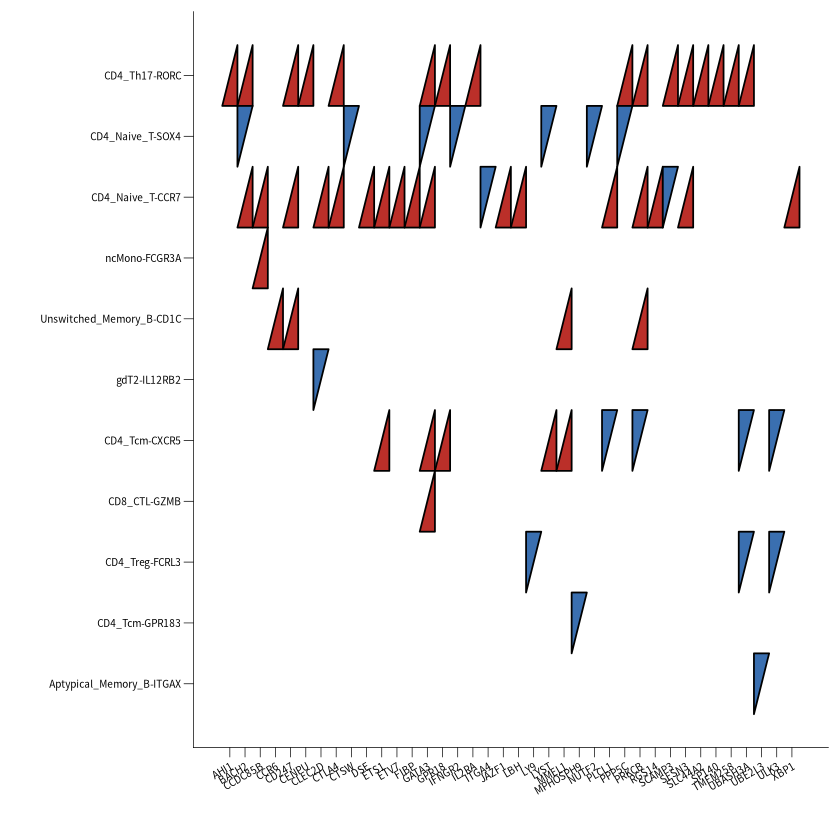

In [29]:
p <- ggplot() +
  geom_polygon(data = triangles, aes(x = x, y = y, group = interaction(id, group), fill = fill), color = "black") +
  scale_fill_identity() +
  scale_x_continuous(breaks = 1:length(all_genes), labels = all_genes) +
  scale_y_continuous(breaks = 1:length(all_celltypes), labels = rev(all_celltypes)) +
   mytheme + labs(x = "", y = "")
p
ggsave('/media/AnalysisDisk2/Yangshichen/0_HIV_RNA/QTL/01.Dynamic/03.Result/plot/p.pdf',p,width = 10,height = 3,limitsize = FALSE)

### DEG/normal eQTL/interaction eQTL共享

#### DEG

In [45]:
# 设置5个目录的路径
dirs <- c("/media/AnalysisDisk2/Yangshichen/0_HIV_RNA/Subcelltype/B/DEG/", 
          "/media/AnalysisDisk2/Yangshichen/0_HIV_RNA/Subcelltype/CD4/DEG/", 
          "/media/AnalysisDisk2/Yangshichen/0_HIV_RNA/Subcelltype/CD8/DEG/", 
          "/media/AnalysisDisk2/Yangshichen/0_HIV_RNA/Subcelltype/Myeloid/DEG/", 
          "/media/AnalysisDisk2/Yangshichen/0_HIV_RNA/Subcelltype/NK/DEG/")

# 初始化空列表保存数据
all_data <- list()

# 遍历每个目录
for (dir in dirs) {
  # 获取该目录下所有匹配文件
  files <- list.files(path = dir, pattern = "_INRs_vs_HDs\\.csv$", full.names = TRUE)
  
  for (file in files) {
    # 读取数据
      df <- read.csv(file)
      df <- subset(df, pvals_adj < 0.05)
      df <- subset(df, abs(logfoldchanges) > 0.58)
    
    # 提取文件名作为 celltype
      filename <- tools::file_path_sans_ext(basename(file))
      celltype <- gsub("_INRs_vs_HDs$", "", filename)
    
    # 添加 celltype 列
      df$celltype <- celltype
    
    # 加入列表
      all_data[[length(all_data) + 1]] <- df
  }
}

# 合并所有数据框
DEG_data <- bind_rows(all_data)
colnames(DEG_data)[1] <- 'phenotype_id'
# 查看结果
DEG_data

phenotype_id scores     logfoldchanges pvals         pvals_adj    
1    FOS          33.096558  1.1398021      3.331023e-240 7.221325e-236
2    FOSB         32.662440  1.9357759      5.335555e-234 5.783475e-230
3    KLF6         28.528278  0.7845707      5.225200e-179 3.775903e-175
4    DUSP1        24.797188  0.8427844      9.613297e-136 5.210167e-132
5    JUN          21.369577  0.6715853      2.564431e-101  1.111886e-97
6    NBEAL1       20.045050  0.6626777       2.229566e-89  8.055793e-86
7    NR4A2        18.351590  1.4077159       3.205928e-75  9.928759e-72
8    MCL1         17.787195  0.6364623       8.881682e-71  2.406825e-67
9    IER2         17.019800  0.7894906       5.856995e-65  1.269738e-61
10   GNLY         16.879173  0.8396218       6.403433e-64  1.262000e-60
11   JUNB         15.251383  0.5815296       1.611819e-52  2.329509e-49
12   RGS1         14.725080  1.6749620       4.449441e-49  5.358857e-46
13   NFKBIA       14.308423  0.8326752       1.938587e-46  2.101332e-43
14   CD69         13.635658  1.0633967       2.457645e-42  2.316491e-39
15   FCRL5        13.586349  1.8306851       4.825621e-42  4.111199e-39
16   CCL5         13.441338  0.6826490       3.461216e-41  2.779100e-38
17   SRGN         12.194201  0.6308981       3.337596e-34  2.261117e-31
18   NACA2        12.105259  0.8054174       9.905634e-34  6.507401e-31
19   RHOB         11.656137  0.8918496       2.135118e-31  1.285756e-28
20   PPP1R15A     11.411445  0.7994475       3.665885e-30  1.892208e-27
21   CD19         10.373991  0.7669830       3.256342e-25  1.502005e-22
22   RGS2         10.060153  0.5951031       8.286935e-24  3.266408e-21
23   MYADM         9.834295  1.5568578       8.012664e-23  2.944179e-20
24   IGHG3         9.801809  0.7848947       1.105864e-22  3.866778e-20
25   SCIMP         9.600761  0.9351556       7.935624e-22  2.567707e-19
26   SCPEP1        9.564176  0.8888667       1.130993e-21  3.553449e-19
27   MPP6          9.530847  1.2425110       1.560051e-21  4.763429e-19
28   FCRL3         9.356473  0.6390427       8.244262e-21  2.448320e-18
29   XAF1          9.004055  0.6616262       2.175316e-19  5.969453e-17
30   SMIM14        8.832370  0.6011706       1.024813e-18  2.644872e-16
⋮    ⋮            ⋮          ⋮              ⋮             ⋮            
9744 PRR5L          4.298599  0.6224044     1.718815e-05  1.558185e-03 
9745 TUBA1C         4.105492  0.8639588     4.034548e-05  3.351148e-03 
9746 NR4A1          4.002398  1.5355983     6.270366e-05  4.943100e-03 
9747 FAM53C         3.971154  0.8294914     7.152519e-05  5.577678e-03 
9748 RGCC           3.916828  1.5565252     8.972165e-05  6.921977e-03 
9749 FKBP5          3.805078  0.8400367     1.417598e-04  1.052470e-02 
9750 ATF3           3.684357  2.9484627     2.292809e-04  1.598257e-02 
9751 NEU1           3.595996  1.1166248     3.231525e-04  2.130487e-02 
9752 ID1            3.359812  1.9004102     7.799565e-04  4.619857e-02 
9753 AGPAT4         3.337270  0.6954913     8.460569e-04  4.917337e-02 
9754 FASLG         -3.362300 -0.8421409     7.729599e-04  4.590959e-02 
9755 EIF1B         -4.085138 -0.6585722     4.405069e-05  3.603679e-03 
9756 PLEKHF1       -4.152238 -0.9902381     3.292393e-05  2.821177e-03 
9757 KCTD10        -4.162159 -0.6498303     3.152524e-05  2.712046e-03 
9758 S1PR1         -4.559540 -0.6138580     5.126577e-06  5.145327e-04 
9759 GIMAP5        -4.573721 -0.6785034     4.791377e-06  4.831268e-04 
9760 EVI2A         -4.746336 -0.5841495     2.071344e-06  2.256516e-04 
9761 THEMIS2       -5.679656 -0.6318769     1.349661e-08  2.151420e-06 
9762 MYOM2         -6.063750 -0.7454748     1.329841e-09  2.306369e-07 
9763 DYNLT1        -6.388300 -0.6814565     1.677393e-10  3.162105e-08 
9764 CDKN1B        -6.885416 -0.6063532     5.761915e-12  1.274618e-09 
9765 ZNF331        -7.014121 -0.9703117     2.313996e-12  5.336716e-10 
9766 NFE2L2        -7.950613 -0.8865080     1.855917e-15  5.437084e-13 
9767 B3GNT7        -8.048262 -1.9288737     8

#### normal eQTL

In [46]:
nor_qtl_data <- read.csv('/media/AnalysisDisk2/Yangshichen/0_HIV_RNA/QTL/01.Dynamic/03.Result/eQTL_all_lead_perm_qvalues_0.05.csv', head =T)
nor_qtl_data <- nor_qtl_data[,-c(1,2)]
nor_qtl_data

phenotype_id num_var beta_shape1 beta_shape2 true_df  pval_true_df
1     B3GALT6      2786    1.053914    226.40132   102.8248 4.783687e-06
2     CPTP         2941    1.067367    255.58499   103.8560 4.989439e-06
3     SLC35E2B     3242    1.057687    297.02002   103.7269 2.671790e-11
4     SLC35E2A     3239    1.047195    300.03436   104.5517 6.324757e-14
5     PLCH2        3710    1.037312    392.35364   107.1216 1.043647e-10
6     C1orf174     4951    1.011741    501.99033   108.7314 2.818547e-09
7     NOL9         3228    1.039611    299.38970   105.9930 1.642073e-06
8     UTS2         2803    1.070726    221.09955   102.3855 4.304970e-17
9     FBXO2        3067    1.067395    284.92276   105.0333 3.317018e-11
10    MTHFR        3177    1.034920    277.53220   106.3075 4.185597e-12
11    CROCC        3731    1.080601    326.90110   104.9232 4.279480e-06
12    PADI4        3861    1.036987    426.88287   107.6927 7.053820e-07
13    EMC1         3798    1.062854    383.67947   106.1662 4.531455e-06
14    NBL1         3807    1.040517    307.92004   103.9622 7.325044e-11
15    PINK1-AS     3126    1.046500    241.90760   104.3648 7.745615e-07
16    NBPF3        3376    1.031207    225.47308   104.1711 3.728577e-09
17    CDC42-AS1    3397    1.036467    194.54184    98.1704 7.819788e-06
18    CDC42        3417    1.072947    240.37250   102.7780 9.790563e-07
19    MDS2         3175    1.024926    182.04480   103.9850 1.599134e-05
20    RCAN3AS      2983    1.041578    201.76399   104.6483 7.747071e-06
21    LDLRAP1      2653    1.025973    184.35033   106.5614 3.360824e-12
22    STX12        1610    1.051211     80.68401   102.2667 2.740719e-05
23    THEMIS2      1709    1.030054     87.43906   104.0759 2.252796e-19
24    RPA2         1736    1.037042     85.73297   102.8431 5.015559e-05
25    AK2          2470    1.057732    152.76984   104.0316 4.300828e-05
26    INPP5B       2463    1.054503    224.36751   104.8769 2.046152e-08
27    HPCAL4       3079    1.060859    164.14740   101.9138 5.613214e-06
28    PPIE         3142    1.049796    164.09040   101.6213 5.973922e-06
29    CC2D1B       2100    1.044589    102.16039   102.8629 6.159871e-05
30    ITGB3BP      3144    1.050676    178.37212   104.1100 4.524178e-12
⋮     ⋮            ⋮       ⋮           ⋮           ⋮        ⋮           
11731 CHKB-DT      2237    1.0207465   154.96070   99.43791 7.117196e-06
11732 FUCA1        2949    0.9880982   155.95276   84.84940 2.446090e-07
11733 CD52         1701    1.0269600    96.52242   83.66239 1.156579e-07
11734 CD55         2455    1.0451459   205.85090   86.37991 8.775155e-08
11735 ERAP2        3362    1.0368938   103.49921   82.58463 7.780439e-14
11736 BTN3A2       2857    1.0383685    90.75875   79.21925 2.340914e-08
11737 SNHG5        3738    1.0445969    77.13940   79.53039 7.749674e-13
11738 CALHM6       2795    1.0467345    86.75944   80.35055 2.131487e-06
11739 CUX1         2978    1.0419344   208.25984   84.99684 4.052884e-07
11740 TMEM176B     4381    1.0113904   336.26532   84.86465 1.130925e-14
11741 RASSF4       3195    1.0513175   134.50282   82.21353 1.185804e-07
11742 ADK          2921    1.0211577    94.53586   82.14523 5.175376e-07
11743 LIPA         3339    1.0442538   175.47560   84.21652 9.375689e-07
11744 SHTN1        3784    1.0153061   341.71870   86.14157 3.272639e-08
11745 LSP1         2492    1.0254927   289.42526   87.17243 1.518186e-07
11746 RIN1         2172    1.0038495    67.55766   77.65004 8.574766e-07
11747 UCP2         1964    1.0243206   103.68524   85.25331 1.644898e-06
11748 SIDT2        4078    1.0621905   371.09662   84.85799 2.131021e-10
11749 TAGLN        4093    1.0339255   333.01030   83.49871 1.215367e-09
11750 CLEC12A      3571    1.0539762   200.86880   83.19815 7.546090e-15
11751 LYZ          2984    1.0474737   191.98720   84.13439 1.650940e-14
11752 IGHA1        1177    0.9877429    79.88494   83.64935 1.166801e-06
11753 NOP10        4123    1.0562593   303.99356   84.97689 4.50

#### inter eQTL

In [47]:
int_qtl_data <- read.csv('/media/AnalysisDisk2/Yangshichen/0_HIV_RNA/QTL/01.Dynamic/03.Result/eQTL_all_lead_inter_2groups_qvalues_0.05.csv', head =T)
int_qtl_data <- int_qtl_data[,-c(1,2)]
int_qtl_data

phenotype_id variant_id         start_distance end_distance af      
1    TRAK1        3_41561975_T_[C]   -451828        -663915      0.404255
2    CLDN15       7_101883499_T_[A]   651406         644679      0.216312
3    FAM167A      8_10819027_C_[T]   -602450        -656881      0.205674
4    CHCHD7       8_55628746_A_[T]   -582941        -590063      0.134752
5    VPS26B       11_133498281_G_[A] -726391        -749507      0.127660
6    CMAS         12_22259290_G_[T]   213071         193616      0.138298
7    PSMD12       17_67736297_A_[C]   398380         369692      0.450355
8    UBE2L3       22_22197535_T_[C]   648087         573501      0.432624
9    KLHL17       1_1595007_A_[G]     634422         629288      0.221831
10   TNFRSF18     1_1089921_C_[T]    -113588        -116671      0.292254
11   TNFRSF4      1_1994025_T_[C]     782698         779872      0.450704
12   SCNN1D       1_914618_G_[A]     -365819        -377411      0.292254
13   MRPL20-AS1   1_1960886_C_[T]     561370         558840      0.112676
14   MORN1        1_3280916_A_[G]     959662         889209      0.281690
15   WRAP73       1_3231589_T_[C]    -399179        -421172      0.140845
16   SMIM1        1_3146001_T_[C]    -626749        -629981      0.183099
17   KCNAB2       1_5586044_G_[T]    -404884        -515149      0.126761
18   THAP3        1_6915161_A_[G]     290292         279575      0.376761
19   RERE-AS1     1_8331191_C_[T]     -93455        -103822      0.169014
20   SLC25A33     1_9283770_T_[C]    -255696        -301403      0.158451
21   UBE4B        1_9660438_T_[C]    -372395        -520801      0.436620
22   TARDBP       1_11431363_T_[C]    419018         400835      0.140845
23   PRDM2        1_13670940_C_[T]    -29249        -154139      0.123239
24   DDI2         1_16481730_G_[C]    864271         812686      0.144366
25   CROCC        1_16575173_C_[T]   -165101        -397791      0.468310
26   RCC2         1_18098517_A_[G]    691756         658840      0.186620
27   EIF4G3       1_20733539_G_[A]    -72754        -443746      0.105634
28   ZNF436       1_22664876_C_[T]   -694573        -704960      0.429577
29   SYF2         1_25534424_G_[A]    312147         301922      0.271127
30   MACO1        1_25934913_C_[A]    504054         434704      0.179577
⋮    ⋮            ⋮                  ⋮              ⋮            ⋮       
3514 TADA3        3_9179715_G_[A]    -600253         -613296     0.124031
3515 TATDN2       3_10472005_C_[T]    223981          190787     0.294574
3516 TAPT1        4_16391060_T_[C]    230554          163650     0.151163
3517 USO1         4_75356797_A_[G]   -367781         -457489     0.414729
3518 ANKHD1       5_141076622_A_[G]   674807          536766     0.108527
3519 ATXN1        6_17245163_G_[A]    946050          483672     0.255814
3520 BTN3A2       6_25379698_C_[T]   -985462         -998622     0.375969
3521 MTCH1        6_37327371_G_[A]    361563          341073     0.166667
3522 MAP3K7       6_90378565_C_[T]   -135009         -208521     0.124031
3523 CYP51A1      7_91507994_G_[C]   -576994         -626809     0.306202
3524 TACC1        8_38592550_A_[G]   -135637         -260478     0.449612
3525 NSMAF        8_59296195_A_[G]    712686          636342     0.445736
3526 TMEM70       8_72977085_C_[A]   -995353        -1005698     0.124031
3527 SNTB1        8_121076248_A_[G]   540502          262975     0.155039
3528 EBLN3P       9_36146918_G_[A]   -932728         -944010     0.143411
3529 PRRC2B       9_131840612_C_[A]   466975          340415     0.139535
3530 UBAC1        9_136535983_T_[G]   603013          574610     0.108527
3531 LCN10        9_137067378_G_[A]   329210          324022     0.112403
3532 TAF3         10_7561142_C_[T]   -257356         -455489     0.151163
3533 CISD1        10_57886896_G_[A]  -382267         -402690     0.162791
3534 FRA10AC1     10_93083778_C_[T]  -584106         -618814     0.151163
3535 ZDHHC13      11_19981469_C_[T]   864369          805047     0.321705
3536 ELK3

#### DEG vs inter eQTL

In [32]:
common_celltypes <- unique(int_qtl_data$celltype)

In [34]:
sub_DEG_data <- subset(DEG_data, celltype %in% common_celltypes)
sub_DEG_data

phenotype_id scores     logfoldchanges pvals         pvals_adj    
1    FOS          33.096558  1.1398021      3.331023e-240 7.221325e-236
2    FOSB         32.662440  1.9357759      5.335555e-234 5.783475e-230
3    KLF6         28.528278  0.7845707      5.225200e-179 3.775903e-175
4    DUSP1        24.797188  0.8427844      9.613297e-136 5.210167e-132
5    JUN          21.369577  0.6715853      2.564431e-101  1.111886e-97
6    NBEAL1       20.045050  0.6626777       2.229566e-89  8.055793e-86
7    NR4A2        18.351590  1.4077159       3.205928e-75  9.928759e-72
8    MCL1         17.787195  0.6364623       8.881682e-71  2.406825e-67
9    IER2         17.019800  0.7894906       5.856995e-65  1.269738e-61
10   GNLY         16.879173  0.8396218       6.403433e-64  1.262000e-60
11   JUNB         15.251383  0.5815296       1.611819e-52  2.329509e-49
12   RGS1         14.725080  1.6749620       4.449441e-49  5.358857e-46
13   NFKBIA       14.308423  0.8326752       1.938587e-46  2.101332e-43
14   CD69         13.635658  1.0633967       2.457645e-42  2.316491e-39
15   FCRL5        13.586349  1.8306851       4.825621e-42  4.111199e-39
16   CCL5         13.441338  0.6826490       3.461216e-41  2.779100e-38
17   SRGN         12.194201  0.6308981       3.337596e-34  2.261117e-31
18   NACA2        12.105259  0.8054174       9.905634e-34  6.507401e-31
19   RHOB         11.656137  0.8918496       2.135118e-31  1.285756e-28
20   PPP1R15A     11.411445  0.7994475       3.665885e-30  1.892208e-27
21   CD19         10.373991  0.7669830       3.256342e-25  1.502005e-22
22   RGS2         10.060153  0.5951031       8.286935e-24  3.266408e-21
23   MYADM         9.834295  1.5568578       8.012664e-23  2.944179e-20
24   IGHG3         9.801809  0.7848947       1.105864e-22  3.866778e-20
25   SCIMP         9.600761  0.9351556       7.935624e-22  2.567707e-19
26   SCPEP1        9.564176  0.8888667       1.130993e-21  3.553449e-19
27   MPP6          9.530847  1.2425110       1.560051e-21  4.763429e-19
28   FCRL3         9.356473  0.6390427       8.244262e-21  2.448320e-18
29   XAF1          9.004055  0.6616262       2.175316e-19  5.969453e-17
30   SMIM14        8.832370  0.6011706       1.024813e-18  2.644872e-16
⋮    ⋮            ⋮          ⋮              ⋮             ⋮            
9292 FADD          -4.141849 -0.6318110      3.445170e-05  4.641879e-04
9293 RTP4          -4.257288 -0.7122291      2.069213e-05  2.888504e-04
9294 MAL           -4.262751 -1.1132975      2.019258e-05  2.824226e-04
9295 RPP38         -4.917534 -0.6816000      8.764100e-07  1.500766e-05
9296 MAFK          -5.624633 -0.9156861      1.859026e-08  3.893897e-07
9297 CCR7          -6.116758 -1.2829214      9.549803e-10  2.262625e-08
9298 DCTN6         -6.254488 -0.6464555      3.988213e-10  9.747516e-09
9299 FEZ1          -6.807149 -0.7011285      9.955152e-12  2.759818e-10
9300 SC5D          -6.863673 -0.8541468      6.711237e-12  1.882185e-10
9301 ZNF595        -7.086854 -0.8050875      1.371949e-12  4.035616e-11
9302 ZNF350        -7.505647 -0.7216402      6.112614e-14  1.963190e-12
9303 TKTL1         -7.832276 -1.0492522      4.791170e-15  1.635713e-13
9304 GTF2B         -8.709864 -0.6025373      3.042410e-18  1.207993e-16
9305 ZYX           -8.849940 -0.5943704      8.756643e-19  3.588568e-17
9306 ZNF331        -9.351930 -0.5858176      8.606265e-21  3.862841e-19
9307 TIMP1         -9.985498 -0.6151248      1.764128e-23  8.914808e-22
9308 IL7R         -11.939106 -0.6171002      7.401472e-33  4.921979e-31
9309 S100B        -12.252788 -1.2491356      1.623188e-34  1.161356e-32
9310 FASLG        -13.517288 -0.8656797      1.236510e-41  1.059538e-39
9311 PLEKHF1      -17.128277 -0.8467158      9.131953e-66  1.171430e-63
9312 CREM         -17.243810 -0.6608590      1.245501e-66  1.646416e-64
9313 S1PR1        -17.451525 -0.7435536      3.351624e-68  4.569802e-66
9314 GIMAP5       -17.768795 -0.7420648      1.233098e-70  1.782156e-68
9315 B3GNT7       -19.191946 -1.5660547      

In [36]:
result_list <- lapply(common_celltypes, function(ct) {
  genes1 <- int_qtl_data %>% filter(celltype == ct) %>% pull(phenotype_id)
  genes2 <- sub_DEG_data %>% filter(celltype == ct) %>% pull(phenotype_id)
  
  shared_genes <- Reduce(intersect, list(genes1, genes2))
  
    if (length(shared_genes) > 0) {
    return(data.frame(celltype = ct, phenotype_id = shared_genes))
  } else {
    return(NULL)
  }
})

In [37]:
shared_df <- bind_rows(result_list)
shared_df
write.csv(shared_df,'/media/AnalysisDisk2/Yangshichen/0_HIV_RNA/QTL/01.Dynamic/03.Result/shareQTL/DEGs_inter_eQTL.csv')

celltype         phenotype_id
1  CD4_Naive_T-CCR7 CD8A        
2  CD4_Naive_T-CCR7 SLC40A1     
3  CD4_Naive_T-CCR7 FADD        
4  CD4_Naive_T-CCR7 DSC1        
5  CD4_Naive_T-CCR7 MYO1F       
6  CD4_Naive_T-CCR7 ZNF134      
7  CD4_Naive_T-CCR7 OSER1       
8  CD4_Naive_T-SOX4 RGS2        
9  CD4_Naive_T-SOX4 MRFAP1L1    
10 CD4_Tcm-CXCR5    PLCL1       
11 CD4_Tcm-CXCR5    CARD19      
12 CD4_Tcm-GPR183   IREB2       
13 CD4_Tcm-GPR183   ARRDC2      
14 CD4_Tcm-IFIT3    NR4A2       
15 CD4_Tcm-IFIT3    GZMK        
16 CD4_Tcm-SOX4     CD8A        
17 CD4_Tcm-SOX4     POLR2J3     
18 CD4_Tcm-SOX4     SETDB2      
19 CD4_Tcm-SOX4     RGS19       
20 CD4_Th-TNFRSF11A DNAAF2      
21 CD4_Th-TNFRSF11A ADGRG1      
22 CD4_Th1-GZMK     CD69        
23 CD4_Th1-GZMK     PMAIP1      
24 CD4_Treg-FCRL3   CD84        
25 CD4_Treg-FCRL3   TNFSF10     
26 CD4_Treg-FCRL3   DCTN6       
27 CD4_Treg-FCRL3   ZNF101

#### DEG vs inter eQTL vs normal eQTL

In [48]:
common_celltypes <- unique(nor_qtl_data$celltype)

In [49]:
sub_DEG_data <- subset(DEG_data, celltype %in% common_celltypes)
sub_DEG_data

phenotype_id scores     logfoldchanges pvals         pvals_adj    
1    FOS          33.096558  1.1398021      3.331023e-240 7.221325e-236
2    FOSB         32.662440  1.9357759      5.335555e-234 5.783475e-230
3    KLF6         28.528278  0.7845707      5.225200e-179 3.775903e-175
4    DUSP1        24.797188  0.8427844      9.613297e-136 5.210167e-132
5    JUN          21.369577  0.6715853      2.564431e-101  1.111886e-97
6    NBEAL1       20.045050  0.6626777       2.229566e-89  8.055793e-86
7    NR4A2        18.351590  1.4077159       3.205928e-75  9.928759e-72
8    MCL1         17.787195  0.6364623       8.881682e-71  2.406825e-67
9    IER2         17.019800  0.7894906       5.856995e-65  1.269738e-61
10   GNLY         16.879173  0.8396218       6.403433e-64  1.262000e-60
11   JUNB         15.251383  0.5815296       1.611819e-52  2.329509e-49
12   RGS1         14.725080  1.6749620       4.449441e-49  5.358857e-46
13   NFKBIA       14.308423  0.8326752       1.938587e-46  2.101332e-43
14   CD69         13.635658  1.0633967       2.457645e-42  2.316491e-39
15   FCRL5        13.586349  1.8306851       4.825621e-42  4.111199e-39
16   CCL5         13.441338  0.6826490       3.461216e-41  2.779100e-38
17   SRGN         12.194201  0.6308981       3.337596e-34  2.261117e-31
18   NACA2        12.105259  0.8054174       9.905634e-34  6.507401e-31
19   RHOB         11.656137  0.8918496       2.135118e-31  1.285756e-28
20   PPP1R15A     11.411445  0.7994475       3.665885e-30  1.892208e-27
21   CD19         10.373991  0.7669830       3.256342e-25  1.502005e-22
22   RGS2         10.060153  0.5951031       8.286935e-24  3.266408e-21
23   MYADM         9.834295  1.5568578       8.012664e-23  2.944179e-20
24   IGHG3         9.801809  0.7848947       1.105864e-22  3.866778e-20
25   SCIMP         9.600761  0.9351556       7.935624e-22  2.567707e-19
26   SCPEP1        9.564176  0.8888667       1.130993e-21  3.553449e-19
27   MPP6          9.530847  1.2425110       1.560051e-21  4.763429e-19
28   FCRL3         9.356473  0.6390427       8.244262e-21  2.448320e-18
29   XAF1          9.004055  0.6616262       2.175316e-19  5.969453e-17
30   SMIM14        8.832370  0.6011706       1.024813e-18  2.644872e-16
⋮    ⋮            ⋮          ⋮              ⋮             ⋮            
9744 PRR5L          4.298599  0.6224044     1.718815e-05  1.558185e-03 
9745 TUBA1C         4.105492  0.8639588     4.034548e-05  3.351148e-03 
9746 NR4A1          4.002398  1.5355983     6.270366e-05  4.943100e-03 
9747 FAM53C         3.971154  0.8294914     7.152519e-05  5.577678e-03 
9748 RGCC           3.916828  1.5565252     8.972165e-05  6.921977e-03 
9749 FKBP5          3.805078  0.8400367     1.417598e-04  1.052470e-02 
9750 ATF3           3.684357  2.9484627     2.292809e-04  1.598257e-02 
9751 NEU1           3.595996  1.1166248     3.231525e-04  2.130487e-02 
9752 ID1            3.359812  1.9004102     7.799565e-04  4.619857e-02 
9753 AGPAT4         3.337270  0.6954913     8.460569e-04  4.917337e-02 
9754 FASLG         -3.362300 -0.8421409     7.729599e-04  4.590959e-02 
9755 EIF1B         -4.085138 -0.6585722     4.405069e-05  3.603679e-03 
9756 PLEKHF1       -4.152238 -0.9902381     3.292393e-05  2.821177e-03 
9757 KCTD10        -4.162159 -0.6498303     3.152524e-05  2.712046e-03 
9758 S1PR1         -4.559540 -0.6138580     5.126577e-06  5.145327e-04 
9759 GIMAP5        -4.573721 -0.6785034     4.791377e-06  4.831268e-04 
9760 EVI2A         -4.746336 -0.5841495     2.071344e-06  2.256516e-04 
9761 THEMIS2       -5.679656 -0.6318769     1.349661e-08  2.151420e-06 
9762 MYOM2         -6.063750 -0.7454748     1.329841e-09  2.306369e-07 
9763 DYNLT1        -6.388300 -0.6814565     1.677393e-10  3.162105e-08 
9764 CDKN1B        -6.885416 -0.6063532     5.761915e-12  1.274618e-09 
9765 ZNF331        -7.014121 -0.9703117     2.313996e-12  5.336716e-10 
9766 NFE2L2        -7.950613 -0.8865080     1.855917e-15  5.437084e-13 
9767 B3GNT7        -8.048262 -1.9288737     8

In [50]:
result_list <- lapply(common_celltypes, function(ct) {
  genes1 <- int_qtl_data %>% filter(celltype == ct) %>% pull(phenotype_id)
  #genes2 <- sub_DEG_data %>% filter(celltype == ct) %>% pull(phenotype_id)
  genes3 <- nor_qtl_data %>% filter(celltype == ct) %>% pull(phenotype_id)
  
  shared_genes <- Reduce(intersect, list(genes1,genes3))
  
    if (length(shared_genes) > 0) {
    return(data.frame(celltype = ct, phenotype_id = shared_genes))
  } else {
    return(NULL)
  }
})

In [51]:
shared_df <- bind_rows(result_list)
shared_df

celltype                 phenotype_id
1  CD8_Naive_T-CCR7         ULK4        
2  CD8_Naive_T-CCR7         LPIN2       
3  Aptypical_Memory_B-ITGAX FAM167A     
4  CD4_Naive_T-CCR7         ZNF436      
5  CD4_Naive_T-CCR7         PAFAH2      
6  CD4_Naive_T-CCR7         RWDD3       
7  CD4_Naive_T-CCR7         CDC42SE1    
8  CD4_Naive_T-CCR7         SCAMP3      
9  CD4_Naive_T-CCR7         CSRP1       
10 CD4_Naive_T-CCR7         C2orf27A    
11 CD4_Naive_T-CCR7         B4GALT4     
12 CD4_Naive_T-CCR7         TIPARP-AS1  
13 CD4_Naive_T-CCR7         SLC38A9     
14 CD4_Naive_T-CCR7         CENPK       
15 CD4_Naive_T-CCR7         PPWD1       
16 CD4_Naive_T-CCR7         BTN3A2      
17 CD4_Naive_T-CCR7         RUNX2       
18 CD4_Naive_T-CCR7         KCNQ5       
19 CD4_Naive_T-CCR7         MYO6        
20 CD4_Naive_T-CCR7         WEE2-AS1    
21 CD4_Naive_T-CCR7         SAMD12      
22 CD4_Naive_T-CCR7         ENDOG       
23 CD4_Naive_T-CCR7         DBH-AS1     
24 CD4_Naive_T-CCR7         DENND10     
25 CD4_Naive_T-CCR7         TRIM34      
26 CD4_Naive_T-CCR7         IGHMBP2     
27 CD4_Naive_T-CCR7         CAND1       
28 CD4_Naive_T-CCR7         POLR1D      
29 CD4_Naive_T-CCR7         GGACT       
30 CD4_Naive_T-CCR7         CARS2       
⋮  ⋮                        ⋮           
53 CD4_Tcm-CXCR5            BTN3A2      
54 CD4_Tcm-CXCR5            ZC3H12D     
55 CD4_Tcm-CXCR5            HACD4       
56 CD4_Tcm-CXCR5            NUTM2B-AS1  
57 CD4_Tcm-CXCR5            BANF1       
58 CD4_Tcm-CXCR5            ZNF26       
59 CD4_Tcm-CXCR5            GGACT       
60 CD4_Tcm-CXCR5            EXOSC6      
61 CD4_Tcm-CXCR5            TTC39C-AS1  
62 CD4_Tcm-CXCR5            ZNF844      
63 CD4_Tcm-CXCR5            DMPK        
64 CD4_Tcm-CXCR5            UBASH3A     
65 CD4_Tcm-SOX4             CENPK       
66 CD4_Tcm-SOX4             ADTRP       
67 CD4_Tem-CCR7neg          FAM118A     
68 CD4_Tfh_like-CXCR5       BTN3A2      
69 CD4_Tfh_like-CXCR5       PTPRN2      
70 CD4_Th-TNFRSF11A         BTN3A2      
71 CD4_Th-TNFRSF11A         TTC9C       
72 CD4_Th-TNFRSF11A         TCFL5       
73 CD4_Treg-FCRL3           SNX25       
74 CD4_Treg-FCRL3           BTN3A2      
75 CD4_Treg-FCRL3           ZNF26       
76 CD4_Treg-FCRL3           DCTN5       
77 CD4_Treg-FCRL3           BRD7        
78 NKT-NCR1                 FLVCR1-DT   
79 Unswitched_Memory_B-JAM3 BTN3A2      
80 CD8_Tem-GZMK             FAM43A      
81 Mature_NK_dim-FCGR3A     CPQ         
82 Mature_NK_dim-FCGR3A     CCT8

### inter eQTL vs inter caQTL

In [3]:
int_eqtl_data <- read.csv('/media/AnalysisDisk2/Yangshichen/0_HIV_RNA/QTL/01.Dynamic/03.Result/eQTL_all_lead_inter_2groups_qvalues_0.05.csv', head =T)
int_caqtl_data <- read.csv('/media/AnalysisDisk2/Yangshichen/0_HIV_RNA/QTL/01.Dynamic/03.Result/caQTL_all_lead_inter_2groups_qvalues_0.05.csv', head =T)
colnames(int_caqtl_data)[28] <- 'phenotype_id'

In [4]:
common_celltypes <- unique(int_caqtl_data$celltype)
common_celltypes

[1] "CD4_Naive_T-CCR7"         "CD4_Tcm-CXCR5"           
 [3] "CD4_Tfh_like-CXCR5"       "CD4_Th17-RORC"           
 [5] "CD4_Th22-CCR10"           "CD4_Treg-FCRL3"          
 [7] "CD4_Treg-FOXP3"           "CD8_CTL-GZMB"            
 [9] "CD8_Naive_T-CCR7"         "CD8_Tcm-GZMK"            
[11] "cMono-IFI44L"             "MAIT-SLC4A10"            
[13] "Naive_B-TCL1A"            "ncMono-FCGR3A"           
[15] "NK_bright-XCL1"           "Switched_Memory_B-CD27"  
[17] "Switched_Memory_B-CD86"   "Unswitched_Memory_B-CD1C"

In [5]:
int_eqtl_data_sub <- int_eqtl_data[int_eqtl_data$celltype %in% common_celltypes, ]
int_eqtl_data_sub

X.1    X      phenotype_id variant_id         start_distance end_distance
9    7095   7095   KLHL17       1_1595007_A_[G]     634422          629288    
10   7099   7099   TNFRSF18     1_1089921_C_[T]    -113588         -116671    
11   7100   7100   TNFRSF4      1_1994025_T_[C]     782698          779872    
12   7104   7104   SCNN1D       1_914618_G_[A]     -365819         -377411    
13   7112   7112   MRPL20-AS1   1_1960886_C_[T]     561370          558840    
14   7129   7129   MORN1        1_3280916_A_[G]     959662          889209    
15   7140   7140   WRAP73       1_3231589_T_[C]    -399179         -421172    
16   7141   7141   SMIM1        1_3146001_T_[C]    -626749         -629981    
17   7147   7147   KCNAB2       1_5586044_G_[T]    -404884         -515149    
18   7156   7156   THAP3        1_6915161_A_[G]     290292          279575    
19   7164   7164   RERE-AS1     1_8331191_C_[T]     -93455         -103822    
20   7170   7170   SLC25A33     1_9283770_T_[C]    -255696         -301403    
21   7177   7177   UBE4B        1_9660438_T_[C]    -372395         -520801    
22   7184   7184   TARDBP       1_11431363_T_[C]    419018          400835    
23   7204   7204   PRDM2        1_13670940_C_[T]    -29249         -154139    
24   7209   7209   DDI2         1_16481730_G_[C]    864271          812686    
25   7219   7219   CROCC        1_16575173_C_[T]   -165101         -397791    
26   7223   7223   RCC2         1_18098517_A_[G]    691756          658840    
27   7242   7242   EIF4G3       1_20733539_G_[A]    -72754         -443746    
28   7252   7252   ZNF436       1_22664876_C_[T]   -694573         -704960    
29   7274   7274   SYF2         1_25534424_G_[A]    312147          301922    
30   7277   7277   MACO1        1_25934913_C_[A]    504054          434704    
31   7284   7284   PAFAH2       1_25934913_C_[A]    -24855          -63204    
32   7316   7316   EYA3         1_27066336_G_[C]   -904009        -1022301    
33   7334   7334   MATN1-AS1    1_31453662_T_[C]    735157          726835    
34   7336   7336   PUM1         1_30120508_G_[A]   -810999         -945483    
35   7361   7361   ZNF362       1_33964977_C_[T]    708484          664258    
36   7371   7371   PSMB2        1_35135409_A_[G]   -464133         -506117    
37   7380   7380   STK40        1_36649497_A_[T]    309872          263573    
38   7409   7409   ZFP69B       1_41365689_C_[G]    915586          901971    
⋮    ⋮      ⋮      ⋮            ⋮                  ⋮              ⋮           
3436 206083 206083 ATP5PD       17_75065294_T_[G]    26430           18309    
3464 256083 256083 NIPAL3       1_25173711_A_[T]    757908          700735    
3465 256530 256530 PDE4DIP      1_147909431_A_[G]  -898710        -1138855    
3466 256962 256962 SDCCAG8      1_242749101_G_[A]  -506934         -750990    
3467 261766 261766 FCHSD2       11_72615166_G_[A]  -221580         -527152    
3468 262946 262946 SLC39A9      14_70213181_T_[G]   815165          750791    
3469 263583 263583 USP7         16_8338980_G_[A]   -553118         -636348    
3470 264798 264798 SPPL2B       19_2724809_G_[A]    396193          369714    
3471 265664 265664 CST3         20_23178868_C_[A]  -447839         -459605    
3472 272806 272806 HAT1         2_172052348_C_[T]   129899           68662    
3473 274136 274136 SIL1         5_139572988_A_[C]   626263          279431    
3474 280359 280359 ATP5PF       21_25894824_T_[C]   178320          159151    
3478 318942 318942 PXK          3_58247402_T_[C]    -85479         -178725    
3479 319610 319610 SLC25A46     5_111032802_T_[C]   294665          267641    
3480 320916 320916 EBLN3P       9_36146918_G_[A]   -932728         -944010    
3481 321066 321066 COQ4         9_129083737_C_[G]   761192          749665    
3482 321123 321123 SNAPC4       9_137175917_A_[G]   800349          775741    
3483 322792 322792 SNHG14       15_26265434_G_[T]  1286850          845098    
3493 360938 360938 COA6         1_234609263_A_[G]   235

In [6]:
int_caqtl_data_sub <- int_caqtl_data[int_caqtl_data$celltype %in% common_celltypes, ]
int_caqtl_data_sub

X.1  X      chr   start    end      variant_id        start_distance
1     1     6    chr1   923623   924124  1_879115_C_[A]     -44509       
2     2     7    chr1   959080   959581  1_1653319_G_[A]    694238       
3     3     8    chr1   960331   960832  1_878714_A_[G]     -81618       
4     4    12    chr1   999920  1000421  1_974039_C_[T]     -25882       
5     5    16    chr1  1014244  1014745  1_1130056_G_[A]    115811       
6     6    21    chr1  1137227  1137728  1_1660408_T_[C]    523180       
7     7    23    chr1  1173631  1174132  1_1373006_A_[G]    199374       
8     8    23    chr1  1173631  1174132  1_1373006_A_[G]    199374       
9     9    29    chr1  1299948  1300449  1_995153_C_[G]    -304796       
10   10    34    chr1  1349168  1349669  1_1653319_G_[A]    304150       
11   11    35    chr1  1359214  1359715  1_1363602_C_[T]      4387       
12   12    38    chr1  1407071  1407572  1_2398369_G_[A]    991297       
13   13    45    chr1  1615142  1615643  1_2416137_G_[T]    800994       
14   14    46    chr1  1615920  1616421  1_1650777_G_[A]     34856       
15   15    51    chr1  1677773  1678274  1_2218243_T_[C]    540469       
16   16    65    chr1  2152885  2153386  1_2303193_G_[A]    150307       
17   17    78    chr1  2240199  2240700  1_1774721_G_[A]   -465479       
18   18    88    chr1  2381676  2382177  1_3199797_G_[T]    818120       
19   19    92    chr1  2523854  2524355  1_2435078_G_[A]    -88777       
20   20   107    chr1  3624628  3625129  1_3573255_A_[G]    -51374       
21   21   111    chr1  3772354  3772855  1_3195714_G_[A]   -576641       
22   22   122    chr1  6026954  6027455  1_5842307_C_[A]   -184648       
23   23   130    chr1  6244991  6245492  1_6269955_T_[C]     24963       
24   24   148    chr1  6475428  6475929  1_7112129_G_[A]    636700       
25   25   160    chr1  6612549  6613050  1_7116619_G_[T]    504069       
26   26   187    chr1  8397477  8397978  1_7473104_G_[A]   -924374       
27   27   190    chr1  8422696  8423197  1_8140630_A_[G]   -282067       
28   28   205    chr1  8560984  8561485  1_7590651_A_[G]   -970334       
29   29   215    chr1  8946413  8946914  1_9336876_C_[T]    390462       
30   30   219    chr1  9005046  9005547  1_9465176_A_[G]    460129       
⋮    ⋮    ⋮      ⋮     ⋮        ⋮        ⋮                 ⋮             
7316 7316 747790 chr19 50835909 50836410 19_50756355_T_[C]  -79555       
7317 7317 747845 chr19 53254665 53255166 19_52631103_T_[C] -623563       
7318 7318 747886 chr19 54624898 54625399 19_53666443_T_[G] -958456       
7319 7319 747887 chr19 54937851 54938352 19_55149131_A_[G]  211279       
7320 7320 748025 chr20   298732   299233 20_940688_G_[C]    641955       
7321 7321 748190 chr20 19658132 19658633 20_19431504_C_[T] -226629       
7322 7322 748211 chr20 23357966 23358467 20_23878078_T_[A]  520111       
7323 7323 748374 chr20 36604850 36605351 20_36805743_T_[C]  200892       
7324 7324 748461 chr20 44210186 44210687 20_44806772_T_[C]  596585       
7325 7325 748486 chr20 44969489 44969990 20_45514028_G_[A]  544538       
7326 7326 748499 chr20 45432270 45432771 20_45342902_T_[C]  -89369       
7327 7327 748528 chr20 47272753 47273254 20_47974363_T_[C]  701609       
7328 7328 748613 chr20 50810846 50811347 20_50042445_T_[C] -768402       
7329 7329 748662 chr20 57398191 57398692 20_57455576_G_[A]   57384       
7330 7330 748676 chr20 57708738 57709239 20_57095445_T_[C] -613294       
7331 7331 748705 chr20 59207690 59208191 20_59727136_G_[A]  519445       
7332 7332 748783 chr20 64057700 64058201 20_63589896_A_[G] -467805       
7333 7333 748813 chr21 14901624 14902125 21_14222790_C_[T] -678835       
7334 7334 748880 chr21 33215493 33215994 21_33005286_A_[G] -210208       
7335 7335 748891 chr21 33308852 33309353 21_33874805_C_[T]  565952       
7336 7336 749180 chr22 19891464 19891965 22_20419421_C_[T]  527956       
7337 7337 749276 chr22 23180239 23180740 22_22680047_C_[T] -500193       
7338 7338

In [8]:
result_list <- lapply(common_celltypes, function(ct) {
  genes1 <- int_eqtl_data_sub %>% filter(celltype == ct) %>% pull(phenotype_id)
  genes2 <- int_caqtl_data_sub %>% filter(celltype == ct) %>% pull(phenotype_id)
  
  shared_genes <- Reduce(intersect, list(genes1, genes2))
  
    if (length(shared_genes) > 0) {
    return(data.frame(celltype = ct, phenotype_id = shared_genes))
  } else {
    return(NULL)
  }
})

In [9]:
shared_df <- bind_rows(result_list)
shared_df
write.csv(shared_df,'/media/AnalysisDisk2/Yangshichen/0_HIV_RNA/QTL/01.Dynamic/03.Result/shareQTL/inter_eQTL_inter_caQTL.csv')

celltype         phenotype_id
1   CD4_Naive_T-CCR7 KLHL17      
2   CD4_Naive_T-CCR7 MORN1       
3   CD4_Naive_T-CCR7 SMIM1       
4   CD4_Naive_T-CCR7 KCNAB2      
5   CD4_Naive_T-CCR7 SLC25A33    
6   CD4_Naive_T-CCR7 PRDM2       
7   CD4_Naive_T-CCR7 RCC2        
8   CD4_Naive_T-CCR7 EIF4G3      
9   CD4_Naive_T-CCR7 EYA3        
10  CD4_Naive_T-CCR7 ZFP69B      
11  CD4_Naive_T-CCR7 FGGY        
12  CD4_Naive_T-CCR7 ABCD3       
13  CD4_Naive_T-CCR7 ST7L        
14  CD4_Naive_T-CCR7 SHC1        
15  CD4_Naive_T-CCR7 SFT2D2      
16  CD4_Naive_T-CCR7 CR2         
17  CD4_Naive_T-CCR7 IARS2       
18  CD4_Naive_T-CCR7 FAM98A      
19  CD4_Naive_T-CCR7 FBXO11      
20  CD4_Naive_T-CCR7 CEP68       
21  CD4_Naive_T-CCR7 EIF2AK3     
22  CD4_Naive_T-CCR7 MGAT5       
23  CD4_Naive_T-CCR7 PRKRA       
24  CD4_Naive_T-CCR7 WDR75       
25  CD4_Naive_T-CCR7 NAB1        
26  CD4_Naive_T-CCR7 SPATS2L     
27  CD4_Naive_T-CCR7 AGFG1       
28  CD4_Naive_T-CCR7 KBTBD8      
29  CD4_Naive_T-CCR7 UBA3        
30  CD4_Naive_T-CCR7 B4GALT4     
⋮   ⋮                ⋮           
148 CD4_Naive_T-CCR7 KIZ         
149 CD4_Naive_T-CCR7 SYS1        
150 CD4_Naive_T-CCR7 ELMO2       
151 CD4_Naive_T-CCR7 PARD6B      
152 CD4_Naive_T-CCR7 CRYZL1      
153 CD4_Naive_T-CCR7 TRAPPC10    
154 CD4_Naive_T-CCR7 MICAL3      
155 CD4_Naive_T-CCR7 TPST2       
156 CD4_Naive_T-CCR7 MCAT        
157 CD4_Tcm-CXCR5    FLVCR1-DT   
158 CD4_Tcm-CXCR5    RALB        
159 CD4_Tcm-CXCR5    ZBTB38      
160 CD4_Tcm-CXCR5    UQCC2       
161 CD4_Tcm-CXCR5    CCDC107     
162 CD4_Tcm-CXCR5    TYSND1      
163 CD4_Tcm-CXCR5    RBM19       
164 CD4_Th17-RORC    TDP2        
165 CD4_Th17-RORC    ACTR3B      
166 CD4_Th17-RORC    CDC37L1-DT  
167 CD4_Th17-RORC    SEPHS1      
168 CD4_Th17-RORC    GLUD1       
169 CD4_Th17-RORC    PTEN        
170 CD4_Th17-RORC    ZFYVE27     
171 CD4_Th17-RORC    BIN2        
172 CD4_Th17-RORC    ZBTB1       
173 CD4_Th17-RORC    MBTPS1      
174 CD4_Th17-RORC    BCAS4       
175 CD4_Th17-RORC    MIR155HG    
176 CD4_Th17-RORC    PRR14L      
177 CD4_Treg-FCRL3   RCL1

### normal eQTL vs normal caQTL

In [10]:
nor_eqtl_data <- read.csv('/media/AnalysisDisk2/Yangshichen/0_HIV_RNA/QTL/01.Dynamic/03.Result/eQTL_all_lead_perm_qvalues_0.05.csv', head =T)
colnames(nor_eqtl_data)[3] <- 'SYMBOL'
nor_caqtl_data <- read.csv('/media/AnalysisDisk2/Yangshichen/0_HIV_RNA/QTL/01.Dynamic/03.Result/caQTL_all_lead_perm_qvalues_0.05.csv', head =T)

In [11]:
common_celltypes <- unique(nor_caqtl_data$celltype)
common_celltypes

[1] "cMono-IFI44L"             "Aptypical_Memory_B-ITGAX"
 [3] "CD4_Naive_T-CCR7"         "CD4_Tcm-CXCR5"           
 [5] "CD4_Tcm-GPR183"           "CD4_Tem-CCR7neg"         
 [7] "CD4_Tfh_like-CXCR5"       "CD4_Th-TNFRSF11A"        
 [9] "CD4_Th17-RORC"            "CD4_Th22-CCR10"          
[11] "CD4_Treg-FCRL3"           "CD4_Treg-FOXP3"          
[13] "CD8_CTL-GZMB"             "CD8_Naive_T-CCR7"        
[15] "CD8_Tcm-GZMK"             "CD8_Tem-GZMK"            
[17] "cDC2-CD1C"                "cMono-CD14"              
[19] "gdT2-GZMH"                "MAIT-SLC4A10"            
[21] "Mature_NK_dim-FCGR3A"     "Naive_B-TCL1A"           
[23] "ncMono-FCGR3A"            "ncMono-IFI44L"           
[25] "ncMono-IFIT1"             "NKT-NCR1"                
[27] "NK_bright-XCL1"           "pDC-LILRA4"              
[29] "Switched_Memory_B-CD27"   "Switched_Memory_B-CD86"  
[31] "Unswitched_Memory_B-CD1C"

In [12]:
nor_eqtl_data_sub <- nor_eqtl_data[nor_eqtl_data$celltype %in% common_celltypes, ]
nor_eqtl_data_sub

X      X.1    SYMBOL    num_var beta_shape1 beta_shape2 true_df  
1      10      9    B3GALT6   2786    1.053914    226.40132   102.8248 
2      16     15    CPTP      2941    1.067367    255.58499   103.8560 
3      30     29    SLC35E2B  3242    1.057687    297.02002   103.7269 
4      32     31    SLC35E2A  3239    1.047195    300.03436   104.5517 
5      43     42    PLCH2     3710    1.037312    392.35364   107.1216 
6      57     56    C1orf174  4951    1.011741    501.99033   108.7314 
7      65     64    NOL9      3228    1.039611    299.38970   105.9930 
8      74     73    UTS2      2803    1.070726    221.09955   102.3855 
9     103    102    FBXO2     3067    1.067395    284.92276   105.0333 
10    109    108    MTHFR     3177    1.034920    277.53220   106.3075 
11    137    136    CROCC     3731    1.080601    326.90110   104.9232 
12    140    139    PADI4     3861    1.036987    426.88287   107.6927 
13    146    145    EMC1      3798    1.062854    383.67947   106.1662 
14    152    151    NBL1      3807    1.040517    307.92004   103.9622 
15    158    157    PINK1-AS  3126    1.046500    241.90760   104.3648 
16    163    162    NBPF3     3376    1.031207    225.47308   104.1711 
17    166    165    CDC42-AS1 3397    1.036467    194.54184    98.1704 
18    167    166    CDC42     3417    1.072947    240.37250   102.7780 
19    176    175    MDS2      3175    1.024926    182.04480   103.9850 
20    190    189    RCAN3AS   2983    1.041578    201.76399   104.6483 
21    200    199    LDLRAP1   2653    1.025973    184.35033   106.5614 
22    234    233    STX12     1610    1.051211     80.68401   102.2667 
23    236    235    THEMIS2   1709    1.030054     87.43906   104.0759 
24    237    236    RPA2      1736    1.037042     85.73297   102.8431 
25    283    282    AK2       2470    1.057732    152.76984   104.0316 
26    320    319    INPP5B    2463    1.054503    224.36751   104.8769 
27    330    329    HPCAL4    3079    1.060859    164.14740   101.9138 
28    331    330    PPIE      3142    1.049796    164.09040   101.6213 
29    421    420    CC2D1B    2100    1.044589    102.16039   102.8629 
30    461    460    ITGB3BP   3144    1.050676    178.37212   104.1100 
⋮     ⋮      ⋮      ⋮         ⋮       ⋮           ⋮           ⋮        
11702 382878 382877 TMEM50B   2320    1.031260    175.0784    105.98309
11703 382886 382885 SLC5A3    2596    1.062644    198.4202    103.76247
11704 382894 382893 MORC3     3878    1.045972    186.0366    104.81751
11705 382898 382897 TTC3      3753    1.053528    239.8980    105.68314
11706 382917 382916 PKNOX1    3493    1.033690    313.6441    107.23383
11707 382918 382917 U2AF1     3370    1.061427    259.3462    104.62543
11708 382921 382920 CSTB      3094    1.061856    200.5356    101.16138
11709 382940 382939 LSS       2681    1.065723    158.5354    102.63959
11710 382943 382942 YBEY      2399    1.030034    159.8566    105.01881
11711 382944 382943 C21orf58  2373    1.044007    156.4585    104.35661
11712 382946 382945 DIP2A     2058    1.015442    112.6740    103.43288
11713 382983 382982 THAP7-AS1 2510    1.031250    235.9835    105.65276
11714 383007 383006 IGLC1     3436    1.029122    279.5887    106.52091
11715 383010 383009 IGLC3     3421    1.041956    290.2690    107.40274
11716 383011 383010 IGLC6     3401    1.016031    278.7063    107.01533
11717 383012 383011 IGLC7     3399    1.024105    243.3283    103.69237
11718 383026 383025 DDT       2505    1.065532    195.0963    103.94413
11719 383031 383030 SNRPD3    3369    1.019789    337.6058    108.23230
11720 383037 383036 TFIP11    3779    1.054439    464.2895    106.27427
11721 383082 383081 LARGE1    5324    1.038932    341.7917    106.17912
11722 383101 383100 C1QTNF6   3196    1.057615    233.2338    102.16613
11723 383133 383132 SYNGR1    1868    1.027096    129.4154    102.63305
11724 383166 383165 SMDT1     2266    1.054153     96.1225     98.98343
11725 383169 383168 RRP7A     2510    1.047781

In [13]:
nor_caqtl_data_sub <- nor_caqtl_data[nor_caqtl_data$celltype %in% common_celltypes, ]
nor_caqtl_data_sub

X.1    X      phenotype_id            num_var beta_shape1 beta_shape2
1       2      1    chr1:817103-817604      1957    1.0329543   188.4632   
2      30     29    chr1:1658882-1659383    3242    1.0730687   287.7875   
3      32     31    chr1:1692584-1693085    3242    1.0450348   303.4425   
4      33     32    chr1:1724171-1724672    3242    1.0405096   296.7527   
5      34     33    chr1:1764189-1764690    3240    1.0743599   272.5999   
6      38     37    chr1:1857057-1857558    3235    1.0227611   286.3811   
7      42     41    chr1:1891422-1891923    3244    1.0498594   280.9087   
8     161    160    chr1:8424521-8425022    3026    1.0864522   302.1380   
9     186    185    chr1:9067156-9067657    2639    1.0161358   262.9184   
10    193    192    chr1:9162759-9163260    2524    1.0279980   258.9146   
11    273    272    chr1:11749092-11749593  3104    1.0417027   271.7674   
12    292    291    chr1:11985786-11986287  3315    1.0553483   233.0790   
13    324    323    chr1:12601893-12602394  3186    0.9935937   258.5736   
14    328    327    chr1:13593742-13594243  3983    1.0524247   335.8488   
15    344    343    chr1:15260573-15261074  3146    1.0123768   308.7281   
16    365    364    chr1:15514951-15515452  2880    1.0292000   272.2722   
17    388    387    chr1:15966001-15966502  2941    1.0308325   254.1428   
18    415    414    chr1:16444296-16444797  3056    1.0269940   211.7473   
19    420    419    chr1:16889274-16889775  3429    1.0125209   286.5430   
20    421    420    chr1:16895454-16895955  3443    1.0458037   305.8444   
21    422    421    chr1:16895983-16896484  3442    1.0331169   289.6155   
22    425    424    chr1:16904669-16905170  3449    1.0404680   310.4796   
23    426    425    chr1:16905185-16905686  3449    1.0557368   299.7918   
24    436    435    chr1:17098392-17098893  3572    0.9825974   261.0913   
25    449    448    chr1:17393179-17393680  3836    1.0036156   387.4511   
26    450    449    chr1:17398248-17398749  3853    1.0176623   439.6630   
27    469    468    chr1:18902627-18903128  3970    1.0509775   448.0470   
28    471    470    chr1:18907873-18908374  3960    0.9947799   359.4226   
29    541    540    chr1:20851735-20852236  2984    1.0157326   200.9498   
30    593    592    chr1:22735200-22735701  3143    1.0146614   189.3347   
⋮     ⋮      ⋮      ⋮                       ⋮       ⋮           ⋮          
29029 872853 872852 chr21:33205410-33205911 2392    1.0013491   161.4729   
29030 872936 872935 chr21:37072492-37072993 3651    1.0416949   252.5112   
29031 872940 872939 chr21:37221108-37221609 3372    1.0415460   228.4124   
29032 872953 872952 chr21:38831543-38832044 4153    1.0538222   301.6085   
29033 872987 872986 chr21:42107715-42108216 4252    1.0125768   404.8645   
29034 873002 873001 chr21:42474465-42474966 4022    1.0580119   427.2065   
29035 873009 873008 chr21:42532737-42533238 3864    1.0494757   385.4758   
29036 873013 873012 chr21:42561671-42562172 3774    1.0294682   359.3109   
29037 873020 873019 chr21:43325927-43326428 2975    1.0072122   207.4295   
29038 873041 873040 chr21:44065410-44065911 3132    1.0273194   233.9550   
29039 873057 873056 chr21:44865522-44866023 3712    1.0470502   306.4651   
29040 873080 873079 chr21:45592262-45592763 4020    1.0478306   276.4643   
29041 873084 873083 chr21:45892085-45892586 3318    0.9926088   203.8423   
29042 873089 873088 chr21:46253651-46254152 2483    1.0166372   151.3964   
29043 873118 873117 chr22:17800776-17801277 2989    1.0367111   386.7332   
29044 873132 873131 chr22:18528454-18528955 2040    0.9801092   159.0201   
29045 873133 873132 chr22:18528992-18529493 2040    1.0438898   166.7269   
29046 873148 873147 chr22:19448023-19448524 2262    1.0434746   239.1784   
29047 873163 873162 chr22:20299373-20299874 2810    1.0549539   321.5816   
29048 873175 873174 chr22:20697442-20697943 2606    1.0039899   269.0860   
29049 873421 873420 chr22:33325462-33325963 3468    1.

In [14]:
result_list <- lapply(common_celltypes, function(ct) {
  genes1 <- nor_eqtl_data_sub %>% filter(celltype == ct) %>% pull(SYMBOL)
  genes2 <- nor_caqtl_data_sub %>% filter(celltype == ct) %>% pull(SYMBOL)
  
  shared_genes <- Reduce(intersect, list(genes1, genes2))
  
    if (length(shared_genes) > 0) {
    return(data.frame(celltype = ct, SYMBOL = shared_genes))
  } else {
    return(NULL)
  }
})

In [15]:
shared_df <- bind_rows(result_list)
shared_df
write.csv(shared_df,'/media/AnalysisDisk2/Yangshichen/0_HIV_RNA/QTL/01.Dynamic/03.Result/shareQTL/normal_eQTL_normal_caQTL.csv')

celltype                 SYMBOL  
1    cMono-IFI44L             NDUFS5  
2    cMono-IFI44L             SRGAP2C 
3    cMono-IFI44L             MARCO   
4    cMono-IFI44L             ARHGEF3 
5    cMono-IFI44L             MGLL    
6    cMono-IFI44L             CAST    
7    cMono-IFI44L             SERPINB6
8    cMono-IFI44L             NQO2    
9    cMono-IFI44L             ESYT2   
10   cMono-IFI44L             GSN     
11   cMono-IFI44L             CISD1   
12   cMono-IFI44L             ADK     
13   cMono-IFI44L             LIPA    
14   cMono-IFI44L             SHTN1   
15   cMono-IFI44L             STK32C  
16   cMono-IFI44L             ACCS    
17   cMono-IFI44L             DDB2    
18   cMono-IFI44L             LTA4H   
19   cMono-IFI44L             ALOX5AP 
20   cMono-IFI44L             DNAJC15 
21   cMono-IFI44L             VASH1   
22   cMono-IFI44L             CLN6    
23   cMono-IFI44L             ANPEP   
24   cMono-IFI44L             ARPIN   
25   cMono-IFI44L             PRKCB   
26   cMono-IFI44L             PITPNA  
27   cMono-IFI44L             ASGR2   
28   cMono-IFI44L             LGALS9  
29   cMono-IFI44L             SSH2    
30   cMono-IFI44L             SLFN5   
⋮    ⋮                        ⋮       
2139 Unswitched_Memory_B-CD1C PARP14  
2140 Unswitched_Memory_B-CD1C SEL1L3  
2141 Unswitched_Memory_B-CD1C ARHGAP24
2142 Unswitched_Memory_B-CD1C CYP4V2  
2143 Unswitched_Memory_B-CD1C ERAP2   
2144 Unswitched_Memory_B-CD1C CD83    
2145 Unswitched_Memory_B-CD1C PEX6    
2146 Unswitched_Memory_B-CD1C DSE     
2147 Unswitched_Memory_B-CD1C TRG-AS1 
2148 Unswitched_Memory_B-CD1C SDHAF3  
2149 Unswitched_Memory_B-CD1C FAM167A 
2150 Unswitched_Memory_B-CD1C RHOBTB2 
2151 Unswitched_Memory_B-CD1C ANK1    
2152 Unswitched_Memory_B-CD1C BICD2   
2153 Unswitched_Memory_B-CD1C SIDT2   
2154 Unswitched_Memory_B-CD1C KLRK1   
2155 Unswitched_Memory_B-CD1C DNAJC15 
2156 Unswitched_Memory_B-CD1C RUBCNL  
2157 Unswitched_Memory_B-CD1C ITM2B   
2158 Unswitched_Memory_B-CD1C SLC7A7  
2159 Unswitched_Memory_B-CD1C TSPAN3  
2160 Unswitched_Memory_B-CD1C BRD7    
2161 Unswitched_Memory_B-CD1C MILR1   
2162 Unswitched_Memory_B-CD1C ENOSF1  
2163 Unswitched_Memory_B-CD1C MPPE1   
2164 Unswitched_Memory_B-CD1C CYB5A   
2165 Unswitched_Memory_B-CD1C ZNF844  
2166 Unswitched_Memory_B-CD1C LARGE1  
2167 Unswitched_Memory_B-CD1C SYNGR1  
2168 Unswitched_Memory_B-CD1C CHKB

### Inter eQTL vs normal eQTL

In [16]:
int_eqtl_data <- read.csv('/media/AnalysisDisk2/Yangshichen/0_HIV_RNA/QTL/01.Dynamic/03.Result/eQTL_all_lead_inter_2groups_qvalues_0.05.csv', head =T)
nor_eqtl_data <- read.csv('/media/AnalysisDisk2/Yangshichen/0_HIV_RNA/QTL/01.Dynamic/03.Result/eQTL_all_lead_perm_qvalues_0.05.csv', head =T)

In [17]:
common_celltypes <- unique(int_eqtl_data$celltype)
common_celltypes

[1] "Aptypical_Memory_B-ITGAX" "CD4_Naive_T-CCR7"        
 [3] "CD4_Naive_T-SOX4"         "CD4_Tcm-CXCR5"           
 [5] "CD4_Tcm-GPR183"           "CD4_Tcm-IFIT3"           
 [7] "CD4_Tcm-SOX4"             "CD4_Tem-CCR7neg"         
 [9] "CD4_Tfh_like-CXCR5"       "CD4_Th-TNFRSF11A"        
[11] "CD4_Th1-GZMK"             "CD4_Th17-RORC"           
[13] "CD4_Th22-CCR10"           "CD4_Treg-FCRL3"          
[15] "CD4_Treg-FOXP3"           "CD8_CTL-GZMK"            
[17] "CD8_Naive_T-CCR7"         "CD8_Tcm-GPR183"          
[19] "CD8_Tcm-GZMK"             "CD8_Tem-GZMK"            
[21] "cMono-IFI44L"             "gdT2-GZMH"               
[23] "gdT2-GZMK"                "gdT2-IL12RB2"            
[25] "Mature_NK_dim-FCGR3A"     "Naive_B-TCL1A"           
[27] "ncMono-FCGR3A"            "ncMono-IFIT1"            
[29] "NKT-NCR1"                 "Switched_Memory_B-CD27"  
[31] "Switched_Memory_B-IGHE"   "Transitional_B-NEIL1"    
[33] "Unswitched_Memory_B-CD1C" "Unswitched_Memory_B-JAM3"

In [18]:
int_eqtl_data_sub <- int_eqtl_data[int_eqtl_data$celltype %in% common_celltypes, ]
int_eqtl_data_sub

X.1    X      phenotype_id variant_id         start_distance end_distance
1    1370   1370   TRAK1        3_41561975_T_[C]   -451828        -663915     
2    2885   2885   CLDN15       7_101883499_T_[A]   651406         644679     
3    3019   3019   FAM167A      8_10819027_C_[T]   -602450        -656881     
4    3102   3102   CHCHD7       8_55628746_A_[T]   -582941        -590063     
5    4234   4234   VPS26B       11_133498281_G_[A] -726391        -749507     
6    4304   4304   CMAS         12_22259290_G_[T]   213071         193616     
7    5937   5937   PSMD12       17_67736297_A_[C]   398380         369692     
8    6924   6924   UBE2L3       22_22197535_T_[C]   648087         573501     
9    7095   7095   KLHL17       1_1595007_A_[G]     634422         629288     
10   7099   7099   TNFRSF18     1_1089921_C_[T]    -113588        -116671     
11   7100   7100   TNFRSF4      1_1994025_T_[C]     782698         779872     
12   7104   7104   SCNN1D       1_914618_G_[A]     -365819        -377411     
13   7112   7112   MRPL20-AS1   1_1960886_C_[T]     561370         558840     
14   7129   7129   MORN1        1_3280916_A_[G]     959662         889209     
15   7140   7140   WRAP73       1_3231589_T_[C]    -399179        -421172     
16   7141   7141   SMIM1        1_3146001_T_[C]    -626749        -629981     
17   7147   7147   KCNAB2       1_5586044_G_[T]    -404884        -515149     
18   7156   7156   THAP3        1_6915161_A_[G]     290292         279575     
19   7164   7164   RERE-AS1     1_8331191_C_[T]     -93455        -103822     
20   7170   7170   SLC25A33     1_9283770_T_[C]    -255696        -301403     
21   7177   7177   UBE4B        1_9660438_T_[C]    -372395        -520801     
22   7184   7184   TARDBP       1_11431363_T_[C]    419018         400835     
23   7204   7204   PRDM2        1_13670940_C_[T]    -29249        -154139     
24   7209   7209   DDI2         1_16481730_G_[C]    864271         812686     
25   7219   7219   CROCC        1_16575173_C_[T]   -165101        -397791     
26   7223   7223   RCC2         1_18098517_A_[G]    691756         658840     
27   7242   7242   EIF4G3       1_20733539_G_[A]    -72754        -443746     
28   7252   7252   ZNF436       1_22664876_C_[T]   -694573        -704960     
29   7274   7274   SYF2         1_25534424_G_[A]    312147         301922     
30   7277   7277   MACO1        1_25934913_C_[A]    504054         434704     
⋮    ⋮      ⋮      ⋮            ⋮                  ⋮              ⋮           
3514 370189 370189 TADA3        3_9179715_G_[A]    -600253         -613296    
3515 370199 370199 TATDN2       3_10472005_C_[T]    223981          190787    
3516 370617 370617 TAPT1        4_16391060_T_[C]    230554          163650    
3517 370688 370688 USO1         4_75356797_A_[G]   -367781         -457489    
3518 371018 371018 ANKHD1       5_141076622_A_[G]   674807          536766    
3519 371172 371172 ATXN1        6_17245163_G_[A]    946050          483672    
3520 371182 371182 BTN3A2       6_25379698_C_[T]   -985462         -998622    
3521 371286 371286 MTCH1        6_37327371_G_[A]    361563          341073    
3522 371371 371371 MAP3K7       6_90378565_C_[T]   -135009         -208521    
3523 371662 371662 CYP51A1      7_91507994_G_[C]   -576994         -626809    
3524 371890 371890 TACC1        8_38592550_A_[G]   -135637         -260478    
3525 371919 371919 NSMAF        8_59296195_A_[G]    712686          636342    
3526 371939 371939 TMEM70       8_72977085_C_[A]   -995353        -1005698    
3527 372001 372001 SNTB1        8_121076248_A_[G]   540502          262975    
3528 372118 372118 EBLN3P       9_36146918_G_[A]   -932728         -944010    
3529 372262 372262 PRRC2B       9_131840612_C_[A]   466975          340415    
3530 372283 372283 UBAC1        9_136535983_T_[G]   603013          574610    
3531 372294 372294 LCN10        9_137067378_G_[A]   329210          324022    
3532 372329 372329 TAF3         10_7561142_C_[T]   -257

In [19]:
nor_eqtl_data_sub <- nor_eqtl_data[nor_eqtl_data$celltype %in% common_celltypes, ]
nor_eqtl_data_sub

X      X.1    phenotype_id num_var beta_shape1 beta_shape2 true_df  
1      10      9    B3GALT6      2786    1.053914    226.40132   102.8248 
2      16     15    CPTP         2941    1.067367    255.58499   103.8560 
3      30     29    SLC35E2B     3242    1.057687    297.02002   103.7269 
4      32     31    SLC35E2A     3239    1.047195    300.03436   104.5517 
5      43     42    PLCH2        3710    1.037312    392.35364   107.1216 
6      57     56    C1orf174     4951    1.011741    501.99033   108.7314 
7      65     64    NOL9         3228    1.039611    299.38970   105.9930 
8      74     73    UTS2         2803    1.070726    221.09955   102.3855 
9     103    102    FBXO2        3067    1.067395    284.92276   105.0333 
10    109    108    MTHFR        3177    1.034920    277.53220   106.3075 
11    137    136    CROCC        3731    1.080601    326.90110   104.9232 
12    140    139    PADI4        3861    1.036987    426.88287   107.6927 
13    146    145    EMC1         3798    1.062854    383.67947   106.1662 
14    152    151    NBL1         3807    1.040517    307.92004   103.9622 
15    158    157    PINK1-AS     3126    1.046500    241.90760   104.3648 
16    163    162    NBPF3        3376    1.031207    225.47308   104.1711 
17    166    165    CDC42-AS1    3397    1.036467    194.54184    98.1704 
18    167    166    CDC42        3417    1.072947    240.37250   102.7780 
19    176    175    MDS2         3175    1.024926    182.04480   103.9850 
20    190    189    RCAN3AS      2983    1.041578    201.76399   104.6483 
21    200    199    LDLRAP1      2653    1.025973    184.35033   106.5614 
22    234    233    STX12        1610    1.051211     80.68401   102.2667 
23    236    235    THEMIS2      1709    1.030054     87.43906   104.0759 
24    237    236    RPA2         1736    1.037042     85.73297   102.8431 
25    283    282    AK2          2470    1.057732    152.76984   104.0316 
26    320    319    INPP5B       2463    1.054503    224.36751   104.8769 
27    330    329    HPCAL4       3079    1.060859    164.14740   101.9138 
28    331    330    PPIE         3142    1.049796    164.09040   101.6213 
29    421    420    CC2D1B       2100    1.044589    102.16039   102.8629 
30    461    460    ITGB3BP      3144    1.050676    178.37212   104.1100 
⋮     ⋮      ⋮      ⋮            ⋮       ⋮           ⋮           ⋮        
11702 382878 382877 TMEM50B      2320    1.031260    175.0784    105.98309
11703 382886 382885 SLC5A3       2596    1.062644    198.4202    103.76247
11704 382894 382893 MORC3        3878    1.045972    186.0366    104.81751
11705 382898 382897 TTC3         3753    1.053528    239.8980    105.68314
11706 382917 382916 PKNOX1       3493    1.033690    313.6441    107.23383
11707 382918 382917 U2AF1        3370    1.061427    259.3462    104.62543
11708 382921 382920 CSTB         3094    1.061856    200.5356    101.16138
11709 382940 382939 LSS          2681    1.065723    158.5354    102.63959
11710 382943 382942 YBEY         2399    1.030034    159.8566    105.01881
11711 382944 382943 C21orf58     2373    1.044007    156.4585    104.35661
11712 382946 382945 DIP2A        2058    1.015442    112.6740    103.43288
11713 382983 382982 THAP7-AS1    2510    1.031250    235.9835    105.65276
11714 383007 383006 IGLC1        3436    1.029122    279.5887    106.52091
11715 383010 383009 IGLC3        3421    1.041956    290.2690    107.40274
11716 383011 383010 IGLC6        3401    1.016031    278.7063    107.01533
11717 383012 383011 IGLC7        3399    1.024105    243.3283    103.69237
11718 383026 383025 DDT          2505    1.065532    195.0963    103.94413
11719 383031 383030 SNRPD3       3369    1.019789    337.6058    108.23230
11720 383037 383036 TFIP11       3779    1.054439    464.2895    106.27427
11721 383082 383081 LARGE1       5324    1.038932    341.7917    106.17912
11722 383101 383100 C1QTNF6      3196    1.057615    233.2338    102.16613
11723 383133 383132 SYNGR1     

In [21]:
result_list <- lapply(common_celltypes, function(ct) {
  genes1 <- int_eqtl_data_sub %>% filter(celltype == ct) %>% pull(phenotype_id)
  genes2 <- nor_eqtl_data_sub %>% filter(celltype == ct) %>% pull(phenotype_id)
  
  shared_genes <- Reduce(intersect, list(genes1, genes2))
  
    if (length(shared_genes) > 0) {
    return(data.frame(celltype = ct, phenotype_id = shared_genes))
  } else {
    return(NULL)
  }
})

In [22]:
shared_df <- bind_rows(result_list)
shared_df
write.csv(shared_df,'/media/AnalysisDisk2/Yangshichen/0_HIV_RNA/QTL/01.Dynamic/03.Result/shareQTL/inter_eQTL_normal_eQTL.csv')

celltype                 phenotype_id
1  Aptypical_Memory_B-ITGAX FAM167A     
2  CD4_Naive_T-CCR7         ZNF436      
3  CD4_Naive_T-CCR7         PAFAH2      
4  CD4_Naive_T-CCR7         RWDD3       
5  CD4_Naive_T-CCR7         CDC42SE1    
6  CD4_Naive_T-CCR7         SCAMP3      
7  CD4_Naive_T-CCR7         CSRP1       
8  CD4_Naive_T-CCR7         C2orf27A    
9  CD4_Naive_T-CCR7         B4GALT4     
10 CD4_Naive_T-CCR7         TIPARP-AS1  
11 CD4_Naive_T-CCR7         SLC38A9     
12 CD4_Naive_T-CCR7         CENPK       
13 CD4_Naive_T-CCR7         PPWD1       
14 CD4_Naive_T-CCR7         BTN3A2      
15 CD4_Naive_T-CCR7         RUNX2       
16 CD4_Naive_T-CCR7         KCNQ5       
17 CD4_Naive_T-CCR7         MYO6        
18 CD4_Naive_T-CCR7         WEE2-AS1    
19 CD4_Naive_T-CCR7         SAMD12      
20 CD4_Naive_T-CCR7         ENDOG       
21 CD4_Naive_T-CCR7         DBH-AS1     
22 CD4_Naive_T-CCR7         DENND10     
23 CD4_Naive_T-CCR7         TRIM34      
24 CD4_Naive_T-CCR7         IGHMBP2     
25 CD4_Naive_T-CCR7         CAND1       
26 CD4_Naive_T-CCR7         POLR1D      
27 CD4_Naive_T-CCR7         GGACT       
28 CD4_Naive_T-CCR7         CARS2       
29 CD4_Naive_T-CCR7         TRAV8-2     
30 CD4_Naive_T-CCR7         SLC30A4     
⋮  ⋮                        ⋮           
53 CD4_Tcm-CXCR5            HACD4       
54 CD4_Tcm-CXCR5            NUTM2B-AS1  
55 CD4_Tcm-CXCR5            BANF1       
56 CD4_Tcm-CXCR5            ZNF26       
57 CD4_Tcm-CXCR5            GGACT       
58 CD4_Tcm-CXCR5            EXOSC6      
59 CD4_Tcm-CXCR5            TTC39C-AS1  
60 CD4_Tcm-CXCR5            ZNF844      
61 CD4_Tcm-CXCR5            DMPK        
62 CD4_Tcm-CXCR5            UBASH3A     
63 CD4_Tcm-SOX4             CENPK       
64 CD4_Tcm-SOX4             ADTRP       
65 CD4_Tem-CCR7neg          FAM118A     
66 CD4_Tfh_like-CXCR5       BTN3A2      
67 CD4_Tfh_like-CXCR5       PTPRN2      
68 CD4_Th-TNFRSF11A         BTN3A2      
69 CD4_Th-TNFRSF11A         TTC9C       
70 CD4_Th-TNFRSF11A         TCFL5       
71 CD4_Treg-FCRL3           SNX25       
72 CD4_Treg-FCRL3           BTN3A2      
73 CD4_Treg-FCRL3           ZNF26       
74 CD4_Treg-FCRL3           DCTN5       
75 CD4_Treg-FCRL3           BRD7        
76 CD8_Naive_T-CCR7         ULK4        
77 CD8_Naive_T-CCR7         LPIN2       
78 CD8_Tem-GZMK             FAM43A      
79 Mature_NK_dim-FCGR3A     CPQ         
80 Mature_NK_dim-FCGR3A     CCT8        
81 NKT-NCR1                 FLVCR1-DT   
82 Unswitched_Memory_B-JAM3 BTN3A2

### Inter caQTL vs normal caQTL

In [23]:
int_caqtl_data <- read.csv('/media/AnalysisDisk2/Yangshichen/0_HIV_RNA/QTL/01.Dynamic/03.Result/caQTL_all_lead_inter_2groups_qvalues_0.05.csv', head =T)
nor_caqtl_data <- read.csv('/media/AnalysisDisk2/Yangshichen/0_HIV_RNA/QTL/01.Dynamic/03.Result/caQTL_all_lead_perm_qvalues_0.05.csv', head =T)

In [24]:
common_celltypes <- unique(int_caqtl_data$celltype)
common_celltypes

[1] "CD4_Naive_T-CCR7"         "CD4_Tcm-CXCR5"           
 [3] "CD4_Tfh_like-CXCR5"       "CD4_Th17-RORC"           
 [5] "CD4_Th22-CCR10"           "CD4_Treg-FCRL3"          
 [7] "CD4_Treg-FOXP3"           "CD8_CTL-GZMB"            
 [9] "CD8_Naive_T-CCR7"         "CD8_Tcm-GZMK"            
[11] "cMono-IFI44L"             "MAIT-SLC4A10"            
[13] "Naive_B-TCL1A"            "ncMono-FCGR3A"           
[15] "NK_bright-XCL1"           "Switched_Memory_B-CD27"  
[17] "Switched_Memory_B-CD86"   "Unswitched_Memory_B-CD1C"

In [25]:
int_caqtl_data_sub <- int_caqtl_data[int_caqtl_data$celltype %in% common_celltypes, ]
int_caqtl_data_sub

X.1  X      chr   start    end      variant_id        start_distance
1     1     6    chr1   923623   924124  1_879115_C_[A]     -44509       
2     2     7    chr1   959080   959581  1_1653319_G_[A]    694238       
3     3     8    chr1   960331   960832  1_878714_A_[G]     -81618       
4     4    12    chr1   999920  1000421  1_974039_C_[T]     -25882       
5     5    16    chr1  1014244  1014745  1_1130056_G_[A]    115811       
6     6    21    chr1  1137227  1137728  1_1660408_T_[C]    523180       
7     7    23    chr1  1173631  1174132  1_1373006_A_[G]    199374       
8     8    23    chr1  1173631  1174132  1_1373006_A_[G]    199374       
9     9    29    chr1  1299948  1300449  1_995153_C_[G]    -304796       
10   10    34    chr1  1349168  1349669  1_1653319_G_[A]    304150       
11   11    35    chr1  1359214  1359715  1_1363602_C_[T]      4387       
12   12    38    chr1  1407071  1407572  1_2398369_G_[A]    991297       
13   13    45    chr1  1615142  1615643  1_2416137_G_[T]    800994       
14   14    46    chr1  1615920  1616421  1_1650777_G_[A]     34856       
15   15    51    chr1  1677773  1678274  1_2218243_T_[C]    540469       
16   16    65    chr1  2152885  2153386  1_2303193_G_[A]    150307       
17   17    78    chr1  2240199  2240700  1_1774721_G_[A]   -465479       
18   18    88    chr1  2381676  2382177  1_3199797_G_[T]    818120       
19   19    92    chr1  2523854  2524355  1_2435078_G_[A]    -88777       
20   20   107    chr1  3624628  3625129  1_3573255_A_[G]    -51374       
21   21   111    chr1  3772354  3772855  1_3195714_G_[A]   -576641       
22   22   122    chr1  6026954  6027455  1_5842307_C_[A]   -184648       
23   23   130    chr1  6244991  6245492  1_6269955_T_[C]     24963       
24   24   148    chr1  6475428  6475929  1_7112129_G_[A]    636700       
25   25   160    chr1  6612549  6613050  1_7116619_G_[T]    504069       
26   26   187    chr1  8397477  8397978  1_7473104_G_[A]   -924374       
27   27   190    chr1  8422696  8423197  1_8140630_A_[G]   -282067       
28   28   205    chr1  8560984  8561485  1_7590651_A_[G]   -970334       
29   29   215    chr1  8946413  8946914  1_9336876_C_[T]    390462       
30   30   219    chr1  9005046  9005547  1_9465176_A_[G]    460129       
⋮    ⋮    ⋮      ⋮     ⋮        ⋮        ⋮                 ⋮             
7316 7316 747790 chr19 50835909 50836410 19_50756355_T_[C]  -79555       
7317 7317 747845 chr19 53254665 53255166 19_52631103_T_[C] -623563       
7318 7318 747886 chr19 54624898 54625399 19_53666443_T_[G] -958456       
7319 7319 747887 chr19 54937851 54938352 19_55149131_A_[G]  211279       
7320 7320 748025 chr20   298732   299233 20_940688_G_[C]    641955       
7321 7321 748190 chr20 19658132 19658633 20_19431504_C_[T] -226629       
7322 7322 748211 chr20 23357966 23358467 20_23878078_T_[A]  520111       
7323 7323 748374 chr20 36604850 36605351 20_36805743_T_[C]  200892       
7324 7324 748461 chr20 44210186 44210687 20_44806772_T_[C]  596585       
7325 7325 748486 chr20 44969489 44969990 20_45514028_G_[A]  544538       
7326 7326 748499 chr20 45432270 45432771 20_45342902_T_[C]  -89369       
7327 7327 748528 chr20 47272753 47273254 20_47974363_T_[C]  701609       
7328 7328 748613 chr20 50810846 50811347 20_50042445_T_[C] -768402       
7329 7329 748662 chr20 57398191 57398692 20_57455576_G_[A]   57384       
7330 7330 748676 chr20 57708738 57709239 20_57095445_T_[C] -613294       
7331 7331 748705 chr20 59207690 59208191 20_59727136_G_[A]  519445       
7332 7332 748783 chr20 64057700 64058201 20_63589896_A_[G] -467805       
7333 7333 748813 chr21 14901624 14902125 21_14222790_C_[T] -678835       
7334 7334 748880 chr21 33215493 33215994 21_33005286_A_[G] -210208       
7335 7335 748891 chr21 33308852 33309353 21_33874805_C_[T]  565952       
7336 7336 749180 chr22 19891464 19891965 22_20419421_C_[T]  527956       
7337 7337 749276 chr22 23180239 23180740 22_22680047_C_[T] -500193       
7338 7338

In [26]:
nor_caqtl_data_sub <- nor_caqtl_data[nor_caqtl_data$celltype %in% common_celltypes, ]
nor_caqtl_data_sub

X.1    X      phenotype_id            num_var beta_shape1 beta_shape2
1       2      1    chr1:817103-817604      1957    1.0329543   188.4632   
2      30     29    chr1:1658882-1659383    3242    1.0730687   287.7875   
3      32     31    chr1:1692584-1693085    3242    1.0450348   303.4425   
4      33     32    chr1:1724171-1724672    3242    1.0405096   296.7527   
5      34     33    chr1:1764189-1764690    3240    1.0743599   272.5999   
6      38     37    chr1:1857057-1857558    3235    1.0227611   286.3811   
7      42     41    chr1:1891422-1891923    3244    1.0498594   280.9087   
8     161    160    chr1:8424521-8425022    3026    1.0864522   302.1380   
9     186    185    chr1:9067156-9067657    2639    1.0161358   262.9184   
10    193    192    chr1:9162759-9163260    2524    1.0279980   258.9146   
11    273    272    chr1:11749092-11749593  3104    1.0417027   271.7674   
12    292    291    chr1:11985786-11986287  3315    1.0553483   233.0790   
13    324    323    chr1:12601893-12602394  3186    0.9935937   258.5736   
14    328    327    chr1:13593742-13594243  3983    1.0524247   335.8488   
15    344    343    chr1:15260573-15261074  3146    1.0123768   308.7281   
16    365    364    chr1:15514951-15515452  2880    1.0292000   272.2722   
17    388    387    chr1:15966001-15966502  2941    1.0308325   254.1428   
18    415    414    chr1:16444296-16444797  3056    1.0269940   211.7473   
19    420    419    chr1:16889274-16889775  3429    1.0125209   286.5430   
20    421    420    chr1:16895454-16895955  3443    1.0458037   305.8444   
21    422    421    chr1:16895983-16896484  3442    1.0331169   289.6155   
22    425    424    chr1:16904669-16905170  3449    1.0404680   310.4796   
23    426    425    chr1:16905185-16905686  3449    1.0557368   299.7918   
24    436    435    chr1:17098392-17098893  3572    0.9825974   261.0913   
25    449    448    chr1:17393179-17393680  3836    1.0036156   387.4511   
26    450    449    chr1:17398248-17398749  3853    1.0176623   439.6630   
27    469    468    chr1:18902627-18903128  3970    1.0509775   448.0470   
28    471    470    chr1:18907873-18908374  3960    0.9947799   359.4226   
29    541    540    chr1:20851735-20852236  2984    1.0157326   200.9498   
30    593    592    chr1:22735200-22735701  3143    1.0146614   189.3347   
⋮     ⋮      ⋮      ⋮                       ⋮       ⋮           ⋮          
29029 872853 872852 chr21:33205410-33205911 2392    1.0013491   161.4729   
29030 872936 872935 chr21:37072492-37072993 3651    1.0416949   252.5112   
29031 872940 872939 chr21:37221108-37221609 3372    1.0415460   228.4124   
29032 872953 872952 chr21:38831543-38832044 4153    1.0538222   301.6085   
29033 872987 872986 chr21:42107715-42108216 4252    1.0125768   404.8645   
29034 873002 873001 chr21:42474465-42474966 4022    1.0580119   427.2065   
29035 873009 873008 chr21:42532737-42533238 3864    1.0494757   385.4758   
29036 873013 873012 chr21:42561671-42562172 3774    1.0294682   359.3109   
29037 873020 873019 chr21:43325927-43326428 2975    1.0072122   207.4295   
29038 873041 873040 chr21:44065410-44065911 3132    1.0273194   233.9550   
29039 873057 873056 chr21:44865522-44866023 3712    1.0470502   306.4651   
29040 873080 873079 chr21:45592262-45592763 4020    1.0478306   276.4643   
29041 873084 873083 chr21:45892085-45892586 3318    0.9926088   203.8423   
29042 873089 873088 chr21:46253651-46254152 2483    1.0166372   151.3964   
29043 873118 873117 chr22:17800776-17801277 2989    1.0367111   386.7332   
29044 873132 873131 chr22:18528454-18528955 2040    0.9801092   159.0201   
29045 873133 873132 chr22:18528992-18529493 2040    1.0438898   166.7269   
29046 873148 873147 chr22:19448023-19448524 2262    1.0434746   239.1784   
29047 873163 873162 chr22:20299373-20299874 2810    1.0549539   321.5816   
29048 873175 873174 chr22:20697442-20697943 2606    1.0039899   269.0860   
29049 873421 873420 chr22:33325462-33325963 3468    1.

In [27]:
result_list <- lapply(common_celltypes, function(ct) {
  genes1 <- int_caqtl_data_sub %>% filter(celltype == ct) %>% pull(SYMBOL)
  genes2 <- nor_caqtl_data_sub %>% filter(celltype == ct) %>% pull(SYMBOL)
  
  shared_genes <- Reduce(intersect, list(genes1, genes2))
  
    if (length(shared_genes) > 0) {
    return(data.frame(celltype = ct, SYMBOL = shared_genes))
  } else {
    return(NULL)
  }
})

In [28]:
shared_df <- bind_rows(result_list)
shared_df
write.csv(shared_df,'/media/AnalysisDisk2/Yangshichen/0_HIV_RNA/QTL/01.Dynamic/03.Result/shareQTL/inter_caQTL_normal_caQTL.csv')

celltype                 SYMBOL      
1   CD4_Naive_T-CCR7         TTLL10      
2   CD4_Naive_T-CCR7         SLC35E2B    
3   CD4_Naive_T-CCR7         PRKCZ       
4   CD4_Naive_T-CCR7         PLEKHG5     
5   CD4_Naive_T-CCR7         CLSTN1      
6   CD4_Naive_T-CCR7         PEX14       
7   CD4_Naive_T-CCR7         SPEN        
8   CD4_Naive_T-CCR7         IFFO2       
9   CD4_Naive_T-CCR7         ECE1        
10  CD4_Naive_T-CCR7         LDLRAP1     
11  CD4_Naive_T-CCR7         KCNQ4       
12  CD4_Naive_T-CCR7         PGM1        
13  CD4_Naive_T-CCR7         PDE4B       
14  CD4_Naive_T-CCR7         AK5         
15  CD4_Naive_T-CCR7         HFM1        
16  CD4_Naive_T-CCR7         CDC14A      
17  CD4_Naive_T-CCR7         DENND2D     
18  CD4_Naive_T-CCR7         WARS2-AS1   
19  CD4_Naive_T-CCR7         NOTCH2NLR   
20  CD4_Naive_T-CCR7         RNVU1-19    
21  CD4_Naive_T-CCR7         LOC105371225
22  CD4_Naive_T-CCR7         ADAR        
23  CD4_Naive_T-CCR7         CD48        
24  CD4_Naive_T-CCR7         LOC105371634
25  CD4_Naive_T-CCR7         TOR1AIP1    
26  CD4_Naive_T-CCR7         KIAA1614-AS1
27  CD4_Naive_T-CCR7         STX6        
28  CD4_Naive_T-CCR7         MAPKAPK2    
29  CD4_Naive_T-CCR7         CD55        
30  CD4_Naive_T-CCR7         CR2         
⋮   ⋮                        ⋮           
428 Unswitched_Memory_B-CD1C LINC02863   
429 Unswitched_Memory_B-CD1C SMAP1       
430 Unswitched_Memory_B-CD1C PLEKHG1     
431 Unswitched_Memory_B-CD1C MAD1L1      
432 Unswitched_Memory_B-CD1C CARD11      
433 Unswitched_Memory_B-CD1C SND1        
434 Unswitched_Memory_B-CD1C PRAG1       
435 Unswitched_Memory_B-CD1C PVT1        
436 Unswitched_Memory_B-CD1C PTP4A3      
437 Unswitched_Memory_B-CD1C TOP1MT      
438 Unswitched_Memory_B-CD1C SMU1        
439 Unswitched_Memory_B-CD1C TRAF1       
440 Unswitched_Memory_B-CD1C VAV2        
441 Unswitched_Memory_B-CD1C INPP5A      
442 Unswitched_Memory_B-CD1C HRAS        
443 Unswitched_Memory_B-CD1C LINC01252   
444 Unswitched_Memory_B-CD1C SLC38A4-AS1 
445 Unswitched_Memory_B-CD1C RAD51B      
446 Unswitched_Memory_B-CD1C TMEM63C     
447 Unswitched_Memory_B-CD1C RIN3        
448 Unswitched_Memory_B-CD1C CIITA       
449 Unswitched_Memory_B-CD1C XYLT1       
450 Unswitched_Memory_B-CD1C WWP2        
451 Unswitched_Memory_B-CD1C COTL1       
452 Unswitched_Memory_B-CD1C MGC12916    
453 Unswitched_Memory_B-CD1C SMARCD2     
454 Unswitched_Memory_B-CD1C RHBDF2      
455 Unswitched_Memory_B-CD1C REX1BD      
456 Unswitched_Memory_B-CD1C RIN2        
457 Unswitched_Memory_B-CD1C IFNAR2

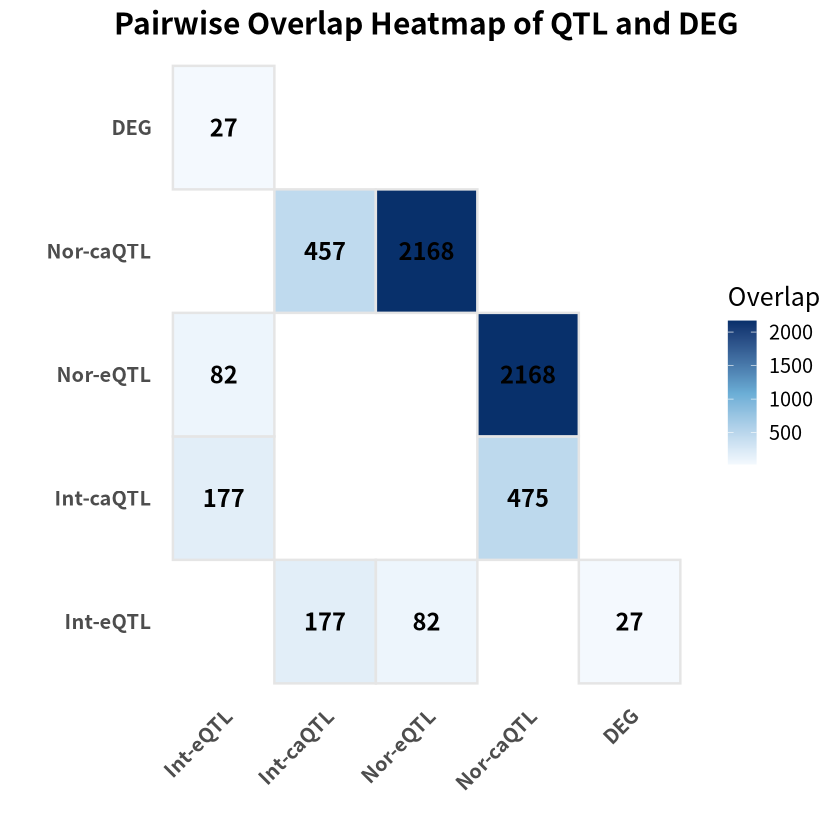

In [44]:
library(ggplot2)
library(reshape2)
library(dplyr)

# 构建矩阵
mat <- matrix(c(
  NA,   177,   82,   NA,   27,
  177,  NA,    NA,   457,  NA,
  82,   NA,    NA,   2168, NA,
  NA,   475,   2168, NA,   NA,
  27,   NA,    NA,   NA,   NA
), 
nrow = 5, byrow = TRUE)

# 设置行列名
labels <- c("Int-eQTL", "Int-caQTL", "Nor-eQTL", "Nor-caQTL", "DEG")
colnames(mat) <- rownames(mat) <- labels

# 转换为long格式
df <- melt(mat, na.rm = TRUE)

# 热图绘制
p <- ggplot(df, aes(Var1, Var2, fill = value)) +
  geom_tile(color = "grey90", linewidth = 0.7) +
  geom_text(aes(label = value), color = "black", size = 5, fontface = "bold") +
  scale_fill_gradient2(low = "#f7fbff", mid = "#6baed6", high = "#08306b", midpoint = max(df$value)/2, na.value = "white") +
  theme_minimal(base_size = 15) +
  labs(
    title = "Pairwise Overlap Heatmap of QTL and DEG",
    x = "", y = "", fill = "Overlap"
  ) +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1, face = "bold"),
    axis.text.y = element_text(face = "bold"),
    plot.title = element_text(hjust = 0.5, face = "bold"),
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank()
  )
p
ggsave('/media/AnalysisDisk2/Yangshichen/0_HIV_RNA/QTL/01.Dynamic/03.Result/shareQTL/p.pdf',p,width = 5,height = 5)